Ideas: 
- Density metric for either high/projected space
- Maybe higher dim just can't align nicely? 

In [33]:
import numpy as np
import scipy.io.wavfile
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import os
from sklearn.preprocessing import normalize
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import scipy as sc

In [34]:
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images,
                               test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape(-1, 784)
test_images = test_images.reshape(-1, 784)

In [3]:
import pylab
def plot_color(matrix, labels, filename=""):
    x = matrix[:, 0].tolist()
    y = matrix[:, 1].tolist()
    plt.figure(figsize=(6, 6))
    pylab.scatter(x, y, c=labels, cmap='Dark2')
    if(len(filename) > 0): plt.savefig(filename)

In [4]:
def plot_with_labels(lowDWeights, labels, filename='tsne.png'):
    assert lowDWeights.shape[0] >= len(labels), "More labels than weights"
    label_c = np.array([i for i in range(10)])
    plt.figure(figsize=(10, 10))  # in inches
    for i, label in enumerate(labels):
        x, y = lowDWeights[i, :]
        plt.scatter(x, y, c=label_c)
        plt.annotate(label,
                     xy=(x, y),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom'
                     )

    plt.savefig(filename)

In [5]:
weights_e0 = np.load("layer1_epoch_0.npy")
weights_e1 = np.load("layer1_epoch_1.npy")
weights_e2 = np.load("layer1_epoch_2.npy")
weights_e3 = np.load("layer1_epoch_3.npy")
weights_1_all = [weights_e0, weights_e1, weights_e2, weights_e3]
lowD_all_1 = []

/home/linneamay/anaconda3/lib/python3.6/site-packages/sklearn/neighbors/base.py:371: RuntimeWarning: invalid value encountered in sqrt
  result = np.sqrt(dist[sample_range, neigh_ind]), neigh_ind


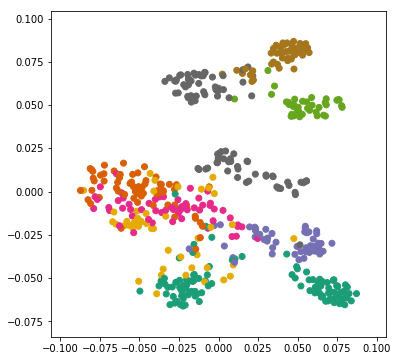

In [6]:
tsne = TSNE(perplexity=90, n_components=2, init='random', n_iter=5000)
lowD_1 = tsne.fit_transform(weights_e0[:500])
#plot_with_labels(lowD_1, test_labels[:100])
lowD_1= normalize(lowD_1, axis=0)
plot_color(lowD_1, test_labels[:500])
lowD_all_1.append(lowD_1)

/home/linneamay/anaconda3/lib/python3.6/site-packages/sklearn/neighbors/base.py:371: RuntimeWarning: invalid value encountered in sqrt
  result = np.sqrt(dist[sample_range, neigh_ind]), neigh_ind


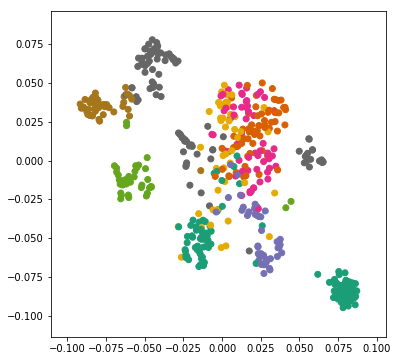

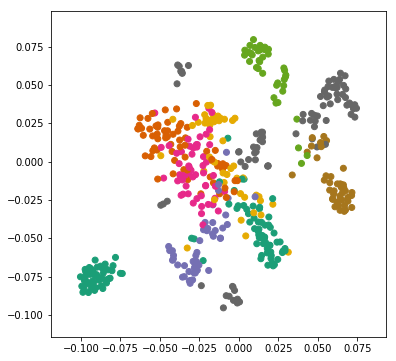

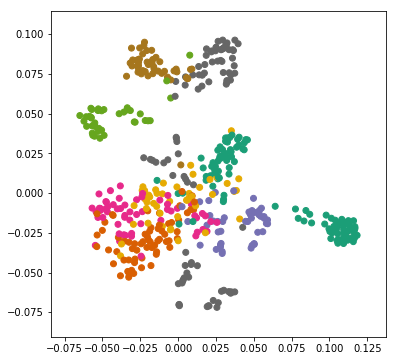

In [26]:
tsne.set_params(init=lowD_1)
for i in range(1, len(weights_1_all)):
    lowD_1_i = tsne.fit_transform(weights_1_all[i][:500])
    lowD_1_i = normalize(lowD_1_i, axis=0)
    plot_color(lowD_1_i, test_labels[:500])
    lowD_all_1.append(lowD_1_i)

In [8]:
lowD_all_1 = np.array(lowD_all_1)

# Align as well

In [9]:
import alignment as al

In [10]:
source_matrix = al.find_all_centroids(lowD_all_1[0], test_labels[:500])
target_matrix = al.find_all_centroids(lowD_all_1[1], test_labels[:500])

In [11]:
trans_cent = al.make_transform(source_matrix, target_matrix)
trans = al.make_transform(lowD_all_1[0], lowD_all_1[1])

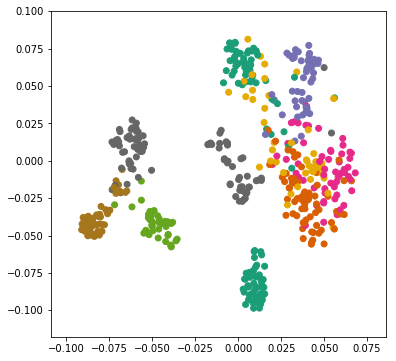

In [13]:
plot_color(lowD_1, test_labels[:500])

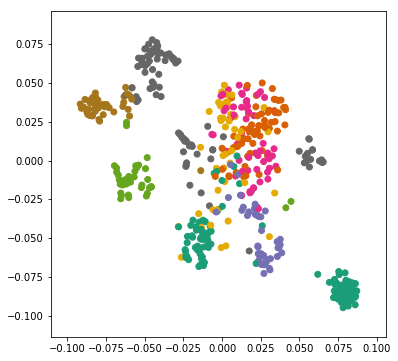

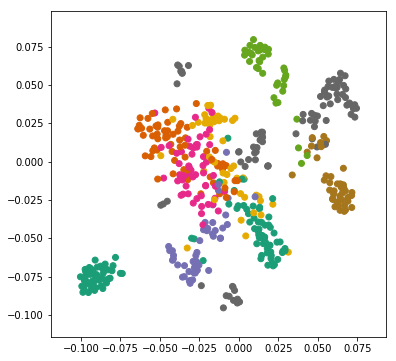

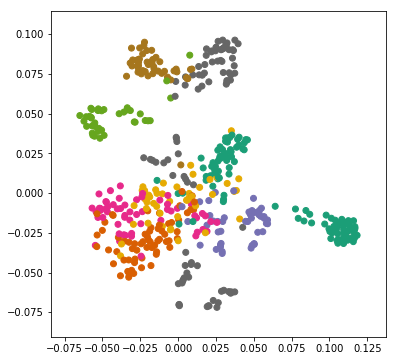

In [35]:
for i in range(1, len(lowD_all_1)): 
    lowD_i_new = al.apply_transform(lowD_all_1[i], trans_cent)
    lowD_all_1[i] = lowD_i_new
    plot_color(lowD_i_new, test_labels[:500])

# Try with second layer

In [36]:
weights_2_e0 = np.load("layer2_epoch_0.npy")
weights_2_e1 = np.load("layer2_epoch_1.npy")
weights_2_e2 = np.load("layer2_epoch_2.npy")
weights_2_e3 = np.load("layer2_epoch_3.npy")
weights_2_e4 = np.load("layer2_epoch_4.npy")
weights_2_all = [weights_2_e0, weights_2_e1, weights_2_e2, weights_2_e3, weights_2_e4]
lowD_all = []

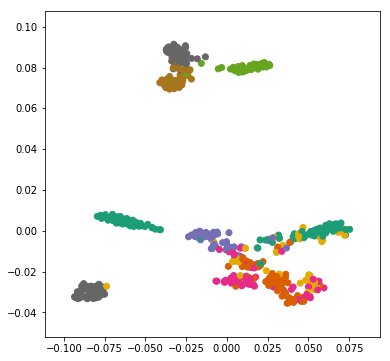

In [37]:
tsne = TSNE(perplexity=30, n_components=2, init='random', n_iter=5000)
lowD_2_1 = tsne.fit_transform(weights_2_e0[:500])
#plot_with_labels(lowD_1, test_labels[:100])
lowD_2_1= normalize(lowD_2_1, axis=0)
plot_color(lowD_2_1, test_labels[:500])
lowD_all.append(lowD_2_1)

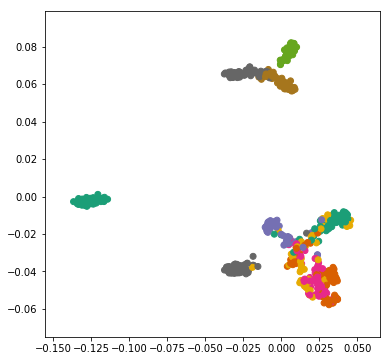

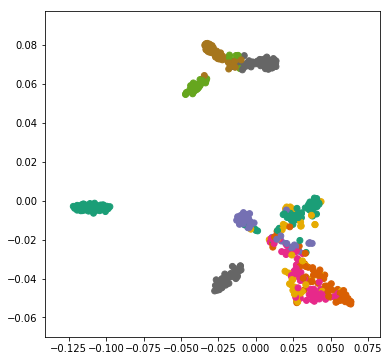

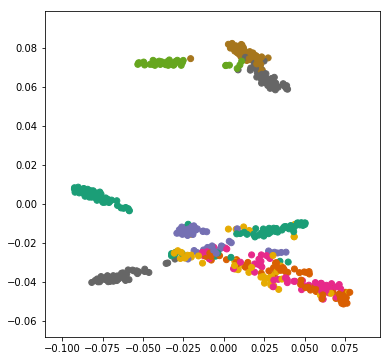

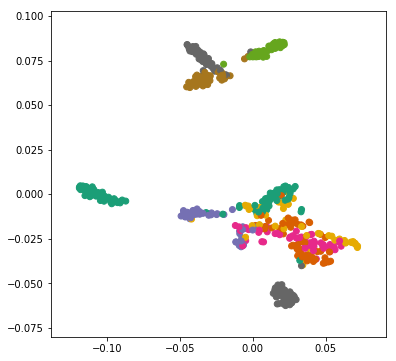

In [38]:
tsne.set_params(init=lowD_2_1)
for i in range(1, len(weights_2_all)):
    lowD_2_i = tsne.fit_transform(weights_2_all[i][:500])
    lowD_2_i = normalize(lowD_2_i, axis=0)
    plot_color(lowD_2_i, test_labels[:500])
    lowD_all.append(lowD_2_i)

In [39]:
lowD_all = np.array(lowD_all)

In [40]:
lowD_all[2,0,:]

array([0.00161424, 0.07122673], dtype=float32)

In [41]:
source_matrix = al.find_all_centroids(lowD_all[1], test_labels[:500])
target_matrix = al.find_all_centroids(lowD_all[0], test_labels[:500])

In [42]:
trans2 = al.make_transform(lowD_all[0],lowD_all[1])

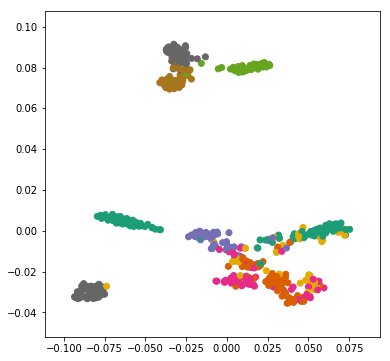

In [43]:
plot_color(lowD_all[0], test_labels[:500])

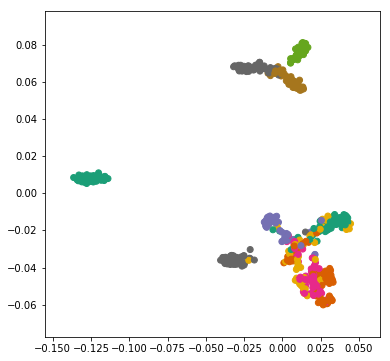

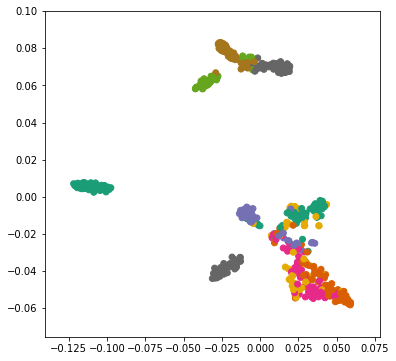

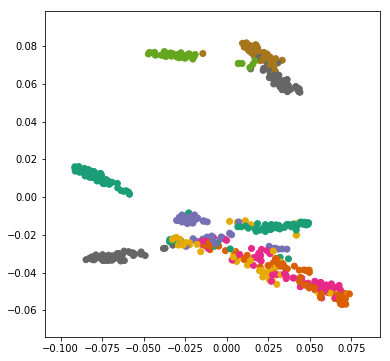

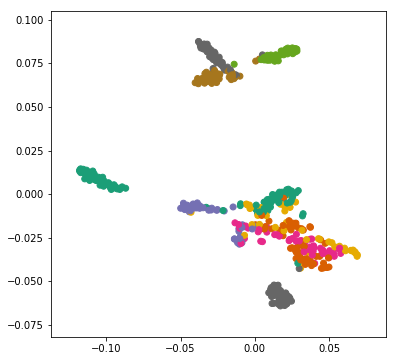

In [44]:
for i in range(1, len(lowD_all)): 
    lowD_i_new = al.apply_transform(lowD_all[i], trans2)
    lowD_all[i] = lowD_i_new
    plot_color(al.apply_transform(lowD_all[i], trans2), test_labels[:500])

In [ ]:
np.save("epoch2_TSENaligned", lowD_all)

## Trying to look at overall clustering structure

In [21]:
from scipy.spatial import Voronoi, voronoi_plot_2d
import colorized_voronoi
from sklearn.cluster import KMeans

In [22]:
kmeans = KMeans(n_clusters=10)
def plot_vor_cluster(orig_points, labels):
    lowD_clusters = kmeans.fit(orig_points)
    vor = Voronoi(lowD_clusters.cluster_centers_)
    fig = voronoi_plot_2d(vor)
    plot_color(orig_points, labels)
    plt.show()

In [23]:
vor = Voronoi(lowD_all_1[0])

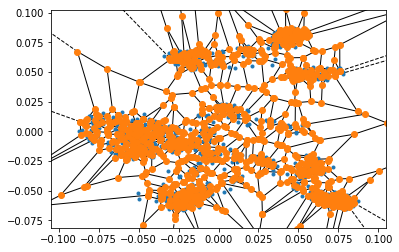

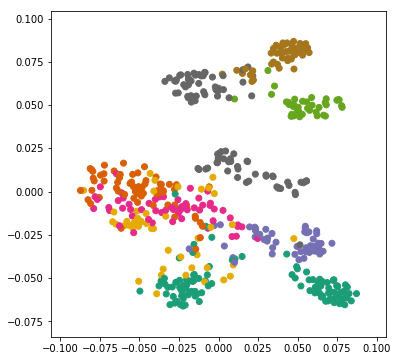

In [17]:
fig = voronoi_plot_2d(vor)
plot_color(lowD_all_1[0], test_labels[:50data = df.to_json(orient='records', lines=True){
  "epoch0": [
    -0.0439387783,
    -0.0839810222
  ],
  "epoch1": [
    -0.0660443082,
    -0.0497043952
  ],
  "epoch2": [
    -0.0579696819,
    -0.0559540205
  ],
  "epoch3": [
    -0.0258298218,
    -0.0754830688
  ],
  "epoch4": [
    -0.046725478,
    -0.0662127212
  ],
  "label": 9
}
{
  "epoch0": [
    0.0628478304,
    0.0306929145
  ],
  "epoch1": [
    0.0059325616,
    0.0589168482
  ],
  "epoch2": [
    0.0308521967,
    0.0607556142
  ],
  "epoch3": [
    0.0436572842,
    0.0509785153
  ],
  "epoch4": [
    -0.011010509,
    0.0371063724
  ],
  "label": 2
}
{
  "epoch0": [
    0.0667112023,
    -0.0195679907
  ],
  "epoch1": [
    0.1030551419,
    -0.0326358937
  ],
  "epoch2": [
    0.07376872,
    -0.0673476234
  ],
  "epoch3": [
    0.1051886454,
    -0.0182165913
  ],
  "epoch4": [
    0.0945393667,
    -0.0223803688
  ],
  "label": 1
}
{
  "epoch0": [
    0.058527898,
    -0.0194472857
  ],
  "epoch1": [
    0.108909376,
    -0.0303535294
  ],
  "epoch2": [
    0.0761054605,
    -0.0635624155
  ],
  "epoch3": [
    0.0946535096,
    -0.017349178
  ],
  "epoch4": [
    0.0984310061,
    -0.0260494351
  ],
  "label": 1
}
{
  "epoch0": [
    0.0086013209,
    0.0098544154
  ],
  "epoch1": [
    0.0077724298,
    0.0322459787
  ],
  "epoch2": [
    0.0088711269,
    0.0053653764
  ],
  "epoch3": [
    0.0064520738,
    0.0196671654
  ],
  "epoch4": [
    0.0391267985,
    0.0274926722
  ],
  "label": 6
}
{
  "epoch0": [
    0.0523222163,
    -0.0099498034
  ],
  "epoch1": [
    0.097540319,
    -0.0314520523
  ],
  "epoch2": [
    0.0671720281,
    -0.0567354001
  ],
  "epoch3": [
    0.0936501548,
    -0.0105900764
  ],
  "epoch4": [
    0.0887483507,
    -0.0149761941
  ],
  "label": 1
}
{
  "epoch0": [
    0.0353167951,
    0.0218133014
  ],
  "epoch1": [
    0.0071430202,
    0.0466378219
  ],
  "epoch2": [
    0.0198203754,
    0.0391959772
  ],
  "epoch3": [
    0.0311288889,
    0.0463716835
  ],
  "epoch4": [
    0.0160696544,
    0.0154656256
  ],
  "label": 4
}
{
  "epoch0": [
    0.0404395573,
    0.0328711048
  ],
  "epoch1": [
    0.0195406824,
    0.0523286015
  ],
  "epoch2": [
    0.0123185106,
    0.0518228076
  ],
  "epoch3": [
    0.0125660421,
    0.0414231904
  ],
  "epoch4": [
    -0.0239235945,
    0.0318125896
  ],
  "label": 6
}
{
  "epoch0": [
    -0.0320919789,
    -0.0732862949
  ],
  "epoch1": [
    -0.0447572321,
    -0.0535417274
  ],
  "epoch2": [
    -0.0806897655,
    -0.0510371253
  ],
  "epoch3": [
    -0.0746821687,
    -0.0620877296
  ],
  "epoch4": [
    -0.0381154157,
    -0.089020662
  ],
  "label": 5
}
{
  "epoch0": [
    -0.0758017004,
    -0.074462384
  ],
  "epoch1": [
    -0.0597388223,
    -0.0643895194
  ],
  "epoch2": [
    -0.071639061,
    -0.0309624244
  ],
  "epoch3": [
    -0.0381836034,
    -0.0581032559
  ],
  "epoch4": [
    -0.0055736867,
    -0.0802203119
  ],
  "label": 7
}
{
  "epoch0": [
    0.0471963249,
    0.0259203762
  ],
  "epoch1": [
    0.0135432445,
    0.0550597794
  ],
  "epoch2": [
    0.0212126914,
    0.052460961
  ],
  "epoch3": [
    0.0325456895,
    0.0439392775
  ],
  "epoch4": [
    -0.0070341243,
    0.022685498
  ],
  "label": 4
}
{
  "epoch0": [
    -0.0415480547,
    -0.0744712874
  ],
  "epoch1": [
    -0.0483943783,
    -0.054569874
  ],
  "epoch2": [
    -0.0692258701,
    -0.0505650006
  ],
  "epoch3": [
    -0.0436325595,
    -0.0676319301
  ],
  "epoch4": [
    -0.0318458304,
    -0.083132498
  ],
  "label": 5
}
{
  "epoch0": [
    -0.0639984682,
    -0.0744373873
  ],
  "epoch1": [
    -0.0671258941,
    -0.0575807914
  ],
  "epoch2": [
    -0.069415465,
    -0.0479350723
  ],
  "epoch3": [
    -0.0238412116,
    -0.0647282079
  ],
  "epoch4": [
    -0.0292740185,
    -0.0816270486
  ],
  "label": 7
}
{
  "epoch0": [
    0.0319716111,
    -0.0044446941
  ],
  "epoch1": [
    0.0258217286,
    0.0198900495
  ],
  "epoch2": [
    0.0383571051,
    0.0062953266
  ],
  "epoch3": [
    0.0521775,
    0.0078517245
  ],
  "epoch4": [
    0.05304759,
    0.0041595236
  ],
  "label": 3
}
{
  "epoch0": [
    0.0266630892,
    0.022946503
  ],
  "epoch1": [
    0.0183479898,
    0.0482785031
  ],
  "epoch2": [
    0.0188077372,
    0.043625731
  ],
  "epoch3": [
    0.0262725204,
    0.043179743
  ],
  "epoch4": [
    -0.0199967511,
    0.0245489124
  ],
  "label": 4
}
{
  "epoch0": [
    0.0573529303,
    -0.0136354016
  ],
  "epoch1": [
    0.0996133313,
    -0.0277573988
  ],
  "epoch2": [
    0.0721551254,
    -0.0650459677
  ],
  "epoch3": [
    0.0972853824,
    -0.0179347657
  ],
  "epoch4": [
    0.0888880193,
    -0.0176297594
  ],
  "label": 1
}
{
  "epoch0": [
    0.0284665693,
    0.0149974255
  ],
  "epoch1": [
    0.0008712277,
    0.0367710628
  ],
  "epoch2": [
    0.0159597006,
    0.021319624
  ],
  "epoch3": [
    0.0118481852,
    0.0234185122
  ],
  "epoch4": [
    0.0215679854,
    0.0154347811
  ],
  "label": 2
}
{
  "epoch0": [
    0.0299454704,
    0.0170459263
  ],
  "epoch1": [
    0.0047653513,
    0.0396406837
  ],
  "epoch2": [
    0.0175460335,
    0.0407344364
  ],
  "epoch3": [
    0.0313655026,
    0.044373747
  ],
  "epoch4": [
    0.0208274648,
    0.0172134954
  ],
  "label": 4
}
{
  "epoch0": [
    -0.0461945832,
    0.0378428511
  ],
  "epoch1": [
    -0.0239063092,
    0.0375954546
  ],
  "epoch2": [
    -0.009784054,
    0.0282440819
  ],
  "epoch3": [
    -0.0331839211,
    0.0260684416
  ],
  "epoch4": [
    -0.0595527291,
    0.0116529455
  ],
  "label": 8
}
{
  "epoch0": [
    -0.0199814718,
    0.0048434436
  ],
  "epoch1": [
    -0.0050164214,
    0.0158385672
  ],
  "epoch2": [
    0.012471457,
    -0.0017059206
  ],
  "epoch3": [
    0.0072062919,
    0.0067519788
  ],
  "epoch4": [
    0.0372677259,
    0.0217114836
  ],
  "label": 0
}
{
  "epoch0": [
    0.0445381925,
    0.0198671687
  ],
  "epoch1": [
    0.0051561422,
    0.0511172228
  ],
  "epoch2": [
    0.0279616341,
    0.0485986471
  ],
  "epoch3": [
    0.0378354639,
    0.0376096517
  ],
  "epoch4": [
    0.0097262245,
    0.0266637448
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0435262583,
    -0.0746043473
  ],
  "epoch1": [
    -0.0505767353,
    -0.0552711003
  ],
  "epoch2": [
    -0.0732171163,
    -0.0479221344
  ],
  "epoch3": [
    -0.0372482538,
    -0.0679935515
  ],
  "epoch4": [
    -0.0231176931,
    -0.0761178732
  ],
  "label": 5
}
{
  "epoch0": [
    -0.0735564381,
    -0.0768973008
  ],
  "epoch1": [
    -0.0582621433,
    -0.066019401
  ],
  "epoch2": [
    -0.0738267228,
    -0.0342701524
  ],
  "epoch3": [
    -0.0367296971,
    -0.0631951913
  ],
  "epoch4": [
    -0.0073904092,
    -0.0771370456
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0372284614,
    -0.0815509185
  ],
  "epoch1": [
    -0.0630394071,
    -0.0488676801
  ],
  "epoch2": [
    -0.0728801861,
    -0.0536135212
  ],
  "epoch3": [
    -0.0380293354,
    -0.0707071647
  ],
  "epoch4": [
    -0.0353203714,
    -0.0815442875
  ],
  "label": 9
}
{
  "epoch0": [
    0.0562750213,
    -0.0168587137
  ],
  "epoch1": [
    0.1015178338,
    -0.0273829531
  ],
  "epoch2": [
    0.0679142848,
    -0.0593398884
  ],
  "epoch3": [
    0.089887023,
    -0.0122473277
  ],
  "epoch4": [
    0.0939254761,
    -0.0234043822
  ],
  "label": 1
}
{
  "epoch0": [
    0.0312115029,
    0.015224698
  ],
  "epoch1": [
    0.0025282551,
    0.0366617516
  ],
  "epoch2": [
    0.0328289866,
    0.0635425299
  ],
  "epoch3": [
    0.0128053175,
    0.0225642528
  ],
  "epoch4": [
    0.0190850459,
    0.0165449306
  ],
  "label": 4
}
{
  "epoch0": [
    0.0359086953,
    0.0314198807
  ],
  "epoch1": [
    0.022435613,
    0.0504025035
  ],
  "epoch2": [
    0.0149032585,
    0.040516831
  ],
  "epoch3": [
    0.0178252961,
    0.0293523893
  ],
  "epoch4": [
    -0.0196920913,
    0.0280432235
  ],
  "label": 6
}
{
  "epoch0": [
    0.0117444918,
    0.0049344753
  ],
  "epoch1": [
    0.0014397539,
    0.0154890697
  ],
  "epoch2": [
    0.0184768103,
    0.0002421441
  ],
  "epoch3": [
    0.0180483293,
    0.0103217121
  ],
  "epoch4": [
    0.0493164174,
    0.016424818
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0485952906,
    -0.0846587494
  ],
  "epoch1": [
    -0.0691248849,
    -0.0490648746
  ],
  "epoch2": [
    -0.0594580658,
    -0.0558292344
  ],
  "epoch3": [
    -0.0247271694,
    -0.0769325346
  ],
  "epoch4": [
    -0.0369220637,
    -0.0697542429
  ],
  "label": 9
}
{
  "epoch0": [
    0.0313448496,
    0.0086032301
  ],
  "epoch1": [
    0.0139242178,
    0.0289297272
  ],
  "epoch2": [
    0.0221202839,
    0.016301319
  ],
  "epoch3": [
    0.0295723174,
    0.0202188883
  ],
  "epoch4": [
    0.0275852587,
    0.0111907125
  ],
  "label": 3
}
{
  "epoch0": [
    -0.0590782501,
    0.0368112326
  ],
  "epoch1": [
    -0.0288217291,
    0.0422534049
  ],
  "epoch2": [
    -0.0227180868,
    0.0324940793
  ],
  "epoch3": [
    -0.0522957519,
    0.0279411022
  ],
  "epoch4": [
    -0.0745951012,
    0.0148439091
  ],
  "label": 8
}
{
  "epoch0": [
    -0.0578063652,
    0.0352760553
  ],
  "epoch1": [
    -0.0252908356,
    0.0432635024
  ],
  "epoch2": [
    -0.0193281062,
    0.0333725587
  ],
  "epoch3": [
    -0.0462559499,
    0.0285263471
  ],
  "epoch4": [
    -0.0684833601,
    0.0179534331
  ],
  "label": 8
}
{
  "epoch0": [
    0.0381791629,
    -0.0030183697
  ],
  "epoch1": [
    0.0220048018,
    0.019753119
  ],
  "epoch2": [
    0.032410413,
    0.0068386788
  ],
  "epoch3": [
    0.0417755172,
    0.0087327212
  ],
  "epoch4": [
    0.0600047261,
    0.0013914166
  ],
  "label": 3
}
{
  "epoch0": [
    0.0309573095,
    0.0035131942
  ],
  "epoch1": [
    0.0133294901,
    0.0302395616
  ],
  "epoch2": [
    0.034836784,
    0.0224967916
  ],
  "epoch3": [
    0.0339658782,
    0.0162143521
  ],
  "epoch4": [
    0.0250875838,
    0.0118438546
  ],
  "label": 3
}
{
  "epoch0": [
    -0.0561707392,
    0.0349580832
  ],
  "epoch1": [
    -0.0253879912,
    0.0433684029
  ],
  "epoch2": [
    -0.0222926009,
    0.03299319
  ],
  "epoch3": [
    -0.0569418967,
    0.0286731329
  ],
  "epoch4": [
    -0.0672399327,
    0.0164957009
  ],
  "label": 8
}
{
  "epoch0": [
    -0.0161604304,
    0.006131283
  ],
  "epoch1": [
    -0.0037034953,
    0.0207234584
  ],
  "epoch2": [
    0.0119261639,
    0.0027931284
  ],
  "epoch3": [
    0.0054097837,
    0.0105533144
  ],
  "epoch4": [
    0.0484959483,
    0.0247462261
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0745567977,
    -0.0781825483
  ],
  "epoch1": [
    -0.0579275042,
    -0.0638559759
  ],
  "epoch2": [
    -0.0746221915,
    -0.0328795239
  ],
  "epoch3": [
    -0.0358136147,
    -0.0623547435
  ],
  "epoch4": [
    -0.0112281386,
    -0.0745045394
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0311545674,
    -0.072627984
  ],
  "epoch1": [
    -0.047663115,
    -0.0544966534
  ],
  "epoch2": [
    -0.0788310468,
    -0.0502182245
  ],
  "epoch3": [
    -0.0643057078,
    -0.0626299456
  ],
  "epoch4": [
    -0.032925576,
    -0.0847515017
  ],
  "label": 5
}
{
  "epoch0": [
    -0.0711625889,
    -0.0772022828
  ],
  "epoch1": [
    -0.0564639941,
    -0.0657052323
  ],
  "epoch2": [
    -0.0732823238,
    -0.0328982696
  ],
  "epoch3": [
    -0.0374885611,
    -0.06140659
  ],
  "epoch4": [
    -0.0073384685,
    -0.0740229189
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0439153127,
    -0.086441502
  ],
  "epoch1": [
    -0.0678027421,
    -0.0487481952
  ],
  "epoch2": [
    -0.056520503,
    -0.0573865809
  ],
  "epoch3": [
    -0.0228827745,
    -0.079286769
  ],
  "epoch4": [
    -0.0481115468,
    -0.0673656091
  ],
  "label": 9
}
{
  "epoch0": [
    -0.0305272248,
    0.0027100544
  ],
  "epoch1": [
    -0.012952148,
    0.0120313037
  ],
  "epoch2": [
    0.0009311906,
    -0.0109297791
  ],
  "epoch3": [
    0.0012624622,
    0.0027867588
  ],
  "epoch4": [
    0.0493421778,
    0.0318954438
  ],
  "label": 6
}
{
  "epoch0": [
    0.0680376813,
    -0.0191720743
  ],
  "epoch1": [
    0.1070549488,
    -0.033615604
  ],
  "epoch2": [
    0.0745503157,
    -0.0650462583
  ],
  "epoch3": [
    0.1069497392,
    -0.0202186741
  ],
  "epoch4": [
    0.1031359807,
    -0.026633054
  ],
  "label": 1
}
{
  "epoch0": [
    0.0106397048,
    0.0053601977
  ],
  "epoch1": [
    0.0032178608,
    0.0233424343
  ],
  "epoch2": [
    0.0183855742,
    0.0124658765
  ],
  "epoch3": [
    0.0190949459,
    0.0176414978
  ],
  "epoch4": [
    0.0448852777,
    0.0102059944
  ],
  "label": 3
}
{
  "epoch0": [
    -0.0510637946,
    -0.0842415392
  ],
  "epoch1": [
    -0.0619273409,
    -0.0542875566
  ],
  "epoch2": [
    -0.0637243912,
    -0.0473130867
  ],
  "epoch3": [
    -0.0265231617,
    -0.071614854
  ],
  "epoch4": [
    -0.0196876694,
    -0.0691209212
  ],
  "label": 7
}
{
  "epoch0": [
    0.0340208262,
    0.0314220898
  ],
  "epoch1": [
    0.0203439221,
    0.0539460704
  ],
  "epoch2": [
    0.0138670392,
    0.0489580482
  ],
  "epoch3": [
    0.0177532025,
    0.0392040908
  ],
  "epoch4": [
    0.0034112087,
    0.0232701432
  ],
  "label": 6
}
{
  "epoch0": [
    -0.0577828884,
    -0.0790871307
  ],
  "epoch1": [
    -0.0606884211,
    -0.0590658858
  ],
  "epoch2": [
    -0.0660609752,
    -0.0457874462
  ],
  "epoch3": [
    -0.028602697,
    -0.0667376071
  ],
  "epoch4": [
    -0.0153693026,
    -0.0668880269
  ],
  "label": 7
}
{
  "epoch0": [
    0.0288279578,
    0.0143258907
  ],
  "epoch1": [
    -0.0000818499,
    0.0375121497
  ],
  "epoch2": [
    0.0213999748,
    0.0338576734
  ],
  "epoch3": [
    0.0239327122,
    0.0283598695
  ],
  "epoch4": [
    0.0183234122,
    0.0182129201
  ],
  "label": 2
}
{
  "epoch0": [
    0.04852717,
    -0.0087562539
  ],
  "epoch1": [
    0.0179401003,
    0.0244000256
  ],
  "epoch2": [
    0.0294993296,
    0.0082090069
  ],
  "epoch3": [
    0.082820937,
    -0.0068585966
  ],
  "epoch4": [
    0.0856048986,
    -0.0160516724
  ],
  "label": 1
}
{
  "epoch0": [
    0.0344746113,
    0.0227548573
  ],
  "epoch1": [
    0.0050067264,
    0.0456581116
  ],
  "epoch2": [
    0.0207141899,
    0.0331818946
  ],
  "epoch3": [
    0.0278015565,
    0.0329943486
  ],
  "epoch4": [
    0.0090151168,
    0.0173954703
  ],
  "label": 2
}
{
  "epoch0": [
    0.0284495652,
    0.0133116171
  ],
  "epoch1": [
    0.0012632081,
    0.037670467
  ],
  "epoch2": [
    0.0227022283,
    0.0351152569
  ],
  "epoch3": [
    0.0185701679,
    0.0247524902
  ],
  "epoch4": [
    0.0154925659,
    0.0284693893
  ],
  "label": 2
}
{
  "epoch0": [
    0.0406440198,
    0.0286820941
  ],
  "epoch1": [
    0.0186776165,
    0.0590580292
  ],
  "epoch2": [
    0.0135767879,
    0.0533357672
  ],
  "epoch3": [
    0.0378548764,
    0.0443235375
  ],
  "epoch4": [
    -0.0197061468,
    0.0283207111
  ],
  "label": 4
}
{
  "epoch0": [
    0.026397042,
    0.014805275
  ],
  "epoch1": [
    0.003565128,
    0.0383753292
  ],
  "epoch2": [
    0.0164971333,
    0.0379501209
  ],
  "epoch3": [
    0.0177832283,
    0.0312856175
  ],
  "epoch4": [
    -0.0107331919,
    0.0234346911
  ],
  "label": 4
}
{
  "epoch0": [
    -0.0335958973,
    -0.0724527463
  ],
  "epoch1": [
    -0.0413427055,
    -0.0528202802
  ],
  "epoch2": [
    -0.0823326781,
    -0.0518113226
  ],
  "epoch3": [
    -0.0733162835,
    -0.0635252371
  ],
  "epoch4": [
    -0.0360211506,
    -0.0836170912
  ],
  "label": 5
}
{
  "epoch0": [
    -0.0395547114,
    0.0377754495
  ],
  "epoch1": [
    -0.0020403499,
    0.0305804778
  ],
  "epoch2": [
    -0.0072878338,
    0.0253753886
  ],
  "epoch3": [
    0.0012967535,
    0.0200109202
  ],
  "epoch4": [
    -0.0500634685,
    0.0142181301
  ],
  "label": 8
}
{
  "epoch0": [
    0.0261561293,
    0.0165084191
  ],
  "epoch1": [
    0.0077787545,
    0.0444429144
  ],
  "epoch2": [
    0.0233919919,
    0.0315818302
  ],
  "epoch3": [
    0.0373497196,
    0.0372110493
  ],
  "epoch4": [
    0.0123712141,
    0.0252903551
  ],
  "label": 2
}
{
  "epoch0": [
    0.0539289825,
    0.0242440421
  ],
  "epoch1": [
    0.0030293406,
    0.0496303476
  ],
  "epoch2": [
    0.0269267894,
    0.0441185273
  ],
  "epoch3": [
    0.031060148,
    0.0326572135
  ],
  "epoch4": [
    0.0043888171,
    0.0325045213
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0533934571,
    0.0393876731
  ],
  "epoch1": [
    -0.0305072181,
    0.0401051044
  ],
  "epoch2": [
    -0.0159879066,
    0.033899948
  ],
  "epoch3": [
    -0.0494225807,
    0.027955642
  ],
  "epoch4": [
    -0.0638504699,
    0.0124576017
  ],
  "label": 8
}
{
  "epoch0": [
    0.045535095,
    0.027398238
  ],
  "epoch1": [
    0.0141073391,
    0.0543950684
  ],
  "epoch2": [
    0.0207916051,
    0.05355189
  ],
  "epoch3": [
    0.0335028879,
    0.044755321
  ],
  "epoch4": [
    0.0005943846,
    0.0194584262
  ],
  "label": 4
}
{
  "epoch0": [
    -0.0541632734,
    0.0392087474
  ],
  "epoch1": [
    -0.0310859177,
    0.0401274487
  ],
  "epoch2": [
    -0.0165226199,
    0.0328349136
  ],
  "epoch3": [
    -0.0461240299,
    0.0264299605
  ],
  "epoch4": [
    -0.0563874617,
    0.0130787753
  ],
  "label": 8
}
{
  "epoch0": [
    -0.0212192405,
    0.0051329797
  ],
  "epoch1": [
    -0.006696708,
    0.0149445254
  ],
  "epoch2": [
    0.0077173952,
    -0.0047913222
  ],
  "epoch3": [
    0.0023170987,
    0.0073464694
  ],
  "epoch4": [
    0.0528779663,
    0.0309390761
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0669530332,
    -0.0763324648
  ],
  "epoch1": [
    -0.0612516813,
    -0.063298896
  ],
  "epoch2": [
    -0.0686993226,
    -0.0400051847
  ],
  "epoch3": [
    -0.0294575766,
    -0.0633672178
  ],
  "epoch4": [
    -0.018006498,
    -0.0730668008
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0632897615,
    -0.0775860921
  ],
  "epoch1": [
    -0.0585314222,
    -0.0620165169
  ],
  "epoch2": [
    -0.0705596358,
    -0.0414969996
  ],
  "epoch3": [
    -0.0298764724,
    -0.0643660575
  ],
  "epoch4": [
    -0.017789105,
    -0.0767111108
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0603404753,
    0.0392152146
  ],
  "epoch1": [
    -0.0301258955,
    0.0435875505
  ],
  "epoch2": [
    -0.0187368784,
    0.0345167108
  ],
  "epoch3": [
    -0.0511293262,
    0.0289943274
  ],
  "epoch4": [
    -0.06969437,
    0.0143283177
  ],
  "label": 8
}
{
  "epoch0": [
    -0.0340573303,
    -0.0719082505
  ],
  "epoch1": [
    -0.0444238745,
    -0.0526663363
  ],
  "epoch2": [
    -0.079144761,
    -0.0519087948
  ],
  "epoch3": [
    -0.0689036101,
    -0.0641371086
  ],
  "epoch4": [
    -0.0333690643,
    -0.0833829045
  ],
  "label": 5
}
{
  "epoch0": [
    0.0617548041,
    -0.0140994489
  ],
  "epoch1": [
    0.1024967954,
    -0.0332301781
  ],
  "epoch2": [
    0.0676850453,
    -0.0608320609
  ],
  "epoch3": [
    0.0943372697,
    -0.012452729
  ],
  "epoch4": [
    0.0987953916,
    -0.0273232348
  ],
  "label": 1
}
{
  "epoch0": [
    0.0613191985,
    -0.0188497081
  ],
  "epoch1": [
    0.1070854664,
    -0.0299727786
  ],
  "epoch2": [
    0.0768362209,
    -0.0639476255
  ],
  "epoch3": [
    0.102161482,
    -0.0158740468
  ],
  "epoch4": [
    0.0969813019,
    -0.0229512788
  ],
  "label": 1
}
{
  "epoch0": [
    0.02609827,
    0.012557867
  ],
  "epoch1": [
    0.0070161689,
    0.0297467224
  ],
  "epoch2": [
    0.0187424049,
    0.0147511763
  ],
  "epoch3": [
    0.0186637267,
    0.020614719
  ],
  "epoch4": [
    0.0279065501,
    0.0186527427
  ],
  "label": 2
}
{
  "epoch0": [
    0.0329454541,
    0.0063656536
  ],
  "epoch1": [
    0.0147835752,
    0.0284917075
  ],
  "epoch2": [
    0.0269282069,
    0.0199594907
  ],
  "epoch3": [
    0.0254234392,
    0.0189248361
  ],
  "epoch4": [
    0.021956671,
    0.0089153182
  ],
  "label": 3
}
{
  "epoch0": [
    -0.0588334687,
    -0.0789074749
  ],
  "epoch1": [
    -0.0654024556,
    -0.0572083406
  ],
  "epoch2": [
    -0.0674004853,
    -0.0479886718
  ],
  "epoch3": [
    -0.0257630963,
    -0.0664423853
  ],
  "epoch4": [
    -0.0162801929,
    -0.0677535161
  ],
  "label": 9
}
{
  "epoch0": [
    -0.0604787208,
    0.0365438126
  ],
  "epoch1": [
    -0.0299516339,
    0.0425286517
  ],
  "epoch2": [
    -0.0232856218,
    0.0334514342
  ],
  "epoch3": [
    -0.0570057556,
    0.0277205296
  ],
  "epoch4": [
    -0.0729003772,
    0.0151019432
  ],
  "label": 8
}
{
  "epoch0": [
    -0.0614555664,
    -0.0762025267
  ],
  "epoch1": [
    -0.0600884221,
    -0.0614226125
  ],
  "epoch2": [
    -0.0723406449,
    -0.039568577
  ],
  "epoch3": [
    -0.0371400751,
    -0.0620186515
  ],
  "epoch4": [
    -0.0164061617,
    -0.0731149912
  ],
  "label": 7
}
{
  "epoch0": [
    -0.007380561,
    0.0057159318
  ],
  "epoch1": [
    -0.0018112262,
    0.0188260507
  ],
  "epoch2": [
    0.0153398002,
    -0.0012933449
  ],
  "epoch3": [
    0.0053245323,
    0.0169935022
  ],
  "epoch4": [
    0.0366429016,
    0.018235622
  ],
  "label": 0
}
{
  "epoch0": [
    0.0525942296,
    0.0204727631
  ],
  "epoch1": [
    -0.0015174607,
    0.0428474285
  ],
  "epoch2": [
    0.0292190891,
    0.0466136634
  ],
  "epoch3": [
    0.0224663522,
    0.0259650685
  ],
  "epoch4": [
    0.0157284737,
    0.0268468782
  ],
  "label": 2
}
{
  "epoch0": [
    0.0058167409,
    0.009079596
  ],
  "epoch1": [
    0.0018915469,
    0.0259859338
  ],
  "epoch2": [
    0.0166551601,
    0.006799059
  ],
  "epoch3": [
    0.0107711051,
    0.019470429
  ],
  "epoch4": [
    0.032901153,
    0.0199323948
  ],
  "label": 6
}
{
  "epoch0": [
    0.029214479,
    0.0251695029
  ],
  "epoch1": [
    0.013747314,
    0.0457966253
  ],
  "epoch2": [
    0.024401458,
    0.0500275828
  ],
  "epoch3": [
    0.0378829911,
    0.0386678837
  ],
  "epoch4": [
    -0.0081340997,
    0.0219296012
  ],
  "label": 2
}
{
  "epoch0": [
    0.0304052867,
    -0.0000059778
  ],
  "epoch1": [
    0.0231940579,
    0.0209516715
  ],
  "epoch2": [
    0.0351289585,
    0.0085483901
  ],
  "epoch3": [
    0.0433886312,
    0.010023769
  ],
  "epoch4": [
    0.0496990792,
    0.0068648774
  ],
  "label": 3
}
{
  "epoch0": [
    0.0656603873,
    -0.0171875264
  ],
  "epoch1": [
    0.1052707657,
    -0.0333740376
  ],
  "epoch2": [
    0.0689657778,
    -0.0647068992
  ],
  "epoch3": [
    0.098296456,
    -0.0154452296
  ],
  "epoch4": [
    0.0993207768,
    -0.0243304148
  ],
  "label": 1
}
{
  "epoch0": [
    0.0667169318,
    0.0311972946
  ],
  "epoch1": [
    0.009164595,
    0.0636508614
  ],
  "epoch2": [
    0.0335760713,
    0.0707386658
  ],
  "epoch3": [
    0.0460336022,
    0.0537993945
  ],
  "epoch4": [
    -0.0046388116,
    0.0352279767
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0435042717,
    0.0388058573
  ],
  "epoch1": [
    -0.0234077964,
    0.0375601575
  ],
  "epoch2": [
    -0.0072466698,
    0.0254451279
  ],
  "epoch3": [
    -0.0409530289,
    0.0256419368
  ],
  "epoch4": [
    -0.0559995733,
    0.0124217104
  ],
  "label": 8
}
{
  "epoch0": [
    0.0544539206,
    0.0333239399
  ],
  "epoch1": [
    0.0153668262,
    0.0603411458
  ],
  "epoch2": [
    0.0212258529,
    0.0598200411
  ],
  "epoch3": [
    0.0291600972,
    0.0482618064
  ],
  "epoch4": [
    -0.0017551209,
    0.0197469108
  ],
  "label": 4
}
{
  "epoch0": [
    0.0559291653,
    -0.0126835452
  ],
  "epoch1": [
    0.0970103443,
    -0.0271125771
  ],
  "epoch2": [
    0.065005146,
    -0.0585990883
  ],
  "epoch3": [
    0.0865713954,
    -0.0094021047
  ],
  "epoch4": [
    0.0866828486,
    -0.0154620223
  ],
  "label": 1
}
{
  "epoch0": [
    -0.0528028049,
    0.0373374112
  ],
  "epoch1": [
    -0.029799344,
    0.0415541902
  ],
  "epoch2": [
    -0.0191235784,
    0.0306131132
  ],
  "epoch3": [
    -0.0516987666,
    0.0260277037
  ],
  "epoch4": [
    -0.0679312944,
    0.0147189889
  ],
  "label": 8
}
{
  "epoch0": [
    -0.0357662477,
    -0.0681789741
  ],
  "epoch1": [
    -0.0378777422,
    -0.0543216169
  ],
  "epoch2": [
    -0.086007826,
    -0.0493341684
  ],
  "epoch3": [
    -0.0785846263,
    -0.0645281225
  ],
  "epoch4": [
    -0.0392686613,
    -0.0907820538
  ],
  "label": 5
}
{
  "epoch0": [
    -0.0374878719,
    -0.0890183151
  ],
  "epoch1": [
    -0.0705046654,
    -0.0450554602
  ],
  "epoch2": [
    -0.0533988439,
    -0.0581469685
  ],
  "epoch3": [
    -0.0251259375,
    -0.0787593573
  ],
  "epoch4": [
    -0.0468723811,
    -0.0663146153
  ],
  "label": 9
}
{
  "epoch0": [
    -0.033736527,
    -0.0700156018
  ],
  "epoch1": [
    -0.0393700004,
    -0.0526222475
  ],
  "epoch2": [
    -0.0866101533,
    -0.0527964048
  ],
  "epoch3": [
    -0.0794877708,
    -0.0626422316
  ],
  "epoch4": [
    -0.0325441472,
    -0.0870972797
  ],
  "label": 5
}
{
  "epoch0": [
    -0.0179870129,
    0.0062791882
  ],
  "epoch1": [
    -0.0113266427,
    0.0115718283
  ],
  "epoch2": [
    0.0026465321,
    -0.0097689759
  ],
  "epoch3": [
    -0.000041549,
    0.0041729268
  ],
  "epoch4": [
    0.0465183817,
    0.0274701044
  ],
  "label": 0
}
{
  "epoch0": [
    0.0364734121,
    -0.0011484888
  ],
  "epoch1": [
    0.0268081389,
    0.0218317956
  ],
  "epoch2": [
    0.0377290919,
    0.0081236474
  ],
  "epoch3": [
    0.0494790301,
    0.0103638256
  ],
  "epoch4": [
    0.0574059598,
    0.0038195183
  ],
  "label": 3
}
{
  "epoch0": [
    0.0466367193,
    0.0250606332
  ],
  "epoch1": [
    0.0072463774,
    0.0517811105
  ],
  "epoch2": [
    0.0264532063,
    0.0614389069
  ],
  "epoch3": [
    0.0418230183,
    0.0522426292
  ],
  "epoch4": [
    -0.0027990998,
    0.0278642271
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0270449575,
    0.0049288175
  ],
  "epoch1": [
    -0.0077203442,
    0.0087140324
  ],
  "epoch2": [
    0.0035647,
    -0.0140515789
  ],
  "epoch3": [
    -0.0020007049,
    0.001377694
  ],
  "epoch4": [
    0.0528690442,
    0.0334281996
  ],
  "label": 0
}
{
  "epoch0": [
    0.0487147458,
    0.0201619416
  ],
  "epoch1": [
    -0.0009327204,
    0.0417285226
  ],
  "epoch2": [
    0.0275964197,
    0.0450744629
  ],
  "epoch3": [
    0.0200274717,
    0.0265020616
  ],
  "epoch4": [
    0.0180959292,
    0.0258836895
  ],
  "label": 6
}
{
  "epoch0": [
    -0.035560295,
    -0.0692461878
  ],
  "epoch1": [
    -0.0398829356,
    -0.0532678328
  ],
  "epoch2": [
    -0.0883591548,
    -0.0524933711
  ],
  "epoch3": [
    -0.0679490417,
    -0.0628329366
  ],
  "epoch4": [
    -0.030722037,
    -0.0855440274
  ],
  "label": 5
}
{
  "epoch0": [
    0.0330076925,
    -0.002789008
  ],
  "epoch1": [
    0.024493074,
    0.0202251412
  ],
  "epoch2": [
    0.0346687697,
    0.0064707194
  ],
  "epoch3": [
    0.0425744951,
    0.0089817205
  ],
  "epoch4": [
    0.0499315634,
    0.0076830299
  ],
  "label": 3
}
{
  "epoch0": [
    0.0398578085,
    0.0334034823
  ],
  "epoch1": [
    0.0200400706,
    0.0587642938
  ],
  "epoch2": [
    0.0112258699,
    0.0548578165
  ],
  "epoch3": [
    0.0119896065,
    0.0421821773
  ],
  "epoch4": [
    -0.0226653013,
    0.0316583999
  ],
  "label": 6
}
{
  "epoch0": [
    -0.07198973,
    -0.0777888596
  ],
  "epoch1": [
    -0.0566388182,
    -0.0668972209
  ],
  "epoch2": [
    -0.0748013705,
    -0.0312394872
  ],
  "epoch3": [
    -0.0386226736,
    -0.0606731549
  ],
  "epoch4": [
    -0.0111864945,
    -0.0699678808
  ],
  "label": 7
}
{
  "epoch0": [
    0.0529896393,
    -0.0134099778
  ],
  "epoch1": [
    0.1035918593,
    -0.0281389095
  ],
  "epoch2": [
    0.0737269893,
    -0.061695572
  ],
  "epoch3": [
    0.0934640542,
    -0.0161509924
  ],
  "epoch4": [
    0.0932936743,
    -0.021909086
  ],
  "label": 1
}
{
  "epoch0": [
    -0.0459624678,
    0.0379274897
  ],
  "epoch1": [
    -0.0250214469,
    0.0373580009
  ],
  "epoch2": [
    -0.0098247146,
    0.0283222422
  ],
  "epoch3": [
    -0.034465719,
    0.0252301823
  ],
  "epoch4": [
    -0.0505359918,
    0.013740371
  ],
  "label": 8
}
{
  "epoch0": [
    -0.0059929611,
    0.0057759727
  ],
  "epoch1": [
    -0.0016179987,
    0.0200639553
  ],
  "epoch2": [
    0.0151598137,
    0.0100074261
  ],
  "epoch3": [
    0.0064971056,
    0.0157234501
  ],
  "epoch4": [
    0.0347299911,
    0.0188976955
  ],
  "label": 0
}
{
  "epoch0": [
    0.0533526279,
    -0.0113609126
  ],
  "epoch1": [
    0.0971658975,
    -0.0263034534
  ],
  "epoch2": [
    0.0663730502,
    -0.0595616624
  ],
  "epoch3": [
    0.0893902406,
    -0.0125722596
  ],
  "epoch4": [
    0.0890086815,
    -0.0158065595
  ],
  "label": 1
}
{
  "epoch0": [
    0.0234718733,
    0.02193892
  ],
  "epoch1": [
    0.0043520983,
    0.0369295515
  ],
  "epoch2": [
    0.019939851,
    0.0329056233
  ],
  "epoch3": [
    0.0237144437,
    0.029818777
  ],
  "epoch4": [
    0.0003252444,
    0.0172550902
  ],
  "label": 4
}
{
  "epoch0": [
    0.0613388084,
    0.0301440749
  ],
  "epoch1": [
    0.0085772909,
    0.0636366159
  ],
  "epoch2": [
    0.0330401659,
    0.069917433
  ],
  "epoch3": [
    0.0442137942,
    0.0546956733
  ],
  "epoch4": [
    -0.0003440174,
    0.0323169976
  ],
  "label": 2
}
{
  "epoch0": [
    0.0304625388,
    -0.00187468
  ],
  "epoch1": [
    0.0263149794,
    0.0232109521
  ],
  "epoch2": [
    0.0377890952,
    0.0111391768
  ],
  "epoch3": [
    0.0504554734,
    0.0119284997
  ],
  "epoch4": [
    0.0518442951,
    0.0044151903
  ],
  "label": 3
}
{
  "epoch0": [
    0.0388002656,
    0.033020027
  ],
  "epoch1": [
    0.021716956,
    0.0512910262
  ],
  "epoch2": [
    0.0135726044,
    0.0463447943
  ],
  "epoch3": [
    0.0151204551,
    0.0384537913
  ],
  "epoch4": [
    -0.0243656486,
    0.0328528583
  ],
  "label": 6
}
{
  "epoch0": [
    -0.0789075568,
    -0.0760320351
  ],
  "epoch1": [
    -0.0552402437,
    -0.0688596368
  ],
  "epoch2": [
    -0.0729481652,
    -0.0292378366
  ],
  "epoch3": [
    -0.0424968004,
    -0.0553891212
  ],
  "epoch4": [
    -0.0083528822,
    -0.078757681
  ],
  "label": 7
}
{
  "epoch0": [
    0.0336219035,
    0.0148404492
  ],
  "epoch1": [
    0.0026511876,
    0.029091008
  ],
  "epoch2": [
    0.0256253146,
    0.0391995087
  ],
  "epoch3": [
    0.0303827897,
    0.0298451036
  ],
  "epoch4": [
    0.0176733956,
    0.0270606782
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0783990324,
    -0.0755368844
  ],
  "epoch1": [
    -0.0563594066,
    -0.0697317123
  ],
  "epoch2": [
    -0.074702926,
    -0.0298637673
  ],
  "epoch3": [
    -0.0439675972,
    -0.0559813417
  ],
  "epoch4": [
    -0.0081434418,
    -0.0744804963
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0425245389,
    0.0379332788
  ],
  "epoch1": [
    -0.0226616189,
    0.0375364795
  ],
  "epoch2": [
    -0.0100315604,
    0.0284454897
  ],
  "epoch3": [
    -0.0394071341,
    0.0263719372
  ],
  "epoch4": [
    -0.053282328,
    0.0122920079
  ],
  "label": 8
}
{
  "epoch0": [
    -0.0323763043,
    -0.072451137
  ],
  "epoch1": [
    -0.0463764779,
    -0.0536118038
  ],
  "epoch2": [
    -0.0805239305,
    -0.0519609451
  ],
  "epoch3": [
    -0.0713621154,
    -0.0631366521
  ],
  "epoch4": [
    -0.0377497226,
    -0.0893075764
  ],
  "label": 5
}
{
  "epoch0": [
    -0.0538189113,
    -0.079602316
  ],
  "epoch1": [
    -0.06572631,
    -0.0563191064
  ],
  "epoch2": [
    -0.0653388724,
    -0.0503295809
  ],
  "epoch3": [
    -0.0277163554,
    -0.0689435601
  ],
  "epoch4": [
    -0.0220057108,
    -0.0700877383
  ],
  "label": 9
}
{
  "epoch0": [
    -0.0487297364,
    -0.0856303573
  ],
  "epoch1": [
    -0.0723605156,
    -0.0481676795
  ],
  "epoch2": [
    -0.0574987195,
    -0.0620192252
  ],
  "epoch3": [
    -0.0206159931,
    -0.076192759
  ],
  "epoch4": [
    -0.0252895243,
    -0.0681308433
  ],
  "label": 9
}
{
  "epoch0": [
    0.0329219513,
    0.0261356663
  ],
  "epoch1": [
    0.0154445935,
    0.0579868741
  ],
  "epoch2": [
    0.0189400576,
    0.0558579229
  ],
  "epoch3": [
    0.0268271435,
    0.049495928
  ],
  "epoch4": [
    -0.0125572868,
    0.0210167635
  ],
  "label": 4
}
{
  "epoch0": [
    0.0513984933,
    0.0236615203
  ],
  "epoch1": [
    0.0037019411,
    0.052510716
  ],
  "epoch2": [
    0.0328944027,
    0.0644994602
  ],
  "epoch3": [
    0.0446787886,
    0.0482073128
  ],
  "epoch4": [
    0.0070168949,
    0.028574422
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0309452992,
    -0.0706861466
  ],
  "epoch1": [
    -0.0461958796,
    -0.0556578338
  ],
  "epoch2": [
    -0.0805129409,
    -0.0496730059
  ],
  "epoch3": [
    -0.067016311,
    -0.0622906089
  ],
  "epoch4": [
    -0.0346817449,
    -0.0925300419
  ],
  "label": 5
}
{
  "epoch0": [
    -0.0794102699,
    -0.073149465
  ],
  "epoch1": [
    -0.0611260943,
    -0.0669169277
  ],
  "epoch2": [
    -0.0706788003,
    -0.0324969888
  ],
  "epoch3": [
    -0.0403842777,
    -0.0577815846
  ],
  "epoch4": [
    -0.0114774667,
    -0.0777492449
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0097535914,
    0.005611408
  ],
  "epoch1": [
    -0.0040092813,
    0.0198703427
  ],
  "epoch2": [
    0.0119053693,
    0.0018459873
  ],
  "epoch3": [
    0.0026732099,
    0.0161823463
  ],
  "epoch4": [
    0.0404120609,
    0.0234353319
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0334620588,
    -0.0661437884
  ],
  "epoch1": [
    -0.0336069614,
    -0.0532734133
  ],
  "epoch2": [
    -0.0899819955,
    -0.0514723882
  ],
  "epoch3": [
    -0.0839573741,
    -0.0622905158
  ],
  "epoch4": [
    -0.0373002514,
    -0.0938192382
  ],
  "label": 5
}
{
  "epoch0": [
    0.0679274127,
    0.0313053504
  ],
  "epoch1": [
    0.0055859471,
    0.0612518042
  ],
  "epoch2": [
    0.0341463499,
    0.0694718808
  ],
  "epoch3": [
    0.0446620136,
    0.0551371276
  ],
  "epoch4": [
    -0.0002939862,
    0.0263248961
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0464095548,
    0.03882448
  ],
  "epoch1": [
    -0.0276807304,
    0.0384162255
  ],
  "epoch2": [
    -0.0126411831,
    0.0306014773
  ],
  "epoch3": [
    -0.0446922407,
    0.0268489644
  ],
  "epoch4": [
    -0.0592084341,
    0.0125858784
  ],
  "label": 8
}
{
  "epoch0": [
    0.0111313984,
    0.0118783284
  ],
  "epoch1": [
    0.0033419665,
    0.0340110771
  ],
  "epoch2": [
    0.0152752465,
    0.015922891
  ],
  "epoch3": [
    0.0037551397,
    0.0202330612
  ],
  "epoch4": [
    0.0175872073,
    0.0064341086
  ],
  "label": 6
}
{
  "epoch0": [
    -0.0640354529,
    -0.0766493231
  ],
  "epoch1": [
    -0.0633256957,
    -0.0602304637
  ],
  "epoch2": [
    -0.0697012842,
    -0.0407702476
  ],
  "epoch3": [
    -0.0275508836,
    -0.0645865425
  ],
  "epoch4": [
    -0.017886173,
    -0.0754387155
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0440590344,
    0.0364484452
  ],
  "epoch1": [
    -0.0187409315,
    0.0388909355
  ],
  "epoch2": [
    -0.0074331528,
    0.0280887708
  ],
  "epoch3": [
    -0.0032559915,
    0.0216532182
  ],
  "epoch4": [
    -0.0627131611,
    0.0146749858
  ],
  "label": 8
}
{
  "epoch0": [
    -0.0026861497,
    0.0062651238
  ],
  "epoch1": [
    -0.0023669612,
    0.0173805393
  ],
  "epoch2": [
    0.0153690791,
    0.0010568761
  ],
  "epoch3": [
    0.013313639,
    0.0071532167
  ],
  "epoch4": [
    0.0392282903,
    0.0207366534
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0224333592,
    0.003839328
  ],
  "epoch1": [
    -0.0074746744,
    0.012779328
  ],
  "epoch2": [
    0.0096838865,
    -0.0028478836
  ],
  "epoch3": [
    0.0076115765,
    0.0072933389
  ],
  "epoch4": [
    0.0521225706,
    0.0338687301
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0497593433,
    -0.081168443
  ],
  "epoch1": [
    -0.0662566945,
    -0.0545265451
  ],
  "epoch2": [
    -0.0662330016,
    -0.051633101
  ],
  "epoch3": [
    -0.0298220087,
    -0.0694343224
  ],
  "epoch4": [
    -0.0219643842,
    -0.0687733293
  ],
  "label": 9
}
{
  "epoch0": [
    -0.0387550741,
    -0.0894908831
  ],
  "epoch1": [
    -0.0723249093,
    -0.0450632423
  ],
  "epoch2": [
    -0.0538688302,
    -0.0598239377
  ],
  "epoch3": [
    -0.0202396214,
    -0.0807004422
  ],
  "epoch4": [
    -0.0503078774,
    -0.0664838403
  ],
  "label": 9
}
{
  "epoch0": [
    0.0260479581,
    -0.0018135099
  ],
  "epoch1": [
    0.0250100046,
    0.0252416153
  ],
  "epoch2": [
    0.0379067585,
    0.0140236514
  ],
  "epoch3": [
    0.0344982594,
    0.0156072415
  ],
  "epoch4": [
    0.0503094122,
    0.0005962843
  ],
  "label": 3
}
{
  "epoch0": [
    -0.0218290929,
    0.0044422066
  ],
  "epoch1": [
    -0.0062518613,
    0.0102952244
  ],
  "epoch2": [
    0.0040518176,
    -0.0125275422
  ],
  "epoch3": [
    -0.0025789407,
    0.0028426675
  ],
  "epoch4": [
    0.0478104465,
    0.0267537069
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0580030307,
    0.0365861729
  ],
  "epoch1": [
    -0.0315665118,
    0.0417201966
  ],
  "epoch2": [
    -0.0207047649,
    0.0318527855
  ],
  "epoch3": [
    -0.0550316758,
    0.027035486
  ],
  "epoch4": [
    -0.0726052523,
    0.014350065
  ],
  "label": 8
}
{
  "epoch0": [
    0.0460468568,
    0.0267419778
  ],
  "epoch1": [
    0.0120143462,
    0.0551839694
  ],
  "epoch2": [
    0.0280303806,
    0.0619981885
  ],
  "epoch3": [
    0.0332347192,
    0.0465656817
  ],
  "epoch4": [
    -0.0025296554,
    0.0244766679
  ],
  "label": 4
}
{
  "epoch0": [
    0.049690932,
    -0.0094460947
  ],
  "epoch1": [
    0.0960128903,
    -0.0253856778
  ],
  "epoch2": [
    0.028615173,
    0.008072841
  ],
  "epoch3": [
    0.0806119442,
    -0.00638443
  ],
  "epoch4": [
    0.0919922292,
    -0.0233467743
  ],
  "label": 1
}
{
  "epoch0": [
    -0.0379375145,
    -0.0704184845
  ],
  "epoch1": [
    -0.0396759361,
    -0.0550695211
  ],
  "epoch2": [
    -0.0840609446,
    -0.0490224026
  ],
  "epoch3": [
    -0.0705963597,
    -0.061727345
  ],
  "epoch4": [
    -0.0363142975,
    -0.0886732191
  ],
  "label": 5
}
{
  "epoch0": [
    0.0272522494,
    0.0237443801
  ],
  "epoch1": [
    0.0118886111,
    0.0458621457
  ],
  "epoch2": [
    0.0172465909,
    0.0363772698
  ],
  "epoch3": [
    0.0225501712,
    0.0325075388
  ],
  "epoch4": [
    0.0103662359,
    0.0164909773
  ],
  "label": 4
}
{
  "epoch0": [
    0.0556517355,
    -0.0156491045
  ],
  "epoch1": [
    0.1079530418,
    -0.0310755949
  ],
  "epoch2": [
    0.0728672445,
    -0.0642110854
  ],
  "epoch3": [
    0.104833737,
    -0.0196239389
  ],
  "epoch4": [
    0.1017851606,
    -0.0245086122
  ],
  "label": 1
}
{
  "epoch0": [
    -0.0401056893,
    -0.0851410404
  ],
  "epoch1": [
    -0.0651785508,
    -0.0488639399
  ],
  "epoch2": [
    -0.0564644784,
    -0.0550274253
  ],
  "epoch3": [
    -0.0265376829,
    -0.0771786049
  ],
  "epoch4": [
    -0.045262076,
    -0.0681406483
  ],
  "label": 9
}
{
  "epoch0": [
    0.0619955547,
    -0.0151874674
  ],
  "epoch1": [
    0.100080058,
    -0.031120792
  ],
  "epoch2": [
    0.0709679127,
    -0.0658138916
  ],
  "epoch3": [
    0.10028065,
    -0.0158469453
  ],
  "epoch4": [
    0.0875620767,
    -0.0145575488
  ],
  "label": 1
}
{
  "epoch0": [
    -0.0521928146,
    0.0392576009
  ],
  "epoch1": [
    -0.0291012675,
    0.039675612
  ],
  "epoch2": [
    -0.0144864414,
    0.0312528834
  ],
  "epoch3": [
    -0.0412564576,
    0.0267073773
  ],
  "epoch4": [
    -0.0630521029,
    0.0128777893
  ],
  "label": 8
}
{
  "epoch0": [
    0.0417682938,
    0.0325527005
  ],
  "epoch1": [
    0.0210945476,
    0.0534500889
  ],
  "epoch2": [
    0.0121182147,
    0.0521815792
  ],
  "epoch3": [
    0.0440801717,
    0.043183066
  ],
  "epoch4": [
    -0.022503214,
    0.0291467309
  ],
  "label": 6
}
{
  "epoch0": [
    0.0296811797,
    0.0158166848
  ],
  "epoch1": [
    0.0100265415,
    0.0492902361
  ],
  "epoch2": [
    0.0172038767,
    0.0504767857
  ],
  "epoch3": [
    0.0271767713,
    0.0349682532
  ],
  "epoch4": [
    0.0001909839,
    0.0240516011
  ],
  "label": 2
}
{
  "epoch0": [
    0.0666541979,
    -0.0202759914
  ],
  "epoch1": [
    0.1102229506,
    -0.0328980386
  ],
  "epoch2": [
    0.0781241879,
    -0.0653145313
  ],
  "epoch3": [
    0.1067388803,
    -0.0210861955
  ],
  "epoch4": [
    0.1015272662,
    -0.0282499976
  ],
  "label": 1
}
{
  "epoch0": [
    0.0418241285,
    0.0237188097
  ],
  "epoch1": [
    0.0074602389,
    0.0456117988
  ],
  "epoch2": [
    0.0283036195,
    0.0423273891
  ],
  "epoch3": [
    0.0395983979,
    0.0373689458
  ],
  "epoch4": [
    -0.0032737229,
    0.0268677697
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0381532684,
    -0.0733597055
  ],
  "epoch1": [
    -0.0439372174,
    -0.0539837256
  ],
  "epoch2": [
    -0.08126764,
    -0.0522209294
  ],
  "epoch3": [
    -0.0692208707,
    -0.0635152981
  ],
  "epoch4": [
    -0.0300019737,
    -0.0827084854
  ],
  "label": 5
}
{
  "epoch0": [
    0.0661774352,
    -0.0166890491
  ],
  "epoch1": [
    0.1020309776,
    -0.0308960304
  ],
  "epoch2": [
    0.0699746758,
    -0.0633510873
  ],
  "epoch3": [
    0.097422719,
    -0.0141372979
  ],
  "epoch4": [
    0.1033491194,
    -0.0276114978
  ],
  "label": 1
}
{
  "epoch0": [
    -0.0268470254,
    0.0077881245
  ],
  "epoch1": [
    -0.0029481505,
    0.0262437351
  ],
  "epoch2": [
    0.0107981851,
    -0.0089963162
  ],
  "epoch3": [
    0.0325229727,
    0.0294242743
  ],
  "epoch4": [
    0.0268815793,
    0.0318642408
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0250983406,
    0.0035957203
  ],
  "epoch1": [
    -0.0070428168,
    0.0118851429
  ],
  "epoch2": [
    0.0062363441,
    -0.0105254836
  ],
  "epoch3": [
    0.0012706363,
    0.0018019122
  ],
  "epoch4": [
    0.053433273,
    0.0302595031
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0302182026,
    0.0037348878
  ],
  "epoch1": [
    -0.010158604,
    0.0092242314
  ],
  "epoch2": [
    0.0035797495,
    -0.0105967503
  ],
  "epoch3": [
    0.0017644337,
    0.0059156385
  ],
  "epoch4": [
    0.0490535498,
    0.0290882979
  ],
  "label": 0
}
{
  "epoch0": [
    0.063602455,
    -0.0153349107
  ],
  "epoch1": [
    0.102812551,
    -0.0317417234
  ],
  "epoch2": [
    0.0691481158,
    -0.0588863492
  ],
  "epoch3": [
    0.1031097844,
    -0.0175224878
  ],
  "epoch4": [
    0.0902671739,
    -0.0188908242
  ],
  "label": 1
}
{
  "epoch0": [
    -0.0262942947,
    0.0079421559
  ],
  "epoch1": [
    -0.0022063989,
    0.02731039
  ],
  "epoch2": [
    0.0086697983,
    0.0053754211
  ],
  "epoch3": [
    0.0090371519,
    0.0202626754
  ],
  "epoch4": [
    0.0403819419,
    0.0316614322
  ],
  "label": 6
}
{
  "epoch0": [
    0.0573636852,
    -0.0141031314
  ],
  "epoch1": [
    0.1005080566,
    -0.0284017846
  ],
  "epoch2": [
    0.0707487762,
    -0.0618196353
  ],
  "epoch3": [
    0.0913153514,
    -0.0130997626
  ],
  "epoch4": [
    0.0911705941,
    -0.0172503032
  ],
  "label": 1
}
{
  "epoch0": [
    0.0313676596,
    0.001371761
  ],
  "epoch1": [
    0.0215254966,
    0.0241815709
  ],
  "epoch2": [
    0.0311031193,
    0.0083685284
  ],
  "epoch3": [
    0.0433568172,
    0.0114013171
  ],
  "epoch4": [
    0.0495302565,
    0.0009534604
  ],
  "label": 6
}
{
  "epoch0": [
    0.0523224212,
    0.021812316
  ],
  "epoch1": [
    0.0034927342,
    0.051157333
  ],
  "epoch2": [
    0.0314370021,
    0.0586414412
  ],
  "epoch3": [
    0.0466595553,
    0.0473529249
  ],
  "epoch4": [
    0.0046430612,
    0.0297781024
  ],
  "label": 2
}
{
  "epoch0": [
    0.0337475948,
    0.0166779123
  ],
  "epoch1": [
    0.0022363907,
    0.0401132517
  ],
  "epoch2": [
    0.0210379735,
    0.0353527702
  ],
  "epoch3": [
    0.0198395792,
    0.0295013208
  ],
  "epoch4": [
    0.0235124864,
    0.0144543163
  ],
  "label": 2
}
{
  "epoch0": [
    0.0288411528,
    0.0104880612
  ],
  "epoch1": [
    0.0092886323,
    0.0305517167
  ],
  "epoch2": [
    0.0257426463,
    0.029477261
  ],
  "epoch3": [
    0.0237332787,
    0.0196712241
  ],
  "epoch4": [
    0.02695507,
    0.0121916598
  ],
  "label": 4
}
{
  "epoch0": [
    0.0239313841,
    0.0126343332
  ],
  "epoch1": [
    0.0051828292,
    0.0355023332
  ],
  "epoch2": [
    0.0186478533,
    0.0185919162
  ],
  "epoch3": [
    0.0161170103,
    0.0218102112
  ],
  "epoch4": [
    0.0202702172,
    0.0149463071
  ],
  "label": 4
}
{
  "epoch0": [
    0.0578451715,
    -0.0123846475
  ],
  "epoch1": [
    0.0988039523,
    -0.0262125451
  ],
  "epoch2": [
    0.0659338832,
    -0.0611377917
  ],
  "epoch3": [
    0.0921082944,
    -0.011623838
  ],
  "epoch4": [
    0.0945842117,
    -0.0199190192
  ],
  "label": 1
}
{
  "epoch0": [
    0.0355824381,
    0.0070312042
  ],
  "epoch1": [
    0.016551638,
    0.0324041843
  ],
  "epoch2": [
    0.027339045,
    0.0238467138
  ],
  "epoch3": [
    0.0320290998,
    0.0203165971
  ],
  "epoch4": [
    0.0264626388,
    0.0126381731
  ],
  "label": 4
}
{
  "epoch0": [
    -0.0328529626,
    -0.073264271
  ],
  "epoch1": [
    -0.0425793454,
    -0.0525831208
  ],
  "epoch2": [
    -0.0829475373,
    -0.0517101847
  ],
  "epoch3": [
    -0.0723308548,
    -0.0625908375
  ],
  "epoch4": [
    -0.0370935835,
    -0.0898150504
  ],
  "label": 5
}
{
  "epoch0": [
    0.0005474804,
    0.0076672644
  ],
  "epoch1": [
    0.0012166001,
    0.0251357742
  ],
  "epoch2": [
    0.0126063377,
    0.0053663189
  ],
  "epoch3": [
    0.0140326945,
    0.0182695314
  ],
  "epoch4": [
    0.0458927192,
    0.0323256962
  ],
  "label": 0
}
{
  "epoch0": [
    0.0415848196,
    0.0082338136
  ],
  "epoch1": [
    0.0168329887,
    0.0344943032
  ],
  "epoch2": [
    0.0297212414,
    0.0227766614
  ],
  "epoch3": [
    0.037308909,
    0.0246327426
  ],
  "epoch4": [
    0.0139306663,
    0.006726509
  ],
  "label": 4
}
{
  "epoch0": [
    -0.0736541823,
    -0.0748479739
  ],
  "epoch1": [
    -0.059453655,
    -0.0654076189
  ],
  "epoch2": [
    -0.0714374185,
    -0.0348250158
  ],
  "epoch3": [
    -0.0333709307,
    -0.0613874532
  ],
  "epoch4": [
    -0.0162381344,
    -0.0743579492
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0399097614,
    -0.0865422636
  ],
  "epoch1": [
    -0.0694476888,
    -0.0462060347
  ],
  "epoch2": [
    -0.0557004623,
    -0.0573571175
  ],
  "epoch3": [
    -0.0257173516,
    -0.0781684592
  ],
  "epoch4": [
    -0.0527517684,
    -0.0653634444
  ],
  "label": 9
}
{
  "epoch0": [
    0.0237426553,
    -0.002558751
  ],
  "epoch1": [
    0.0277845971,
    0.0241330471
  ],
  "epoch2": [
    0.0385567024,
    0.0120297363
  ],
  "epoch3": [
    0.0497938469,
    0.0120924683
  ],
  "epoch4": [
    0.0532677583,
    0.0000198992
  ],
  "label": 3
}
{
  "epoch0": [
    -0.0606776699,
    -0.0773715898
  ],
  "epoch1": [
    -0.0621810295,
    -0.0581636541
  ],
  "epoch2": [
    -0.0640646964,
    -0.0465450697
  ],
  "epoch3": [
    -0.0339209959,
    -0.0655532405
  ],
  "epoch4": [
    -0.0138604576,
    -0.0702297688
  ],
  "label": 7
}
{
  "epoch0": [
    0.0514219403,
    0.0253113266
  ],
  "epoch1": [
    0.0040405509,
    0.0495254472
  ],
  "epoch2": [
    0.0281392578,
    0.0555758141
  ],
  "epoch3": [
    0.0303031243,
    0.0355744958
  ],
  "epoch4": [
    -0.0050407765,
    0.032659594
  ],
  "label": 2
}
{
  "epoch0": [
    0.0186017156,
    -0.0016949486
  ],
  "epoch1": [
    0.0300475508,
    0.0210078284
  ],
  "epoch2": [
    0.0363006294,
    0.0044082045
  ],
  "epoch3": [
    0.0515187345,
    0.008794805
  ],
  "epoch4": [
    0.0577681288,
    0.0052355062
  ],
  "label": 3
}
{
  "epoch0": [
    -0.0472258255,
    -0.0837057829
  ],
  "epoch1": [
    -0.0685437545,
    -0.0510101207
  ],
  "epoch2": [
    -0.0607239306,
    -0.0523613282
  ],
  "epoch3": [
    -0.0271968041,
    -0.0709236339
  ],
  "epoch4": [
    -0.0345473923,
    -0.0698208809
  ],
  "label": 9
}
{
  "epoch0": [
    -0.0138774905,
    0.0040448117
  ],
  "epoch1": [
    -0.0055261962,
    0.0177936796
  ],
  "epoch2": [
    0.0059739728,
    -0.01191964
  ],
  "epoch3": [
    0.0019588233,
    0.0085748024
  ],
  "epoch4": [
    0.0524964668,
    0.0277356971
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0367403142,
    -0.0900584832
  ],
  "epoch1": [
    -0.0717087314,
    -0.0430282168
  ],
  "epoch2": [
    -0.051170852,
    -0.0599929616
  ],
  "epoch3": [
    -0.0221410766,
    -0.0824780092
  ],
  "epoch4": [
    -0.0551794283,
    -0.0651505366
  ],
  "label": 9
}
{
  "epoch0": [
    0.058512833,
    0.0326084979
  ],
  "epoch1": [
    0.0128934728,
    0.0582579263
  ],
  "epoch2": [
    0.0241559111,
    0.0541535132
  ],
  "epoch3": [
    0.0365011506,
    0.0484678075
  ],
  "epoch4": [
    -0.0069247386,
    0.0238934252
  ],
  "label": 4
}
{
  "epoch0": [
    -0.0561981052,
    -0.0807479993
  ],
  "epoch1": [
    -0.0618625209,
    -0.057303939
  ],
  "epoch2": [
    -0.0666180998,
    -0.0463785939
  ],
  "epoch3": [
    -0.032474719,
    -0.0652069971
  ],
  "epoch4": [
    -0.0123466291,
    -0.0690413192
  ],
  "label": 7
}
{
  "epoch0": [
    0.0211713761,
    0.0252870135
  ],
  "epoch1": [
    0.0194520615,
    0.0451990627
  ],
  "epoch2": [
    0.0185440704,
    0.0599603988
  ],
  "epoch3": [
    0.0273787323,
    0.0508208349
  ],
  "epoch4": [
    -0.0160192996,
    0.0216541495
  ],
  "label": 4
}
{
  "epoch0": [
    0.0498617403,
    0.0232464746
  ],
  "epoch1": [
    0.0042875023,
    0.0506020822
  ],
  "epoch2": [
    0.0277647283,
    0.0470954068
  ],
  "epoch3": [
    0.0354093574,
    0.0350419506
  ],
  "epoch4": [
    0.0156586692,
    0.0198887531
  ],
  "label": 2
}
{
  "epoch0": [
    0.0029542656,
    0.0033796937
  ],
  "epoch1": [
    -0.0102084912,
    0.0157784801
  ],
  "epoch2": [
    0.0147768157,
    -0.0027105045
  ],
  "epoch3": [
    0.0143161817,
    0.0091870828
  ],
  "epoch4": [
    0.0408718176,
    0.0188556165
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0360190757,
    -0.0729489326
  ],
  "epoch1": [
    -0.04118504,
    -0.052448336
  ],
  "epoch2": [
    -0.0843471661,
    -0.051810272
  ],
  "epoch3": [
    -0.0712474436,
    -0.063301228
  ],
  "epoch4": [
    -0.0324784927,
    -0.0855985582
  ],
  "label": 5
}
{
  "epoch0": [
    0.0285659116,
    0.0270323474
  ],
  "epoch1": [
    0.0141835967,
    0.0566985123
  ],
  "epoch2": [
    0.0232730675,
    0.0582028404
  ],
  "epoch3": [
    0.0313420035,
    0.0457806289
  ],
  "epoch4": [
    0.0193348918,
    0.0158600621
  ],
  "label": 2
}
{
  "epoch0": [
    0.0595400967,
    -0.0168224294
  ],
  "epoch1": [
    0.107633993,
    -0.0320351347
  ],
  "epoch2": [
    0.0725190192,
    -0.0639258698
  ],
  "epoch3": [
    0.1002410576,
    -0.0194394272
  ],
  "epoch4": [
    0.1036273092,
    -0.0249855705
  ],
  "label": 1
}
{
  "epoch0": [
    0.0684424713,
    0.0312030241
  ],
  "epoch1": [
    0.0060562012,
    0.0616157502
  ],
  "epoch2": [
    0.0341765322,
    0.0691359416
  ],
  "epoch3": [
    0.0461327098,
    0.0537211075
  ],
  "epoch4": [
    0.0098641198,
    0.0284626894
  ],
  "label": 2
}
{
  "epoch0": [
    0.024731366,
    0.0115783121
  ],
  "epoch1": [
    0.007176735,
    0.0278517529
  ],
  "epoch2": [
    0.0278904717,
    0.0083215507
  ],
  "epoch3": [
    0.079897657,
    -0.0062188315
  ],
  "epoch4": [
    0.0960499942,
    -0.0180754848
  ],
  "label": 1
}
{
  "epoch0": [
    0.0362822972,
    0.0056187408
  ],
  "epoch1": [
    0.0195453987,
    0.0324747302
  ],
  "epoch2": [
    0.0348125435,
    0.0228697583
  ],
  "epoch3": [
    0.0437797196,
    0.0232585073
  ],
  "epoch4": [
    0.0091043208,
    0.0072549377
  ],
  "label": 3
}
{
  "epoch0": [
    -0.0127218831,
    0.0066852588
  ],
  "epoch1": [
    -0.0091924742,
    0.013899398
  ],
  "epoch2": [
    0.0035553733,
    -0.0078919968
  ],
  "epoch3": [
    0.0022183016,
    0.0051261396
  ],
  "epoch4": [
    0.0465741493,
    0.023137344
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0378265418,
    -0.0885563195
  ],
  "epoch1": [
    -0.0709393322,
    -0.0437034518
  ],
  "epoch2": [
    -0.0526150465,
    -0.0597519986
  ],
  "epoch3": [
    -0.0233720057,
    -0.0808153003
  ],
  "epoch4": [
    -0.0509341136,
    -0.0654904619
  ],
  "label": 9
}
{
  "epoch0": [
    0.0640635043,
    -0.0198383089
  ],
  "epoch1": [
    0.1082654968,
    -0.0323855244
  ],
  "epoch2": [
    0.0762408823,
    -0.0662318394
  ],
  "epoch3": [
    0.1022599265,
    -0.0194284376
  ],
  "epoch4": [
    0.1012644693,
    -0.0268480889
  ],
  "label": 1
}
{
  "epoch0": [
    -0.0273051802,
    0.00353445
  ],
  "epoch1": [
    -0.0081943395,
    0.0093765231
  ],
  "epoch2": [
    0.0051487456,
    -0.0110836076
  ],
  "epoch3": [
    0.0016061111,
    0.0053134928
  ],
  "epoch4": [
    0.0479137488,
    0.0269194655
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0449621789,
    -0.0887178332
  ],
  "epoch1": [
    -0.0706892386,
    -0.0466682129
  ],
  "epoch2": [
    -0.0539721586,
    -0.0563373752
  ],
  "epoch3": [
    -0.0239638276,
    -0.0794242993
  ],
  "epoch4": [
    -0.0499484874,
    -0.0655598119
  ],
  "label": 9
}
{
  "epoch0": [
    0.0214982666,
    0.0073383758
  ],
  "epoch1": [
    0.0129660117,
    0.030495543
  ],
  "epoch2": [
    0.0279975515,
    0.0267268512
  ],
  "epoch3": [
    0.0450511351,
    0.0252229385
  ],
  "epoch4": [
    0.0097394036,
    0.0045296666
  ],
  "label": 3
}
{
  "epoch0": [
    -0.0199138094,
    0.0006758532
  ],
  "epoch1": [
    -0.0031365259,
    0.0104766944
  ],
  "epoch2": [
    0.015941171,
    -0.0057288269
  ],
  "epoch3": [
    0.0191177316,
    0.0062819971
  ],
  "epoch4": [
    0.0428194106,
    0.0175219867
  ],
  "label": 6
}
{
  "epoch0": [
    -0.0815445483,
    -0.0735936239
  ],
  "epoch1": [
    -0.0602797344,
    -0.0660874248
  ],
  "epoch2": [
    -0.0715173632,
    -0.0322137065
  ],
  "epoch3": [
    -0.0347921699,
    -0.0582074113
  ],
  "epoch4": [
    -0.010827492,
    -0.0791267604
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0409777686,
    -0.0890365988
  ],
  "epoch1": [
    -0.0732898042,
    -0.0474859402
  ],
  "epoch2": [
    -0.0557549819,
    -0.0629144758
  ],
  "epoch3": [
    -0.0144543592,
    -0.0831575096
  ],
  "epoch4": [
    -0.0303646885,
    -0.0680704713
  ],
  "label": 9
}
{
  "epoch0": [
    -0.0413851626,
    -0.0852345079
  ],
  "epoch1": [
    -0.0661498979,
    -0.0483893715
  ],
  "epoch2": [
    -0.0562335774,
    -0.0558280014
  ],
  "epoch3": [
    -0.0263258684,
    -0.0753869414
  ],
  "epoch4": [
    -0.0478797257,
    -0.0678402707
  ],
  "label": 9
}
{
  "epoch0": [
    0.0263523459,
    0.0244414136
  ],
  "epoch1": [
    0.0161700081,
    0.0478855669
  ],
  "epoch2": [
    0.021208303,
    0.0549870692
  ],
  "epoch3": [
    0.0270564854,
    0.047075849
  ],
  "epoch4": [
    -0.0157627203,
    0.0217052959
  ],
  "label": 4
}
{
  "epoch0": [
    0.030232273,
    0.0260091778
  ],
  "epoch1": [
    0.0122230472,
    0.0589198358
  ],
  "epoch2": [
    0.0219586752,
    0.0589532368
  ],
  "epoch3": [
    0.0289562251,
    0.046438802
  ],
  "epoch4": [
    -0.0038013817,
    0.0175968762
  ],
  "label": 4
}
{
  "epoch0": [
    -0.0791689083,
    -0.0738065243
  ],
  "epoch1": [
    -0.0610087402,
    -0.0673029199
  ],
  "epoch2": [
    -0.0721990019,
    -0.0348879918
  ],
  "epoch3": [
    -0.0347039439,
    -0.0597261116
  ],
  "epoch4": [
    -0.0057385624,
    -0.079669416
  ],
  "label": 7
}
{
  "epoch0": [
    0.0566121675,
    -0.010933009
  ],
  "epoch1": [
    0.0963660628,
    -0.0285768714
  ],
  "epoch2": [
    0.0639201328,
    -0.0582076348
  ],
  "epoch3": [
    0.083370924,
    -0.008271276
  ],
  "epoch4": [
    0.0901224837,
    -0.0157718211
  ],
  "label": 1
}
{
  "epoch0": [
    0.0462715141,
    0.0218216628
  ],
  "epoch1": [
    0.0053903502,
    0.0497938469
  ],
  "epoch2": [
    0.0277316831,
    0.0539730825
  ],
  "epoch3": [
    0.0237525795,
    0.03669497
  ],
  "epoch4": [
    -0.0133049041,
    0.0369532853
  ],
  "label": 2
}
{
  "epoch0": [
    0.0335086621,
    -0.0016981186
  ],
  "epoch1": [
    0.0239072926,
    0.0203049146
  ],
  "epoch2": [
    0.0346589275,
    0.0065752626
  ],
  "epoch3": [
    0.0555919111,
    0.0073293424
  ],
  "epoch4": [
    0.0517740436,
    0.0064442302
  ],
  "label": 1
}
{
  "epoch0": [
    0.0414232574,
    0.0303195957
  ],
  "epoch1": [
    0.0102872532,
    0.0507010482
  ],
  "epoch2": [
    0.0228411984,
    0.0455898717
  ],
  "epoch3": [
    0.0265412498,
    0.0356342942
  ],
  "epoch4": [
    -0.0035692158,
    0.033379022
  ],
  "label": 6
}
{
  "epoch0": [
    0.0302754585,
    -0.005137993
  ],
  "epoch1": [
    0.0258484706,
    0.0208877139
  ],
  "epoch2": [
    0.0371871404,
    0.0064240475
  ],
  "epoch3": [
    0.0466206707,
    0.0077784918
  ],
  "epoch4": [
    0.0549834482,
    0.0039062169
  ],
  "label": 3
}
{
  "epoch0": [
    0.054525923,
    0.026799513
  ],
  "epoch1": [
    0.0110123074,
    0.0549979657
  ],
  "epoch2": [
    0.0258329716,
    0.057283394
  ],
  "epoch3": [
    0.0398908667,
    0.047977265
  ],
  "epoch4": [
    -0.0026318296,
    0.0252356771
  ],
  "label": 2
}
{
  "epoch0": [
    -0.048687771,
    0.0386214405
  ],
  "epoch1": [
    -0.0281301886,
    0.0391268283
  ],
  "epoch2": [
    -0.0115578976,
    0.0295878761
  ],
  "epoch3": [
    -0.0342538506,
    0.0266359299
  ],
  "epoch4": [
    -0.0546183959,
    0.0130770393
  ],
  "label": 8
}
{
  "epoch0": [
    0.0417049974,
    0.0073991679
  ],
  "epoch1": [
    0.0198444799,
    0.0338233002
  ],
  "epoch2": [
    0.0282941014,
    0.023895856
  ],
  "epoch3": [
    0.0470267609,
    0.0252694786
  ],
  "epoch4": [
    0.0091597205,
    0.0058666039
  ],
  "label": 3
}
{
  "epoch0": [
    0.0256219637,
    0.0315342769
  ],
  "epoch1": [
    0.0080652004,
    0.041076161
  ],
  "epoch2": [
    0.0121863745,
    0.0429673605
  ],
  "epoch3": [
    0.0125278011,
    0.0310313143
  ],
  "epoch4": [
    0.0056467066,
    0.0214446988
  ],
  "label": 6
}
{
  "epoch0": [
    0.0631957203,
    -0.0187935028
  ],
  "epoch1": [
    0.1066326275,
    -0.0320660882
  ],
  "epoch2": [
    0.0763767362,
    -0.0673363581
  ],
  "epoch3": [
    0.0980399922,
    -0.0187177211
  ],
  "epoch4": [
    0.1031831205,
    -0.0283345114
  ],
  "label": 1
}
{
  "epoch0": [
    0.059853483,
    -0.0142482696
  ],
  "epoch1": [
    0.0979156718,
    -0.0271446109
  ],
  "epoch2": [
    0.069470048,
    -0.0635853186
  ],
  "epoch3": [
    0.0952363685,
    -0.0161188003
  ],
  "epoch4": [
    0.0909138247,
    -0.0178567301
  ],
  "label": 1
}
{
  "epoch0": [
    -0.0237960462,
    0.0038483627
  ],
  "epoch1": [
    -0.0044857305,
    0.0192400105
  ],
  "epoch2": [
    0.0096904654,
    -0.0024590041
  ],
  "epoch3": [
    0.0055086599,
    0.0091044959
  ],
  "epoch4": [
    0.0485028662,
    0.0255507957
  ],
  "label": 0
}
{
  "epoch0": [
    0.0440107323,
    0.0212951116
  ],
  "epoch1": [
    0.0052737584,
    0.0492781699
  ],
  "epoch2": [
    0.0268641766,
    0.0533883646
  ],
  "epoch3": [
    0.0302869864,
    0.0367968306
  ],
  "epoch4": [
    -0.001261326,
    0.0304130614
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0511125773,
    -0.0826861486
  ],
  "epoch1": [
    -0.0659760907,
    -0.0523122437
  ],
  "epoch2": [
    -0.0639255047,
    -0.0524284579
  ],
  "epoch3": [
    -0.0253645424,
    -0.0737534016
  ],
  "epoch4": [
    -0.0237653404,
    -0.0691157505
  ],
  "label": 9
}
{
  "epoch0": [
    0.0456701107,
    0.0238776486
  ],
  "epoch1": [
    0.0059442483,
    0.0530613735
  ],
  "epoch2": [
    0.0315147042,
    0.064183332
  ],
  "epoch3": [
    0.0394766033,
    0.0461845845
  ],
  "epoch4": [
    -0.0041364403,
    0.0310279522
  ],
  "label": 2
}
{
  "epoch0": [
    0.0418292619,
    0.0347640142
  ],
  "epoch1": [
    0.0201785248,
    0.0578185804
  ],
  "epoch2": [
    0.0133428676,
    0.054604318
  ],
  "epoch3": [
    0.0200501475,
    0.0398880355
  ],
  "epoch4": [
    -0.0235273987,
    0.0264260378
  ],
  "label": 4
}
{
  "epoch0": [
    -0.0031662143,
    0.0052160141
  ],
  "epoch1": [
    -0.0009675339,
    0.0215845704
  ],
  "epoch2": [
    0.0146224378,
    0.0101010315
  ],
  "epoch3": [
    0.0083436072,
    0.0175384432
  ],
  "epoch4": [
    0.0396006927,
    0.0207097456
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0684155002,
    -0.0784321874
  ],
  "epoch1": [
    -0.060685046,
    -0.0597177036
  ],
  "epoch2": [
    -0.066872023,
    -0.0442758612
  ],
  "epoch3": [
    -0.0306234825,
    -0.0661224201
  ],
  "epoch4": [
    -0.0121052125,
    -0.0732234046
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0429329127,
    -0.0871612802
  ],
  "epoch1": [
    -0.0701162815,
    -0.0473928824
  ],
  "epoch2": [
    -0.0553141125,
    -0.0582124591
  ],
  "epoch3": [
    -0.0228428673,
    -0.0786145031
  ],
  "epoch4": [
    -0.0480886884,
    -0.0665485486
  ],
  "label": 9
}
{
  "epoch0": [
    -0.0531426854,
    0.0361218601
  ],
  "epoch1": [
    -0.0144965518,
    0.0338610485
  ],
  "epoch2": [
    -0.0180380456,
    0.0363444872
  ],
  "epoch3": [
    -0.044771906,
    0.0299050026
  ],
  "epoch4": [
    -0.0647932887,
    0.0174977388
  ],
  "label": 8
}
{
  "epoch0": [
    0.0224500205,
    0.0243722331
  ],
  "epoch1": [
    0.0167642795,
    0.0448393077
  ],
  "epoch2": [
    0.0175199937,
    0.0437642224
  ],
  "epoch3": [
    0.0243575033,
    0.0395568274
  ],
  "epoch4": [
    -0.0099698128,
    0.0191639662
  ],
  "label": 4
}
{
  "epoch0": [
    0.054275617,
    -0.0131835677
  ],
  "epoch1": [
    0.0992428884,
    -0.0270961374
  ],
  "epoch2": [
    0.0701915622,
    -0.0599866249
  ],
  "epoch3": [
    0.0913622156,
    -0.0142095005
  ],
  "epoch4": [
    0.1006133184,
    -0.0238806605
  ],
  "label": 1
}
{
  "epoch0": [
    -0.0477298498,
    0.035548754
  ],
  "epoch1": [
    -0.023978442,
    0.0410885923
  ],
  "epoch2": [
    -0.0108207399,
    0.0325036347
  ],
  "epoch3": [
    -0.0304902568,
    0.0263341554
  ],
  "epoch4": [
    -0.0563958474,
    0.0148974592
  ],
  "label": 8
}
{
  "epoch0": [
    0.0286284778,
    0.0222889725
  ],
  "epoch1": [
    0.0111017758,
    0.0334963016
  ],
  "epoch2": [
    0.0226788446,
    0.0298895612
  ],
  "epoch3": [
    0.0199196842,
    0.0327928774
  ],
  "epoch4": [
    0.0171986595,
    0.0135558341
  ],
  "label": 4
}
{
  "epoch0": [
    0.0654854998,
    -0.0208585765
  ],
  "epoch1": [
    0.1079265624,
    -0.0333240218
  ],
  "epoch2": [
    0.0786881894,
    -0.0684230477
  ],
  "epoch3": [
    0.1050584167,
    -0.021306023
  ],
  "epoch4": [
    0.0978205502,
    -0.0221336968
  ],
  "label": 1
}
{
  "epoch0": [
    0.0295297448,
    -0.0022578447
  ],
  "epoch1": [
    0.0254648495,
    0.019402599
  ],
  "epoch2": [
    0.0356359929,
    0.0065590558
  ],
  "epoch3": [
    0.047308173,
    0.0094393231
  ],
  "epoch4": [
    0.0517874397,
    0.0054788282
  ],
  "label": 3
}
{
  "epoch0": [
    0.0518421791,
    -0.0098656081
  ],
  "epoch1": [
    0.0954577699,
    -0.0274061915
  ],
  "epoch2": [
    0.0649340376,
    -0.0594200827
  ],
  "epoch3": [
    0.0829822421,
    -0.0077296882
  ],
  "epoch4": [
    0.0945148766,
    -0.0174175892
  ],
  "label": 1
}
{
  "epoch0": [
    0.0345191397,
    0.0301590655
  ],
  "epoch1": [
    0.0052028638,
    0.0398680866
  ],
  "epoch2": [
    0.0159732532,
    0.0509048998
  ],
  "epoch3": [
    0.0210126508,
    0.0371519104
  ],
  "epoch4": [
    -0.0199614465,
    0.0352166221
  ],
  "label": 6
}
{
  "epoch0": [
    -0.0770058408,
    -0.0735593885
  ],
  "epoch1": [
    -0.0615307726,
    -0.064843744
  ],
  "epoch2": [
    -0.0698723719,
    -0.0397158489
  ],
  "epoch3": [
    -0.0309635233,
    -0.0613526851
  ],
  "epoch4": [
    -0.0177371856,
    -0.0743673816
  ],
  "label": 7
}
{
  "epoch0": [
    0.0442784168,
    0.0262520406
  ],
  "epoch1": [
    0.0106458142,
    0.047034543
  ],
  "epoch2": [
    0.0207854975,
    0.0430318676
  ],
  "epoch3": [
    0.0347939357,
    0.0373486988
  ],
  "epoch4": [
    -0.0027444505,
    0.0224956609
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0491048545,
    0.0381332599
  ],
  "epoch1": [
    -0.0299081318,
    0.0392948426
  ],
  "epoch2": [
    -0.01552366,
    0.0328169018
  ],
  "epoch3": [
    -0.0476659387,
    0.0280319788
  ],
  "epoch4": [
    -0.0718548298,
    0.0130392481
  ],
  "label": 8
}
{
  "epoch0": [
    -0.0363566652,
    -0.0708058402
  ],
  "epoch1": [
    -0.0472718589,
    -0.0539718755
  ],
  "epoch2": [
    -0.0711603239,
    -0.0512168594
  ],
  "epoch3": [
    -0.0421153158,
    -0.0676755458
  ],
  "epoch4": [
    -0.0352091715,
    -0.0854415298
  ],
  "label": 5
}
{
  "epoch0": [
    0.0289074462,
    0.0114037134
  ],
  "epoch1": [
    0.0102833752,
    0.0317540914
  ],
  "epoch2": [
    0.0246282462,
    0.0266618598
  ],
  "epoch3": [
    0.019892564,
    0.0207006354
  ],
  "epoch4": [
    0.0229905732,
    0.0157946963
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0180490296,
    0.003689544
  ],
  "epoch1": [
    -0.006422366,
    0.011450205
  ],
  "epoch2": [
    0.0118868388,
    -0.0027462875
  ],
  "epoch3": [
    0.0082101207,
    0.0094208866
  ],
  "epoch4": [
    0.0483715348,
    0.0331934579
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0759382397,
    -0.0769481659
  ],
  "epoch1": [
    -0.0561994761,
    -0.0685997084
  ],
  "epoch2": [
    -0.0742568597,
    -0.0292174928
  ],
  "epoch3": [
    -0.0381858163,
    -0.0558698177
  ],
  "epoch4": [
    -0.0056357458,
    -0.0775841475
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0799092576,
    -0.074327901
  ],
  "epoch1": [
    -0.0590656921,
    -0.0677414089
  ],
  "epoch2": [
    -0.0699951649,
    -0.0380332693
  ],
  "epoch3": [
    -0.0364991724,
    -0.0595230013
  ],
  "epoch4": [
    -0.0167694688,
    -0.0756918639
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0136057157,
    0.0094321137
  ],
  "epoch1": [
    -0.0137370974,
    0.0151937483
  ],
  "epoch2": [
    0.0026968333,
    -0.0000731213
  ],
  "epoch3": [
    0.0038907507,
    0.0353115164
  ],
  "epoch4": [
    0.0366777889,
    0.028376529
  ],
  "label": 6
}
{
  "epoch0": [
    0.0386363491,
    0.0336529501
  ],
  "epoch1": [
    0.0194846001,
    0.0548100173
  ],
  "epoch2": [
    0.0107758455,
    0.0563954934
  ],
  "epoch3": [
    0.0185378287,
    0.0351750702
  ],
  "epoch4": [
    0.0043802648,
    0.0220195502
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0749157518,
    -0.0746544972
  ],
  "epoch1": [
    -0.0596429631,
    -0.0671365783
  ],
  "epoch2": [
    -0.0693005398,
    -0.0375026353
  ],
  "epoch3": [
    -0.0324624367,
    -0.0605412349
  ],
  "epoch4": [
    -0.013364329,
    -0.0742427111
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0207056291,
    0.0023567062
  ],
  "epoch1": [
    -0.0043697897,
    0.0145537844
  ],
  "epoch2": [
    0.0110227996,
    0.0017105672
  ],
  "epoch3": [
    0.0072232066,
    0.0104353754
  ],
  "epoch4": [
    0.0493961051,
    0.0345197432
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0690356717,
    -0.0748128071
  ],
  "epoch1": [
    -0.0607070476,
    -0.0650464445
  ],
  "epoch2": [
    -0.0744034275,
    -0.0326370709
  ],
  "epoch3": [
    -0.0396052301,
    -0.059623152
  ],
  "epoch4": [
    -0.0045638308,
    -0.0793914422
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0533844121,
    0.0398776792
  ],
  "epoch1": [
    -0.0319267176,
    0.0407097042
  ],
  "epoch2": [
    -0.0161000788,
    0.0340085365
  ],
  "epoch3": [
    -0.052779492,
    0.0268242378
  ],
  "epoch4": [
    -0.07212542,
    0.0125909476
  ],
  "label": 8
}
{
  "epoch0": [
    -0.0426933467,
    -0.0885185599
  ],
  "epoch1": [
    -0.072058849,
    -0.046825204
  ],
  "epoch2": [
    -0.0559478924,
    -0.0598537587
  ],
  "epoch3": [
    -0.0205774922,
    -0.0794721022
  ],
  "epoch4": [
    -0.0367495082,
    -0.0689285174
  ],
  "label": 9
}
{
  "epoch0": [
    0.0602587163,
    0.0287586302
  ],
  "epoch1": [
    0.0051412978,
    0.0598430708
  ],
  "epoch2": [
    0.0340146311,
    0.0693114027
  ],
  "epoch3": [
    0.0455517918,
    0.0527228042
  ],
  "epoch4": [
    0.0043736328,
    0.0323073268
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0435706601,
    -0.0894342512
  ],
  "epoch1": [
    -0.0734050795,
    -0.0448835231
  ],
  "epoch2": [
    -0.0543605424,
    -0.0610236786
  ],
  "epoch3": [
    -0.0201819763,
    -0.0814353377
  ],
  "epoch4": [
    -0.0477543548,
    -0.0655269325
  ],
  "label": 9
}
{
  "epoch0": [
    -0.0121350968,
    0.0049574724
  ],
  "epoch1": [
    -0.0050171525,
    0.0180595219
  ],
  "epoch2": [
    0.0076040686,
    -0.006969071
  ],
  "epoch3": [
    0.0056665302,
    0.0076270676
  ],
  "epoch4": [
    0.0366647877,
    0.0201632194
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0344328806,
    -0.0688706562
  ],
  "epoch1": [
    -0.0407893658,
    -0.0536816493
  ],
  "epoch2": [
    -0.0832065493,
    -0.0509840995
  ],
  "epoch3": [
    -0.0756409839,
    -0.0637489632
  ],
  "epoch4": [
    -0.0295677185,
    -0.0853894055
  ],
  "label": 5
}
{
  "epoch0": [
    0.0627879649,
    -0.0168992672
  ],
  "epoch1": [
    0.1039436609,
    -0.0311764404
  ],
  "epoch2": [
    0.0735568181,
    -0.0633058846
  ],
  "epoch3": [
    0.0957960859,
    -0.0152709661
  ],
  "epoch4": [
    0.0912915245,
    -0.0192903094
  ],
  "label": 1
}
{
  "epoch0": [
    0.0175600387,
    0.0240341183
  ],
  "epoch1": [
    0.0174020138,
    0.0399797149
  ],
  "epoch2": [
    0.0279375222,
    0.0254613571
  ],
  "epoch3": [
    0.0386692397,
    0.0266413391
  ],
  "epoch4": [
    -0.0052169003,
    0.0132869156
  ],
  "label": 4
}
{
  "epoch0": [
    0.0561099239,
    0.0273134373
  ],
  "epoch1": [
    0.0063175093,
    0.060728319
  ],
  "epoch2": [
    0.0301933177,
    0.0611533113
  ],
  "epoch3": [
    0.0431132466,
    0.0511688255
  ],
  "epoch4": [
    -0.0088305967,
    0.0338306017
  ],
  "label": 4
}
{
  "epoch0": [
    -0.0329678431,
    -0.0677511916
  ],
  "epoch1": [
    -0.037189588,
    -0.0530485511
  ],
  "epoch2": [
    -0.0864947066,
    -0.0507003702
  ],
  "epoch3": [
    -0.0759597346,
    -0.0619039424
  ],
  "epoch4": [
    -0.0352735929,
    -0.0933080539
  ],
  "label": 5
}
{
  "epoch0": [
    0.0267614126,
    0.0218984075
  ],
  "epoch1": [
    0.0185847208,
    0.0495126322
  ],
  "epoch2": [
    0.014451215,
    0.0360227451
  ],
  "epoch3": [
    0.0120991543,
    0.0304724965
  ],
  "epoch4": [
    0.0238848403,
    0.0164005328
  ],
  "label": 6
}
{
  "epoch0": [
    -0.0401621498,
    -0.0882364661
  ],
  "epoch1": [
    -0.0743759423,
    -0.0460131206
  ],
  "epoch2": [
    -0.0540046282,
    -0.0633215532
  ],
  "epoch3": [
    -0.014523088,
    -0.0813778341
  ],
  "epoch4": [
    -0.0319803022,
    -0.0689158365
  ],
  "label": 9
}
{
  "epoch0": [
    0.0430864319,
    0.0224629417
  ],
  "epoch1": [
    0.0059978967,
    0.0483144671
  ],
  "epoch2": [
    0.0222185571,
    0.0475821868
  ],
  "epoch3": [
    0.0298557673,
    0.0364451036
  ],
  "epoch4": [
    -0.013325681,
    0.0251445323
  ],
  "label": 2
}
{
  "epoch0": [
    0.0582509823,
    0.0314527713
  ],
  "epoch1": [
    0.0079070386,
    0.059499193
  ],
  "epoch2": [
    0.0327419378,
    0.0605359077
  ],
  "epoch3": [
    0.0479923934,
    0.0475061275
  ],
  "epoch4": [
    -0.0077166869,
    0.0255420487
  ],
  "label": 6
}
{
  "epoch0": [
    -0.0419144444,
    0.036933925
  ],
  "epoch1": [
    -0.0236565024,
    0.0365036651
  ],
  "epoch2": [
    -0.0100624282,
    0.031731952
  ],
  "epoch3": [
    -0.0292196553,
    0.027043527
  ],
  "epoch4": [
    -0.0511919446,
    0.0134669552
  ],
  "label": 8
}
{
  "epoch0": [
    0.0341086313,
    0.0324575268
  ],
  "epoch1": [
    0.02067779,
    0.0525581092
  ],
  "epoch2": [
    0.0127759259,
    0.0501113236
  ],
  "epoch3": [
    0.0157391373,
    0.0400289819
  ],
  "epoch4": [
    -0.0240781475,
    0.0321729742
  ],
  "label": 6
}
{
  "epoch0": [
    0.0553272739,
    0.0331838094
  ],
  "epoch1": [
    0.0167190302,
    0.0590347722
  ],
  "epoch2": [
    0.0196553096,
    0.0515214428
  ],
  "epoch3": [
    0.0384696089,
    0.0493198149
  ],
  "epoch4": [
    -0.0043069213,
    0.0207971279
  ],
  "label": 4
}
{
  "epoch0": [
    0.0327413417,
    0.0157017894
  ],
  "epoch1": [
    0.0016268545,
    0.038847968
  ],
  "epoch2": [
    0.0238128398,
    0.0377294421
  ],
  "epoch3": [
    0.0177777242,
    0.030216191
  ],
  "epoch4": [
    0.0151780676,
    0.0198604148
  ],
  "label": 2
}
{
  "epoch0": [
    0.0569251925,
    0.0323454328
  ],
  "epoch1": [
    0.0138271842,
    0.058615122
  ],
  "epoch2": [
    0.0283074435,
    0.0657241046
  ],
  "epoch3": [
    0.0339342952,
    0.049368538
  ],
  "epoch4": [
    -0.00392133,
    0.0219303835
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0491461977,
    -0.0828155875
  ],
  "epoch1": [
    -0.0647756755,
    -0.0542210415
  ],
  "epoch2": [
    -0.0636169985,
    -0.0513775162
  ],
  "epoch3": [
    -0.0279432554,
    -0.069655247
  ],
  "epoch4": [
    -0.0229594409,
    -0.0698232651
  ],
  "label": 9
}
{
  "epoch0": [
    -0.0753739774,
    -0.0759180635
  ],
  "epoch1": [
    -0.0610785745,
    -0.0638577342
  ],
  "epoch2": [
    -0.0686276034,
    -0.0418112688
  ],
  "epoch3": [
    -0.0296869371,
    -0.0630066246
  ],
  "epoch4": [
    -0.0133027984,
    -0.0764301121
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0164648052,
    0.0007080252
  ],
  "epoch1": [
    -0.0007334107,
    0.0112899533
  ],
  "epoch2": [
    0.0175296795,
    -0.0051674149
  ],
  "epoch3": [
    0.0245750304,
    0.0080007007
  ],
  "epoch4": [
    0.0479983948,
    0.0178957973
  ],
  "label": 6
}
{
  "epoch0": [
    -0.036836572,
    -0.0723622441
  ],
  "epoch1": [
    -0.0417211168,
    -0.0517572537
  ],
  "epoch2": [
    -0.0847522169,
    -0.0532589033
  ],
  "epoch3": [
    -0.0732213482,
    -0.0640916601
  ],
  "epoch4": [
    -0.0341063999,
    -0.0863647982
  ],
  "label": 5
}
{
  "epoch0": [
    -0.0390791222,
    -0.0723557025
  ],
  "epoch1": [
    -0.0448809415,
    -0.0539601594
  ],
  "epoch2": [
    -0.0773789659,
    -0.0515426174
  ],
  "epoch3": [
    -0.0697150007,
    -0.0647119433
  ],
  "epoch4": [
    -0.0331171677,
    -0.0832580701
  ],
  "label": 5
}
{
  "epoch0": [
    0.0629119724,
    0.0330660045
  ],
  "epoch1": [
    0.0139275705,
    0.0607820079
  ],
  "epoch2": [
    0.0250704084,
    0.0575295351
  ],
  "epoch3": [
    0.0394738428,
    0.0486261584
  ],
  "epoch4": [
    -0.0005802191,
    0.0203970037
  ],
  "label": 2
}
{
  "epoch0": [
    -0.060716778,
    0.0388534628
  ],
  "epoch1": [
    -0.029116163,
    0.0437995568
  ],
  "epoch2": [
    -0.0152017772,
    0.0285843275
  ],
  "epoch3": [
    -0.0502645373,
    0.0294714142
  ],
  "epoch4": [
    -0.0719443858,
    0.0166354496
  ],
  "label": 8
}
{
  "epoch0": [
    -0.0296819434,
    -0.068112582
  ],
  "epoch1": [
    -0.0380715691,
    -0.0511902124
  ],
  "epoch2": [
    -0.0869166777,
    -0.0536126569
  ],
  "epoch3": [
    -0.0807363167,
    -0.0631766468
  ],
  "epoch4": [
    -0.0362102352,
    -0.0904495642
  ],
  "label": 5
}
{
  "epoch0": [
    0.0491223596,
    0.0266201589
  ],
  "epoch1": [
    0.0099307932,
    0.0537887216
  ],
  "epoch2": [
    0.0268605053,
    0.0553542897
  ],
  "epoch3": [
    0.0364926085,
    0.0462649688
  ],
  "epoch4": [
    -0.0037508772,
    0.0312552527
  ],
  "label": 2
}
{
  "epoch0": [
    0.0281353556,
    -0.0040214458
  ],
  "epoch1": [
    0.0291691888,
    0.0219317861
  ],
  "epoch2": [
    0.0399148054,
    0.0091647804
  ],
  "epoch3": [
    0.0493838154,
    0.0089709722
  ],
  "epoch4": [
    0.0563365258,
    0.0018103288
  ],
  "label": 3
}
{
  "epoch0": [
    -0.0307930037,
    0.0036037995
  ],
  "epoch1": [
    -0.008476587,
    0.0080495477
  ],
  "epoch2": [
    0.0025654663,
    -0.0134793054
  ],
  "epoch3": [
    -0.0001671286,
    0.0014234501
  ],
  "epoch4": [
    0.0501354374,
    0.0281719137
  ],
  "label": 0
}
{
  "epoch0": [
    0.0356897488,
    0.0266961418
  ],
  "epoch1": [
    0.0163556915,
    0.0508047342
  ],
  "epoch2": [
    0.0188170392,
    0.0573918149
  ],
  "epoch3": [
    0.0247182325,
    0.0422797501
  ],
  "epoch4": [
    -0.0141191734,
    0.0226258896
  ],
  "label": 4
}
{
  "epoch0": [
    -0.0443759635,
    0.0395626463
  ],
  "epoch1": [
    -0.0248661917,
    0.0371854529
  ],
  "epoch2": [
    -0.0110365935,
    0.0304537639
  ],
  "epoch3": [
    -0.033228673,
    0.0253563281
  ],
  "epoch4": [
    -0.0592020638,
    0.0139202708
  ],
  "label": 8
}
{
  "epoch0": [
    -0.0278697386,
    0.0013618263
  ],
  "epoch1": [
    -0.004948514,
    0.0163819026
  ],
  "epoch2": [
    0.0082804272,
    -0.0077313846
  ],
  "epoch3": [
    0.0036985385,
    0.007880792
  ],
  "epoch4": [
    0.0422229059,
    0.0232830197
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0092339478,
    0.0055770869
  ],
  "epoch1": [
    -0.002729038,
    0.0187139586
  ],
  "epoch2": [
    0.0107806651,
    -0.0008416266
  ],
  "epoch3": [
    0.0079316813,
    0.0131427711
  ],
  "epoch4": [
    0.0393437706,
    0.022256963
  ],
  "label": 0
}
{
  "epoch0": [
    0.0372029915,
    0.0317741148
  ],
  "epoch1": [
    0.0072359508,
    0.0412432104
  ],
  "epoch2": [
    0.0145406229,
    0.0412447937
  ],
  "epoch3": [
    0.0166883171,
    0.0369422212
  ],
  "epoch4": [
    0.0051575913,
    0.021758303
  ],
  "label": 6
}
{
  "epoch0": [
    0.0360838659,
    0.0031443131
  ],
  "epoch1": [
    0.0157914329,
    0.0275307689
  ],
  "epoch2": [
    0.0276734568,
    0.0212265328
  ],
  "epoch3": [
    0.0323193371,
    0.0192287043
  ],
  "epoch4": [
    0.0137248915,
    0.00814516
  ],
  "label": 3
}
{
  "epoch0": [
    -0.0447685495,
    0.0373135805
  ],
  "epoch1": [
    -0.0186276529,
    0.0386173278
  ],
  "epoch2": [
    -0.0082014324,
    0.0282864459
  ],
  "epoch3": [
    -0.0040631117,
    0.0217532236
  ],
  "epoch4": [
    -0.0645355806,
    0.0144160986
  ],
  "label": 8
}
{
  "epoch0": [
    -0.0465357192,
    -0.0844206214
  ],
  "epoch1": [
    -0.0699516982,
    -0.0490872934
  ],
  "epoch2": [
    -0.0594876185,
    -0.0543360524
  ],
  "epoch3": [
    -0.0279430822,
    -0.0743273497
  ],
  "epoch4": [
    -0.0306496415,
    -0.070126988
  ],
  "label": 9
}
{
  "epoch0": [
    -0.0183179062,
    0.0009975303
  ],
  "epoch1": [
    -0.0016053874,
    0.0139811654
  ],
  "epoch2": [
    0.0156987049,
    -0.0040001767
  ],
  "epoch3": [
    0.0150676165,
    0.0085563809
  ],
  "epoch4": [
    0.0436917394,
    0.0180526506
  ],
  "label": 6
}
{
  "epoch0": [
    0.0628285632,
    -0.0160633102
  ],
  "epoch1": [
    0.0996547863,
    -0.0290168934
  ],
  "epoch2": [
    0.0691161975,
    -0.0601668619
  ],
  "epoch3": [
    0.0998644903,
    -0.0178410616
  ],
  "epoch4": [
    0.1003454626,
    -0.0280016158
  ],
  "label": 1
}
{
  "epoch0": [
    0.0294525754,
    0.0100120958
  ],
  "epoch1": [
    0.0051763826,
    0.0326297209
  ],
  "epoch2": [
    0.017506944,
    0.0151718296
  ],
  "epoch3": [
    0.0062330212,
    0.0213438272
  ],
  "epoch4": [
    0.0255892258,
    0.0144439358
  ],
  "label": 3
}
{
  "epoch0": [
    -0.0201475527,
    0.0060259867
  ],
  "epoch1": [
    -0.0102881519,
    0.0115491739
  ],
  "epoch2": [
    0.0021509468,
    -0.0103234602
  ],
  "epoch3": [
    -0.0010053759,
    0.0027878133
  ],
  "epoch4": [
    0.0490242392,
    0.0301898755
  ],
  "label": 0
}
{
  "epoch0": [
    0.0563596264,
    0.0310238637
  ],
  "epoch1": [
    0.006109057,
    0.0461761765
  ],
  "epoch2": [
    0.0337601379,
    0.0607718863
  ],
  "epoch3": [
    0.0486822091,
    0.0475531295
  ],
  "epoch4": [
    -0.0047032116,
    0.0271510724
  ],
  "label": 2
}
{
  "epoch0": [
    0.0246575084,
    -0.0037255171
  ],
  "epoch1": [
    0.0289773233,
    0.0238134805
  ],
  "epoch2": [
    0.0377129167,
    0.0102219004
  ],
  "epoch3": [
    0.0475094803,
    0.0086152181
  ],
  "epoch4": [
    0.0559531227,
    0.0011003633
  ],
  "label": 3
}
{
  "epoch0": [
    -0.0331158489,
    0.0030841199
  ],
  "epoch1": [
    -0.0074908095,
    0.0078585381
  ],
  "epoch2": [
    0.0035883642,
    -0.0132093979
  ],
  "epoch3": [
    -0.0016949852,
    0.0013821319
  ],
  "epoch4": [
    0.0543337949,
    0.0328988433
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0461421199,
    0.03966818
  ],
  "epoch1": [
    -0.0250462424,
    0.0361997187
  ],
  "epoch2": [
    -0.009887917,
    0.0310785025
  ],
  "epoch3": [
    -0.0343297496,
    0.0246671177
  ],
  "epoch4": [
    -0.0598429777,
    0.0137029979
  ],
  "label": 8
}
{
  "epoch0": [
    0.0331747606,
    0.0032210797
  ],
  "epoch1": [
    0.0150237633,
    0.0272912029
  ],
  "epoch2": [
    0.0264218729,
    0.0222504176
  ],
  "epoch3": [
    0.026790794,
    0.0182103235
  ],
  "epoch4": [
    0.0091486964,
    0.0071740928
  ],
  "label": 3
}
{
  "epoch0": [
    -0.0764212236,
    -0.0752794668
  ],
  "epoch1": [
    -0.0625294372,
    -0.0653971359
  ],
  "epoch2": [
    -0.0688894615,
    -0.03914579
  ],
  "epoch3": [
    -0.0268987417,
    -0.0639268905
  ],
  "epoch4": [
    -0.0105142687,
    -0.0770681202
  ],
  "label": 7
}
{
  "epoch0": [
    0.030237034,
    0.0214996003
  ],
  "epoch1": [
    0.0141424909,
    0.0469619446
  ],
  "epoch2": [
    0.0197454244,
    0.0441189297
  ],
  "epoch3": [
    0.0310387723,
    0.0481240116
  ],
  "epoch4": [
    -0.0091777025,
    0.0195274707
  ],
  "label": 4
}
{
  "epoch0": [
    -0.0162468944,
    0.0043158238
  ],
  "epoch1": [
    -0.0037736942,
    0.0177863799
  ],
  "epoch2": [
    0.0103697693,
    -0.000922916
  ],
  "epoch3": [
    0.0084389737,
    0.0084647974
  ],
  "epoch4": [
    0.0514620692,
    0.0292308442
  ],
  "label": 0
}
{
  "epoch0": [
    0.0482126921,
    -0.0086026322
  ],
  "epoch1": [
    0.0190642625,
    0.0220794231
  ],
  "epoch2": [
    0.0652227476,
    -0.05754558
  ],
  "epoch3": [
    0.0842984617,
    -0.0075077876
  ],
  "epoch4": [
    0.0919039175,
    -0.0161387287
  ],
  "label": 1
}
{
  "epoch0": [
    0.0388753712,
    0.0186750721
  ],
  "epoch1": [
    0.0036512446,
    0.0442115515
  ],
  "epoch2": [
    0.0231861491,
    0.0360013321
  ],
  "epoch3": [
    0.0313970335,
    0.0325446799
  ],
  "epoch4": [
    0.0070128515,
    0.0296594258
  ],
  "label": 6
}
{
  "epoch0": [
    0.035300456,
    0.0033387081
  ],
  "epoch1": [
    0.0152137084,
    0.0261317547
  ],
  "epoch2": [
    0.0257908385,
    0.0176272672
  ],
  "epoch3": [
    0.0226189643,
    0.0185415111
  ],
  "epoch4": [
    0.0241174102,
    0.0097702881
  ],
  "label": 3
}
{
  "epoch0": [
    -0.0195139106,
    0.0061344574
  ],
  "epoch1": [
    -0.0108507238,
    0.0126596047
  ],
  "epoch2": [
    0.0046205632,
    -0.0087762214
  ],
  "epoch3": [
    0.0026434485,
    0.0036277995
  ],
  "epoch4": [
    0.0495159812,
    0.033093065
  ],
  "label": 0
}
{
  "epoch0": [
    0.0419287533,
    0.0334542505
  ],
  "epoch1": [
    0.019679578,
    0.0558706634
  ],
  "epoch2": [
    0.0147888996,
    0.0515919775
  ],
  "epoch3": [
    0.0214694478,
    0.0402149931
  ],
  "epoch4": [
    -0.0231257677,
    0.0333788209
  ],
  "label": 6
}
{
  "epoch0": [
    -0.0046336362,
    0.0068628993
  ],
  "epoch1": [
    0.0016684089,
    0.0249927547
  ],
  "epoch2": [
    0.0175124444,
    0.0065647857
  ],
  "epoch3": [
    0.0090645887,
    0.019193612
  ],
  "epoch4": [
    0.0464506298,
    0.0184707567
  ],
  "label": 6
}
{
  "epoch0": [
    -0.071796149,
    -0.0744972974
  ],
  "epoch1": [
    -0.0613444932,
    -0.0659659207
  ],
  "epoch2": [
    -0.0705555454,
    -0.0383469351
  ],
  "epoch3": [
    -0.0382138528,
    -0.0587566718
  ],
  "epoch4": [
    -0.0098678172,
    -0.0780064315
  ],
  "label": 7
}
{
  "epoch0": [
    -0.038206473,
    -0.0713335723
  ],
  "epoch1": [
    -0.048461549,
    -0.0538086593
  ],
  "epoch2": [
    -0.0719804168,
    -0.0520758778
  ],
  "epoch3": [
    -0.0438559912,
    -0.0677823573
  ],
  "epoch4": [
    -0.0312761106,
    -0.0827325284
  ],
  "label": 5
}
{
  "epoch0": [
    0.0329919159,
    0.0049696923
  ],
  "epoch1": [
    0.0143987797,
    0.0273702145
  ],
  "epoch2": [
    0.0264354553,
    0.0185840502
  ],
  "epoch3": [
    0.0286912303,
    0.0192204807
  ],
  "epoch4": [
    0.0239057411,
    0.0102788955
  ],
  "label": 4
}
{
  "epoch0": [
    -0.0378925353,
    -0.0728243738
  ],
  "epoch1": [
    -0.0436174944,
    -0.0526389591
  ],
  "epoch2": [
    -0.0786389112,
    -0.0524161719
  ],
  "epoch3": [
    -0.0694607645,
    -0.0648070499
  ],
  "epoch4": [
    -0.0307626259,
    -0.0833771899
  ],
  "label": 5
}
{
  "epoch0": [
    -0.0410466157,
    -0.0871532634
  ],
  "epoch1": [
    -0.0743093789,
    -0.0442703962
  ],
  "epoch2": [
    -0.054770533,
    -0.0637386516
  ],
  "epoch3": [
    -0.0162306409,
    -0.0806424841
  ],
  "epoch4": [
    -0.0432289056,
    -0.0667984188
  ],
  "label": 9
}
{
  "epoch0": [
    -0.0316316746,
    -0.0715238899
  ],
  "epoch1": [
    -0.0425361656,
    -0.0537752099
  ],
  "epoch2": [
    -0.0826717392,
    -0.0528453551
  ],
  "epoch3": [
    -0.0650068671,
    -0.0638040751
  ],
  "epoch4": [
    -0.0351610035,
    -0.0906614885
  ],
  "label": 5
}
{
  "epoch0": [
    -0.0125091271,
    0.0100776665
  ],
  "epoch1": [
    -0.012599973,
    0.0160824303
  ],
  "epoch2": [
    0.0028606148,
    -0.0002000958
  ],
  "epoch3": [
    0.0040202131,
    0.0353539214
  ],
  "epoch4": [
    0.03636235,
    0.0283021145
  ],
  "label": 6
}
{
  "epoch0": [
    -0.0284440834,
    -0.06765607
  ],
  "epoch1": [
    -0.0366619714,
    -0.050703641
  ],
  "epoch2": [
    -0.088361308,
    -0.054280933
  ],
  "epoch3": [
    -0.0836140886,
    -0.0631578863
  ],
  "epoch4": [
    -0.0333384611,
    -0.0915121138
  ],
  "label": 5
}
{
  "epoch0": [
    -0.0323038585,
    -0.0686536804
  ],
  "epoch1": [
    -0.0376443118,
    -0.0521467216
  ],
  "epoch2": [
    -0.0881025717,
    -0.0536295809
  ],
  "epoch3": [
    -0.078588821,
    -0.0634068772
  ],
  "epoch4": [
    -0.0356642418,
    -0.0892480165
  ],
  "label": 5
}
{
  "epoch0": [
    0.0543220565,
    -0.0118038552
  ],
  "epoch1": [
    0.098092638,
    -0.0282655284
  ],
  "epoch2": [
    0.068594113,
    -0.0624223016
  ],
  "epoch3": [
    0.0927095562,
    -0.0128906313
  ],
  "epoch4": [
    0.0992006361,
    -0.0259519499
  ],
  "label": 1
}
{
  "epoch0": [
    -0.0433992818,
    -0.0851315856
  ],
  "epoch1": [
    -0.0669137985,
    -0.0506436452
  ],
  "epoch2": [
    -0.0623785779,
    -0.0556509569
  ],
  "epoch3": [
    -0.0288302135,
    -0.072889708
  ],
  "epoch4": [
    -0.032278385,
    -0.068421863
  ],
  "label": 9
}
{
  "epoch0": [
    -0.0443211682,
    0.0387146771
  ],
  "epoch1": [
    -0.0249331407,
    0.0379130356
  ],
  "epoch2": [
    -0.0126879346,
    0.028880775
  ],
  "epoch3": [
    -0.0485093631,
    0.0260221828
  ],
  "epoch4": [
    -0.05009453,
    0.0130527746
  ],
  "label": 8
}
{
  "epoch0": [
    -0.0418504551,
    0.0406889245
  ],
  "epoch1": [
    -0.0269136019,
    0.0354598649
  ],
  "epoch2": [
    -0.0109300399,
    0.0246583298
  ],
  "epoch3": [
    -0.0359559283,
    0.0242730659
  ],
  "epoch4": [
    -0.0632520914,
    0.0172619801
  ],
  "label": 8
}
{
  "epoch0": [
    0.0327382088,
    -0.0046988218
  ],
  "epoch1": [
    0.0244346801,
    0.0196249951
  ],
  "epoch2": [
    0.0389348865,
    0.0052270517
  ],
  "epoch3": [
    0.0506952778,
    0.0071935817
  ],
  "epoch4": [
    0.0542943962,
    0.0051129824
  ],
  "label": 3
}
{
  "epoch0": [
    0.0371290296,
    0.006661383
  ],
  "epoch1": [
    0.0167453568,
    0.032832887
  ],
  "epoch2": [
    0.0262713004,
    0.0234222002
  ],
  "epoch3": [
    0.0429364406,
    0.0245248973
  ],
  "epoch4": [
    0.0070807603,
    0.0044554099
  ],
  "label": 3
}
{
  "epoch0": [
    0.0454418734,
    0.0332978927
  ],
  "epoch1": [
    0.0185683351,
    0.0604291596
  ],
  "epoch2": [
    0.0113283787,
    0.056184262
  ],
  "epoch3": [
    0.0393745601,
    0.0505713038
  ],
  "epoch4": [
    -0.0223004781,
    0.0321840122
  ],
  "label": 6
}
{
  "epoch0": [
    -0.0504411869,
    0.0395748354
  ],
  "epoch1": [
    -0.0285316557,
    0.0388894677
  ],
  "epoch2": [
    -0.0142198987,
    0.030682927
  ],
  "epoch3": [
    -0.0499009416,
    0.0270970147
  ],
  "epoch4": [
    -0.0588352904,
    0.0128794955
  ],
  "label": 8
}
{
  "epoch0": [
    -0.0122886812,
    0.0059855832
  ],
  "epoch1": [
    -0.0083504524,
    0.0138624068
  ],
  "epoch2": [
    0.0091604171,
    0.0000827483
  ],
  "epoch3": [
    0.004348089,
    0.0063324715
  ],
  "epoch4": [
    0.0457983986,
    0.0231322888
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0146938516,
    0.0068071242
  ],
  "epoch1": [
    -0.0094186682,
    0.0136487568
  ],
  "epoch2": [
    0.0022144346,
    -0.0093514575
  ],
  "epoch3": [
    0.0007752302,
    0.003875765
  ],
  "epoch4": [
    0.0489039607,
    0.0308540836
  ],
  "label": 0
}
{
  "epoch0": [
    0.0596338399,
    0.0318980813
  ],
  "epoch1": [
    0.0104175415,
    0.0632674322
  ],
  "epoch2": [
    0.0317367055,
    0.0679575428
  ],
  "epoch3": [
    0.0463842712,
    0.0547239333
  ],
  "epoch4": [
    -0.0144829256,
    0.0367098115
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0431217775,
    -0.0883732513
  ],
  "epoch1": [
    -0.0730200708,
    -0.0466029309
  ],
  "epoch2": [
    -0.0554814562,
    -0.0610669665
  ],
  "epoch3": [
    -0.019373985,
    -0.0814349279
  ],
  "epoch4": [
    -0.0394618437,
    -0.0677455738
  ],
  "label": 9
}
{
  "epoch0": [
    -0.0765021443,
    -0.0729312673
  ],
  "epoch1": [
    -0.062476337,
    -0.0681362748
  ],
  "epoch2": [
    -0.0777169317,
    -0.0486330353
  ],
  "epoch3": [
    -0.0605624802,
    -0.0619657785
  ],
  "epoch4": [
    -0.0254373755,
    -0.0814558491
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0562549122,
    -0.0818134621
  ],
  "epoch1": [
    -0.0602130555,
    -0.055281952
  ],
  "epoch2": [
    -0.0619870946,
    -0.0476876944
  ],
  "epoch3": [
    -0.0271693598,
    -0.0714521781
  ],
  "epoch4": [
    -0.0142984912,
    -0.0683355853
  ],
  "label": 7
}
{
  "epoch0": [
    0.064637959,
    -0.0182244927
  ],
  "epoch1": [
    0.1041498482,
    -0.0321847834
  ],
  "epoch2": [
    0.0745612904,
    -0.0672878027
  ],
  "epoch3": [
    0.101641506,
    -0.0175167676
  ],
  "epoch4": [
    0.094789505,
    -0.0211906787
  ],
  "label": 1
}
{
  "epoch0": [
    0.0321179107,
    0.0025405553
  ],
  "epoch1": [
    0.0145088658,
    0.0268240683
  ],
  "epoch2": [
    0.0258124229,
    0.0183413438
  ],
  "epoch3": [
    0.0165397543,
    0.0192502048
  ],
  "epoch4": [
    0.0241534375,
    0.0112025049
  ],
  "label": 3
}
{
  "epoch0": [
    -0.0406801924,
    0.0360432118
  ],
  "epoch1": [
    -0.0200393796,
    0.037850894
  ],
  "epoch2": [
    0.0135226343,
    0.0342256166
  ],
  "epoch3": [
    0.014178033,
    0.0336232744
  ],
  "epoch4": [
    -0.0309114177,
    0.0220528096
  ],
  "label": 6
}
{
  "epoch0": [
    0.0416004919,
    0.0317467749
  ],
  "epoch1": [
    0.0180673711,
    0.0539940223
  ],
  "epoch2": [
    0.015373989,
    0.0574501827
  ],
  "epoch3": [
    0.0245479327,
    0.0422169566
  ],
  "epoch4": [
    -0.0182392821,
    0.0231099147
  ],
  "label": 4
}
{
  "epoch0": [
    0.0565959774,
    0.0258934218
  ],
  "epoch1": [
    0.0064076814,
    0.057648655
  ],
  "epoch2": [
    0.0300852805,
    0.0535698757
  ],
  "epoch3": [
    0.0456941165,
    0.0496339239
  ],
  "epoch4": [
    -0.0120769655,
    0.0362533666
  ],
  "label": 2
}
{
  "epoch0": [
    0.0247117933,
    0.0245244224
  ],
  "epoch1": [
    0.014278953,
    0.043831829
  ],
  "epoch2": [
    0.0252264589,
    0.0495811887
  ],
  "epoch3": [
    0.034313269,
    0.0505802184
  ],
  "epoch4": [
    -0.010816806,
    0.0188892204
  ],
  "label": 4
}
{
  "epoch0": [
    -0.057181634,
    -0.0814756751
  ],
  "epoch1": [
    -0.0651129335,
    -0.0553633235
  ],
  "epoch2": [
    -0.0665249452,
    -0.0491477326
  ],
  "epoch3": [
    -0.0304211732,
    -0.0674790666
  ],
  "epoch4": [
    -0.016911367,
    -0.0679161474
  ],
  "label": 9
}
{
  "epoch0": [
    0.0626045093,
    -0.0200960375
  ],
  "epoch1": [
    0.1066024974,
    -0.0326581895
  ],
  "epoch2": [
    0.0766893327,
    -0.0681708828
  ],
  "epoch3": [
    0.0991961956,
    -0.0181520283
  ],
  "epoch4": [
    0.0889061317,
    -0.0164409298
  ],
  "label": 1
}
{
  "epoch0": [
    0.0267882627,
    0.0317154378
  ],
  "epoch1": [
    0.0230366625,
    0.0517548248
  ],
  "epoch2": [
    0.0120759588,
    0.0478505455
  ],
  "epoch3": [
    0.0150628472,
    0.0371173657
  ],
  "epoch4": [
    -0.0219106916,
    0.0344942249
  ],
  "label": 6
}
{
  "epoch0": [
    0.0319736227,
    0.0173006356
  ],
  "epoch1": [
    0.0146734891,
    0.0493019782
  ],
  "epoch2": [
    0.0209430642,
    0.0565614812
  ],
  "epoch3": [
    0.0327676982,
    0.0487732552
  ],
  "epoch4": [
    -0.0092484476,
    0.0230618324
  ],
  "label": 4
}
{
  "epoch0": [
    -0.0510443226,
    0.0346437432
  ],
  "epoch1": [
    -0.0202399511,
    0.041164197
  ],
  "epoch2": [
    -0.0179088153,
    0.0297353826
  ],
  "epoch3": [
    -0.042747736,
    0.0297155175
  ],
  "epoch4": [
    -0.0305312332,
    0.0218070019
  ],
  "label": 8
}
{
  "epoch0": [
    0.0475773662,
    0.0233684368
  ],
  "epoch1": [
    0.0037496614,
    0.0484943278
  ],
  "epoch2": [
    0.0229738858,
    0.0366471075
  ],
  "epoch3": [
    0.0296627786,
    0.0333238281
  ],
  "epoch4": [
    0.0210846346,
    0.0169199426
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0141798574,
    0.0081737302
  ],
  "epoch1": [
    -0.0130648036,
    0.0146920448
  ],
  "epoch2": [
    0.0090887873,
    0.0028914367
  ],
  "epoch3": [
    0.0028462268,
    0.014687296
  ],
  "epoch4": [
    0.0251304861,
    0.0163065717
  ],
  "label": 6
}
{
  "epoch0": [
    -0.0291565154,
    -0.0695414767
  ],
  "epoch1": [
    -0.0397615507,
    -0.0510453172
  ],
  "epoch2": [
    -0.0647326559,
    -0.0387731567
  ],
  "epoch3": [
    -0.0750103146,
    -0.0628471449
  ],
  "epoch4": [
    -0.0343239121,
    -0.0873864815
  ],
  "label": 5
}
{
  "epoch0": [
    0.0338798203,
    0.0316585675
  ],
  "epoch1": [
    0.0211992525,
    0.0502814762
  ],
  "epoch2": [
    0.0148634501,
    0.0391927138
  ],
  "epoch3": [
    0.0167631824,
    0.0340744779
  ],
  "epoch4": [
    0.0043821661,
    0.0201788358
  ],
  "label": 4
}
{
  "epoch0": [
    0.0497780964,
    0.032455951
  ],
  "epoch1": [
    0.0186736938,
    0.0560893938
  ],
  "epoch2": [
    0.0243544038,
    0.055893112
  ],
  "epoch3": [
    0.0409986563,
    0.0488699563
  ],
  "epoch4": [
    -0.0205545034,
    0.0305795744
  ],
  "label": 6
}
{
  "epoch0": [
    -0.0677370653,
    -0.0752731264
  ],
  "epoch1": [
    -0.0628504455,
    -0.063646175
  ],
  "epoch2": [
    -0.0715835989,
    -0.0369861722
  ],
  "epoch3": [
    -0.0361871906,
    -0.0611845627
  ],
  "epoch4": [
    -0.0197225846,
    -0.0772197098
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0812883824,
    -0.0747117251
  ],
  "epoch1": [
    -0.0579606518,
    -0.0693898052
  ],
  "epoch2": [
    -0.0710863099,
    -0.0310950857
  ],
  "epoch3": [
    -0.036254175,
    -0.0584409498
  ],
  "epoch4": [
    -0.0080741663,
    -0.0776835382
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0757835209,
    -0.0772791952
  ],
  "epoch1": [
    -0.0575325564,
    -0.0670708641
  ],
  "epoch2": [
    -0.0706939921,
    -0.0351359956
  ],
  "epoch3": [
    -0.0342097357,
    -0.0623956174
  ],
  "epoch4": [
    -0.0077598887,
    -0.075185217
  ],
  "label": 7
}
{
  "epoch0": [
    0.0346790366,
    -0.0025754292
  ],
  "epoch1": [
    0.0222432334,
    0.0196082778
  ],
  "epoch2": [
    0.0320876464,
    0.0073920242
  ],
  "epoch3": [
    0.0414264426,
    0.0100388033
  ],
  "epoch4": [
    0.0530893765,
    0.0029034652
  ],
  "label": 3
}
{
  "epoch0": [
    0.0280509684,
    -0.003505005
  ],
  "epoch1": [
    0.0285229012,
    0.0216936953
  ],
  "epoch2": [
    0.0386030897,
    0.0075193071
  ],
  "epoch3": [
    0.0470043309,
    0.008091093
  ],
  "epoch4": [
    0.0542833023,
    0.0037717666
  ],
  "label": 3
}
{
  "epoch0": [
    -0.0548225939,
    -0.078164041
  ],
  "epoch1": [
    -0.063242726,
    -0.0585833974
  ],
  "epoch2": [
    -0.0684527457,
    -0.0478048474
  ],
  "epoch3": [
    -0.0288846642,
    -0.0652555525
  ],
  "epoch4": [
    -0.0207471214,
    -0.0694690198
  ],
  "label": 7
}
{
  "epoch0": [
    0.021441333,
    0.0074616517
  ],
  "epoch1": [
    0.0094319582,
    0.0315837786
  ],
  "epoch2": [
    0.0231715366,
    0.0264033508
  ],
  "epoch3": [
    0.0343437605,
    0.0311830565
  ],
  "epoch4": [
    0.0511206798,
    0.0357722901
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0783563927,
    -0.0742068812
  ],
  "epoch1": [
    -0.0590816177,
    -0.0665501207
  ],
  "epoch2": [
    -0.0721906349,
    -0.0353216045
  ],
  "epoch3": [
    -0.0414602272,
    -0.0581149533
  ],
  "epoch4": [
    -0.0082616787,
    -0.0763972625
  ],
  "label": 7
}
{
  "epoch0": [
    0.0559987277,
    -0.0148895904
  ],
  "epoch1": [
    0.1034928784,
    -0.0288463533
  ],
  "epoch2": [
    0.0720647573,
    -0.0627345964
  ],
  "epoch3": [
    0.0941611901,
    -0.0136752287
  ],
  "epoch4": [
    0.0987873971,
    -0.0211544726
  ],
  "label": 1
}
{
  "epoch0": [
    0.0281836633,
    -0.0018753458
  ],
  "epoch1": [
    0.0269573592,
    0.023932524
  ],
  "epoch2": [
    0.0363260023,
    0.0111903241
  ],
  "epoch3": [
    0.0412360802,
    0.0112657174
  ],
  "epoch4": [
    0.0510438196,
    0.0011675159
  ],
  "label": 3
}
{
  "epoch0": [
    -0.0731370449,
    -0.0763423368
  ],
  "epoch1": [
    -0.0572104342,
    -0.0683331564
  ],
  "epoch2": [
    -0.0726324916,
    -0.0330182351
  ],
  "epoch3": [
    -0.0413539633,
    -0.0570086651
  ],
  "epoch4": [
    -0.0091619892,
    -0.0740384012
  ],
  "label": 7
}
{
  "epoch0": [
    0.0120511195,
    0.0129850199
  ],
  "epoch1": [
    0.0024767006,
    0.0470360294
  ],
  "epoch2": [
    0.0222506411,
    0.0334674567
  ],
  "epoch3": [
    0.0171067119,
    0.0226255544
  ],
  "epoch4": [
    -0.0124038486,
    0.0261226073
  ],
  "label": 2
}
{
  "epoch0": [
    0.0253586695,
    0.0140870307
  ],
  "epoch1": [
    0.0013327658,
    0.0348212533
  ],
  "epoch2": [
    0.0336703025,
    0.0639569461
  ],
  "epoch3": [
    0.0196120441,
    0.027099587
  ],
  "epoch4": [
    0.0127539597,
    0.0275504049
  ],
  "label": 2
}
{
  "epoch0": [
    0.0360506959,
    -0.0036304859
  ],
  "epoch1": [
    0.0211949013,
    0.01981581
  ],
  "epoch2": [
    0.0325175636,
    0.0085838242
  ],
  "epoch3": [
    0.0447471142,
    0.0108464826
  ],
  "epoch4": [
    0.0575095452,
    0.0007619137
  ],
  "label": 3
}
{
  "epoch0": [
    0.0207917187,
    0.0254971944
  ],
  "epoch1": [
    0.0177455992,
    0.0447348207
  ],
  "epoch2": [
    0.0180600807,
    0.0586951375
  ],
  "epoch3": [
    0.0205736868,
    0.0431671888
  ],
  "epoch4": [
    -0.0205502473,
    0.0217518862
  ],
  "label": 4
}
{
  "epoch0": [
    -0.005724295,
    0.0037752893
  ],
  "epoch1": [
    -0.000364338,
    0.0175021384
  ],
  "epoch2": [
    0.0158019736,
    0.001520087
  ],
  "epoch3": [
    0.0042267437,
    0.0171546116
  ],
  "epoch4": [
    0.0427330099,
    0.0308938045
  ],
  "label": 0
}
{
  "epoch0": [
    0.025260482,
    0.0029130124
  ],
  "epoch1": [
    0.0187258348,
    0.0248339884
  ],
  "epoch2": [
    0.0325135142,
    0.0122076916
  ],
  "epoch3": [
    0.0334026888,
    0.0190080367
  ],
  "epoch4": [
    0.0468579456,
    0.0084195882
  ],
  "label": 3
}
{
  "epoch0": [
    0.0603635535,
    -0.0160784442
  ],
  "epoch1": [
    0.1043458506,
    -0.0305445064
  ],
  "epoch2": [
    0.0775967762,
    -0.0673584193
  ],
  "epoch3": [
    0.1035417691,
    -0.0201187618
  ],
  "epoch4": [
    0.0932233706,
    -0.0209270474
  ],
  "label": 1
}
{
  "epoch0": [
    -0.0076231682,
    0.0040075821
  ],
  "epoch1": [
    -0.001283782,
    0.0181923453
  ],
  "epoch2": [
    0.0144488942,
    -0.0049570492
  ],
  "epoch3": [
    0.0058056465,
    0.0166873205
  ],
  "epoch4": [
    0.0416350104,
    0.0206525736
  ],
  "label": 6
}
{
  "epoch0": [
    0.0644818619,
    -0.0191883352
  ],
  "epoch1": [
    0.1058361828,
    -0.0311206691
  ],
  "epoch2": [
    0.0770051628,
    -0.0658577532
  ],
  "epoch3": [
    0.1037293151,
    -0.0186622422
  ],
  "epoch4": [
    0.100529328,
    -0.0255778488
  ],
  "label": 1
}
{
  "epoch0": [
    -0.0413006283,
    -0.0899773017
  ],
  "epoch1": [
    -0.0744245201,
    -0.0451904982
  ],
  "epoch2": [
    -0.0546388663,
    -0.0636700839
  ],
  "epoch3": [
    -0.0139468685,
    -0.0834476203
  ],
  "epoch4": [
    -0.0380582884,
    -0.0676535517
  ],
  "label": 9
}
{
  "epoch0": [
    0.0315505639,
    0.0240829512
  ],
  "epoch1": [
    0.0150967669,
    0.04820887
  ],
  "epoch2": [
    0.0202825591,
    0.0552909262
  ],
  "epoch3": [
    0.0272752363,
    0.0471207425
  ],
  "epoch4": [
    -0.0088317394,
    0.0181754027
  ],
  "label": 4
}
{
  "epoch0": [
    -0.0478786938,
    -0.082265459
  ],
  "epoch1": [
    -0.0661278442,
    -0.0502657406
  ],
  "epoch2": [
    -0.0552815273,
    -0.0562705062
  ],
  "epoch3": [
    -0.0211406834,
    -0.078639999
  ],
  "epoch4": [
    -0.0427792743,
    -0.068791002
  ],
  "label": 9
}
{
  "epoch0": [
    -0.0344890952,
    -0.0878435597
  ],
  "epoch1": [
    -0.0733740851,
    -0.0420554504
  ],
  "epoch2": [
    -0.051113423,
    -0.0589360483
  ],
  "epoch3": [
    -0.0183233507,
    -0.0820230842
  ],
  "epoch4": [
    -0.0433921143,
    -0.0671883151
  ],
  "label": 9
}
{
  "epoch0": [
    0.0568541586,
    -0.0164061915
  ],
  "epoch1": [
    0.1053264216,
    -0.0297464039
  ],
  "epoch2": [
    0.0724054947,
    -0.0614692606
  ],
  "epoch3": [
    0.0951623097,
    -0.0144749079
  ],
  "epoch4": [
    0.0923696235,
    -0.0185200647
  ],
  "label": 1
}
{
  "epoch0": [
    -0.0708783194,
    -0.0762602091
  ],
  "epoch1": [
    -0.0565973893,
    -0.0651295781
  ],
  "epoch2": [
    -0.0726481378,
    -0.0369086862
  ],
  "epoch3": [
    -0.0400709547,
    -0.0567780174
  ],
  "epoch4": [
    -0.0174874552,
    -0.0726180375
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0411632173,
    0.0377458371
  ],
  "epoch1": [
    -0.0175857022,
    0.0365097299
  ],
  "epoch2": [
    -0.0101700751,
    0.0261211768
  ],
  "epoch3": [
    -0.0292256866,
    0.025024822
  ],
  "epoch4": [
    -0.0555465221,
    0.0121182529
  ],
  "label": 8
}
{
  "epoch0": [
    0.0376105979,
    0.0066093542
  ],
  "epoch1": [
    0.0201562885,
    0.0336832665
  ],
  "epoch2": [
    0.0354203358,
    0.0239028689
  ],
  "epoch3": [
    0.0490403399,
    0.0255511645
  ],
  "epoch4": [
    0.0075778174,
    0.0053017982
  ],
  "label": 3
}
{
  "epoch0": [
    0.0046250499,
    0.0051963711
  ],
  "epoch1": [
    0.0099541405,
    0.0281850249
  ],
  "epoch2": [
    0.0161669627,
    0.0092817079
  ],
  "epoch3": [
    0.009037951,
    0.0156490225
  ],
  "epoch4": [
    0.0380845182,
    0.0275950115
  ],
  "label": 6
}
{
  "epoch0": [
    -0.0163515043,
    0.0075385217
  ],
  "epoch1": [
    -0.010919977,
    0.0136139141
  ],
  "epoch2": [
    0.0055574914,
    -0.0071380632
  ],
  "epoch3": [
    0.0030531962,
    0.0047313874
  ],
  "epoch4": [
    0.0517185964,
    0.0328238308
  ],
  "label": 0
}
{
  "epoch0": [
    0.0327239186,
    0.0156496037
  ],
  "epoch1": [
    0.0005543813,
    0.0399210155
  ],
  "epoch2": [
    0.0242999699,
    0.0440374278
  ],
  "epoch3": [
    0.0308230352,
    0.0346024372
  ],
  "epoch4": [
    0.0158817414,
    0.0277150013
  ],
  "label": 2
}
{
  "epoch0": [
    0.0478859767,
    0.0287782941
  ],
  "epoch1": [
    0.0125379004,
    0.0540929064
  ],
  "epoch2": [
    0.025584437,
    0.0585705638
  ],
  "epoch3": [
    0.0372145064,
    0.048003722
  ],
  "epoch4": [
    -0.0196348,
    0.024373753
  ],
  "label": 4
}
{
  "epoch0": [
    -0.053148102,
    0.0351581313
  ],
  "epoch1": [
    -0.0246704333,
    0.0426945835
  ],
  "epoch2": [
    -0.0211781096,
    0.0316502154
  ],
  "epoch3": [
    -0.0437708572,
    0.028669918
  ],
  "epoch4": [
    -0.0588324517,
    0.0163173024
  ],
  "label": 8
}
{
  "epoch0": [
    0.0098664891,
    0.0066052759
  ],
  "epoch1": [
    0.002350433,
    0.0272275656
  ],
  "epoch2": [
    0.0271646827,
    0.0306352172
  ],
  "epoch3": [
    0.0222580694,
    0.0242607016
  ],
  "epoch4": [
    0.0241887644,
    0.0314590484
  ],
  "label": 0
}
{
  "epoch0": [
    0.0559623428,
    -0.0136554576
  ],
  "epoch1": [
    0.1019531861,
    -0.029385712
  ],
  "epoch2": [
    0.0706042498,
    -0.064643003
  ],
  "epoch3": [
    0.0997177362,
    -0.016857177
  ],
  "epoch4": [
    0.1017478406,
    -0.0259217713
  ],
  "label": 1
}
{
  "epoch0": [
    0.0441145115,
    0.0251114387
  ],
  "epoch1": [
    0.0097334525,
    0.0593682975
  ],
  "epoch2": [
    0.0267820396,
    0.0575784706
  ],
  "epoch3": [
    0.0361720547,
    0.0455231853
  ],
  "epoch4": [
    -0.0059524011,
    0.0338445753
  ],
  "label": 2
}
{
  "epoch0": [
    0.0616738275,
    0.0314349532
  ],
  "epoch1": [
    0.0088259708,
    0.062497858
  ],
  "epoch2": [
    0.0316818953,
    0.0614707433
  ],
  "epoch3": [
    0.0448103771,
    0.052688349
  ],
  "epoch4": [
    -0.0055620731,
    0.0307289921
  ],
  "label": 2
}
{
  "epoch0": [
    0.0306320637,
    0.0227728318
  ],
  "epoch1": [
    0.0139793437,
    0.0495142266
  ],
  "epoch2": [
    0.019108301,
    0.0447622947
  ],
  "epoch3": [
    0.0264538378,
    0.0458639935
  ],
  "epoch4": [
    -0.0209283512,
    0.0250512436
  ],
  "label": 4
}
{
  "epoch0": [
    0.0578464344,
    0.032830406
  ],
  "epoch1": [
    0.0133587886,
    0.0595430695
  ],
  "epoch2": [
    0.0238917898,
    0.0615919568
  ],
  "epoch3": [
    0.032668557,
    0.0526774973
  ],
  "epoch4": [
    -0.0091808494,
    0.0208820421
  ],
  "label": 4
}
{
  "epoch0": [
    -0.0679659843,
    -0.075522922
  ],
  "epoch1": [
    -0.0606449656,
    -0.061791122
  ],
  "epoch2": [
    -0.0693251863,
    -0.0438719429
  ],
  "epoch3": [
    -0.032094419,
    -0.0625069812
  ],
  "epoch4": [
    -0.0146220913,
    -0.0691069514
  ],
  "label": 7
}
{
  "epoch0": [
    0.034615498,
    -0.0028379261
  ],
  "epoch1": [
    0.0266514774,
    0.0203586239
  ],
  "epoch2": [
    0.0339077413,
    0.0101273153
  ],
  "epoch3": [
    0.0456687734,
    0.0108006606
  ],
  "epoch4": [
    0.052703198,
    0.0036615981
  ],
  "label": 3
}
{
  "epoch0": [
    0.0316296406,
    0.0220881775
  ],
  "epoch1": [
    0.0127011957,
    0.047092326
  ],
  "epoch2": [
    0.0193563011,
    0.0430879667
  ],
  "epoch3": [
    0.0274168253,
    0.0424229056
  ],
  "epoch4": [
    -0.0062832348,
    0.0212071575
  ],
  "label": 2
}
{
  "epoch0": [
    0.0570887588,
    0.0279928222
  ],
  "epoch1": [
    0.0081782108,
    0.0596741661
  ],
  "epoch2": [
    0.0311031435,
    0.0629288033
  ],
  "epoch3": [
    0.0441805348,
    0.0489984676
  ],
  "epoch4": [
    -0.0072519765,
    0.031917505
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0316953994,
    -0.0697057769
  ],
  "epoch1": [
    -0.0392346531,
    -0.0516753495
  ],
  "epoch2": [
    -0.0837899446,
    -0.0533165894
  ],
  "epoch3": [
    -0.0720667988,
    -0.0646075532
  ],
  "epoch4": [
    -0.0333457142,
    -0.0888260156
  ],
  "label": 5
}
{
  "epoch0": [
    0.0097828768,
    0.0047441917
  ],
  "epoch1": [
    0.0012722879,
    0.0147805717
  ],
  "epoch2": [
    0.0173919052,
    -0.0026481713
  ],
  "epoch3": [
    0.0164342895,
    0.0096699763
  ],
  "epoch4": [
    0.0474803746,
    0.0157988463
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0728963092,
    -0.0735772029
  ],
  "epoch1": [
    -0.0628032684,
    -0.0659411848
  ],
  "epoch2": [
    -0.0711275339,
    -0.0333665013
  ],
  "epoch3": [
    -0.0357471928,
    -0.0577587262
  ],
  "epoch4": [
    -0.0143412221,
    -0.0747330636
  ],
  "label": 7
}
{
  "epoch0": [
    -0.037020836,
    -0.0873321295
  ],
  "epoch1": [
    -0.0687447265,
    -0.0462195538
  ],
  "epoch2": [
    -0.0530552454,
    -0.0561207645
  ],
  "epoch3": [
    -0.0264119785,
    -0.0792923495
  ],
  "epoch4": [
    -0.0525890999,
    -0.0665357411
  ],
  "label": 9
}
{
  "epoch0": [
    0.056350477,
    0.0337458737
  ],
  "epoch1": [
    0.0124410829,
    0.0574125573
  ],
  "epoch2": [
    0.0234691966,
    0.0594627596
  ],
  "epoch3": [
    0.0311189275,
    0.0504571684
  ],
  "epoch4": [
    -0.0165840257,
    0.0250413865
  ],
  "label": 4
}
{
  "epoch0": [
    -0.0242762826,
    0.0017122291
  ],
  "epoch1": [
    -0.0043659792,
    0.0115168588
  ],
  "epoch2": [
    0.012936512,
    -0.0059142024
  ],
  "epoch3": [
    0.0101698926,
    0.0077257049
  ],
  "epoch4": [
    0.0449615382,
    0.0202221461
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0358791314,
    -0.0906026363
  ],
  "epoch1": [
    -0.0726674274,
    -0.0436444022
  ],
  "epoch2": [
    -0.0508631431,
    -0.0610884503
  ],
  "epoch3": [
    -0.0196205508,
    -0.0835120678
  ],
  "epoch4": [
    -0.0554396585,
    -0.0651116073
  ],
  "label": 9
}
{
  "epoch0": [
    0.0228691585,
    -0.0036533459
  ],
  "epoch1": [
    0.0296234917,
    0.0247289967
  ],
  "epoch2": [
    0.0402482823,
    0.011639351
  ],
  "epoch3": [
    0.0507266112,
    0.0127951186
  ],
  "epoch4": [
    0.0554147996,
    -0.0007200433
  ],
  "label": 3
}
{
  "epoch0": [
    -0.0436036661,
    -0.0877791196
  ],
  "epoch1": [
    -0.0705270767,
    -0.0478515923
  ],
  "epoch2": [
    -0.0583824366,
    -0.0587323792
  ],
  "epoch3": [
    -0.0218826644,
    -0.0767874643
  ],
  "epoch4": [
    -0.0356994569,
    -0.0683932528
  ],
  "label": 9
}
{
  "epoch0": [
    0.030689422,
    0.0073434771
  ],
  "epoch1": [
    0.0104663493,
    0.0295343697
  ],
  "epoch2": [
    0.0188432597,
    0.0146869477
  ],
  "epoch3": [
    0.0209467784,
    0.0196106602
  ],
  "epoch4": [
    0.0286872741,
    0.0105156293
  ],
  "label": 4
}
{
  "epoch0": [
    0.0366108567,
    0.0142627712
  ],
  "epoch1": [
    0.0042456402,
    0.0286799632
  ],
  "epoch2": [
    0.0266538225,
    0.030707553
  ],
  "epoch3": [
    0.030900836,
    0.0297059305
  ],
  "epoch4": [
    0.0192235224,
    0.0271500163
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0343437307,
    -0.0679567605
  ],
  "epoch1": [
    -0.0378493406,
    -0.0531218871
  ],
  "epoch2": [
    -0.0852859691,
    -0.0503905192
  ],
  "epoch3": [
    -0.0776750818,
    -0.0619339757
  ],
  "epoch4": [
    -0.0350833498,
    -0.0848019272
  ],
  "label": 5
}
{
  "epoch0": [
    -0.0279053506,
    0.0004175138
  ],
  "epoch1": [
    -0.0032786741,
    0.0092015313
  ],
  "epoch2": [
    0.0125142373,
    -0.0099159721
  ],
  "epoch3": [
    0.0100275893,
    0.0039047494
  ],
  "epoch4": [
    0.041267179,
    0.0301430151
  ],
  "label": 0
}
{
  "epoch0": [
    0.0015038837,
    0.0080052987
  ],
  "epoch1": [
    0.0000307973,
    0.022709826
  ],
  "epoch2": [
    0.0156270396,
    0.0122145908
  ],
  "epoch3": [
    0.0143253421,
    0.0169772729
  ],
  "epoch4": [
    0.046521049,
    0.0295469202
  ],
  "label": 2
}
{
  "epoch0": [
    0.0319420621,
    -0.0036325366
  ],
  "epoch1": [
    0.0279704947,
    0.0209749192
  ],
  "epoch2": [
    0.0402830206,
    0.0072617293
  ],
  "epoch3": [
    0.0533361994,
    0.0088101085
  ],
  "epoch4": [
    0.0557737723,
    0.0027878014
  ],
  "label": 3
}
{
  "epoch0": [
    -0.028790189,
    -0.066573292
  ],
  "epoch1": [
    -0.0340088345,
    -0.0520136729
  ],
  "epoch2": [
    -0.0911248252,
    -0.052228488
  ],
  "epoch3": [
    -0.0847250745,
    -0.0608363226
  ],
  "epoch4": [
    -0.0376634672,
    -0.0934130624
  ],
  "label": 5
}
{
  "epoch0": [
    -0.0589616746,
    0.0355978347
  ],
  "epoch1": [
    -0.0261763521,
    0.0433445647
  ],
  "epoch2": [
    -0.0223902371,
    0.0343603045
  ],
  "epoch3": [
    -0.0562106594,
    0.0287551936
  ],
  "epoch4": [
    -0.066992715,
    0.015773803
  ],
  "label": 8
}
{
  "epoch0": [
    0.0657373369,
    -0.0182736367
  ],
  "epoch1": [
    0.1010751054,
    -0.0310507417
  ],
  "epoch2": [
    0.0733076632,
    -0.0663138479
  ],
  "epoch3": [
    0.0963675007,
    -0.013155085
  ],
  "epoch4": [
    0.0983176008,
    -0.0232116915
  ],
  "label": 1
}
{
  "epoch0": [
    0.0210359842,
    0.0126000401
  ],
  "epoch1": [
    0.0009791722,
    0.0335166454
  ],
  "epoch2": [
    0.0168250613,
    0.0172026027
  ],
  "epoch3": [
    0.0059335944,
    0.0204654187
  ],
  "epoch4": [
    0.0342723988,
    0.0175370295
  ],
  "label": 6
}
{
  "epoch0": [
    0.0456154346,
    0.0240273234
  ],
  "epoch1": [
    0.0071183881,
    0.0501074679
  ],
  "epoch2": [
    0.0259007681,
    0.0605417415
  ],
  "epoch3": [
    0.0338273719,
    0.0444008373
  ],
  "epoch4": [
    -0.0006767195,
    0.030407859
  ],
  "label": 2
}
{
  "epoch0": [
    0.0241838507,
    0.0134731801
  ],
  "epoch1": [
    0.0010270328,
    0.0356912576
  ],
  "epoch2": [
    0.0165758636,
    0.0186197292
  ],
  "epoch3": [
    0.0057102279,
    0.0203342643
  ],
  "epoch4": [
    0.0188448243,
    0.0197703093
  ],
  "label": 6
}
{
  "epoch0": [
    0.0351889879,
    0.0321560055
  ],
  "epoch1": [
    0.0203662738,
    0.0544581003
  ],
  "epoch2": [
    0.0119572189,
    0.0532754771
  ],
  "epoch3": [
    0.0131107168,
    0.041998703
  ],
  "epoch4": [
    0.0032483116,
    0.0227134004
  ],
  "label": 6
}
{
  "epoch0": [
    0.02502455,
    0.0255225934
  ],
  "epoch1": [
    0.0172684602,
    0.0425553843
  ],
  "epoch2": [
    0.0222352128,
    0.0238773134
  ],
  "epoch3": [
    0.0323772728,
    0.0264873672
  ],
  "epoch4": [
    0.0199437048,
    0.0141982147
  ],
  "label": 4
}
{
  "epoch0": [
    -0.0527167097,
    -0.0840438828
  ],
  "epoch1": [
    -0.0622778684,
    -0.0545992739
  ],
  "epoch2": [
    -0.0609671883,
    -0.0511355922
  ],
  "epoch3": [
    -0.0247022305,
    -0.07386861
  ],
  "epoch4": [
    -0.0256994907,
    -0.0695430264
  ],
  "label": 9
}
{
  "epoch0": [
    -0.0336135142,
    -0.066643551
  ],
  "epoch1": [
    -0.0344387703,
    -0.0534772687
  ],
  "epoch2": [
    -0.0903943181,
    -0.0516719744
  ],
  "epoch3": [
    -0.0859575346,
    -0.0616818629
  ],
  "epoch4": [
    -0.0393931046,
    -0.0929207578
  ],
  "label": 5
}
{
  "epoch0": [
    0.0473302864,
    0.0226723906
  ],
  "epoch1": [
    0.0013183128,
    0.0390590727
  ],
  "epoch2": [
    0.0253409725,
    0.0406212211
  ],
  "epoch3": [
    0.023887556,
    0.0346993133
  ],
  "epoch4": [
    -0.00888249,
    0.0338291489
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0193238836,
    0.0035610159
  ],
  "epoch1": [
    -0.0052107098,
    0.0112112379
  ],
  "epoch2": [
    0.0129996138,
    -0.0003314487
  ],
  "epoch3": [
    0.0087521896,
    0.0122253429
  ],
  "epoch4": [
    0.0428083949,
    0.0272249505
  ],
  "label": 0
}
{
  "epoch0": [
    0.045223821,
    0.0339336582
  ],
  "epoch1": [
    0.0197782479,
    0.0589209422
  ],
  "epoch2": [
    0.0116101978,
    0.0528322123
  ],
  "epoch3": [
    0.012017793,
    0.0423717089
  ],
  "epoch4": [
    0.0037368855,
    0.0196259674
  ],
  "label": 4
}
{
  "epoch0": [
    0.0345183089,
    0.0327143036
  ],
  "epoch1": [
    0.0217482597,
    0.0519056953
  ],
  "epoch2": [
    0.0118176676,
    0.0505730323
  ],
  "epoch3": [
    0.0158169959,
    0.0379766747
  ],
  "epoch4": [
    -0.0206455514,
    0.0291626286
  ],
  "label": 6
}
{
  "epoch0": [
    0.0594423972,
    -0.0166052729
  ],
  "epoch1": [
    0.1062617823,
    -0.0313120671
  ],
  "epoch2": [
    0.0786111727,
    -0.066956535
  ],
  "epoch3": [
    0.1024020165,
    -0.0202536192
  ],
  "epoch4": [
    0.0944377929,
    -0.0232192688
  ],
  "label": 1
}
{
  "epoch0": [
    0.0471255966,
    0.0214522313
  ],
  "epoch1": [
    -0.0002626986,
    0.0405464098
  ],
  "epoch2": [
    0.026786074,
    0.0437989272
  ],
  "epoch3": [
    0.0314884149,
    0.0336472988
  ],
  "epoch4": [
    0.0017571665,
    0.0313406289
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0262206383,
    0.0024611016
  ],
  "epoch1": [
    -0.0078450302,
    0.0094748326
  ],
  "epoch2": [
    0.00447219,
    -0.0096367924
  ],
  "epoch3": [
    0.0076730591,
    0.0061583067
  ],
  "epoch4": [
    0.0512194224,
    0.0283367056
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0471299142,
    -0.0852478892
  ],
  "epoch1": [
    -0.0683494881,
    -0.0495485738
  ],
  "epoch2": [
    -0.0579854622,
    -0.0550348796
  ],
  "epoch3": [
    -0.0241979714,
    -0.0776130334
  ],
  "epoch4": [
    -0.0283421595,
    -0.0696132705
  ],
  "label": 9
}
{
  "epoch0": [
    -0.0729737505,
    -0.0756753609
  ],
  "epoch1": [
    -0.0591857843,
    -0.0646848828
  ],
  "epoch2": [
    -0.0709289461,
    -0.0387302004
  ],
  "epoch3": [
    -0.0335123837,
    -0.0616257936
  ],
  "epoch4": [
    -0.0095059611,
    -0.0767029971
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0183761828,
    0.0045525436
  ],
  "epoch1": [
    -0.0070440955,
    0.0142557342
  ],
  "epoch2": [
    0.006544102,
    -0.0102573577
  ],
  "epoch3": [
    0.0050204713,
    0.0089250021
  ],
  "epoch4": [
    0.0465394482,
    0.0259098094
  ],
  "label": 0
}
{
  "epoch0": [
    0.0305801053,
    0.007658069
  ],
  "epoch1": [
    0.0113457097,
    0.0302051716
  ],
  "epoch2": [
    0.0207717828,
    0.0154482136
  ],
  "epoch3": [
    0.0191295817,
    0.0192599576
  ],
  "epoch4": [
    0.0310753528,
    0.0099120615
  ],
  "label": 4
}
{
  "epoch0": [
    0.025489483,
    0.027599588
  ],
  "epoch1": [
    0.0205055941,
    0.0493714139
  ],
  "epoch2": [
    0.0151461,
    0.0382995903
  ],
  "epoch3": [
    0.0119251255,
    0.0301369131
  ],
  "epoch4": [
    0.0035864944,
    0.0175177082
  ],
  "label": 4
}
{
  "epoch0": [
    0.026566023,
    0.0110039394
  ],
  "epoch1": [
    0.0071898513,
    0.0297355894
  ],
  "epoch2": [
    0.019557327,
    0.0162299685
  ],
  "epoch3": [
    0.0128501942,
    0.0206418652
  ],
  "epoch4": [
    0.0230390951,
    0.0135354735
  ],
  "label": 6
}
{
  "epoch0": [
    0.006309547,
    0.0041309232
  ],
  "epoch1": [
    0.0008016049,
    0.0138576925
  ],
  "epoch2": [
    0.0178205222,
    -0.0039262832
  ],
  "epoch3": [
    0.0214270204,
    0.0079223923
  ],
  "epoch4": [
    0.0470147915,
    0.0178635791
  ],
  "label": 6
}
{
  "epoch0": [
    0.0462093949,
    0.0234811287
  ],
  "epoch1": [
    0.0068588788,
    0.0493596494
  ],
  "epoch2": [
    0.0215863846,
    0.0471549854
  ],
  "epoch3": [
    0.0349468924,
    0.043871019
  ],
  "epoch4": [
    -0.003632732,
    0.0320605785
  ],
  "label": 2
}
{
  "epoch0": [
    0.0592164919,
    -0.0133544402
  ],
  "epoch1": [
    0.0965673402,
    -0.0273566339
  ],
  "epoch2": [
    0.0699372813,
    -0.0614251718
  ],
  "epoch3": [
    0.09386006,
    -0.011640761
  ],
  "epoch4": [
    0.0843014419,
    -0.0149990283
  ],
  "label": 1
}
{
  "epoch0": [
    0.0042035831,
    0.0049834107
  ],
  "epoch1": [
    0.0001936865,
    0.0185731817
  ],
  "epoch2": [
    0.016281547,
    0.0112964883
  ],
  "epoch3": [
    0.0136119314,
    0.0111298049
  ],
  "epoch4": [
    0.0410836488,
    0.0290823374
  ],
  "label": 0
}
{
  "epoch0": [
    0.0301651079,
    0.0312295426
  ],
  "epoch1": [
    0.0063007772,
    0.0403709486
  ],
  "epoch2": [
    0.0143392291,
    0.0409744419
  ],
  "epoch3": [
    0.0177413281,
    0.0382163227
  ],
  "epoch4": [
    -0.0224469807,
    0.0298733208
  ],
  "label": 6
}
{
  "epoch0": [
    -0.0780057982,
    -0.0774698928
  ],
  "epoch1": [
    -0.0550063029,
    -0.068466112
  ],
  "epoch2": [
    -0.0734805614,
    -0.0290109497
  ],
  "epoch3": [
    -0.0376929045,
    -0.0562460124
  ],
  "epoch4": [
    -0.0058529163,
    -0.0756800026
  ],
  "label": 7
}
{
  "epoch0": [
    0.0088878842,
    0.0094259121
  ],
  "epoch1": [
    0.0077717756,
    0.031543605
  ],
  "epoch2": [
    0.0142400935,
    0.0066685211
  ],
  "epoch3": [
    0.0191680212,
    0.0203602463
  ],
  "epoch4": [
    0.0336058885,
    0.0186887961
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0457397476,
    -0.088098079
  ],
  "epoch1": [
    -0.0752238706,
    -0.045111388
  ],
  "epoch2": [
    -0.0566289909,
    -0.0632881895
  ],
  "epoch3": [
    -0.0161733534,
    -0.0801202804
  ],
  "epoch4": [
    -0.0288186725,
    -0.0687681735
  ],
  "label": 9
}
{
  "epoch0": [
    0.0171540994,
    0.0238770209
  ],
  "epoch1": [
    0.0167096239,
    0.0425324105
  ],
  "epoch2": [
    0.0227652043,
    0.0227486603
  ],
  "epoch3": [
    0.0312587693,
    0.0210386794
  ],
  "epoch4": [
    -0.0046617864,
    0.0137350652
  ],
  "label": 4
}
{
  "epoch0": [
    0.0561779775,
    0.0272176787
  ],
  "epoch1": [
    0.0065006204,
    0.0598751195
  ],
  "epoch2": [
    0.0331426747,
    0.068731308
  ],
  "epoch3": [
    0.0451051295,
    0.0538330451
  ],
  "epoch4": [
    -0.0008347578,
    0.0256829727
  ],
  "label": 2
}
{
  "epoch0": [
    0.0534499474,
    -0.0124170799
  ],
  "epoch1": [
    0.1005213559,
    -0.0294572171
  ],
  "epoch2": [
    0.0662480816,
    -0.06127261
  ],
  "epoch3": [
    0.0899763629,
    -0.0114845606
  ],
  "epoch4": [
    0.0933992118,
    -0.0193769727
  ],
  "label": 1
}
{
  "epoch0": [
    -0.0349604823,
    -0.0732893273
  ],
  "epoch1": [
    -0.0428705476,
    -0.0513081104
  ],
  "epoch2": [
    -0.0796789154,
    -0.0533473305
  ],
  "epoch3": [
    -0.0659852922,
    -0.0653385222
  ],
  "epoch4": [
    -0.0327709429,
    -0.0822585747
  ],
  "label": 5
}
{
  "epoch0": [
    0.0610943474,
    0.0321170017
  ],
  "epoch1": [
    0.011141262,
    0.0626581535
  ],
  "epoch2": [
    0.029410569,
    0.064081043
  ],
  "epoch3": [
    0.0374956839,
    0.0475234091
  ],
  "epoch4": [
    -0.0108084725,
    0.0267352685
  ],
  "label": 4
}
{
  "epoch0": [
    -0.0334857851,
    -0.0711348727
  ],
  "epoch1": [
    -0.0400010198,
    -0.0518720746
  ],
  "epoch2": [
    -0.0855238512,
    -0.0532469191
  ],
  "epoch3": [
    -0.0780929402,
    -0.0629580766
  ],
  "epoch4": [
    -0.0339667127,
    -0.0900343582
  ],
  "label": 5
}
{
  "epoch0": [
    0.0372544155,
    0.0070515056
  ],
  "epoch1": [
    0.0186844897,
    0.0317641236
  ],
  "epoch2": [
    0.0343046524,
    0.0226777848
  ],
  "epoch3": [
    0.0447207689,
    0.0245290436
  ],
  "epoch4": [
    0.0099436473,
    0.0057015973
  ],
  "label": 3
}
{
  "epoch0": [
    -0.0469463095,
    0.0375033282
  ],
  "epoch1": [
    -0.0267793536,
    0.0391624309
  ],
  "epoch2": [
    -0.0131128114,
    0.0301625971
  ],
  "epoch3": [
    -0.0487538278,
    0.0263459869
  ],
  "epoch4": [
    -0.0536714531,
    0.0142299682
  ],
  "label": 8
}
{
  "epoch0": [
    -0.0334930867,
    -0.0668964162
  ],
  "epoch1": [
    -0.0343290381,
    -0.0529747717
  ],
  "epoch2": [
    -0.0877279416,
    -0.0511231832
  ],
  "epoch3": [
    -0.0837481916,
    -0.0619052649
  ],
  "epoch4": [
    -0.0399918184,
    -0.0916272849
  ],
  "label": 5
}
{
  "epoch0": [
    -0.0607885979,
    0.0390502326
  ],
  "epoch1": [
    -0.030480044,
    0.0441692173
  ],
  "epoch2": [
    -0.0210060105,
    0.0354960561
  ],
  "epoch3": [
    -0.0517533347,
    0.02931807
  ],
  "epoch4": [
    -0.0700875819,
    0.0168821756
  ],
  "label": 8
}
{
  "epoch0": [
    0.0364299715,
    0.0270860046
  ],
  "epoch1": [
    0.0149766617,
    0.0551763773
  ],
  "epoch2": [
    0.0179586373,
    0.0546182618
  ],
  "epoch3": [
    0.0225416999,
    0.0410974622
  ],
  "epoch4": [
    -0.018256478,
    0.023481166
  ],
  "label": 4
}
{
  "epoch0": [
    0.0340222456,
    0.0262883157
  ],
  "epoch1": [
    0.0146140074,
    0.052081231
  ],
  "epoch2": [
    0.0193186123,
    0.0551633649
  ],
  "epoch3": [
    0.0238148421,
    0.0398098417
  ],
  "epoch4": [
    -0.0017292316,
    0.0186219532
  ],
  "label": 4
}
{
  "epoch0": [
    -0.0619449131,
    0.0382916741
  ],
  "epoch1": [
    -0.029480746,
    0.0437879227
  ],
  "epoch2": [
    -0.0195147544,
    0.0337343812
  ],
  "epoch3": [
    -0.0527539663,
    0.0293801725
  ],
  "epoch4": [
    -0.0739555433,
    0.0160370637
  ],
  "label": 8
}
{
  "epoch0": [
    -0.0452194177,
    -0.0877217203
  ],
  "epoch1": [
    -0.0720612481,
    -0.0461694561
  ],
  "epoch2": [
    -0.0567006543,
    -0.0597787984
  ],
  "epoch3": [
    -0.0198223032,
    -0.07967069
  ],
  "epoch4": [
    -0.0465645902,
    -0.0672359169
  ],
  "label": 9
}
{
  "epoch0": [
    -0.0586322471,
    0.0373523682
  ],
  "epoch1": [
    -0.0325555354,
    0.0431407392
  ],
  "epoch2": [
    -0.0240558311,
    0.0347363837
  ],
  "epoch3": [
    -0.059924379,
    0.0284234378
  ],
  "epoch4": [
    -0.0719743073,
    0.0160047915
  ],
  "label": 8
}
{
  "epoch0": [
    0.026872592,
    0.03144354
  ],
  "epoch1": [
    0.0053423122,
    0.0384463593
  ],
  "epoch2": [
    0.0126714222,
    0.0439729244
  ],
  "epoch3": [
    0.0113445017,
    0.039998319
  ],
  "epoch4": [
    -0.018574195,
    0.0279169288
  ],
  "label": 6
}
{
  "epoch0": [
    0.0450212173,
    0.0240897778
  ],
  "epoch1": [
    0.0059858854,
    0.0483769998
  ],
  "epoch2": [
    0.0289723333,
    0.0575002059
  ],
  "epoch3": [
    0.0324816965,
    0.0421807095
  ],
  "epoch4": [
    -0.012529647,
    0.0340569392
  ],
  "label": 2
}
{
  "epoch0": [
    0.0529138111,
    0.0325360373
  ],
  "epoch1": [
    0.0155527564,
    0.0603672862
  ],
  "epoch2": [
    0.0231931917,
    0.057086017
  ],
  "epoch3": [
    0.0322081968,
    0.0472757146
  ],
  "epoch4": [
    0.0000438791,
    0.0195108075
  ],
  "label": 4
}
{
  "epoch0": [
    0.0205515251,
    0.0246938616
  ],
  "epoch1": [
    0.0160636734,
    0.04345157
  ],
  "epoch2": [
    0.0198851805,
    0.0239712186
  ],
  "epoch3": [
    0.0379067436,
    0.0277059935
  ],
  "epoch4": [
    -0.0178130753,
    0.019658519
  ],
  "label": 4
}
{
  "epoch0": [
    0.0283462796,
    0.0168504678
  ],
  "epoch1": [
    0.0054422864,
    0.0344320312
  ],
  "epoch2": [
    0.0167233273,
    0.019017227
  ],
  "epoch3": [
    0.0183523763,
    0.0279380418
  ],
  "epoch4": [
    0.0125054214,
    0.0251096301
  ],
  "label": 2
}
{
  "epoch0": [
    0.0393720791,
    0.007815023
  ],
  "epoch1": [
    0.017376801,
    0.034637399
  ],
  "epoch2": [
    0.0264285635,
    0.0255115386
  ],
  "epoch3": [
    0.0386496335,
    0.0255941954
  ],
  "epoch4": [
    0.0084206192,
    0.00449064
  ],
  "label": 4
}
{
  "epoch0": [
    0.0533954166,
    -0.0140979942
  ],
  "epoch1": [
    0.1023878679,
    -0.0273386557
  ],
  "epoch2": [
    0.0723126531,
    -0.0590676069
  ],
  "epoch3": [
    0.0994286761,
    -0.0202387851
  ],
  "epoch4": [
    0.0921715051,
    -0.0150463171
  ],
  "label": 1
}
{
  "epoch0": [
    0.0288931243,
    0.0312663056
  ],
  "epoch1": [
    0.0186118335,
    0.0513822697
  ],
  "epoch2": [
    0.0190168433,
    0.0477311723
  ],
  "epoch3": [
    0.0195675734,
    0.0309063345
  ],
  "epoch4": [
    0.002581822,
    0.0201368667
  ],
  "label": 6
}
{
  "epoch0": [
    0.0610173941,
    -0.0177428499
  ],
  "epoch1": [
    0.1055419892,
    -0.0283183232
  ],
  "epoch2": [
    0.0670481771,
    -0.0620055944
  ],
  "epoch3": [
    0.0969515517,
    -0.016929606
  ],
  "epoch4": [
    0.0927302688,
    -0.024878243
  ],
  "label": 1
}
{
  "epoch0": [
    0.0288693011,
    -0.0008576169
  ],
  "epoch1": [
    0.0243503582,
    0.0238375831
  ],
  "epoch2": [
    0.0345241986,
    0.0105453134
  ],
  "epoch3": [
    0.0436215177,
    0.0117320009
  ],
  "epoch4": [
    0.0543279164,
    0.0000928256
  ],
  "label": 3
}
{
  "epoch0": [
    -0.0162749384,
    0.0052013509
  ],
  "epoch1": [
    -0.0036191961,
    0.0174318943
  ],
  "epoch2": [
    0.011337392,
    0.0002626617
  ],
  "epoch3": [
    0.0056148488,
    0.0110495528
  ],
  "epoch4": [
    0.044482775,
    0.02470579
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0597794056,
    -0.0807436854
  ],
  "epoch1": [
    -0.0605718233,
    -0.0582143217
  ],
  "epoch2": [
    -0.0653413832,
    -0.0444903225
  ],
  "epoch3": [
    -0.0346480124,
    -0.0636803359
  ],
  "epoch4": [
    -0.0235488974,
    -0.0734136328
  ],
  "label": 9
}
{
  "epoch0": [
    -0.0609162413,
    0.0380335115
  ],
  "epoch1": [
    -0.0301210694,
    0.0439974144
  ],
  "epoch2": [
    -0.0205227062,
    0.0346963629
  ],
  "epoch3": [
    -0.0483615063,
    0.0293389242
  ],
  "epoch4": [
    -0.0676738247,
    0.0167290214
  ],
  "label": 8
}
{
  "epoch0": [
    -0.0497264266,
    0.0361642092
  ],
  "epoch1": [
    -0.0204841048,
    0.0410539322
  ],
  "epoch2": [
    -0.0183978938,
    0.0319852605
  ],
  "epoch3": [
    -0.042929735,
    0.0275573134
  ],
  "epoch4": [
    -0.0601074584,
    0.0154582188
  ],
  "label": 8
}
{
  "epoch0": [
    0.0417821333,
    0.0085748155
  ],
  "epoch1": [
    0.0189685971,
    0.0371861793
  ],
  "epoch2": [
    0.0313155539,
    0.0253416188
  ],
  "epoch3": [
    0.0412420891,
    0.0262719765
  ],
  "epoch4": [
    0.0153107177,
    0.0084755337
  ],
  "label": 6
}
{
  "epoch0": [
    -0.0447101593,
    -0.079411149
  ],
  "epoch1": [
    -0.0487943627,
    -0.0534603707
  ],
  "epoch2": [
    -0.0682594627,
    -0.0524878465
  ],
  "epoch3": [
    -0.0385120846,
    -0.0699010268
  ],
  "epoch4": [
    -0.0375332199,
    -0.0838070959
  ],
  "label": 5
}
{
  "epoch0": [
    0.0353192538,
    0.0060560345
  ],
  "epoch1": [
    0.0166626628,
    0.0289511979
  ],
  "epoch2": [
    0.0286192242,
    0.0218185503
  ],
  "epoch3": [
    0.0297797248,
    0.01840383
  ],
  "epoch4": [
    0.0115662729,
    0.0069724708
  ],
  "label": 3
}
{
  "epoch0": [
    0.0639234558,
    -0.0165517963
  ],
  "epoch1": [
    0.1037976444,
    -0.0331049748
  ],
  "epoch2": [
    0.0685824305,
    -0.0599311069
  ],
  "epoch3": [
    0.0984476432,
    -0.0147176534
  ],
  "epoch4": [
    0.0964553729,
    -0.0242267307
  ],
  "label": 1
}
{
  "epoch0": [
    -0.0468008779,
    -0.0847101659
  ],
  "epoch1": [
    -0.0672058687,
    -0.049416285
  ],
  "epoch2": [
    -0.0604215078,
    -0.0545926951
  ],
  "epoch3": [
    -0.0288769547,
    -0.0755671859
  ],
  "epoch4": [
    -0.0381348953,
    -0.069169499
  ],
  "label": 9
}
{
  "epoch0": [
    -0.0375341177,
    -0.0715294257
  ],
  "epoch1": [
    -0.0425938591,
    -0.0535538122
  ],
  "epoch2": [
    -0.079988502,
    -0.0508118533
  ],
  "epoch3": [
    -0.0666052997,
    -0.0632340163
  ],
  "epoch4": [
    -0.0321148597,
    -0.0845162123
  ],
  "label": 5
}
{
  "epoch0": [
    0.0301068146,
    -0.0038642234
  ],
  "epoch1": [
    0.0253977925,
    0.0221924558
  ],
  "epoch2": [
    0.0364526585,
    0.0077052223
  ],
  "epoch3": [
    0.050022088,
    0.009626816
  ],
  "epoch4": [
    0.055474028,
    0.0048575709
  ],
  "label": 3
}
{
  "epoch0": [
    0.03383011,
    -0.0040708915
  ],
  "epoch1": [
    0.0244724359,
    0.0211914517
  ],
  "epoch2": [
    0.0365587622,
    0.0079225693
  ],
  "epoch3": [
    0.0545760058,
    0.0089796362
  ],
  "epoch4": [
    0.0481319577,
    0.0069995453
  ],
  "label": 3
}
{
  "epoch0": [
    -0.0113683837,
    0.0026898831
  ],
  "epoch1": [
    -0.0045521078,
    0.0131558767
  ],
  "epoch2": [
    0.0150418449,
    -0.0015609219
  ],
  "epoch3": [
    0.0104019055,
    0.0112987589
  ],
  "epoch4": [
    0.0375501104,
    0.0191009287
  ],
  "label": 0
}
{
  "epoch0": [
    0.0592671037,
    -0.0177508853
  ],
  "epoch1": [
    0.1022087708,
    -0.0284751039
  ],
  "epoch2": [
    0.0749409497,
    -0.0651486367
  ],
  "epoch3": [
    0.0965517014,
    -0.0169212334
  ],
  "epoch4": [
    0.0971189067,
    -0.0213315077
  ],
  "label": 1
}
{
  "epoch0": [
    0.0349853896,
    0.0153946914
  ],
  "epoch1": [
    0.0026627267,
    0.0325805992
  ],
  "epoch2": [
    0.0167252645,
    0.0168547612
  ],
  "epoch3": [
    0.0220524669,
    0.0211943034
  ],
  "epoch4": [
    -0.0005883976,
    0.0342465378
  ],
  "label": 0
}
{
  "epoch0": [
    0.062330585,
    0.0313965045
  ],
  "epoch1": [
    0.0082509471,
    0.0604115464
  ],
  "epoch2": [
    0.0299795531,
    0.0659282878
  ],
  "epoch3": [
    0.0396921262,
    0.0504616126
  ],
  "epoch4": [
    -0.0126506872,
    0.0368542075
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0423858315,
    -0.0844045058
  ],
  "epoch1": [
    -0.0650154427,
    -0.0506221391
  ],
  "epoch2": [
    -0.0583559461,
    -0.0563940816
  ],
  "epoch3": [
    -0.0265144259,
    -0.0740420893
  ],
  "epoch4": [
    -0.0494814813,
    -0.0670854971
  ],
  "label": 9
}
{
  "epoch0": [
    0.0622075237,
    0.0335133001
  ],
  "epoch1": [
    0.0126150809,
    0.0632085428
  ],
  "epoch2": [
    0.0275942422,
    0.0659091547
  ],
  "epoch3": [
    0.0318129994,
    0.0523654558
  ],
  "epoch4": [
    -0.0161947422,
    0.0251338072
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0070784963,
    0.0066455887
  ],
  "epoch1": [
    -0.003014327,
    0.0192863662
  ],
  "epoch2": [
    0.0138695082,
    0.0027677084
  ],
  "epoch3": [
    0.0049787899,
    0.0118840886
  ],
  "epoch4": [
    0.0432112701,
    0.0238061249
  ],
  "label": 0
}
{
  "epoch0": [
    0.0110836606,
    0.012648358
  ],
  "epoch1": [
    0.0055639162,
    0.037057858
  ],
  "epoch2": [
    0.0197110269,
    0.029772168
  ],
  "epoch3": [
    0.0153041622,
    0.0285221227
  ],
  "epoch4": [
    0.0142386658,
    0.020835856
  ],
  "label": 6
}
{
  "epoch0": [
    0.0072885454,
    0.0043543186
  ],
  "epoch1": [
    0.0010292712,
    0.014696802
  ],
  "epoch2": [
    0.0172449518,
    -0.0031462563
  ],
  "epoch3": [
    0.0210836343,
    0.0076432917
  ],
  "epoch4": [
    0.0474797077,
    0.0135234529
  ],
  "label": 3
}
{
  "epoch0": [
    0.0084983157,
    0.0120975208
  ],
  "epoch1": [
    0.0176526085,
    0.0507256612
  ],
  "epoch2": [
    0.0189176928,
    0.0349082574
  ],
  "epoch3": [
    0.0209841635,
    0.027528042
  ],
  "epoch4": [
    -0.00673573,
    0.0254466366
  ],
  "label": 4
}
{
  "epoch0": [
    0.065962553,
    0.032084994
  ],
  "epoch1": [
    0.0079704877,
    0.0622889064
  ],
  "epoch2": [
    0.0321111158,
    0.0623050854
  ],
  "epoch3": [
    0.0449026078,
    0.0516554341
  ],
  "epoch4": [
    -0.009858883,
    0.0372130126
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0182157271,
    0.0048414199
  ],
  "epoch1": [
    -0.0032547747,
    0.0189472809
  ],
  "epoch2": [
    0.0105861835,
    0.0004681141
  ],
  "epoch3": [
    0.0078290412,
    0.0101622539
  ],
  "epoch4": [
    0.0400459245,
    0.0213106871
  ],
  "label": 0
}
{
  "epoch0": [
    -0.028508272,
    0.0039115129
  ],
  "epoch1": [
    -0.0068619745,
    0.0108923158
  ],
  "epoch2": [
    0.0063876384,
    -0.0084470669
  ],
  "epoch3": [
    0.004699111,
    0.0048797978
  ],
  "epoch4": [
    0.0497741848,
    0.0292033814
  ],
  "label": 0
}
{
  "epoch0": [
    0.0281383991,
    0.0025667641
  ],
  "epoch1": [
    0.0174895469,
    0.0256144311
  ],
  "epoch2": [
    0.020580152,
    0.0132666612
  ],
  "epoch3": [
    0.0237028934,
    0.0199104492
  ],
  "epoch4": [
    0.0475909933,
    0.0088297613
  ],
  "label": 3
}
{
  "epoch0": [
    0.0307058524,
    -0.0032062363
  ],
  "epoch1": [
    0.0265196934,
    0.0211859122
  ],
  "epoch2": [
    0.0394378938,
    0.0095051946
  ],
  "epoch3": [
    0.0509052165,
    0.0101321787
  ],
  "epoch4": [
    0.0574011765,
    0.0019211844
  ],
  "label": 3
}
{
  "epoch0": [
    -0.0515293889,
    0.0349227004
  ],
  "epoch1": [
    -0.0221030079,
    0.0404583737
  ],
  "epoch2": [
    -0.0177958328,
    0.0310582146
  ],
  "epoch3": [
    -0.0348798707,
    0.0269608889
  ],
  "epoch4": [
    -0.0613826327,
    0.0166129675
  ],
  "label": 8
}
{
  "epoch0": [
    0.0492829792,
    0.0240009986
  ],
  "epoch1": [
    0.000821233,
    0.0413665809
  ],
  "epoch2": [
    0.0263901781,
    0.0455032587
  ],
  "epoch3": [
    0.0289083812,
    0.0350748859
  ],
  "epoch4": [
    -0.001318171,
    0.0319753252
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0559372418,
    0.0372302495
  ],
  "epoch1": [
    -0.026643835,
    0.041174449
  ],
  "epoch2": [
    -0.0203635152,
    0.0334714092
  ],
  "epoch3": [
    -0.0535363033,
    0.0276345368
  ],
  "epoch4": [
    -0.0705828071,
    0.0152411554
  ],
  "label": 8
}
{
  "epoch0": [
    -0.0431895442,
    -0.0825292468
  ],
  "epoch1": [
    -0.0642035455,
    -0.0515330955
  ],
  "epoch2": [
    -0.0670036152,
    -0.0539057739
  ],
  "epoch3": [
    -0.031992197,
    -0.0700645223
  ],
  "epoch4": [
    -0.0359862335,
    -0.0671979114
  ],
  "label": 9
}
{
  "epoch0": [
    0.0320662633,
    0.0234723426
  ],
  "epoch1": [
    0.0055166543,
    0.036020074
  ],
  "epoch2": [
    0.0176701341,
    0.0191323645
  ],
  "epoch3": [
    0.0240622517,
    0.0305464659
  ],
  "epoch4": [
    0.0119915931,
    0.0166857988
  ],
  "label": 4
}
{
  "epoch0": [
    -0.012360788,
    0.0050636036
  ],
  "epoch1": [
    -0.0093549686,
    0.0103567122
  ],
  "epoch2": [
    0.0065488592,
    -0.007906069
  ],
  "epoch3": [
    -0.0027707503,
    0.0022169095
  ],
  "epoch4": [
    0.0459848382,
    0.0248173084
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0587158948,
    -0.0811894983
  ],
  "epoch1": [
    -0.0619702823,
    -0.0564360358
  ],
  "epoch2": [
    -0.0658636019,
    -0.0476242788
  ],
  "epoch3": [
    -0.0274308398,
    -0.0682812929
  ],
  "epoch4": [
    -0.0193643644,
    -0.0683831349
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0056467368,
    0.0055615883
  ],
  "epoch1": [
    -0.0007526542,
    0.0200287569
  ],
  "epoch2": [
    0.0111626266,
    -0.008439458
  ],
  "epoch3": [
    0.0088464171,
    0.0165426116
  ],
  "epoch4": [
    0.0413992256,
    0.0268956274
  ],
  "label": 6
}
{
  "epoch0": [
    0.0327498689,
    0.0226471517
  ],
  "epoch1": [
    0.0140511729,
    0.0482208356
  ],
  "epoch2": [
    0.0187058598,
    0.0382095203
  ],
  "epoch3": [
    0.0238259435,
    0.03149781
  ],
  "epoch4": [
    0.0127006266,
    0.0161436945
  ],
  "label": 4
}
{
  "epoch0": [
    0.0309653077,
    0.0097371992
  ],
  "epoch1": [
    0.0051201335,
    0.0326109454
  ],
  "epoch2": [
    0.0168115105,
    0.0155663704
  ],
  "epoch3": [
    0.0334835835,
    0.0237609651
  ],
  "epoch4": [
    0.0163152218,
    0.0067265993
  ],
  "label": 4
}
{
  "epoch0": [
    -0.0505290516,
    -0.0820372328
  ],
  "epoch1": [
    -0.0664645433,
    -0.0527601801
  ],
  "epoch2": [
    -0.0631275401,
    -0.0537499636
  ],
  "epoch3": [
    -0.0297872182,
    -0.070521161
  ],
  "epoch4": [
    -0.0222585369,
    -0.0684216172
  ],
  "label": 9
}
{
  "epoch0": [
    0.0286651496,
    0.012336229
  ],
  "epoch1": [
    0.0060584168,
    0.03013088
  ],
  "epoch2": [
    0.0183752459,
    0.0147845317
  ],
  "epoch3": [
    0.0145261763,
    0.0209427271
  ],
  "epoch4": [
    0.0142999394,
    0.0240501445
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0401690751,
    -0.0901555493
  ],
  "epoch1": [
    -0.0735985637,
    -0.0440797433
  ],
  "epoch2": [
    -0.0527771041,
    -0.064176254
  ],
  "epoch3": [
    -0.0150576588,
    -0.081987299
  ],
  "epoch4": [
    -0.0404834785,
    -0.0674187019
  ],
  "label": 9
}
{
  "epoch0": [
    -0.0595383123,
    -0.0772925392
  ],
  "epoch1": [
    -0.0507313982,
    -0.0554637574
  ],
  "epoch2": [
    -0.0706581175,
    -0.0464287549
  ],
  "epoch3": [
    -0.036365144,
    -0.0657711998
  ],
  "epoch4": [
    -0.0299575552,
    -0.0817446336
  ],
  "label": 5
}
{
  "epoch0": [
    -0.045032084,
    -0.0863316879
  ],
  "epoch1": [
    -0.0689486861,
    -0.0469341017
  ],
  "epoch2": [
    -0.0561943837,
    -0.0577932
  ],
  "epoch3": [
    -0.0238341633,
    -0.0770698264
  ],
  "epoch4": [
    -0.0362039804,
    -0.0689680204
  ],
  "label": 9
}
{
  "epoch0": [
    0.0286869984,
    -0.0016635719
  ],
  "epoch1": [
    0.0262748729,
    0.024236165
  ],
  "epoch2": [
    0.03822124,
    0.0126351686
  ],
  "epoch3": [
    0.041756954,
    0.0110537671
  ],
  "epoch4": [
    0.0483700931,
    0.0062839221
  ],
  "label": 3
}
{
  "epoch0": [
    -0.0559369586,
    -0.07794182
  ],
  "epoch1": [
    -0.0638723969,
    -0.0580286235
  ],
  "epoch2": [
    -0.0651698411,
    -0.0469777621
  ],
  "epoch3": [
    -0.029281415,
    -0.0678668022
  ],
  "epoch4": [
    -0.0216636322,
    -0.074273251
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0302452277,
    -0.0662317947
  ],
  "epoch1": [
    -0.03392452,
    -0.0523768216
  ],
  "epoch2": [
    -0.0910040066,
    -0.0521995127
  ],
  "epoch3": [
    -0.085418418,
    -0.0616948381
  ],
  "epoch4": [
    -0.0381213091,
    -0.0936001092
  ],
  "label": 5
}
{
  "epoch0": [
    -0.0570381656,
    -0.078884989
  ],
  "epoch1": [
    -0.061386168,
    -0.0590350516
  ],
  "epoch2": [
    -0.0672413334,
    -0.0452244058
  ],
  "epoch3": [
    -0.0328473523,
    -0.0645930469
  ],
  "epoch4": [
    -0.0163152851,
    -0.0692444295
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0443131849,
    0.0382771939
  ],
  "epoch1": [
    -0.0265928246,
    0.0381977633
  ],
  "epoch2": [
    -0.0136387907,
    0.031372875
  ],
  "epoch3": [
    -0.0506883413,
    0.0271092225
  ],
  "epoch4": [
    -0.0538262017,
    0.0132036889
  ],
  "label": 8
}
{
  "epoch0": [
    0.0601920523,
    -0.0186228696
  ],
  "epoch1": [
    0.1058916077,
    -0.0302964505
  ],
  "epoch2": [
    0.0748574361,
    -0.0632337406
  ],
  "epoch3": [
    0.0988227203,
    -0.0163236503
  ],
  "epoch4": [
    0.09572047,
    -0.0213496145
  ],
  "label": 1
}
{
  "epoch0": [
    -0.0229440648,
    0.0027476468
  ],
  "epoch1": [
    -0.0033743512,
    0.0142198447
  ],
  "epoch2": [
    0.0142807178,
    -0.0003787873
  ],
  "epoch3": [
    0.0076407129,
    0.011544642
  ],
  "epoch4": [
    0.043353457,
    0.0268963501
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0296855643,
    0.0047920519
  ],
  "epoch1": [
    -0.0093664313,
    0.0086246999
  ],
  "epoch2": [
    0.002836606,
    -0.0123893591
  ],
  "epoch3": [
    0.0010035266,
    0.0017713954
  ],
  "epoch4": [
    0.0545370132,
    0.0335559733
  ],
  "label": 0
}
{
  "epoch0": [
    0.005285006,
    0.0107522877
  ],
  "epoch1": [
    0.0086308829,
    0.0321514234
  ],
  "epoch2": [
    0.0185863338,
    0.0165064391
  ],
  "epoch3": [
    0.021160135,
    0.0213231519
  ],
  "epoch4": [
    0.0282222498,
    0.0146058006
  ],
  "label": 3
}
{
  "epoch0": [
    0.0316571705,
    0.0306500029
  ],
  "epoch1": [
    0.0206149817,
    0.0508404709
  ],
  "epoch2": [
    0.0149221979,
    0.0476903096
  ],
  "epoch3": [
    0.0178326573,
    0.0397827812
  ],
  "epoch4": [
    -0.0214509293,
    0.0281923022
  ],
  "label": 4
}
{
  "epoch0": [
    -0.0454452746,
    0.0404191986
  ],
  "epoch1": [
    -0.0252311137,
    0.0391729511
  ],
  "epoch2": [
    -0.0153713636,
    0.0300607309
  ],
  "epoch3": [
    -0.0402122103,
    0.0255427975
  ],
  "epoch4": [
    -0.0678109676,
    0.0157452058
  ],
  "label": 8
}
{
  "epoch0": [
    -0.0330983661,
    -0.0884792283
  ],
  "epoch1": [
    -0.0744139925,
    -0.0420637578
  ],
  "epoch2": [
    -0.0518726632,
    -0.0623747669
  ],
  "epoch3": [
    -0.0207063481,
    -0.0824103504
  ],
  "epoch4": [
    -0.0524827503,
    -0.0674008131
  ],
  "label": 9
}
{
  "epoch0": [
    -0.0777754784,
    -0.0769281685
  ],
  "epoch1": [
    -0.0560921356,
    -0.0670282543
  ],
  "epoch2": [
    -0.0726092383,
    -0.0316543281
  ],
  "epoch3": [
    -0.0380461365,
    -0.0576632544
  ],
  "epoch4": [
    -0.0114066433,
    -0.075366199
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0416895822,
    -0.0816399008
  ],
  "epoch1": [
    -0.0629058406,
    -0.0489251986
  ],
  "epoch2": [
    -0.0653968528,
    -0.0535211042
  ],
  "epoch3": [
    -0.0321936905,
    -0.0713363513
  ],
  "epoch4": [
    -0.0416071266,
    -0.0687901601
  ],
  "label": 9
}
{
  "epoch0": [
    0.0581268147,
    -0.0156223653
  ],
  "epoch1": [
    0.1038321704,
    -0.0302524567
  ],
  "epoch2": [
    0.0753956586,
    -0.0665485188
  ],
  "epoch3": [
    0.1027171761,
    -0.0189676192
  ],
  "epoch4": [
    0.0972084999,
    -0.0237915237
  ],
  "label": 1
}
{
  "epoch0": [
    0.0615534075,
    0.0284355115
  ],
  "epoch1": [
    0.0045404751,
    0.0591312535
  ],
  "epoch2": [
    0.0337360762,
    0.0667011365
  ],
  "epoch3": [
    0.0474960282,
    0.0511610992
  ],
  "epoch4": [
    0.0128896292,
    0.0270700157
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0576225258,
    -0.080181241
  ],
  "epoch1": [
    -0.0641080737,
    -0.056621708
  ],
  "epoch2": [
    -0.0666967034,
    -0.049611643
  ],
  "epoch3": [
    -0.0279247593,
    -0.0676014796
  ],
  "epoch4": [
    -0.0166587383,
    -0.0688076913
  ],
  "label": 7
}
{
  "epoch0": [
    0.0143043529,{
  "epoch0": [
    -0.0439387783,
    -0.0839810222
  ],
  "epoch1": [
    -0.0660443082,
    -0.0497043952
  ],
  "epoch2": [
    -0.0579696819,
    -0.0559540205
  ],
  "epoch3": [
    -0.0258298218,
    -0.0754830688
  ],
  "epoch4": [
    -0.046725478,
    -0.0662127212
  ],
  "label": 9
}
{
  "epoch0": [
    0.0628478304,
    0.0306929145
  ],
  "epoch1": [
    0.0059325616,
    0.0589168482
  ],
  "epoch2": [
    0.0308521967,
    0.0607556142
  ],
  "epoch3": [
    0.0436572842,
    0.0509785153
  ],
  "epoch4": [
    -0.011010509,
    0.0371063724
  ],
  "label": 2
}
{
  "epoch0": [
    0.0667112023,
    -0.0195679907
  ],
  "epoch1": [
    0.1030551419,
    -0.0326358937
  ],
  "epoch2": [
    0.07376872,
    -0.0673476234
  ],
  "epoch3": [
    0.1051886454,
    -0.0182165913
  ],
  "epoch4": [
    0.0945393667,
    -0.0223803688
  ],
  "label": 1
}
{
  "epoch0": [
    0.058527898,
    -0.0194472857
  ],
  "epoch1": [
    0.108909376,
    -0.0303535294
  ],
  "epoch2": [
    0.0761054605,
    -0.0635624155
  ],
  "epoch3": [
    0.0946535096,
    -0.017349178
  ],
  "epoch4": [
    0.0984310061,
    -0.0260494351
  ],
  "label": 1
}
{
  "epoch0": [
    0.0086013209,
    0.0098544154
  ],
  "epoch1": [
    0.0077724298,
    0.0322459787
  ],
  "epoch2": [
    0.0088711269,
    0.0053653764
  ],
  "epoch3": [
    0.0064520738,
    0.0196671654
  ],
  "epoch4": [
    0.0391267985,
    0.0274926722
  ],
  "label": 6
}
{
  "epoch0": [
    0.0523222163,
    -0.0099498034
  ],
  "epoch1": [
    0.097540319,
    -0.0314520523
  ],
  "epoch2": [
    0.0671720281,
    -0.0567354001
  ],
  "epoch3": [
    0.0936501548,
    -0.0105900764
  ],
  "epoch4": [
    0.0887483507,
    -0.0149761941
  ],
  "label": 1
}
{
  "epoch0": [
    0.0353167951,
    0.0218133014
  ],
  "epoch1": [
    0.0071430202,
    0.0466378219
  ],
  "epoch2": [
    0.0198203754,
    0.0391959772
  ],
  "epoch3": [
    0.0311288889,
    0.0463716835
  ],
  "epoch4": [
    0.0160696544,
    0.0154656256
  ],
  "label": 4
}
{
  "epoch0": [
    0.0404395573,
    0.0328711048
  ],
  "epoch1": [
    0.0195406824,
    0.0523286015
  ],
  "epoch2": [
    0.0123185106,
    0.0518228076
  ],
  "epoch3": [
    0.0125660421,
    0.0414231904
  ],
  "epoch4": [
    -0.0239235945,
    0.0318125896
  ],
  "label": 6
}
{
  "epoch0": [
    -0.0320919789,
    -0.0732862949
  ],
  "epoch1": [
    -0.0447572321,
    -0.0535417274
  ],
  "epoch2": [
    -0.0806897655,
    -0.0510371253
  ],
  "epoch3": [
    -0.0746821687,
    -0.0620877296
  ],
  "epoch4": [
    -0.0381154157,
    -0.089020662
  ],
  "label": 5
}
{
  "epoch0": [
    -0.0758017004,
    -0.074462384
  ],
  "epoch1": [
    -0.0597388223,
    -0.0643895194
  ],
  "epoch2": [
    -0.071639061,
    -0.0309624244
  ],
  "epoch3": [
    -0.0381836034,
    -0.0581032559
  ],
  "epoch4": [
    -0.0055736867,
    -0.0802203119
  ],
  "label": 7
}
{
  "epoch0": [
    0.0471963249,
    0.0259203762
  ],
  "epoch1": [
    0.0135432445,
    0.0550597794
  ],
  "epoch2": [
    0.0212126914,
    0.052460961
  ],
  "epoch3": [
    0.0325456895,
    0.0439392775
  ],
  "epoch4": [
    -0.0070341243,
    0.022685498
  ],
  "label": 4
}
{
  "epoch0": [
    -0.0415480547,
    -0.0744712874
  ],
  "epoch1": [
    -0.0483943783,
    -0.054569874
  ],
  "epoch2": [
    -0.0692258701,
    -0.0505650006
  ],
  "epoch3": [
    -0.0436325595,
    -0.0676319301
  ],
  "epoch4": [
    -0.0318458304,
    -0.083132498
  ],
  "label": 5
}
{
  "epoch0": [
    -0.0639984682,
    -0.0744373873
  ],
  "epoch1": [
    -0.0671258941,
    -0.0575807914
  ],
  "epoch2": [
    -0.069415465,
    -0.0479350723
  ],
  "epoch3": [
    -0.0238412116,
    -0.0647282079
  ],
  "epoch4": [
    -0.0292740185,
    -0.0816270486
  ],
  "label": 7
}
{
  "epoch0": [
    0.0319716111,
    -0.0044446941
  ],
  "epoch1": [
    0.0258217286,
    0.0198900495
  ],
  "epoch2": [
    0.0383571051,
    0.0062953266
  ],
  "epoch3": [
    0.0521775,
    0.0078517245
  ],
  "epoch4": [
    0.05304759,
    0.0041595236
  ],
  "label": 3
}
{
  "epoch0": [
    0.0266630892,
    0.022946503
  ],
  "epoch1": [
    0.0183479898,
    0.0482785031
  ],
  "epoch2": [
    0.0188077372,
    0.043625731
  ],
  "epoch3": [
    0.0262725204,
    0.043179743
  ],
  "epoch4": [
    -0.0199967511,
    0.0245489124
  ],
  "label": 4
}
{
  "epoch0": [
    0.0573529303,
    -0.0136354016
  ],
  "epoch1": [
    0.0996133313,
    -0.0277573988
  ],
  "epoch2": [
    0.0721551254,
    -0.0650459677
  ],
  "epoch3": [
    0.0972853824,
    -0.0179347657
  ],
  "epoch4": [
    0.0888880193,
    -0.0176297594
  ],
  "label": 1
}
{
  "epoch0": [
    0.0284665693,
    0.0149974255
  ],
  "epoch1": [
    0.0008712277,
    0.0367710628
  ],
  "epoch2": [
    0.0159597006,
    0.021319624
  ],
  "epoch3": [
    0.0118481852,
    0.0234185122
  ],
  "epoch4": [
    0.0215679854,
    0.0154347811
  ],
  "label": 2
}
{
  "epoch0": [
    0.0299454704,
    0.0170459263
  ],
  "epoch1": [
    0.0047653513,
    0.0396406837
  ],
  "epoch2": [
    0.0175460335,
    0.0407344364
  ],
  "epoch3": [
    0.0313655026,
    0.044373747
  ],
  "epoch4": [
    0.0208274648,
    0.0172134954
  ],
  "label": 4
}
{
  "epoch0": [
    -0.0461945832,
    0.0378428511
  ],
  "epoch1": [
    -0.0239063092,
    0.0375954546
  ],
  "epoch2": [
    -0.009784054,
    0.0282440819
  ],
  "epoch3": [
    -0.0331839211,
    0.0260684416
  ],
  "epoch4": [
    -0.0595527291,
    0.0116529455
  ],
  "label": 8
}
{
  "epoch0": [
    -0.0199814718,
    0.0048434436
  ],
  "epoch1": [
    -0.0050164214,
    0.0158385672
  ],
  "epoch2": [
    0.012471457,
    -0.0017059206
  ],
  "epoch3": [
    0.0072062919,
    0.0067519788
  ],
  "epoch4": [
    0.0372677259,
    0.0217114836
  ],
  "label": 0
}
{
  "epoch0": [
    0.0445381925,
    0.0198671687
  ],
  "epoch1": [
    0.0051561422,
    0.0511172228
  ],
  "epoch2": [
    0.0279616341,
    0.0485986471
  ],
  "epoch3": [
    0.0378354639,
    0.0376096517
  ],
  "epoch4": [
    0.0097262245,
    0.0266637448
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0435262583,
    -0.0746043473
  ],
  "epoch1": [
    -0.0505767353,
    -0.0552711003
  ],
  "epoch2": [
    -0.0732171163,
    -0.0479221344
  ],
  "epoch3": [
    -0.0372482538,
    -0.0679935515
  ],
  "epoch4": [
    -0.0231176931,
    -0.0761178732
  ],
  "label": 5
}
{
  "epoch0": [
    -0.0735564381,
    -0.0768973008
  ],
  "epoch1": [
    -0.0582621433,
    -0.066019401
  ],
  "epoch2": [
    -0.0738267228,
    -0.0342701524
  ],
  "epoch3": [
    -0.0367296971,
    -0.0631951913
  ],
  "epoch4": [
    -0.0073904092,
    -0.0771370456
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0372284614,
    -0.0815509185
  ],
  "epoch1": [
    -0.0630394071,
    -0.0488676801
  ],
  "epoch2": [
    -0.0728801861,
    -0.0536135212
  ],
  "epoch3": [
    -0.0380293354,
    -0.0707071647
  ],
  "epoch4": [
    -0.0353203714,
    -0.0815442875
  ],
  "label": 9
}
{
  "epoch0": [
    0.0562750213,
    -0.0168587137
  ],
  "epoch1": [
    0.1015178338,
    -0.0273829531
  ],
  "epoch2": [
    0.0679142848,
    -0.0593398884
  ],
  "epoch3": [
    0.089887023,
    -0.0122473277
  ],
  "epoch4": [
    0.0939254761,
    -0.0234043822
  ],
  "label": 1
}
{
  "epoch0": [
    0.0312115029,
    0.015224698
  ],
  "epoch1": [
    0.0025282551,
    0.0366617516
  ],
  "epoch2": [
    0.0328289866,
    0.0635425299
  ],
  "epoch3": [
    0.0128053175,
    0.0225642528
  ],
  "epoch4": [
    0.0190850459,
    0.0165449306
  ],
  "label": 4
}
{
  "epoch0": [
    0.0359086953,
    0.0314198807
  ],
  "epoch1": [
    0.022435613,
    0.0504025035
  ],
  "epoch2": [
    0.0149032585,
    0.040516831
  ],
  "epoch3": [
    0.0178252961,
    0.0293523893
  ],
  "epoch4": [
    -0.0196920913,
    0.0280432235
  ],
  "label": 6
}
{
  "epoch0": [
    0.0117444918,
    0.0049344753
  ],
  "epoch1": [
    0.0014397539,
    0.0154890697
  ],
  "epoch2": [
    0.0184768103,
    0.0002421441
  ],
  "epoch3": [
    0.0180483293,
    0.0103217121
  ],
  "epoch4": [
    0.0493164174,
    0.016424818
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0485952906,
    -0.0846587494
  ],
  "epoch1": [
    -0.0691248849,
    -0.0490648746
  ],
  "epoch2": [
    -0.0594580658,
    -0.0558292344
  ],
  "epoch3": [
    -0.0247271694,
    -0.0769325346
  ],
  "epoch4": [
    -0.0369220637,
    -0.0697542429
  ],
  "label": 9
}
{
  "epoch0": [
    0.0313448496,
    0.0086032301
  ],
  "epoch1": [
    0.0139242178,
    0.0289297272
  ],
  "epoch2": [
    0.0221202839,
    0.016301319
  ],
  "epoch3": [
    0.0295723174,
    0.0202188883
  ],
  "epoch4": [
    0.0275852587,
    0.0111907125
  ],
  "label": 3
}
{
  "epoch0": [
    -0.0590782501,
    0.0368112326
  ],
  "epoch1": [
    -0.0288217291,
    0.0422534049
  ],
  "epoch2": [
    -0.0227180868,
    0.0324940793
  ],
  "epoch3": [
    -0.0522957519,
    0.0279411022
  ],
  "epoch4": [
    -0.0745951012,
    0.0148439091
  ],
  "label": 8
}
{
  "epoch0": [
    -0.0578063652,
    0.0352760553
  ],
  "epoch1": [
    -0.0252908356,
    0.0432635024
  ],
  "epoch2": [
    -0.0193281062,
    0.0333725587
  ],
  "epoch3": [
    -0.0462559499,
    0.0285263471
  ],
  "epoch4": [
    -0.0684833601,
    0.0179534331
  ],
  "label": 8
}
{
  "epoch0": [
    0.0381791629,
    -0.0030183697
  ],
  "epoch1": [
    0.0220048018,
    0.019753119
  ],
  "epoch2": [
    0.032410413,
    0.0068386788
  ],
  "epoch3": [
    0.0417755172,
    0.0087327212
  ],
  "epoch4": [
    0.0600047261,
    0.0013914166
  ],
  "label": 3
}
{
  "epoch0": [
    0.0309573095,
    0.0035131942
  ],
  "epoch1": [
    0.0133294901,
    0.0302395616
  ],
  "epoch2": [
    0.034836784,
    0.0224967916
  ],
  "epoch3": [
    0.0339658782,
    0.0162143521
  ],
  "epoch4": [
    0.0250875838,
    0.0118438546
  ],
  "label": 3
}
{
  "epoch0": [
    -0.0561707392,
    0.0349580832
  ],
  "epoch1": [
    -0.0253879912,
    0.0433684029
  ],
  "epoch2": [
    -0.0222926009,
    0.03299319
  ],
  "epoch3": [
    -0.0569418967,
    0.0286731329
  ],
  "epoch4": [
    -0.0672399327,
    0.0164957009
  ],
  "label": 8
}
{
  "epoch0": [
    -0.0161604304,
    0.006131283
  ],
  "epoch1": [
    -0.0037034953,
    0.0207234584
  ],
  "epoch2": [
    0.0119261639,
    0.0027931284
  ],
  "epoch3": [
    0.0054097837,
    0.0105533144
  ],
  "epoch4": [
    0.0484959483,
    0.0247462261
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0745567977,
    -0.0781825483
  ],
  "epoch1": [
    -0.0579275042,
    -0.0638559759
  ],
  "epoch2": [
    -0.0746221915,
    -0.0328795239
  ],
  "epoch3": [
    -0.0358136147,
    -0.0623547435
  ],
  "epoch4": [
    -0.0112281386,
    -0.0745045394
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0311545674,
    -0.072627984
  ],
  "epoch1": [
    -0.047663115,
    -0.0544966534
  ],
  "epoch2": [
    -0.0788310468,
    -0.0502182245
  ],
  "epoch3": [
    -0.0643057078,
    -0.0626299456
  ],
  "epoch4": [
    -0.032925576,
    -0.0847515017
  ],
  "label": 5
}
{
  "epoch0": [
    -0.0711625889,
    -0.0772022828
  ],
  "epoch1": [
    -0.0564639941,
    -0.0657052323
  ],
  "epoch2": [
    -0.0732823238,
    -0.0328982696
  ],
  "epoch3": [
    -0.0374885611,
    -0.06140659
  ],
  "epoch4": [
    -0.0073384685,
    -0.0740229189
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0439153127,
    -0.086441502
  ],
  "epoch1": [
    -0.0678027421,
    -0.0487481952
  ],
  "epoch2": [
    -0.056520503,
    -0.0573865809
  ],
  "epoch3": [
    -0.0228827745,
    -0.079286769
  ],
  "epoch4": [
    -0.0481115468,
    -0.0673656091
  ],
  "label": 9
}
{
  "epoch0": [
    -0.0305272248,
    0.0027100544
  ],
  "epoch1": [
    -0.012952148,
    0.0120313037
  ],
  "epoch2": [
    0.0009311906,
    -0.0109297791
  ],
  "epoch3": [
    0.0012624622,
    0.0027867588
  ],
  "epoch4": [
    0.0493421778,
    0.0318954438
  ],
  "label": 6
}
{
  "epoch0": [
    0.0680376813,
    -0.0191720743
  ],
  "epoch1": [
    0.1070549488,
    -0.033615604
  ],
  "epoch2": [
    0.0745503157,
    -0.0650462583
  ],
  "epoch3": [
    0.1069497392,
    -0.0202186741
  ],
  "epoch4": [
    0.1031359807,
    -0.026633054
  ],
  "label": 1
}
{
  "epoch0": [
    0.0106397048,
    0.0053601977
  ],
  "epoch1": [
    0.0032178608,
    0.0233424343
  ],
  "epoch2": [
    0.0183855742,
    0.0124658765
  ],
  "epoch3": [
    0.0190949459,
    0.0176414978
  ],
  "epoch4": [
    0.0448852777,
    0.0102059944
  ],
  "label": 3
}
{
  "epoch0": [
    -0.0510637946,
    -0.0842415392
  ],
  "epoch1": [
    -0.0619273409,
    -0.0542875566
  ],
  "epoch2": [
    -0.0637243912,
    -0.0473130867
  ],
  "epoch3": [
    -0.0265231617,
    -0.071614854
  ],
  "epoch4": [
    -0.0196876694,
    -0.0691209212
  ],
  "label": 7
}
{
  "epoch0": [
    0.0340208262,
    0.0314220898
  ],
  "epoch1": [
    0.0203439221,
    0.0539460704
  ],
  "epoch2": [
    0.0138670392,
    0.0489580482
  ],
  "epoch3": [
    0.0177532025,
    0.0392040908
  ],
  "epoch4": [
    0.0034112087,
    0.0232701432
  ],
  "label": 6
}
{
  "epoch0": [
    -0.0577828884,
    -0.0790871307
  ],
  "epoch1": [
    -0.0606884211,
    -0.0590658858
  ],
  "epoch2": [
    -0.0660609752,
    -0.0457874462
  ],
  "epoch3": [
    -0.028602697,
    -0.0667376071
  ],
  "epoch4": [
    -0.0153693026,
    -0.0668880269
  ],
  "label": 7
}
{
  "epoch0": [
    0.0288279578,
    0.0143258907
  ],
  "epoch1": [
    -0.0000818499,
    0.0375121497
  ],
  "epoch2": [
    0.0213999748,
    0.0338576734
  ],
  "epoch3": [
    0.0239327122,
    0.0283598695
  ],
  "epoch4": [
    0.0183234122,
    0.0182129201
  ],
  "label": 2
}
{
  "epoch0": [
    0.04852717,
    -0.0087562539
  ],
  "epoch1": [
    0.0179401003,
    0.0244000256
  ],
  "epoch2": [
    0.0294993296,
    0.0082090069
  ],
  "epoch3": [
    0.082820937,
    -0.0068585966
  ],
  "epoch4": [
    0.0856048986,
    -0.0160516724
  ],
  "label": 1
}
{
  "epoch0": [
    0.0344746113,
    0.0227548573
  ],
  "epoch1": [
    0.0050067264,
    0.0456581116
  ],
  "epoch2": [
    0.0207141899,
    0.0331818946
  ],
  "epoch3": [
    0.0278015565,
    0.0329943486
  ],
  "epoch4": [
    0.0090151168,
    0.0173954703
  ],
  "label": 2
}
{
  "epoch0": [
    0.0284495652,
    0.0133116171
  ],
  "epoch1": [
    0.0012632081,
    0.037670467
  ],
  "epoch2": [
    0.0227022283,
    0.0351152569
  ],
  "epoch3": [
    0.0185701679,
    0.0247524902
  ],
  "epoch4": [
    0.0154925659,
    0.0284693893
  ],
  "label": 2
}
{
  "epoch0": [
    0.0406440198,
    0.0286820941
  ],
  "epoch1": [
    0.0186776165,
    0.0590580292
  ],
  "epoch2": [
    0.0135767879,
    0.0533357672
  ],
  "epoch3": [
    0.0378548764,
    0.0443235375
  ],
  "epoch4": [
    -0.0197061468,
    0.0283207111
  ],
  "label": 4
}
{
  "epoch0": [
    0.026397042,
    0.014805275
  ],
  "epoch1": [
    0.003565128,
    0.0383753292
  ],
  "epoch2": [
    0.0164971333,
    0.0379501209
  ],
  "epoch3": [
    0.0177832283,
    0.0312856175
  ],
  "epoch4": [
    -0.0107331919,
    0.0234346911
  ],
  "label": 4
}
{
  "epoch0": [
    -0.0335958973,
    -0.0724527463
  ],
  "epoch1": [
    -0.0413427055,
    -0.0528202802
  ],
  "epoch2": [
    -0.0823326781,
    -0.0518113226
  ],
  "epoch3": [
    -0.0733162835,
    -0.0635252371
  ],
  "epoch4": [
    -0.0360211506,
    -0.0836170912
  ],
  "label": 5
}
{
  "epoch0": [
    -0.0395547114,
    0.0377754495
  ],
  "epoch1": [
    -0.0020403499,
    0.0305804778
  ],
  "epoch2": [
    -0.0072878338,
    0.0253753886
  ],
  "epoch3": [
    0.0012967535,
    0.0200109202
  ],
  "epoch4": [
    -0.0500634685,
    0.0142181301
  ],
  "label": 8
}
{
  "epoch0": [
    0.0261561293,
    0.0165084191
  ],
  "epoch1": [
    0.0077787545,
    0.0444429144
  ],
  "epoch2": [
    0.0233919919,
    0.0315818302
  ],
  "epoch3": [
    0.0373497196,
    0.0372110493
  ],
  "epoch4": [
    0.0123712141,
    0.0252903551
  ],
  "label": 2
}
{
  "epoch0": [
    0.0539289825,
    0.0242440421
  ],
  "epoch1": [
    0.0030293406,
    0.0496303476
  ],
  "epoch2": [
    0.0269267894,
    0.0441185273
  ],
  "epoch3": [
    0.031060148,
    0.0326572135
  ],
  "epoch4": [
    0.0043888171,
    0.0325045213
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0533934571,
    0.0393876731
  ],
  "epoch1": [
    -0.0305072181,
    0.0401051044
  ],
  "epoch2": [
    -0.0159879066,
    0.033899948
  ],
  "epoch3": [
    -0.0494225807,
    0.027955642
  ],
  "epoch4": [
    -0.0638504699,
    0.0124576017
  ],
  "label": 8
}
{
  "epoch0": [
    0.045535095,
    0.027398238
  ],
  "epoch1": [
    0.0141073391,
    0.0543950684
  ],
  "epoch2": [
    0.0207916051,
    0.05355189
  ],
  "epoch3": [
    0.0335028879,
    0.044755321
  ],
  "epoch4": [
    0.0005943846,
    0.0194584262
  ],
  "label": 4
}
{
  "epoch0": [
    -0.0541632734,
    0.0392087474
  ],
  "epoch1": [
    -0.0310859177,
    0.0401274487
  ],
  "epoch2": [
    -0.0165226199,
    0.0328349136
  ],
  "epoch3": [
    -0.0461240299,
    0.0264299605
  ],
  "epoch4": [
    -0.0563874617,
    0.0130787753
  ],
  "label": 8
}
{
  "epoch0": [
    -0.0212192405,
    0.0051329797
  ],
  "epoch1": [
    -0.006696708,
    0.0149445254
  ],
  "epoch2": [
    0.0077173952,
    -0.0047913222
  ],
  "epoch3": [
    0.0023170987,
    0.0073464694
  ],
  "epoch4": [
    0.0528779663,
    0.0309390761
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0669530332,
    -0.0763324648
  ],
  "epoch1": [
    -0.0612516813,
    -0.063298896
  ],
  "epoch2": [
    -0.0686993226,
    -0.0400051847
  ],
  "epoch3": [
    -0.0294575766,
    -0.0633672178
  ],
  "epoch4": [
    -0.018006498,
    -0.0730668008
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0632897615,
    -0.0775860921
  ],
  "epoch1": [
    -0.0585314222,
    -0.0620165169
  ],
  "epoch2": [
    -0.0705596358,
    -0.0414969996
  ],
  "epoch3": [
    -0.0298764724,
    -0.0643660575
  ],
  "epoch4": [
    -0.017789105,
    -0.0767111108
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0603404753,
    0.0392152146
  ],
  "epoch1": [
    -0.0301258955,
    0.0435875505
  ],
  "epoch2": [
    -0.0187368784,
    0.0345167108
  ],
  "epoch3": [
    -0.0511293262,
    0.0289943274
  ],
  "epoch4": [
    -0.06969437,
    0.0143283177
  ],
  "label": 8
}
{
  "epoch0": [
    -0.0340573303,
    -0.0719082505
  ],
  "epoch1": [
    -0.0444238745,
    -0.0526663363
  ],
  "epoch2": [
    -0.079144761,
    -0.0519087948
  ],
  "epoch3": [
    -0.0689036101,
    -0.0641371086
  ],
  "epoch4": [
    -0.0333690643,
    -0.0833829045
  ],
  "label": 5
}
{
  "epoch0": [
    0.0617548041,
    -0.0140994489
  ],
  "epoch1": [
    0.1024967954,
    -0.0332301781
  ],
  "epoch2": [
    0.0676850453,
    -0.0608320609
  ],
  "epoch3": [
    0.0943372697,
    -0.012452729
  ],
  "epoch4": [
    0.0987953916,
    -0.0273232348
  ],
  "label": 1
}
{
  "epoch0": [
    0.0613191985,
    -0.0188497081
  ],
  "epoch1": [
    0.1070854664,
    -0.0299727786
  ],
  "epoch2": [
    0.0768362209,
    -0.0639476255
  ],
  "epoch3": [
    0.102161482,
    -0.0158740468
  ],
  "epoch4": [
    0.0969813019,
    -0.0229512788
  ],
  "label": 1
}
{
  "epoch0": [
    0.02609827,
    0.012557867
  ],
  "epoch1": [
    0.0070161689,
    0.0297467224
  ],
  "epoch2": [
    0.0187424049,
    0.0147511763
  ],
  "epoch3": [
    0.0186637267,
    0.020614719
  ],
  "epoch4": [
    0.0279065501,
    0.0186527427
  ],
  "label": 2
}
{
  "epoch0": [
    0.0329454541,
    0.0063656536
  ],
  "epoch1": [
    0.0147835752,
    0.0284917075
  ],
  "epoch2": [
    0.0269282069,
    0.0199594907
  ],
  "epoch3": [
    0.0254234392,
    0.0189248361
  ],
  "epoch4": [
    0.021956671,
    0.0089153182
  ],
  "label": 3
}
{
  "epoch0": [
    -0.0588334687,
    -0.0789074749
  ],
  "epoch1": [
    -0.0654024556,
    -0.0572083406
  ],
  "epoch2": [
    -0.0674004853,
    -0.0479886718
  ],
  "epoch3": [
    -0.0257630963,
    -0.0664423853
  ],
  "epoch4": [
    -0.0162801929,
    -0.0677535161
  ],
  "label": 9
}
{
  "epoch0": [
    -0.0604787208,
    0.0365438126
  ],
  "epoch1": [
    -0.0299516339,
    0.0425286517
  ],
  "epoch2": [
    -0.0232856218,
    0.0334514342
  ],
  "epoch3": [
    -0.0570057556,
    0.0277205296
  ],
  "epoch4": [
    -0.0729003772,
    0.0151019432
  ],
  "label": 8
}
{
  "epoch0": [
    -0.0614555664,
    -0.0762025267
  ],
  "epoch1": [
    -0.0600884221,
    -0.0614226125
  ],
  "epoch2": [
    -0.0723406449,
    -0.039568577
  ],
  "epoch3": [
    -0.0371400751,
    -0.0620186515
  ],
  "epoch4": [
    -0.0164061617,
    -0.0731149912
  ],
  "label": 7
}
{
  "epoch0": [
    -0.007380561,
    0.0057159318
  ],
  "epoch1": [
    -0.0018112262,
    0.0188260507
  ],
  "epoch2": [
    0.0153398002,
    -0.0012933449
  ],
  "epoch3": [
    0.0053245323,
    0.0169935022
  ],
  "epoch4": [
    0.0366429016,
    0.018235622
  ],
  "label": 0
}
{
  "epoch0": [
    0.0525942296,
    0.0204727631
  ],
  "epoch1": [
    -0.0015174607,
    0.0428474285
  ],
  "epoch2": [
    0.0292190891,
    0.0466136634
  ],
  "epoch3": [
    0.0224663522,
    0.0259650685
  ],
  "epoch4": [
    0.0157284737,
    0.0268468782
  ],
  "label": 2
}
{
  "epoch0": [
    0.0058167409,
    0.009079596
  ],
  "epoch1": [
    0.0018915469,
    0.0259859338
  ],
  "epoch2": [
    0.0166551601,
    0.006799059
  ],
  "epoch3": [
    0.0107711051,
    0.019470429
  ],
  "epoch4": [
    0.032901153,
    0.0199323948
  ],
  "label": 6
}
{
  "epoch0": [
    0.029214479,
    0.0251695029
  ],
  "epoch1": [
    0.013747314,
    0.0457966253
  ],
  "epoch2": [
    0.024401458,
    0.0500275828
  ],
  "epoch3": [
    0.0378829911,
    0.0386678837
  ],
  "epoch4": [
    -0.0081340997,
    0.0219296012
  ],
  "label": 2
}
{
  "epoch0": [
    0.0304052867,
    -0.0000059778
  ],
  "epoch1": [
    0.0231940579,
    0.0209516715
  ],
  "epoch2": [
    0.0351289585,
    0.0085483901
  ],
  "epoch3": [
    0.0433886312,
    0.010023769
  ],
  "epoch4": [
    0.0496990792,
    0.0068648774
  ],
  "label": 3
}
{
  "epoch0": [
    0.0656603873,
    -0.0171875264
  ],
  "epoch1": [
    0.1052707657,
    -0.0333740376
  ],
  "epoch2": [
    0.0689657778,
    -0.0647068992
  ],
  "epoch3": [
    0.098296456,
    -0.0154452296
  ],
  "epoch4": [
    0.0993207768,
    -0.0243304148
  ],
  "label": 1
}
{
  "epoch0": [
    0.0667169318,
    0.0311972946
  ],
  "epoch1": [
    0.009164595,
    0.0636508614
  ],
  "epoch2": [
    0.0335760713,
    0.0707386658
  ],
  "epoch3": [
    0.0460336022,
    0.0537993945
  ],
  "epoch4": [
    -0.0046388116,
    0.0352279767
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0435042717,
    0.0388058573
  ],
  "epoch1": [
    -0.0234077964,
    0.0375601575
  ],
  "epoch2": [
    -0.0072466698,
    0.0254451279
  ],
  "epoch3": [
    -0.0409530289,
    0.0256419368
  ],
  "epoch4": [
    -0.0559995733,
    0.0124217104
  ],
  "label": 8
}
{
  "epoch0": [
    0.0544539206,
    0.0333239399
  ],
  "epoch1": [
    0.0153668262,
    0.0603411458
  ],
  "epoch2": [
    0.0212258529,
    0.0598200411
  ],
  "epoch3": [
    0.0291600972,
    0.0482618064
  ],
  "epoch4": [
    -0.0017551209,
    0.0197469108
  ],
  "label": 4
}
{
  "epoch0": [
    0.0559291653,
    -0.0126835452
  ],
  "epoch1": [
    0.0970103443,
    -0.0271125771
  ],
  "epoch2": [
    0.065005146,
    -0.0585990883
  ],
  "epoch3": [
    0.0865713954,
    -0.0094021047
  ],
  "epoch4": [
    0.0866828486,
    -0.0154620223
  ],
  "label": 1
}
{
  "epoch0": [
    -0.0528028049,
    0.0373374112
  ],
  "epoch1": [
    -0.029799344,
    0.0415541902
  ],
  "epoch2": [
    -0.0191235784,
    0.0306131132
  ],
  "epoch3": [
    -0.0516987666,
    0.0260277037
  ],
  "epoch4": [
    -0.0679312944,
    0.0147189889
  ],
  "label": 8
}
{
  "epoch0": [
    -0.0357662477,
    -0.0681789741
  ],
  "epoch1": [
    -0.0378777422,
    -0.0543216169
  ],
  "epoch2": [
    -0.086007826,
    -0.0493341684
  ],
  "epoch3": [
    -0.0785846263,
    -0.0645281225
  ],
  "epoch4": [
    -0.0392686613,
    -0.0907820538
  ],
  "label": 5
}
{
  "epoch0": [
    -0.0374878719,
    -0.0890183151
  ],
  "epoch1": [
    -0.0705046654,
    -0.0450554602
  ],
  "epoch2": [
    -0.0533988439,
    -0.0581469685
  ],
  "epoch3": [
    -0.0251259375,
    -0.0787593573
  ],
  "epoch4": [
    -0.0468723811,
    -0.0663146153
  ],
  "label": 9
}
{
  "epoch0": [
    -0.033736527,
    -0.0700156018
  ],
  "epoch1": [
    -0.0393700004,
    -0.0526222475
  ],
  "epoch2": [
    -0.0866101533,
    -0.0527964048
  ],
  "epoch3": [
    -0.0794877708,
    -0.0626422316
  ],
  "epoch4": [
    -0.0325441472,
    -0.0870972797
  ],
  "label": 5
}
{
  "epoch0": [
    -0.0179870129,
    0.0062791882
  ],
  "epoch1": [
    -0.0113266427,
    0.0115718283
  ],
  "epoch2": [
    0.0026465321,
    -0.0097689759
  ],
  "epoch3": [
    -0.000041549,
    0.0041729268
  ],
  "epoch4": [
    0.0465183817,
    0.0274701044
  ],
  "label": 0
}
{
  "epoch0": [
    0.0364734121,
    -0.0011484888
  ],
  "epoch1": [
    0.0268081389,
    0.0218317956
  ],
  "epoch2": [
    0.0377290919,
    0.0081236474
  ],
  "epoch3": [
    0.0494790301,
    0.0103638256
  ],
  "epoch4": [
    0.0574059598,
    0.0038195183
  ],
  "label": 3
}
{
  "epoch0": [
    0.0466367193,
    0.0250606332
  ],
  "epoch1": [
    0.0072463774,
    0.0517811105
  ],
  "epoch2": [
    0.0264532063,
    0.0614389069
  ],
  "epoch3": [
    0.0418230183,
    0.0522426292
  ],
  "epoch4": [
    -0.0027990998,
    0.0278642271
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0270449575,
    0.0049288175
  ],
  "epoch1": [
    -0.0077203442,
    0.0087140324
  ],
  "epoch2": [
    0.0035647,
    -0.0140515789
  ],
  "epoch3": [
    -0.0020007049,
    0.001377694
  ],
  "epoch4": [
    0.0528690442,
    0.0334281996
  ],
  "label": 0
}
{
  "epoch0": [
    0.0487147458,
    0.0201619416
  ],
  "epoch1": [
    -0.0009327204,
    0.0417285226
  ],
  "epoch2": [
    0.0275964197,
    0.0450744629
  ],
  "epoch3": [
    0.0200274717,
    0.0265020616
  ],
  "epoch4": [
    0.0180959292,
    0.0258836895
  ],
  "label": 6
}
{
  "epoch0": [
    -0.035560295,
    -0.0692461878
  ],
  "epoch1": [
    -0.0398829356,
    -0.0532678328
  ],
  "epoch2": [
    -0.0883591548,
    -0.0524933711
  ],
  "epoch3": [
    -0.0679490417,
    -0.0628329366
  ],
  "epoch4": [
    -0.030722037,
    -0.0855440274
  ],
  "label": 5
}
{
  "epoch0": [
    0.0330076925,
    -0.002789008
  ],
  "epoch1": [
    0.024493074,
    0.0202251412
  ],
  "epoch2": [
    0.0346687697,
    0.0064707194
  ],
  "epoch3": [
    0.0425744951,
    0.0089817205
  ],
  "epoch4": [
    0.0499315634,
    0.0076830299
  ],
  "label": 3
}
{
  "epoch0": [
    0.0398578085,
    0.0334034823
  ],
  "epoch1": [
    0.0200400706,
    0.0587642938
  ],
  "epoch2": [
    0.0112258699,
    0.0548578165
  ],
  "epoch3": [
    0.0119896065,
    0.0421821773
  ],
  "epoch4": [
    -0.0226653013,
    0.0316583999
  ],
  "label": 6
}
{
  "epoch0": [
    -0.07198973,
    -0.0777888596
  ],
  "epoch1": [
    -0.0566388182,
    -0.0668972209
  ],
  "epoch2": [
    -0.0748013705,
    -0.0312394872
  ],
  "epoch3": [
    -0.0386226736,
    -0.0606731549
  ],
  "epoch4": [
    -0.0111864945,
    -0.0699678808
  ],
  "label": 7
}
{
  "epoch0": [
    0.0529896393,
    -0.0134099778
  ],
  "epoch1": [
    0.1035918593,
    -0.0281389095
  ],
  "epoch2": [
    0.0737269893,
    -0.061695572
  ],
  "epoch3": [
    0.0934640542,
    -0.0161509924
  ],
  "epoch4": [
    0.0932936743,
    -0.021909086
  ],
  "label": 1
}
{
  "epoch0": [
    -0.0459624678,
    0.0379274897
  ],
  "epoch1": [
    -0.0250214469,
    0.0373580009
  ],
  "epoch2": [
    -0.0098247146,
    0.0283222422
  ],
  "epoch3": [
    -0.034465719,
    0.0252301823
  ],
  "epoch4": [
    -0.0505359918,
    0.013740371
  ],
  "label": 8
}
{
  "epoch0": [
    -0.0059929611,
    0.0057759727
  ],
  "epoch1": [
    -0.0016179987,
    0.0200639553
  ],
  "epoch2": [
    0.0151598137,
    0.0100074261
  ],
  "epoch3": [
    0.0064971056,
    0.0157234501
  ],
  "epoch4": [
    0.0347299911,
    0.0188976955
  ],
  "label": 0
}
{
  "epoch0": [
    0.0533526279,
    -0.0113609126
  ],
  "epoch1": [
    0.0971658975,
    -0.0263034534
  ],
  "epoch2": [
    0.0663730502,
    -0.0595616624
  ],
  "epoch3": [
    0.0893902406,
    -0.0125722596
  ],
  "epoch4": [
    0.0890086815,
    -0.0158065595
  ],
  "label": 1
}
{
  "epoch0": [
    0.0234718733,
    0.02193892
  ],
  "epoch1": [
    0.0043520983,
    0.0369295515
  ],
  "epoch2": [
    0.019939851,
    0.0329056233
  ],
  "epoch3": [
    0.0237144437,
    0.029818777
  ],
  "epoch4": [
    0.0003252444,
    0.0172550902
  ],
  "label": 4
}
{
  "epoch0": [
    0.0613388084,
    0.0301440749
  ],
  "epoch1": [
    0.0085772909,
    0.0636366159
  ],
  "epoch2": [
    0.0330401659,
    0.069917433
  ],
  "epoch3": [
    0.0442137942,
    0.0546956733
  ],
  "epoch4": [
    -0.0003440174,
    0.0323169976
  ],
  "label": 2
}
{
  "epoch0": [
    0.0304625388,
    -0.00187468
  ],
  "epoch1": [
    0.0263149794,
    0.0232109521
  ],
  "epoch2": [
    0.0377890952,
    0.0111391768
  ],
  "epoch3": [
    0.0504554734,
    0.0119284997
  ],
  "epoch4": [
    0.0518442951,
    0.0044151903
  ],
  "label": 3
}
{
  "epoch0": [
    0.0388002656,
    0.033020027
  ],
  "epoch1": [
    0.021716956,
    0.0512910262
  ],
  "epoch2": [
    0.0135726044,
    0.0463447943
  ],
  "epoch3": [
    0.0151204551,
    0.0384537913
  ],
  "epoch4": [
    -0.0243656486,
    0.0328528583
  ],
  "label": 6
}
{
  "epoch0": [
    -0.0789075568,
    -0.0760320351
  ],
  "epoch1": [
    -0.0552402437,
    -0.0688596368
  ],
  "epoch2": [
    -0.0729481652,
    -0.0292378366
  ],
  "epoch3": [
    -0.0424968004,
    -0.0553891212
  ],
  "epoch4": [
    -0.0083528822,
    -0.078757681
  ],
  "label": 7
}
{
  "epoch0": [
    0.0336219035,
    0.0148404492
  ],
  "epoch1": [
    0.0026511876,
    0.029091008
  ],
  "epoch2": [
    0.0256253146,
    0.0391995087
  ],
  "epoch3": [
    0.0303827897,
    0.0298451036
  ],
  "epoch4": [
    0.0176733956,
    0.0270606782
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0783990324,
    -0.0755368844
  ],
  "epoch1": [
    -0.0563594066,
    -0.0697317123
  ],
  "epoch2": [
    -0.074702926,
    -0.0298637673
  ],
  "epoch3": [
    -0.0439675972,
    -0.0559813417
  ],
  "epoch4": [
    -0.0081434418,
    -0.0744804963
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0425245389,
    0.0379332788
  ],
  "epoch1": [
    -0.0226616189,
    0.0375364795
  ],
  "epoch2": [
    -0.0100315604,
    0.0284454897
  ],
  "epoch3": [
    -0.0394071341,
    0.0263719372
  ],
  "epoch4": [
    -0.053282328,
    0.0122920079
  ],
  "label": 8
}
{
  "epoch0": [
    -0.0323763043,
    -0.072451137
  ],
  "epoch1": [
    -0.0463764779,
    -0.0536118038
  ],
  "epoch2": [
    -0.0805239305,
    -0.0519609451
  ],
  "epoch3": [
    -0.0713621154,
    -0.0631366521
  ],
  "epoch4": [
    -0.0377497226,
    -0.0893075764
  ],
  "label": 5
}
{
  "epoch0": [
    -0.0538189113,
    -0.079602316
  ],
  "epoch1": [
    -0.06572631,
    -0.0563191064
  ],
  "epoch2": [
    -0.0653388724,
    -0.0503295809
  ],
  "epoch3": [
    -0.0277163554,
    -0.0689435601
  ],
  "epoch4": [
    -0.0220057108,
    -0.0700877383
  ],
  "label": 9
}
{
  "epoch0": [
    -0.0487297364,
    -0.0856303573
  ],
  "epoch1": [
    -0.0723605156,
    -0.0481676795
  ],
  "epoch2": [
    -0.0574987195,
    -0.0620192252
  ],
  "epoch3": [
    -0.0206159931,
    -0.076192759
  ],
  "epoch4": [
    -0.0252895243,
    -0.0681308433
  ],
  "label": 9
}
{
  "epoch0": [
    0.0329219513,
    0.0261356663
  ],
  "epoch1": [
    0.0154445935,
    0.0579868741
  ],
  "epoch2": [
    0.0189400576,
    0.0558579229
  ],
  "epoch3": [
    0.0268271435,
    0.049495928
  ],
  "epoch4": [
    -0.0125572868,
    0.0210167635
  ],
  "label": 4
}
{
  "epoch0": [
    0.0513984933,
    0.0236615203
  ],
  "epoch1": [
    0.0037019411,
    0.052510716
  ],
  "epoch2": [
    0.0328944027,
    0.0644994602
  ],
  "epoch3": [
    0.0446787886,
    0.0482073128
  ],
  "epoch4": [
    0.0070168949,
    0.028574422
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0309452992,
    -0.0706861466
  ],
  "epoch1": [
    -0.0461958796,
    -0.0556578338
  ],
  "epoch2": [
    -0.0805129409,
    -0.0496730059
  ],
  "epoch3": [
    -0.067016311,
    -0.0622906089
  ],
  "epoch4": [
    -0.0346817449,
    -0.0925300419
  ],
  "label": 5
}
{
  "epoch0": [
    -0.0794102699,
    -0.073149465
  ],
  "epoch1": [
    -0.0611260943,
    -0.0669169277
  ],
  "epoch2": [
    -0.0706788003,
    -0.0324969888
  ],
  "epoch3": [
    -0.0403842777,
    -0.0577815846
  ],
  "epoch4": [
    -0.0114774667,
    -0.0777492449
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0097535914,
    0.005611408
  ],
  "epoch1": [
    -0.0040092813,
    0.0198703427
  ],
  "epoch2": [
    0.0119053693,
    0.0018459873
  ],
  "epoch3": [
    0.0026732099,
    0.0161823463
  ],
  "epoch4": [
    0.0404120609,
    0.0234353319
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0334620588,
    -0.0661437884
  ],
  "epoch1": [
    -0.0336069614,
    -0.0532734133
  ],
  "epoch2": [
    -0.0899819955,
    -0.0514723882
  ],
  "epoch3": [
    -0.0839573741,
    -0.0622905158
  ],
  "epoch4": [
    -0.0373002514,
    -0.0938192382
  ],
  "label": 5
}
{
  "epoch0": [
    0.0679274127,
    0.0313053504
  ],
  "epoch1": [
    0.0055859471,
    0.0612518042
  ],
  "epoch2": [
    0.0341463499,
    0.0694718808
  ],
  "epoch3": [
    0.0446620136,
    0.0551371276
  ],
  "epoch4": [
    -0.0002939862,
    0.0263248961
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0464095548,
    0.03882448
  ],
  "epoch1": [
    -0.0276807304,
    0.0384162255
  ],
  "epoch2": [
    -0.0126411831,
    0.0306014773
  ],
  "epoch3": [
    -0.0446922407,
    0.0268489644
  ],
  "epoch4": [
    -0.0592084341,
    0.0125858784
  ],
  "label": 8
}
{
  "epoch0": [
    0.0111313984,
    0.0118783284
  ],
  "epoch1": [
    0.0033419665,
    0.0340110771
  ],
  "epoch2": [
    0.0152752465,
    0.015922891
  ],
  "epoch3": [
    0.0037551397,
    0.0202330612
  ],
  "epoch4": [
    0.0175872073,
    0.0064341086
  ],
  "label": 6
}
{
  "epoch0": [
    -0.0640354529,
    -0.0766493231
  ],
  "epoch1": [
    -0.0633256957,
    -0.0602304637
  ],
  "epoch2": [
    -0.0697012842,
    -0.0407702476
  ],
  "epoch3": [
    -0.0275508836,
    -0.0645865425
  ],
  "epoch4": [
    -0.017886173,
    -0.0754387155
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0440590344,
    0.0364484452
  ],
  "epoch1": [
    -0.0187409315,
    0.0388909355
  ],
  "epoch2": [
    -0.0074331528,
    0.0280887708
  ],
  "epoch3": [
    -0.0032559915,
    0.0216532182
  ],
  "epoch4": [
    -0.0627131611,
    0.0146749858
  ],
  "label": 8
}
{
  "epoch0": [
    -0.0026861497,
    0.0062651238
  ],
  "epoch1": [
    -0.0023669612,
    0.0173805393
  ],
  "epoch2": [
    0.0153690791,
    0.0010568761
  ],
  "epoch3": [
    0.013313639,
    0.0071532167
  ],
  "epoch4": [
    0.0392282903,
    0.0207366534
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0224333592,
    0.003839328
  ],
  "epoch1": [
    -0.0074746744,
    0.012779328
  ],
  "epoch2": [
    0.0096838865,
    -0.0028478836
  ],
  "epoch3": [
    0.0076115765,
    0.0072933389
  ],
  "epoch4": [
    0.0521225706,
    0.0338687301
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0497593433,
    -0.081168443
  ],
  "epoch1": [
    -0.0662566945,
    -0.0545265451
  ],
  "epoch2": [
    -0.0662330016,
    -0.051633101
  ],
  "epoch3": [
    -0.0298220087,
    -0.0694343224
  ],
  "epoch4": [
    -0.0219643842,
    -0.0687733293
  ],
  "label": 9
}
{
  "epoch0": [
    -0.0387550741,
    -0.0894908831
  ],
  "epoch1": [
    -0.0723249093,
    -0.0450632423
  ],
  "epoch2": [
    -0.0538688302,
    -0.0598239377
  ],
  "epoch3": [
    -0.0202396214,
    -0.0807004422
  ],
  "epoch4": [
    -0.0503078774,
    -0.0664838403
  ],
  "label": 9
}
{
  "epoch0": [
    0.0260479581,
    -0.0018135099
  ],
  "epoch1": [
    0.0250100046,
    0.0252416153
  ],
  "epoch2": [
    0.0379067585,
    0.0140236514
  ],
  "epoch3": [
    0.0344982594,
    0.0156072415
  ],
  "epoch4": [
    0.0503094122,
    0.0005962843
  ],
  "label": 3
}
{
  "epoch0": [
    -0.0218290929,
    0.0044422066
  ],
  "epoch1": [
    -0.0062518613,
    0.0102952244
  ],
  "epoch2": [
    0.0040518176,
    -0.0125275422
  ],
  "epoch3": [
    -0.0025789407,
    0.0028426675
  ],
  "epoch4": [
    0.0478104465,
    0.0267537069
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0580030307,
    0.0365861729
  ],
  "epoch1": [
    -0.0315665118,
    0.0417201966
  ],
  "epoch2": [
    -0.0207047649,
    0.0318527855
  ],
  "epoch3": [
    -0.0550316758,
    0.027035486
  ],
  "epoch4": [
    -0.0726052523,
    0.014350065
  ],
  "label": 8
}
{
  "epoch0": [
    0.0460468568,
    0.0267419778
  ],
  "epoch1": [
    0.0120143462,
    0.0551839694
  ],
  "epoch2": [
    0.0280303806,
    0.0619981885
  ],
  "epoch3": [
    0.0332347192,
    0.0465656817
  ],
  "epoch4": [
    -0.0025296554,
    0.0244766679
  ],
  "label": 4
}
{
  "epoch0": [
    0.049690932,
    -0.0094460947
  ],
  "epoch1": [
    0.0960128903,
    -0.0253856778
  ],
  "epoch2": [
    0.028615173,
    0.008072841
  ],
  "epoch3": [
    0.0806119442,
    -0.00638443
  ],
  "epoch4": [
    0.0919922292,
    -0.0233467743
  ],
  "label": 1
}
{
  "epoch0": [
    -0.0379375145,
    -0.0704184845
  ],
  "epoch1": [
    -0.0396759361,
    -0.0550695211
  ],
  "epoch2": [
    -0.0840609446,
    -0.0490224026
  ],
  "epoch3": [
    -0.0705963597,
    -0.061727345
  ],
  "epoch4": [
    -0.0363142975,
    -0.0886732191
  ],
  "label": 5
}
{
  "epoch0": [
    0.0272522494,
    0.0237443801
  ],
  "epoch1": [
    0.0118886111,
    0.0458621457
  ],
  "epoch2": [
    0.0172465909,
    0.0363772698
  ],
  "epoch3": [
    0.0225501712,
    0.0325075388
  ],
  "epoch4": [
    0.0103662359,
    0.0164909773
  ],
  "label": 4
}
{
  "epoch0": [
    0.0556517355,
    -0.0156491045
  ],
  "epoch1": [
    0.1079530418,
    -0.0310755949
  ],
  "epoch2": [
    0.0728672445,
    -0.0642110854
  ],
  "epoch3": [
    0.104833737,
    -0.0196239389
  ],
  "epoch4": [
    0.1017851606,
    -0.0245086122
  ],
  "label": 1
}
{
  "epoch0": [
    -0.0401056893,
    -0.0851410404
  ],
  "epoch1": [
    -0.0651785508,
    -0.0488639399
  ],
  "epoch2": [
    -0.0564644784,
    -0.0550274253
  ],
  "epoch3": [
    -0.0265376829,
    -0.0771786049
  ],
  "epoch4": [
    -0.045262076,
    -0.0681406483
  ],
  "label": 9
}
{
  "epoch0": [
    0.0619955547,
    -0.0151874674
  ],
  "epoch1": [
    0.100080058,
    -0.031120792
  ],
  "epoch2": [
    0.0709679127,
    -0.0658138916
  ],
  "epoch3": [
    0.10028065,
    -0.0158469453
  ],
  "epoch4": [
    0.0875620767,
    -0.0145575488
  ],
  "label": 1
}
{
  "epoch0": [
    -0.0521928146,
    0.0392576009
  ],
  "epoch1": [
    -0.0291012675,
    0.039675612
  ],
  "epoch2": [
    -0.0144864414,
    0.0312528834
  ],
  "epoch3": [
    -0.0412564576,
    0.0267073773
  ],
  "epoch4": [
    -0.0630521029,
    0.0128777893
  ],
  "label": 8
}
{
  "epoch0": [
    0.0417682938,
    0.0325527005
  ],
  "epoch1": [
    0.0210945476,
    0.0534500889
  ],
  "epoch2": [
    0.0121182147,
    0.0521815792
  ],
  "epoch3": [
    0.0440801717,
    0.043183066
  ],
  "epoch4": [
    -0.022503214,
    0.0291467309
  ],
  "label": 6
}
{
  "epoch0": [
    0.0296811797,
    0.0158166848
  ],
  "epoch1": [
    0.0100265415,
    0.0492902361
  ],
  "epoch2": [
    0.0172038767,
    0.0504767857
  ],
  "epoch3": [
    0.0271767713,
    0.0349682532
  ],
  "epoch4": [
    0.0001909839,
    0.0240516011
  ],
  "label": 2
}
{
  "epoch0": [
    0.0666541979,
    -0.0202759914
  ],
  "epoch1": [
    0.1102229506,
    -0.0328980386
  ],
  "epoch2": [
    0.0781241879,
    -0.0653145313
  ],
  "epoch3": [
    0.1067388803,
    -0.0210861955
  ],
  "epoch4": [
    0.1015272662,
    -0.0282499976
  ],
  "label": 1
}
{
  "epoch0": [
    0.0418241285,
    0.0237188097
  ],
  "epoch1": [
    0.0074602389,
    0.0456117988
  ],
  "epoch2": [
    0.0283036195,
    0.0423273891
  ],
  "epoch3": [
    0.0395983979,
    0.0373689458
  ],
  "epoch4": [
    -0.0032737229,
    0.0268677697
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0381532684,
    -0.0733597055
  ],
  "epoch1": [
    -0.0439372174,
    -0.0539837256
  ],
  "epoch2": [
    -0.08126764,
    -0.0522209294
  ],
  "epoch3": [
    -0.0692208707,
    -0.0635152981
  ],
  "epoch4": [
    -0.0300019737,
    -0.0827084854
  ],
  "label": 5
}
{
  "epoch0": [
    0.0661774352,
    -0.0166890491
  ],
  "epoch1": [
    0.1020309776,
    -0.0308960304
  ],
  "epoch2": [
    0.0699746758,
    -0.0633510873
  ],
  "epoch3": [
    0.097422719,
    -0.0141372979
  ],
  "epoch4": [
    0.1033491194,
    -0.0276114978
  ],
  "label": 1
}
{
  "epoch0": [
    -0.0268470254,
    0.0077881245
  ],
  "epoch1": [
    -0.0029481505,
    0.0262437351
  ],
  "epoch2": [
    0.0107981851,
    -0.0089963162
  ],
  "epoch3": [
    0.0325229727,
    0.0294242743
  ],
  "epoch4": [
    0.0268815793,
    0.0318642408
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0250983406,
    0.0035957203
  ],
  "epoch1": [
    -0.0070428168,
    0.0118851429
  ],
  "epoch2": [
    0.0062363441,
    -0.0105254836
  ],
  "epoch3": [
    0.0012706363,
    0.0018019122
  ],
  "epoch4": [
    0.053433273,
    0.0302595031
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0302182026,
    0.0037348878
  ],
  "epoch1": [
    -0.010158604,
    0.0092242314
  ],
  "epoch2": [
    0.0035797495,
    -0.0105967503
  ],
  "epoch3": [
    0.0017644337,
    0.0059156385
  ],
  "epoch4": [
    0.0490535498,
    0.0290882979
  ],
  "label": 0
}
{
  "epoch0": [
    0.063602455,
    -0.0153349107
  ],
  "epoch1": [
    0.102812551,
    -0.0317417234
  ],
  "epoch2": [
    0.0691481158,
    -0.0588863492
  ],
  "epoch3": [
    0.1031097844,
    -0.0175224878
  ],
  "epoch4": [
    0.0902671739,
    -0.0188908242
  ],
  "label": 1
}
{
  "epoch0": [
    -0.0262942947,
    0.0079421559
  ],
  "epoch1": [
    -0.0022063989,
    0.02731039
  ],
  "epoch2": [
    0.0086697983,
    0.0053754211
  ],
  "epoch3": [
    0.0090371519,
    0.0202626754
  ],
  "epoch4": [
    0.0403819419,
    0.0316614322
  ],
  "label": 6
}
{
  "epoch0": [
    0.0573636852,
    -0.0141031314
  ],
  "epoch1": [
    0.1005080566,
    -0.0284017846
  ],
  "epoch2": [
    0.0707487762,
    -0.0618196353
  ],
  "epoch3": [
    0.0913153514,
    -0.0130997626
  ],
  "epoch4": [
    0.0911705941,
    -0.0172503032
  ],
  "label": 1
}
{
  "epoch0": [
    0.0313676596,
    0.001371761
  ],
  "epoch1": [
    0.0215254966,
    0.0241815709
  ],
  "epoch2": [
    0.0311031193,
    0.0083685284
  ],
  "epoch3": [
    0.0433568172,
    0.0114013171
  ],
  "epoch4": [
    0.0495302565,
    0.0009534604
  ],
  "label": 6
}
{
  "epoch0": [
    0.0523224212,
    0.021812316
  ],
  "epoch1": [
    0.0034927342,
    0.051157333
  ],
  "epoch2": [
    0.0314370021,
    0.0586414412
  ],
  "epoch3": [
    0.0466595553,
    0.0473529249
  ],
  "epoch4": [
    0.0046430612,
    0.0297781024
  ],
  "label": 2
}
{
  "epoch0": [
    0.0337475948,
    0.0166779123
  ],
  "epoch1": [
    0.0022363907,
    0.0401132517
  ],
  "epoch2": [
    0.0210379735,
    0.0353527702
  ],
  "epoch3": [
    0.0198395792,
    0.0295013208
  ],
  "epoch4": [
    0.0235124864,
    0.0144543163
  ],
  "label": 2
}
{
  "epoch0": [
    0.0288411528,
    0.0104880612
  ],
  "epoch1": [
    0.0092886323,
    0.0305517167
  ],
  "epoch2": [
    0.0257426463,
    0.029477261
  ],
  "epoch3": [
    0.0237332787,
    0.0196712241
  ],
  "epoch4": [
    0.02695507,
    0.0121916598
  ],
  "label": 4
}
{
  "epoch0": [
    0.0239313841,
    0.0126343332
  ],
  "epoch1": [
    0.0051828292,
    0.0355023332
  ],
  "epoch2": [
    0.0186478533,
    0.0185919162
  ],
  "epoch3": [
    0.0161170103,
    0.0218102112
  ],
  "epoch4": [
    0.0202702172,
    0.0149463071
  ],
  "label": 4
}
{
  "epoch0": [
    0.0578451715,
    -0.0123846475
  ],
  "epoch1": [
    0.0988039523,
    -0.0262125451
  ],
  "epoch2": [
    0.0659338832,
    -0.0611377917
  ],
  "epoch3": [
    0.0921082944,
    -0.011623838
  ],
  "epoch4": [
    0.0945842117,
    -0.0199190192
  ],
  "label": 1
}
{
  "epoch0": [
    0.0355824381,
    0.0070312042
  ],
  "epoch1": [
    0.016551638,
    0.0324041843
  ],
  "epoch2": [
    0.027339045,
    0.0238467138
  ],
  "epoch3": [
    0.0320290998,
    0.0203165971
  ],
  "epoch4": [
    0.0264626388,
    0.0126381731
  ],
  "label": 4
}
{
  "epoch0": [
    -0.0328529626,
    -0.073264271
  ],
  "epoch1": [
    -0.0425793454,
    -0.0525831208
  ],
  "epoch2": [
    -0.0829475373,
    -0.0517101847
  ],
  "epoch3": [
    -0.0723308548,
    -0.0625908375
  ],
  "epoch4": [
    -0.0370935835,
    -0.0898150504
  ],
  "label": 5
}
{
  "epoch0": [
    0.0005474804,
    0.0076672644
  ],
  "epoch1": [
    0.0012166001,
    0.0251357742
  ],
  "epoch2": [
    0.0126063377,
    0.0053663189
  ],
  "epoch3": [
    0.0140326945,
    0.0182695314
  ],
  "epoch4": [
    0.0458927192,
    0.0323256962
  ],
  "label": 0
}
{
  "epoch0": [
    0.0415848196,
    0.0082338136
  ],
  "epoch1": [
    0.0168329887,
    0.0344943032
  ],
  "epoch2": [
    0.0297212414,
    0.0227766614
  ],
  "epoch3": [
    0.037308909,
    0.0246327426
  ],
  "epoch4": [
    0.0139306663,
    0.006726509
  ],
  "label": 4
}
{
  "epoch0": [
    -0.0736541823,
    -0.0748479739
  ],
  "epoch1": [
    -0.059453655,
    -0.0654076189
  ],
  "epoch2": [
    -0.0714374185,
    -0.0348250158
  ],
  "epoch3": [
    -0.0333709307,
    -0.0613874532
  ],
  "epoch4": [
    -0.0162381344,
    -0.0743579492
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0399097614,
    -0.0865422636
  ],
  "epoch1": [
    -0.0694476888,
    -0.0462060347
  ],
  "epoch2": [
    -0.0557004623,
    -0.0573571175
  ],
  "epoch3": [
    -0.0257173516,
    -0.0781684592
  ],
  "epoch4": [
    -0.0527517684,
    -0.0653634444
  ],
  "label": 9
}
{
  "epoch0": [
    0.0237426553,
    -0.002558751
  ],
  "epoch1": [
    0.0277845971,
    0.0241330471
  ],
  "epoch2": [
    0.0385567024,
    0.0120297363
  ],
  "epoch3": [
    0.0497938469,
    0.0120924683
  ],
  "epoch4": [
    0.0532677583,
    0.0000198992
  ],
  "label": 3
}
{
  "epoch0": [
    -0.0606776699,
    -0.0773715898
  ],
  "epoch1": [
    -0.0621810295,
    -0.0581636541
  ],
  "epoch2": [
    -0.0640646964,
    -0.0465450697
  ],
  "epoch3": [
    -0.0339209959,
    -0.0655532405
  ],
  "epoch4": [
    -0.0138604576,
    -0.0702297688
  ],
  "label": 7
}
{
  "epoch0": [
    0.0514219403,
    0.0253113266
  ],
  "epoch1": [
    0.0040405509,
    0.0495254472
  ],
  "epoch2": [
    0.0281392578,
    0.0555758141
  ],
  "epoch3": [
    0.0303031243,
    0.0355744958
  ],
  "epoch4": [
    -0.0050407765,
    0.032659594
  ],
  "label": 2
}
{
  "epoch0": [
    0.0186017156,
    -0.0016949486
  ],
  "epoch1": [
    0.0300475508,
    0.0210078284
  ],
  "epoch2": [
    0.0363006294,
    0.0044082045
  ],
  "epoch3": [
    0.0515187345,
    0.008794805
  ],
  "epoch4": [
    0.0577681288,
    0.0052355062
  ],
  "label": 3
}
{
  "epoch0": [
    -0.0472258255,
    -0.0837057829
  ],
  "epoch1": [
    -0.0685437545,
    -0.0510101207
  ],
  "epoch2": [
    -0.0607239306,
    -0.0523613282
  ],
  "epoch3": [
    -0.0271968041,
    -0.0709236339
  ],
  "epoch4": [
    -0.0345473923,
    -0.0698208809
  ],
  "label": 9
}
{
  "epoch0": [
    -0.0138774905,
    0.0040448117
  ],
  "epoch1": [
    -0.0055261962,
    0.0177936796
  ],
  "epoch2": [
    0.0059739728,
    -0.01191964
  ],
  "epoch3": [
    0.0019588233,
    0.0085748024
  ],
  "epoch4": [
    0.0524964668,
    0.0277356971
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0367403142,
    -0.0900584832
  ],
  "epoch1": [
    -0.0717087314,
    -0.0430282168
  ],
  "epoch2": [
    -0.051170852,
    -0.0599929616
  ],
  "epoch3": [
    -0.0221410766,
    -0.0824780092
  ],
  "epoch4": [
    -0.0551794283,
    -0.0651505366
  ],
  "label": 9
}
{
  "epoch0": [
    0.058512833,
    0.0326084979
  ],
  "epoch1": [
    0.0128934728,
    0.0582579263
  ],
  "epoch2": [
    0.0241559111,
    0.0541535132
  ],
  "epoch3": [
    0.0365011506,
    0.0484678075
  ],
  "epoch4": [
    -0.0069247386,
    0.0238934252
  ],
  "label": 4
}
{
  "epoch0": [
    -0.0561981052,
    -0.0807479993
  ],
  "epoch1": [
    -0.0618625209,
    -0.057303939
  ],
  "epoch2": [
    -0.0666180998,
    -0.0463785939
  ],
  "epoch3": [
    -0.032474719,
    -0.0652069971
  ],
  "epoch4": [
    -0.0123466291,
    -0.0690413192
  ],
  "label": 7
}
{
  "epoch0": [
    0.0211713761,
    0.0252870135
  ],
  "epoch1": [
    0.0194520615,
    0.0451990627
  ],
  "epoch2": [
    0.0185440704,
    0.0599603988
  ],
  "epoch3": [
    0.0273787323,
    0.0508208349
  ],
  "epoch4": [
    -0.0160192996,
    0.0216541495
  ],
  "label": 4
}
{
  "epoch0": [
    0.0498617403,
    0.0232464746
  ],
  "epoch1": [
    0.0042875023,
    0.0506020822
  ],
  "epoch2": [
    0.0277647283,
    0.0470954068
  ],
  "epoch3": [
    0.0354093574,
    0.0350419506
  ],
  "epoch4": [
    0.0156586692,
    0.0198887531
  ],
  "label": 2
}
{
  "epoch0": [
    0.0029542656,
    0.0033796937
  ],
  "epoch1": [
    -0.0102084912,
    0.0157784801
  ],
  "epoch2": [
    0.0147768157,
    -0.0027105045
  ],
  "epoch3": [
    0.0143161817,
    0.0091870828
  ],
  "epoch4": [
    0.0408718176,
    0.0188556165
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0360190757,
    -0.0729489326
  ],
  "epoch1": [
    -0.04118504,
    -0.052448336
  ],
  "epoch2": [
    -0.0843471661,
    -0.051810272
  ],
  "epoch3": [
    -0.0712474436,
    -0.063301228
  ],
  "epoch4": [
    -0.0324784927,
    -0.0855985582
  ],
  "label": 5
}
{
  "epoch0": [
    0.0285659116,
    0.0270323474
  ],
  "epoch1": [
    0.0141835967,
    0.0566985123
  ],
  "epoch2": [
    0.0232730675,
    0.0582028404
  ],
  "epoch3": [
    0.0313420035,
    0.0457806289
  ],
  "epoch4": [
    0.0193348918,
    0.0158600621
  ],
  "label": 2
}
{
  "epoch0": [
    0.0595400967,
    -0.0168224294
  ],
  "epoch1": [
    0.107633993,
    -0.0320351347
  ],
  "epoch2": [
    0.0725190192,
    -0.0639258698
  ],
  "epoch3": [
    0.1002410576,
    -0.0194394272
  ],
  "epoch4": [
    0.1036273092,
    -0.0249855705
  ],
  "label": 1
}
{
  "epoch0": [
    0.0684424713,
    0.0312030241
  ],
  "epoch1": [
    0.0060562012,
    0.0616157502
  ],
  "epoch2": [
    0.0341765322,
    0.0691359416
  ],
  "epoch3": [
    0.0461327098,
    0.0537211075
  ],
  "epoch4": [
    0.0098641198,
    0.0284626894
  ],
  "label": 2
}
{
  "epoch0": [
    0.024731366,
    0.0115783121
  ],
  "epoch1": [
    0.007176735,
    0.0278517529
  ],
  "epoch2": [
    0.0278904717,
    0.0083215507
  ],
  "epoch3": [
    0.079897657,
    -0.0062188315
  ],
  "epoch4": [
    0.0960499942,
    -0.0180754848
  ],
  "label": 1
}
{
  "epoch0": [
    0.0362822972,
    0.0056187408
  ],
  "epoch1": [
    0.0195453987,
    0.0324747302
  ],
  "epoch2": [
    0.0348125435,
    0.0228697583
  ],
  "epoch3": [
    0.0437797196,
    0.0232585073
  ],
  "epoch4": [
    0.0091043208,
    0.0072549377
  ],
  "label": 3
}
{
  "epoch0": [
    -0.0127218831,
    0.0066852588
  ],
  "epoch1": [
    -0.0091924742,
    0.013899398
  ],
  "epoch2": [
    0.0035553733,
    -0.0078919968
  ],
  "epoch3": [
    0.0022183016,
    0.0051261396
  ],
  "epoch4": [
    0.0465741493,
    0.023137344
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0378265418,
    -0.0885563195
  ],
  "epoch1": [
    -0.0709393322,
    -0.0437034518
  ],
  "epoch2": [
    -0.0526150465,
    -0.0597519986
  ],
  "epoch3": [
    -0.0233720057,
    -0.0808153003
  ],
  "epoch4": [
    -0.0509341136,
    -0.0654904619
  ],
  "label": 9
}
{
  "epoch0": [
    0.0640635043,
    -0.0198383089
  ],
  "epoch1": [
    0.1082654968,
    -0.0323855244
  ],
  "epoch2": [
    0.0762408823,
    -0.0662318394
  ],
  "epoch3": [
    0.1022599265,
    -0.0194284376
  ],
  "epoch4": [
    0.1012644693,
    -0.0268480889
  ],
  "label": 1
}
{
  "epoch0": [
    -0.0273051802,
    0.00353445
  ],
  "epoch1": [
    -0.0081943395,
    0.0093765231
  ],
  "epoch2": [
    0.0051487456,
    -0.0110836076
  ],
  "epoch3": [
    0.0016061111,
    0.0053134928
  ],
  "epoch4": [
    0.0479137488,
    0.0269194655
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0449621789,
    -0.0887178332
  ],
  "epoch1": [
    -0.0706892386,
    -0.0466682129
  ],
  "epoch2": [
    -0.0539721586,
    -0.0563373752
  ],
  "epoch3": [
    -0.0239638276,
    -0.0794242993
  ],
  "epoch4": [
    -0.0499484874,
    -0.0655598119
  ],
  "label": 9
}
{
  "epoch0": [
    0.0214982666,
    0.0073383758
  ],
  "epoch1": [
    0.0129660117,
    0.030495543
  ],
  "epoch2": [
    0.0279975515,
    0.0267268512
  ],
  "epoch3": [
    0.0450511351,
    0.0252229385
  ],
  "epoch4": [
    0.0097394036,
    0.0045296666
  ],
  "label": 3
}
{
  "epoch0": [
    -0.0199138094,
    0.0006758532
  ],
  "epoch1": [
    -0.0031365259,
    0.0104766944
  ],
  "epoch2": [
    0.015941171,
    -0.0057288269
  ],
  "epoch3": [
    0.0191177316,
    0.0062819971
  ],
  "epoch4": [
    0.0428194106,
    0.0175219867
  ],
  "label": 6
}
{
  "epoch0": [
    -0.0815445483,
    -0.0735936239
  ],
  "epoch1": [
    -0.0602797344,
    -0.0660874248
  ],
  "epoch2": [
    -0.0715173632,
    -0.0322137065
  ],
  "epoch3": [
    -0.0347921699,
    -0.0582074113
  ],
  "epoch4": [
    -0.010827492,
    -0.0791267604
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0409777686,
    -0.0890365988
  ],
  "epoch1": [
    -0.0732898042,
    -0.0474859402
  ],
  "epoch2": [
    -0.0557549819,
    -0.0629144758
  ],
  "epoch3": [
    -0.0144543592,
    -0.0831575096
  ],
  "epoch4": [
    -0.0303646885,
    -0.0680704713
  ],
  "label": 9
}
{
  "epoch0": [
    -0.0413851626,
    -0.0852345079
  ],
  "epoch1": [
    -0.0661498979,
    -0.0483893715
  ],
  "epoch2": [
    -0.0562335774,
    -0.0558280014
  ],
  "epoch3": [
    -0.0263258684,
    -0.0753869414
  ],
  "epoch4": [
    -0.0478797257,
    -0.0678402707
  ],
  "label": 9
}
{
  "epoch0": [
    0.0263523459,
    0.0244414136
  ],
  "epoch1": [
    0.0161700081,
    0.0478855669
  ],
  "epoch2": [
    0.021208303,
    0.0549870692
  ],
  "epoch3": [
    0.0270564854,
    0.047075849
  ],
  "epoch4": [
    -0.0157627203,
    0.0217052959
  ],
  "label": 4
}
{
  "epoch0": [
    0.030232273,
    0.0260091778
  ],
  "epoch1": [
    0.0122230472,
    0.0589198358
  ],
  "epoch2": [
    0.0219586752,
    0.0589532368
  ],
  "epoch3": [
    0.0289562251,
    0.046438802
  ],
  "epoch4": [
    -0.0038013817,
    0.0175968762
  ],
  "label": 4
}
{
  "epoch0": [
    -0.0791689083,
    -0.0738065243
  ],
  "epoch1": [
    -0.0610087402,
    -0.0673029199
  ],
  "epoch2": [
    -0.0721990019,
    -0.0348879918
  ],
  "epoch3": [
    -0.0347039439,
    -0.0597261116
  ],
  "epoch4": [
    -0.0057385624,
    -0.079669416
  ],
  "label": 7
}
{
  "epoch0": [
    0.0566121675,
    -0.010933009
  ],
  "epoch1": [
    0.0963660628,
    -0.0285768714
  ],
  "epoch2": [
    0.0639201328,
    -0.0582076348
  ],
  "epoch3": [
    0.083370924,
    -0.008271276
  ],
  "epoch4": [
    0.0901224837,
    -0.0157718211
  ],
  "label": 1
}
{
  "epoch0": [
    0.0462715141,
    0.0218216628
  ],
  "epoch1": [
    0.0053903502,
    0.0497938469
  ],
  "epoch2": [
    0.0277316831,
    0.0539730825
  ],
  "epoch3": [
    0.0237525795,
    0.03669497
  ],
  "epoch4": [
    -0.0133049041,
    0.0369532853
  ],
  "label": 2
}
{
  "epoch0": [
    0.0335086621,
    -0.0016981186
  ],
  "epoch1": [
    0.0239072926,
    0.0203049146
  ],
  "epoch2": [
    0.0346589275,
    0.0065752626
  ],
  "epoch3": [
    0.0555919111,
    0.0073293424
  ],
  "epoch4": [
    0.0517740436,
    0.0064442302
  ],
  "label": 1
}
{
  "epoch0": [
    0.0414232574,
    0.0303195957
  ],
  "epoch1": [
    0.0102872532,
    0.0507010482
  ],
  "epoch2": [
    0.0228411984,
    0.0455898717
  ],
  "epoch3": [
    0.0265412498,
    0.0356342942
  ],
  "epoch4": [
    -0.0035692158,
    0.033379022
  ],
  "label": 6
}
{
  "epoch0": [
    0.0302754585,
    -0.005137993
  ],
  "epoch1": [
    0.0258484706,
    0.0208877139
  ],
  "epoch2": [
    0.0371871404,
    0.0064240475
  ],
  "epoch3": [
    0.0466206707,
    0.0077784918
  ],
  "epoch4": [
    0.0549834482,
    0.0039062169
  ],
  "label": 3
}
{
  "epoch0": [
    0.054525923,
    0.026799513
  ],
  "epoch1": [
    0.0110123074,
    0.0549979657
  ],
  "epoch2": [
    0.0258329716,
    0.057283394
  ],
  "epoch3": [
    0.0398908667,
    0.047977265
  ],
  "epoch4": [
    -0.0026318296,
    0.0252356771
  ],
  "label": 2
}
{
  "epoch0": [
    -0.048687771,
    0.0386214405
  ],
  "epoch1": [
    -0.0281301886,
    0.0391268283
  ],
  "epoch2": [
    -0.0115578976,
    0.0295878761
  ],
  "epoch3": [
    -0.0342538506,
    0.0266359299
  ],
  "epoch4": [
    -0.0546183959,
    0.0130770393
  ],
  "label": 8
}
{
  "epoch0": [
    0.0417049974,
    0.0073991679
  ],
  "epoch1": [
    0.0198444799,
    0.0338233002
  ],
  "epoch2": [
    0.0282941014,
    0.023895856
  ],
  "epoch3": [
    0.0470267609,
    0.0252694786
  ],
  "epoch4": [
    0.0091597205,
    0.0058666039
  ],
  "label": 3
}
{
  "epoch0": [
    0.0256219637,
    0.0315342769
  ],
  "epoch1": [
    0.0080652004,
    0.041076161
  ],
  "epoch2": [
    0.0121863745,
    0.0429673605
  ],
  "epoch3": [
    0.0125278011,
    0.0310313143
  ],
  "epoch4": [
    0.0056467066,
    0.0214446988
  ],
  "label": 6
}
{
  "epoch0": [
    0.0631957203,
    -0.0187935028
  ],
  "epoch1": [
    0.1066326275,
    -0.0320660882
  ],
  "epoch2": [
    0.0763767362,
    -0.0673363581
  ],
  "epoch3": [
    0.0980399922,
    -0.0187177211
  ],
  "epoch4": [
    0.1031831205,
    -0.0283345114
  ],
  "label": 1
}
{
  "epoch0": [
    0.059853483,
    -0.0142482696
  ],
  "epoch1": [
    0.0979156718,
    -0.0271446109
  ],
  "epoch2": [
    0.069470048,
    -0.0635853186
  ],
  "epoch3": [
    0.0952363685,
    -0.0161188003
  ],
  "epoch4": [
    0.0909138247,
    -0.0178567301
  ],
  "label": 1
}
{
  "epoch0": [
    -0.0237960462,
    0.0038483627
  ],
  "epoch1": [
    -0.0044857305,
    0.0192400105
  ],
  "epoch2": [
    0.0096904654,
    -0.0024590041
  ],
  "epoch3": [
    0.0055086599,
    0.0091044959
  ],
  "epoch4": [
    0.0485028662,
    0.0255507957
  ],
  "label": 0
}
{
  "epoch0": [
    0.0440107323,
    0.0212951116
  ],
  "epoch1": [
    0.0052737584,
    0.0492781699
  ],
  "epoch2": [
    0.0268641766,
    0.0533883646
  ],
  "epoch3": [
    0.0302869864,
    0.0367968306
  ],
  "epoch4": [
    -0.001261326,
    0.0304130614
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0511125773,
    -0.0826861486
  ],
  "epoch1": [
    -0.0659760907,
    -0.0523122437
  ],
  "epoch2": [
    -0.0639255047,
    -0.0524284579
  ],
  "epoch3": [
    -0.0253645424,
    -0.0737534016
  ],
  "epoch4": [
    -0.0237653404,
    -0.0691157505
  ],
  "label": 9
}
{
  "epoch0": [
    0.0456701107,
    0.0238776486
  ],
  "epoch1": [
    0.0059442483,
    0.0530613735
  ],
  "epoch2": [
    0.0315147042,
    0.064183332
  ],
  "epoch3": [
    0.0394766033,
    0.0461845845
  ],
  "epoch4": [
    -0.0041364403,
    0.0310279522
  ],
  "label": 2
}
{
  "epoch0": [
    0.0418292619,
    0.0347640142
  ],
  "epoch1": [
    0.0201785248,
    0.0578185804
  ],
  "epoch2": [
    0.0133428676,
    0.054604318
  ],
  "epoch3": [
    0.0200501475,
    0.0398880355
  ],
  "epoch4": [
    -0.0235273987,
    0.0264260378
  ],
  "label": 4
}
{
  "epoch0": [
    -0.0031662143,
    0.0052160141
  ],
  "epoch1": [
    -0.0009675339,
    0.0215845704
  ],
  "epoch2": [
    0.0146224378,
    0.0101010315
  ],
  "epoch3": [
    0.0083436072,
    0.0175384432
  ],
  "epoch4": [
    0.0396006927,
    0.0207097456
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0684155002,
    -0.0784321874
  ],
  "epoch1": [
    -0.060685046,
    -0.0597177036
  ],
  "epoch2": [
    -0.066872023,
    -0.0442758612
  ],
  "epoch3": [
    -0.0306234825,
    -0.0661224201
  ],
  "epoch4": [
    -0.0121052125,
    -0.0732234046
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0429329127,
    -0.0871612802
  ],
  "epoch1": [
    -0.0701162815,
    -0.0473928824
  ],
  "epoch2": [
    -0.0553141125,
    -0.0582124591
  ],
  "epoch3": [
    -0.0228428673,
    -0.0786145031
  ],
  "epoch4": [
    -0.0480886884,
    -0.0665485486
  ],
  "label": 9
}
{
  "epoch0": [
    -0.0531426854,
    0.0361218601
  ],
  "epoch1": [
    -0.0144965518,
    0.0338610485
  ],
  "epoch2": [
    -0.0180380456,
    0.0363444872
  ],
  "epoch3": [
    -0.044771906,
    0.0299050026
  ],
  "epoch4": [
    -0.0647932887,
    0.0174977388
  ],
  "label": 8
}
{
  "epoch0": [
    0.0224500205,
    0.0243722331
  ],
  "epoch1": [
    0.0167642795,
    0.0448393077
  ],
  "epoch2": [
    0.0175199937,
    0.0437642224
  ],
  "epoch3": [
    0.0243575033,
    0.0395568274
  ],
  "epoch4": [
    -0.0099698128,
    0.0191639662
  ],
  "label": 4
}
{
  "epoch0": [
    0.054275617,
    -0.0131835677
  ],
  "epoch1": [
    0.0992428884,
    -0.0270961374
  ],
  "epoch2": [
    0.0701915622,
    -0.0599866249
  ],
  "epoch3": [
    0.0913622156,
    -0.0142095005
  ],
  "epoch4": [
    0.1006133184,
    -0.0238806605
  ],
  "label": 1
}
{
  "epoch0": [
    -0.0477298498,
    0.035548754
  ],
  "epoch1": [
    -0.023978442,
    0.0410885923
  ],
  "epoch2": [
    -0.0108207399,
    0.0325036347
  ],
  "epoch3": [
    -0.0304902568,
    0.0263341554
  ],
  "epoch4": [
    -0.0563958474,
    0.0148974592
  ],
  "label": 8
}
{
  "epoch0": [
    0.0286284778,
    0.0222889725
  ],
  "epoch1": [
    0.0111017758,
    0.0334963016
  ],
  "epoch2": [
    0.0226788446,
    0.0298895612
  ],
  "epoch3": [
    0.0199196842,
    0.0327928774
  ],
  "epoch4": [
    0.0171986595,
    0.0135558341
  ],
  "label": 4
}
{
  "epoch0": [
    0.0654854998,
    -0.0208585765
  ],
  "epoch1": [
    0.1079265624,
    -0.0333240218
  ],
  "epoch2": [
    0.0786881894,
    -0.0684230477
  ],
  "epoch3": [
    0.1050584167,
    -0.021306023
  ],
  "epoch4": [
    0.0978205502,
    -0.0221336968
  ],
  "label": 1
}
{
  "epoch0": [
    0.0295297448,
    -0.0022578447
  ],
  "epoch1": [
    0.0254648495,
    0.019402599
  ],
  "epoch2": [
    0.0356359929,
    0.0065590558
  ],
  "epoch3": [
    0.047308173,
    0.0094393231
  ],
  "epoch4": [
    0.0517874397,
    0.0054788282
  ],
  "label": 3
}
{
  "epoch0": [
    0.0518421791,
    -0.0098656081
  ],
  "epoch1": [
    0.0954577699,
    -0.0274061915
  ],
  "epoch2": [
    0.0649340376,
    -0.0594200827
  ],
  "epoch3": [
    0.0829822421,
    -0.0077296882
  ],
  "epoch4": [
    0.0945148766,
    -0.0174175892
  ],
  "label": 1
}
{
  "epoch0": [
    0.0345191397,
    0.0301590655
  ],
  "epoch1": [
    0.0052028638,
    0.0398680866
  ],
  "epoch2": [
    0.0159732532,
    0.0509048998
  ],
  "epoch3": [
    0.0210126508,
    0.0371519104
  ],
  "epoch4": [
    -0.0199614465,
    0.0352166221
  ],
  "label": 6
}
{
  "epoch0": [
    -0.0770058408,
    -0.0735593885
  ],
  "epoch1": [
    -0.0615307726,
    -0.064843744
  ],
  "epoch2": [
    -0.0698723719,
    -0.0397158489
  ],
  "epoch3": [
    -0.0309635233,
    -0.0613526851
  ],
  "epoch4": [
    -0.0177371856,
    -0.0743673816
  ],
  "label": 7
}
{
  "epoch0": [
    0.0442784168,
    0.0262520406
  ],
  "epoch1": [
    0.0106458142,
    0.047034543
  ],
  "epoch2": [
    0.0207854975,
    0.0430318676
  ],
  "epoch3": [
    0.0347939357,
    0.0373486988
  ],
  "epoch4": [
    -0.0027444505,
    0.0224956609
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0491048545,
    0.0381332599
  ],
  "epoch1": [
    -0.0299081318,
    0.0392948426
  ],
  "epoch2": [
    -0.01552366,
    0.0328169018
  ],
  "epoch3": [
    -0.0476659387,
    0.0280319788
  ],
  "epoch4": [
    -0.0718548298,
    0.0130392481
  ],
  "label": 8
}
{
  "epoch0": [
    -0.0363566652,
    -0.0708058402
  ],
  "epoch1": [
    -0.0472718589,
    -0.0539718755
  ],
  "epoch2": [
    -0.0711603239,
    -0.0512168594
  ],
  "epoch3": [
    -0.0421153158,
    -0.0676755458
  ],
  "epoch4": [
    -0.0352091715,
    -0.0854415298
  ],
  "label": 5
}
{
  "epoch0": [
    0.0289074462,
    0.0114037134
  ],
  "epoch1": [
    0.0102833752,
    0.0317540914
  ],
  "epoch2": [
    0.0246282462,
    0.0266618598
  ],
  "epoch3": [
    0.019892564,
    0.0207006354
  ],
  "epoch4": [
    0.0229905732,
    0.0157946963
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0180490296,
    0.003689544
  ],
  "epoch1": [
    -0.006422366,
    0.011450205
  ],
  "epoch2": [
    0.0118868388,
    -0.0027462875
  ],
  "epoch3": [
    0.0082101207,
    0.0094208866
  ],
  "epoch4": [
    0.0483715348,
    0.0331934579
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0759382397,
    -0.0769481659
  ],
  "epoch1": [
    -0.0561994761,
    -0.0685997084
  ],
  "epoch2": [
    -0.0742568597,
    -0.0292174928
  ],
  "epoch3": [
    -0.0381858163,
    -0.0558698177
  ],
  "epoch4": [
    -0.0056357458,
    -0.0775841475
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0799092576,
    -0.074327901
  ],
  "epoch1": [
    -0.0590656921,
    -0.0677414089
  ],
  "epoch2": [
    -0.0699951649,
    -0.0380332693
  ],
  "epoch3": [
    -0.0364991724,
    -0.0595230013
  ],
  "epoch4": [
    -0.0167694688,
    -0.0756918639
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0136057157,
    0.0094321137
  ],
  "epoch1": [
    -0.0137370974,
    0.0151937483
  ],
  "epoch2": [
    0.0026968333,
    -0.0000731213
  ],
  "epoch3": [
    0.0038907507,
    0.0353115164
  ],
  "epoch4": [
    0.0366777889,
    0.028376529
  ],
  "label": 6
}
{
  "epoch0": [
    0.0386363491,
    0.0336529501
  ],
  "epoch1": [
    0.0194846001,
    0.0548100173
  ],
  "epoch2": [
    0.0107758455,
    0.0563954934
  ],
  "epoch3": [
    0.0185378287,
    0.0351750702
  ],
  "epoch4": [
    0.0043802648,
    0.0220195502
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0749157518,
    -0.0746544972
  ],
  "epoch1": [
    -0.0596429631,
    -0.0671365783
  ],
  "epoch2": [
    -0.0693005398,
    -0.0375026353
  ],
  "epoch3": [
    -0.0324624367,
    -0.0605412349
  ],
  "epoch4": [
    -0.013364329,
    -0.0742427111
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0207056291,
    0.0023567062
  ],
  "epoch1": [
    -0.0043697897,
    0.0145537844
  ],
  "epoch2": [
    0.0110227996,
    0.0017105672
  ],
  "epoch3": [
    0.0072232066,
    0.0104353754
  ],
  "epoch4": [
    0.0493961051,
    0.0345197432
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0690356717,
    -0.0748128071
  ],
  "epoch1": [
    -0.0607070476,
    -0.0650464445
  ],
  "epoch2": [
    -0.0744034275,
    -0.0326370709
  ],
  "epoch3": [
    -0.0396052301,
    -0.059623152
  ],
  "epoch4": [
    -0.0045638308,
    -0.0793914422
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0533844121,
    0.0398776792
  ],
  "epoch1": [
    -0.0319267176,
    0.0407097042
  ],
  "epoch2": [
    -0.0161000788,
    0.0340085365
  ],
  "epoch3": [
    -0.052779492,
    0.0268242378
  ],
  "epoch4": [
    -0.07212542,
    0.0125909476
  ],
  "label": 8
}
{
  "epoch0": [
    -0.0426933467,
    -0.0885185599
  ],
  "epoch1": [
    -0.072058849,
    -0.046825204
  ],
  "epoch2": [
    -0.0559478924,
    -0.0598537587
  ],
  "epoch3": [
    -0.0205774922,
    -0.0794721022
  ],
  "epoch4": [
    -0.0367495082,
    -0.0689285174
  ],
  "label": 9
}
{
  "epoch0": [
    0.0602587163,
    0.0287586302
  ],
  "epoch1": [
    0.0051412978,
    0.0598430708
  ],
  "epoch2": [
    0.0340146311,
    0.0693114027
  ],
  "epoch3": [
    0.0455517918,
    0.0527228042
  ],
  "epoch4": [
    0.0043736328,
    0.0323073268
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0435706601,
    -0.0894342512
  ],
  "epoch1": [
    -0.0734050795,
    -0.0448835231
  ],
  "epoch2": [
    -0.0543605424,
    -0.0610236786
  ],
  "epoch3": [
    -0.0201819763,
    -0.0814353377
  ],
  "epoch4": [
    -0.0477543548,
    -0.0655269325
  ],
  "label": 9
}
{
  "epoch0": [
    -0.0121350968,
    0.0049574724
  ],
  "epoch1": [
    -0.0050171525,
    0.0180595219
  ],
  "epoch2": [
    0.0076040686,
    -0.006969071
  ],
  "epoch3": [
    0.0056665302,
    0.0076270676
  ],
  "epoch4": [
    0.0366647877,
    0.0201632194
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0344328806,
    -0.0688706562
  ],
  "epoch1": [
    -0.0407893658,
    -0.0536816493
  ],
  "epoch2": [
    -0.0832065493,
    -0.0509840995
  ],
  "epoch3": [
    -0.0756409839,
    -0.0637489632
  ],
  "epoch4": [
    -0.0295677185,
    -0.0853894055
  ],
  "label": 5
}
{
  "epoch0": [
    0.0627879649,
    -0.0168992672
  ],
  "epoch1": [
    0.1039436609,
    -0.0311764404
  ],
  "epoch2": [
    0.0735568181,
    -0.0633058846
  ],
  "epoch3": [
    0.0957960859,
    -0.0152709661
  ],
  "epoch4": [
    0.0912915245,
    -0.0192903094
  ],
  "label": 1
}
{
  "epoch0": [
    0.0175600387,
    0.0240341183
  ],
  "epoch1": [
    0.0174020138,
    0.0399797149
  ],
  "epoch2": [
    0.0279375222,
    0.0254613571
  ],
  "epoch3": [
    0.0386692397,
    0.0266413391
  ],
  "epoch4": [
    -0.0052169003,
    0.0132869156
  ],
  "label": 4
}
{
  "epoch0": [
    0.0561099239,
    0.0273134373
  ],
  "epoch1": [
    0.0063175093,
    0.060728319
  ],
  "epoch2": [
    0.0301933177,
    0.0611533113
  ],
  "epoch3": [
    0.0431132466,
    0.0511688255
  ],
  "epoch4": [
    -0.0088305967,
    0.0338306017
  ],
  "label": 4
}
{
  "epoch0": [
    -0.0329678431,
    -0.0677511916
  ],
  "epoch1": [
    -0.037189588,
    -0.0530485511
  ],
  "epoch2": [
    -0.0864947066,
    -0.0507003702
  ],
  "epoch3": [
    -0.0759597346,
    -0.0619039424
  ],
  "epoch4": [
    -0.0352735929,
    -0.0933080539
  ],
  "label": 5
}
{
  "epoch0": [
    0.0267614126,
    0.0218984075
  ],
  "epoch1": [
    0.0185847208,
    0.0495126322
  ],
  "epoch2": [
    0.014451215,
    0.0360227451
  ],
  "epoch3": [
    0.0120991543,
    0.0304724965
  ],
  "epoch4": [
    0.0238848403,
    0.0164005328
  ],
  "label": 6
}
{
  "epoch0": [
    -0.0401621498,
    -0.0882364661
  ],
  "epoch1": [
    -0.0743759423,
    -0.0460131206
  ],
  "epoch2": [
    -0.0540046282,
    -0.0633215532
  ],
  "epoch3": [
    -0.014523088,
    -0.0813778341
  ],
  "epoch4": [
    -0.0319803022,
    -0.0689158365
  ],
  "label": 9
}
{
  "epoch0": [
    0.0430864319,
    0.0224629417
  ],
  "epoch1": [
    0.0059978967,
    0.0483144671
  ],
  "epoch2": [
    0.0222185571,
    0.0475821868
  ],
  "epoch3": [
    0.0298557673,
    0.0364451036
  ],
  "epoch4": [
    -0.013325681,
    0.0251445323
  ],
  "label": 2
}
{
  "epoch0": [
    0.0582509823,
    0.0314527713
  ],
  "epoch1": [
    0.0079070386,
    0.059499193
  ],
  "epoch2": [
    0.0327419378,
    0.0605359077
  ],
  "epoch3": [
    0.0479923934,
    0.0475061275
  ],
  "epoch4": [
    -0.0077166869,
    0.0255420487
  ],
  "label": 6
}
{
  "epoch0": [
    -0.0419144444,
    0.036933925
  ],
  "epoch1": [
    -0.0236565024,
    0.0365036651
  ],
  "epoch2": [
    -0.0100624282,
    0.031731952
  ],
  "epoch3": [
    -0.0292196553,
    0.027043527
  ],
  "epoch4": [
    -0.0511919446,
    0.0134669552
  ],
  "label": 8
}
{
  "epoch0": [
    0.0341086313,
    0.0324575268
  ],
  "epoch1": [
    0.02067779,
    0.0525581092
  ],
  "epoch2": [
    0.0127759259,
    0.0501113236
  ],
  "epoch3": [
    0.0157391373,
    0.0400289819
  ],
  "epoch4": [
    -0.0240781475,
    0.0321729742
  ],
  "label": 6
}
{
  "epoch0": [
    0.0553272739,
    0.0331838094
  ],
  "epoch1": [
    0.0167190302,
    0.0590347722
  ],
  "epoch2": [
    0.0196553096,
    0.0515214428
  ],
  "epoch3": [
    0.0384696089,
    0.0493198149
  ],
  "epoch4": [
    -0.0043069213,
    0.0207971279
  ],
  "label": 4
}
{
  "epoch0": [
    0.0327413417,
    0.0157017894
  ],
  "epoch1": [
    0.0016268545,
    0.038847968
  ],
  "epoch2": [
    0.0238128398,
    0.0377294421
  ],
  "epoch3": [
    0.0177777242,
    0.030216191
  ],
  "epoch4": [
    0.0151780676,
    0.0198604148
  ],
  "label": 2
}
{
  "epoch0": [
    0.0569251925,
    0.0323454328
  ],
  "epoch1": [
    0.0138271842,
    0.058615122
  ],
  "epoch2": [
    0.0283074435,
    0.0657241046
  ],
  "epoch3": [
    0.0339342952,
    0.049368538
  ],
  "epoch4": [
    -0.00392133,
    0.0219303835
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0491461977,
    -0.0828155875
  ],
  "epoch1": [
    -0.0647756755,
    -0.0542210415
  ],
  "epoch2": [
    -0.0636169985,
    -0.0513775162
  ],
  "epoch3": [
    -0.0279432554,
    -0.069655247
  ],
  "epoch4": [
    -0.0229594409,
    -0.0698232651
  ],
  "label": 9
}
{
  "epoch0": [
    -0.0753739774,
    -0.0759180635
  ],
  "epoch1": [
    -0.0610785745,
    -0.0638577342
  ],
  "epoch2": [
    -0.0686276034,
    -0.0418112688
  ],
  "epoch3": [
    -0.0296869371,
    -0.0630066246
  ],
  "epoch4": [
    -0.0133027984,
    -0.0764301121
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0164648052,
    0.0007080252
  ],
  "epoch1": [
    -0.0007334107,
    0.0112899533
  ],
  "epoch2": [
    0.0175296795,
    -0.0051674149
  ],
  "epoch3": [
    0.0245750304,
    0.0080007007
  ],
  "epoch4": [
    0.0479983948,
    0.0178957973
  ],
  "label": 6
}
{
  "epoch0": [
    -0.036836572,
    -0.0723622441
  ],
  "epoch1": [
    -0.0417211168,
    -0.0517572537
  ],
  "epoch2": [
    -0.0847522169,
    -0.0532589033
  ],
  "epoch3": [
    -0.0732213482,
    -0.0640916601
  ],
  "epoch4": [
    -0.0341063999,
    -0.0863647982
  ],
  "label": 5
}
{
  "epoch0": [
    -0.0390791222,
    -0.0723557025
  ],
  "epoch1": [
    -0.0448809415,
    -0.0539601594
  ],
  "epoch2": [
    -0.0773789659,
    -0.0515426174
  ],
  "epoch3": [
    -0.0697150007,
    -0.0647119433
  ],
  "epoch4": [
    -0.0331171677,
    -0.0832580701
  ],
  "label": 5
}
{
  "epoch0": [
    0.0629119724,
    0.0330660045
  ],
  "epoch1": [
    0.0139275705,
    0.0607820079
  ],
  "epoch2": [
    0.0250704084,
    0.0575295351
  ],
  "epoch3": [
    0.0394738428,
    0.0486261584
  ],
  "epoch4": [
    -0.0005802191,
    0.0203970037
  ],
  "label": 2
}
{
  "epoch0": [
    -0.060716778,
    0.0388534628
  ],
  "epoch1": [
    -0.029116163,
    0.0437995568
  ],
  "epoch2": [
    -0.0152017772,
    0.0285843275
  ],
  "epoch3": [
    -0.0502645373,
    0.0294714142
  ],
  "epoch4": [
    -0.0719443858,
    0.0166354496
  ],
  "label": 8
}
{
  "epoch0": [
    -0.0296819434,
    -0.068112582
  ],
  "epoch1": [
    -0.0380715691,
    -0.0511902124
  ],
  "epoch2": [
    -0.0869166777,
    -0.0536126569
  ],
  "epoch3": [
    -0.0807363167,
    -0.0631766468
  ],
  "epoch4": [
    -0.0362102352,
    -0.0904495642
  ],
  "label": 5
}
{
  "epoch0": [
    0.0491223596,
    0.0266201589
  ],
  "epoch1": [
    0.0099307932,
    0.0537887216
  ],
  "epoch2": [
    0.0268605053,
    0.0553542897
  ],
  "epoch3": [
    0.0364926085,
    0.0462649688
  ],
  "epoch4": [
    -0.0037508772,
    0.0312552527
  ],
  "label": 2
}
{
  "epoch0": [
    0.0281353556,
    -0.0040214458
  ],
  "epoch1": [
    0.0291691888,
    0.0219317861
  ],
  "epoch2": [
    0.0399148054,
    0.0091647804
  ],
  "epoch3": [
    0.0493838154,
    0.0089709722
  ],
  "epoch4": [
    0.0563365258,
    0.0018103288
  ],
  "label": 3
}
{
  "epoch0": [
    -0.0307930037,
    0.0036037995
  ],
  "epoch1": [
    -0.008476587,
    0.0080495477
  ],
  "epoch2": [
    0.0025654663,
    -0.0134793054
  ],
  "epoch3": [
    -0.0001671286,
    0.0014234501
  ],
  "epoch4": [
    0.0501354374,
    0.0281719137
  ],
  "label": 0
}
{
  "epoch0": [
    0.0356897488,
    0.0266961418
  ],
  "epoch1": [
    0.0163556915,
    0.0508047342
  ],
  "epoch2": [
    0.0188170392,
    0.0573918149
  ],
  "epoch3": [
    0.0247182325,
    0.0422797501
  ],
  "epoch4": [
    -0.0141191734,
    0.0226258896
  ],
  "label": 4
}
{
  "epoch0": [
    -0.0443759635,
    0.0395626463
  ],
  "epoch1": [
    -0.0248661917,
    0.0371854529
  ],
  "epoch2": [
    -0.0110365935,
    0.0304537639
  ],
  "epoch3": [
    -0.033228673,
    0.0253563281
  ],
  "epoch4": [
    -0.0592020638,
    0.0139202708
  ],
  "label": 8
}
{
  "epoch0": [
    -0.0278697386,
    0.0013618263
  ],
  "epoch1": [
    -0.004948514,
    0.0163819026
  ],
  "epoch2": [
    0.0082804272,
    -0.0077313846
  ],
  "epoch3": [
    0.0036985385,
    0.007880792
  ],
  "epoch4": [
    0.0422229059,
    0.0232830197
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0092339478,
    0.0055770869
  ],
  "epoch1": [
    -0.002729038,
    0.0187139586
  ],
  "epoch2": [
    0.0107806651,
    -0.0008416266
  ],
  "epoch3": [
    0.0079316813,
    0.0131427711
  ],
  "epoch4": [
    0.0393437706,
    0.022256963
  ],
  "label": 0
}
{
  "epoch0": [
    0.0372029915,
    0.0317741148
  ],
  "epoch1": [
    0.0072359508,
    0.0412432104
  ],
  "epoch2": [
    0.0145406229,
    0.0412447937
  ],
  "epoch3": [
    0.0166883171,
    0.0369422212
  ],
  "epoch4": [
    0.0051575913,
    0.021758303
  ],
  "label": 6
}
{
  "epoch0": [
    0.0360838659,
    0.0031443131
  ],
  "epoch1": [
    0.0157914329,
    0.0275307689
  ],
  "epoch2": [
    0.0276734568,
    0.0212265328
  ],
  "epoch3": [
    0.0323193371,
    0.0192287043
  ],
  "epoch4": [
    0.0137248915,
    0.00814516
  ],
  "label": 3
}
{
  "epoch0": [
    -0.0447685495,
    0.0373135805
  ],
  "epoch1": [
    -0.0186276529,
    0.0386173278
  ],
  "epoch2": [
    -0.0082014324,
    0.0282864459
  ],
  "epoch3": [
    -0.0040631117,
    0.0217532236
  ],
  "epoch4": [
    -0.0645355806,
    0.0144160986
  ],
  "label": 8
}
{
  "epoch0": [
    -0.0465357192,
    -0.0844206214
  ],
  "epoch1": [
    -0.0699516982,
    -0.0490872934
  ],
  "epoch2": [
    -0.0594876185,
    -0.0543360524
  ],
  "epoch3": [
    -0.0279430822,
    -0.0743273497
  ],
  "epoch4": [
    -0.0306496415,
    -0.070126988
  ],
  "label": 9
}
{
  "epoch0": [
    -0.0183179062,
    0.0009975303
  ],
  "epoch1": [
    -0.0016053874,
    0.0139811654
  ],
  "epoch2": [
    0.0156987049,
    -0.0040001767
  ],
  "epoch3": [
    0.0150676165,
    0.0085563809
  ],
  "epoch4": [
    0.0436917394,
    0.0180526506
  ],
  "label": 6
}
{
  "epoch0": [
    0.0628285632,
    -0.0160633102
  ],
  "epoch1": [
    0.0996547863,
    -0.0290168934
  ],
  "epoch2": [
    0.0691161975,
    -0.0601668619
  ],
  "epoch3": [
    0.0998644903,
    -0.0178410616
  ],
  "epoch4": [
    0.1003454626,
    -0.0280016158
  ],
  "label": 1
}
{
  "epoch0": [
    0.0294525754,
    0.0100120958
  ],
  "epoch1": [
    0.0051763826,
    0.0326297209
  ],
  "epoch2": [
    0.017506944,
    0.0151718296
  ],
  "epoch3": [
    0.0062330212,
    0.0213438272
  ],
  "epoch4": [
    0.0255892258,
    0.0144439358
  ],
  "label": 3
}
{
  "epoch0": [
    -0.0201475527,
    0.0060259867
  ],
  "epoch1": [
    -0.0102881519,
    0.0115491739
  ],
  "epoch2": [
    0.0021509468,
    -0.0103234602
  ],
  "epoch3": [
    -0.0010053759,
    0.0027878133
  ],
  "epoch4": [
    0.0490242392,
    0.0301898755
  ],
  "label": 0
}
{
  "epoch0": [
    0.0563596264,
    0.0310238637
  ],
  "epoch1": [
    0.006109057,
    0.0461761765
  ],
  "epoch2": [
    0.0337601379,
    0.0607718863
  ],
  "epoch3": [
    0.0486822091,
    0.0475531295
  ],
  "epoch4": [
    -0.0047032116,
    0.0271510724
  ],
  "label": 2
}
{
  "epoch0": [
    0.0246575084,
    -0.0037255171
  ],
  "epoch1": [
    0.0289773233,
    0.0238134805
  ],
  "epoch2": [
    0.0377129167,
    0.0102219004
  ],
  "epoch3": [
    0.0475094803,
    0.0086152181
  ],
  "epoch4": [
    0.0559531227,
    0.0011003633
  ],
  "label": 3
}
{
  "epoch0": [
    -0.0331158489,
    0.0030841199
  ],
  "epoch1": [
    -0.0074908095,
    0.0078585381
  ],
  "epoch2": [
    0.0035883642,
    -0.0132093979
  ],
  "epoch3": [
    -0.0016949852,
    0.0013821319
  ],
  "epoch4": [
    0.0543337949,
    0.0328988433
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0461421199,
    0.03966818
  ],
  "epoch1": [
    -0.0250462424,
    0.0361997187
  ],
  "epoch2": [
    -0.009887917,
    0.0310785025
  ],
  "epoch3": [
    -0.0343297496,
    0.0246671177
  ],
  "epoch4": [
    -0.0598429777,
    0.0137029979
  ],
  "label": 8
}
{
  "epoch0": [
    0.0331747606,
    0.0032210797
  ],
  "epoch1": [
    0.0150237633,
    0.0272912029
  ],
  "epoch2": [
    0.0264218729,
    0.0222504176
  ],
  "epoch3": [
    0.026790794,
    0.0182103235
  ],
  "epoch4": [
    0.0091486964,
    0.0071740928
  ],
  "label": 3
}
{
  "epoch0": [
    -0.0764212236,
    -0.0752794668
  ],
  "epoch1": [
    -0.0625294372,
    -0.0653971359
  ],
  "epoch2": [
    -0.0688894615,
    -0.03914579
  ],
  "epoch3": [
    -0.0268987417,
    -0.0639268905
  ],
  "epoch4": [
    -0.0105142687,
    -0.0770681202
  ],
  "label": 7
}
{
  "epoch0": [
    0.030237034,
    0.0214996003
  ],
  "epoch1": [
    0.0141424909,
    0.0469619446
  ],
  "epoch2": [
    0.0197454244,
    0.0441189297
  ],
  "epoch3": [
    0.0310387723,
    0.0481240116
  ],
  "epoch4": [
    -0.0091777025,
    0.0195274707
  ],
  "label": 4
}
{
  "epoch0": [
    -0.0162468944,
    0.0043158238
  ],
  "epoch1": [
    -0.0037736942,
    0.0177863799
  ],
  "epoch2": [
    0.0103697693,
    -0.000922916
  ],
  "epoch3": [
    0.0084389737,
    0.0084647974
  ],
  "epoch4": [
    0.0514620692,
    0.0292308442
  ],
  "label": 0
}
{
  "epoch0": [
    0.0482126921,
    -0.0086026322
  ],
  "epoch1": [
    0.0190642625,
    0.0220794231
  ],
  "epoch2": [
    0.0652227476,
    -0.05754558
  ],
  "epoch3": [
    0.0842984617,
    -0.0075077876
  ],
  "epoch4": [
    0.0919039175,
    -0.0161387287
  ],
  "label": 1
}
{
  "epoch0": [
    0.0388753712,
    0.0186750721
  ],
  "epoch1": [
    0.0036512446,
    0.0442115515
  ],
  "epoch2": [
    0.0231861491,
    0.0360013321
  ],
  "epoch3": [
    0.0313970335,
    0.0325446799
  ],
  "epoch4": [
    0.0070128515,
    0.0296594258
  ],
  "label": 6
}
{
  "epoch0": [
    0.035300456,
    0.0033387081
  ],
  "epoch1": [
    0.0152137084,
    0.0261317547
  ],
  "epoch2": [
    0.0257908385,
    0.0176272672
  ],
  "epoch3": [
    0.0226189643,
    0.0185415111
  ],
  "epoch4": [
    0.0241174102,
    0.0097702881
  ],
  "label": 3
}
{
  "epoch0": [
    -0.0195139106,
    0.0061344574
  ],
  "epoch1": [
    -0.0108507238,
    0.0126596047
  ],
  "epoch2": [
    0.0046205632,
    -0.0087762214
  ],
  "epoch3": [
    0.0026434485,
    0.0036277995
  ],
  "epoch4": [
    0.0495159812,
    0.033093065
  ],
  "label": 0
}
{
  "epoch0": [
    0.0419287533,
    0.0334542505
  ],
  "epoch1": [
    0.019679578,
    0.0558706634
  ],
  "epoch2": [
    0.0147888996,
    0.0515919775
  ],
  "epoch3": [
    0.0214694478,
    0.0402149931
  ],
  "epoch4": [
    -0.0231257677,
    0.0333788209
  ],
  "label": 6
}
{
  "epoch0": [
    -0.0046336362,
    0.0068628993
  ],
  "epoch1": [
    0.0016684089,
    0.0249927547
  ],
  "epoch2": [
    0.0175124444,
    0.0065647857
  ],
  "epoch3": [
    0.0090645887,
    0.019193612
  ],
  "epoch4": [
    0.0464506298,
    0.0184707567
  ],
  "label": 6
}
{
  "epoch0": [
    -0.071796149,
    -0.0744972974
  ],
  "epoch1": [
    -0.0613444932,
    -0.0659659207
  ],
  "epoch2": [
    -0.0705555454,
    -0.0383469351
  ],
  "epoch3": [
    -0.0382138528,
    -0.0587566718
  ],
  "epoch4": [
    -0.0098678172,
    -0.0780064315
  ],
  "label": 7
}
{
  "epoch0": [
    -0.038206473,
    -0.0713335723
  ],
  "epoch1": [
    -0.048461549,
    -0.0538086593
  ],
  "epoch2": [
    -0.0719804168,
    -0.0520758778
  ],
  "epoch3": [
    -0.0438559912,
    -0.0677823573
  ],
  "epoch4": [
    -0.0312761106,
    -0.0827325284
  ],
  "label": 5
}
{
  "epoch0": [
    0.0329919159,
    0.0049696923
  ],
  "epoch1": [
    0.0143987797,
    0.0273702145
  ],
  "epoch2": [
    0.0264354553,
    0.0185840502
  ],
  "epoch3": [
    0.0286912303,
    0.0192204807
  ],
  "epoch4": [
    0.0239057411,
    0.0102788955
  ],
  "label": 4
}
{
  "epoch0": [
    -0.0378925353,
    -0.0728243738
  ],
  "epoch1": [
    -0.0436174944,
    -0.0526389591
  ],
  "epoch2": [
    -0.0786389112,
    -0.0524161719
  ],
  "epoch3": [
    -0.0694607645,
    -0.0648070499
  ],
  "epoch4": [
    -0.0307626259,
    -0.0833771899
  ],
  "label": 5
}
{
  "epoch0": [
    -0.0410466157,
    -0.0871532634
  ],
  "epoch1": [
    -0.0743093789,
    -0.0442703962
  ],
  "epoch2": [
    -0.054770533,
    -0.0637386516
  ],
  "epoch3": [
    -0.0162306409,
    -0.0806424841
  ],
  "epoch4": [
    -0.0432289056,
    -0.0667984188
  ],
  "label": 9
}
{
  "epoch0": [
    -0.0316316746,
    -0.0715238899
  ],
  "epoch1": [
    -0.0425361656,
    -0.0537752099
  ],
  "epoch2": [
    -0.0826717392,
    -0.0528453551
  ],
  "epoch3": [
    -0.0650068671,
    -0.0638040751
  ],
  "epoch4": [
    -0.0351610035,
    -0.0906614885
  ],
  "label": 5
}
{
  "epoch0": [
    -0.0125091271,
    0.0100776665
  ],
  "epoch1": [
    -0.012599973,
    0.0160824303
  ],
  "epoch2": [
    0.0028606148,
    -0.0002000958
  ],
  "epoch3": [
    0.0040202131,
    0.0353539214
  ],
  "epoch4": [
    0.03636235,
    0.0283021145
  ],
  "label": 6
}
{
  "epoch0": [
    -0.0284440834,
    -0.06765607
  ],
  "epoch1": [
    -0.0366619714,
    -0.050703641
  ],
  "epoch2": [
    -0.088361308,
    -0.054280933
  ],
  "epoch3": [
    -0.0836140886,
    -0.0631578863
  ],
  "epoch4": [
    -0.0333384611,
    -0.0915121138
  ],
  "label": 5
}
{
  "epoch0": [
    -0.0323038585,
    -0.0686536804
  ],
  "epoch1": [
    -0.0376443118,
    -0.0521467216
  ],
  "epoch2": [
    -0.0881025717,
    -0.0536295809
  ],
  "epoch3": [
    -0.078588821,
    -0.0634068772
  ],
  "epoch4": [
    -0.0356642418,
    -0.0892480165
  ],
  "label": 5
}
{
  "epoch0": [
    0.0543220565,
    -0.0118038552
  ],
  "epoch1": [
    0.098092638,
    -0.0282655284
  ],
  "epoch2": [
    0.068594113,
    -0.0624223016
  ],
  "epoch3": [
    0.0927095562,
    -0.0128906313
  ],
  "epoch4": [
    0.0992006361,
    -0.0259519499
  ],
  "label": 1
}
{
  "epoch0": [
    -0.0433992818,
    -0.0851315856
  ],
  "epoch1": [
    -0.0669137985,
    -0.0506436452
  ],
  "epoch2": [
    -0.0623785779,
    -0.0556509569
  ],
  "epoch3": [
    -0.0288302135,
    -0.072889708
  ],
  "epoch4": [
    -0.032278385,
    -0.068421863
  ],
  "label": 9
}
{
  "epoch0": [
    -0.0443211682,
    0.0387146771
  ],
  "epoch1": [
    -0.0249331407,
    0.0379130356
  ],
  "epoch2": [
    -0.0126879346,
    0.028880775
  ],
  "epoch3": [
    -0.0485093631,
    0.0260221828
  ],
  "epoch4": [
    -0.05009453,
    0.0130527746
  ],
  "label": 8
}
{
  "epoch0": [
    -0.0418504551,
    0.0406889245
  ],
  "epoch1": [
    -0.0269136019,
    0.0354598649
  ],
  "epoch2": [
    -0.0109300399,
    0.0246583298
  ],
  "epoch3": [
    -0.0359559283,
    0.0242730659
  ],
  "epoch4": [
    -0.0632520914,
    0.0172619801
  ],
  "label": 8
}
{
  "epoch0": [
    0.0327382088,
    -0.0046988218
  ],
  "epoch1": [
    0.0244346801,
    0.0196249951
  ],
  "epoch2": [
    0.0389348865,
    0.0052270517
  ],
  "epoch3": [
    0.0506952778,
    0.0071935817
  ],
  "epoch4": [
    0.0542943962,
    0.0051129824
  ],
  "label": 3
}
{
  "epoch0": [
    0.0371290296,
    0.006661383
  ],
  "epoch1": [
    0.0167453568,
    0.032832887
  ],
  "epoch2": [
    0.0262713004,
    0.0234222002
  ],
  "epoch3": [
    0.0429364406,
    0.0245248973
  ],
  "epoch4": [
    0.0070807603,
    0.0044554099
  ],
  "label": 3
}
{
  "epoch0": [
    0.0454418734,
    0.0332978927
  ],
  "epoch1": [
    0.0185683351,
    0.0604291596
  ],
  "epoch2": [
    0.0113283787,
    0.056184262
  ],
  "epoch3": [
    0.0393745601,
    0.0505713038
  ],
  "epoch4": [
    -0.0223004781,
    0.0321840122
  ],
  "label": 6
}
{
  "epoch0": [
    -0.0504411869,
    0.0395748354
  ],
  "epoch1": [
    -0.0285316557,
    0.0388894677
  ],
  "epoch2": [
    -0.0142198987,
    0.030682927
  ],
  "epoch3": [
    -0.0499009416,
    0.0270970147
  ],
  "epoch4": [
    -0.0588352904,
    0.0128794955
  ],
  "label": 8
}
{
  "epoch0": [
    -0.0122886812,
    0.0059855832
  ],
  "epoch1": [
    -0.0083504524,
    0.0138624068
  ],
  "epoch2": [
    0.0091604171,
    0.0000827483
  ],
  "epoch3": [
    0.004348089,
    0.0063324715
  ],
  "epoch4": [
    0.0457983986,
    0.0231322888
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0146938516,
    0.0068071242
  ],
  "epoch1": [
    -0.0094186682,
    0.0136487568
  ],
  "epoch2": [
    0.0022144346,
    -0.0093514575
  ],
  "epoch3": [
    0.0007752302,
    0.003875765
  ],
  "epoch4": [
    0.0489039607,
    0.0308540836
  ],
  "label": 0
}
{
  "epoch0": [
    0.0596338399,
    0.0318980813
  ],
  "epoch1": [
    0.0104175415,
    0.0632674322
  ],
  "epoch2": [
    0.0317367055,
    0.0679575428
  ],
  "epoch3": [
    0.0463842712,
    0.0547239333
  ],
  "epoch4": [
    -0.0144829256,
    0.0367098115
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0431217775,
    -0.0883732513
  ],
  "epoch1": [
    -0.0730200708,
    -0.0466029309
  ],
  "epoch2": [
    -0.0554814562,
    -0.0610669665
  ],
  "epoch3": [
    -0.019373985,
    -0.0814349279
  ],
  "epoch4": [
    -0.0394618437,
    -0.0677455738
  ],
  "label": 9
}
{
  "epoch0": [
    -0.0765021443,
    -0.0729312673
  ],
  "epoch1": [
    -0.062476337,
    -0.0681362748
  ],
  "epoch2": [
    -0.0777169317,
    -0.0486330353
  ],
  "epoch3": [
    -0.0605624802,
    -0.0619657785
  ],
  "epoch4": [
    -0.0254373755,
    -0.0814558491
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0562549122,
    -0.0818134621
  ],
  "epoch1": [
    -0.0602130555,
    -0.055281952
  ],
  "epoch2": [
    -0.0619870946,
    -0.0476876944
  ],
  "epoch3": [
    -0.0271693598,
    -0.0714521781
  ],
  "epoch4": [
    -0.0142984912,
    -0.0683355853
  ],
  "label": 7
}
{
  "epoch0": [
    0.064637959,
    -0.0182244927
  ],
  "epoch1": [
    0.1041498482,
    -0.0321847834
  ],
  "epoch2": [
    0.0745612904,
    -0.0672878027
  ],
  "epoch3": [
    0.101641506,
    -0.0175167676
  ],
  "epoch4": [
    0.094789505,
    -0.0211906787
  ],
  "label": 1
}
{
  "epoch0": [
    0.0321179107,
    0.0025405553
  ],
  "epoch1": [
    0.0145088658,
    0.0268240683
  ],
  "epoch2": [
    0.0258124229,
    0.0183413438
  ],
  "epoch3": [
    0.0165397543,
    0.0192502048
  ],
  "epoch4": [
    0.0241534375,
    0.0112025049
  ],
  "label": 3
}
{
  "epoch0": [
    -0.0406801924,
    0.0360432118
  ],
  "epoch1": [
    -0.0200393796,
    0.037850894
  ],
  "epoch2": [
    0.0135226343,
    0.0342256166
  ],
  "epoch3": [
    0.014178033,
    0.0336232744
  ],
  "epoch4": [
    -0.0309114177,
    0.0220528096
  ],
  "label": 6
}
{
  "epoch0": [
    0.0416004919,
    0.0317467749
  ],
  "epoch1": [
    0.0180673711,
    0.0539940223
  ],
  "epoch2": [
    0.015373989,
    0.0574501827
  ],
  "epoch3": [
    0.0245479327,
    0.0422169566
  ],
  "epoch4": [
    -0.0182392821,
    0.0231099147
  ],
  "label": 4
}
{
  "epoch0": [
    0.0565959774,
    0.0258934218
  ],
  "epoch1": [
    0.0064076814,
    0.057648655
  ],
  "epoch2": [
    0.0300852805,
    0.0535698757
  ],
  "epoch3": [
    0.0456941165,
    0.0496339239
  ],
  "epoch4": [
    -0.0120769655,
    0.0362533666
  ],
  "label": 2
}
{
  "epoch0": [
    0.0247117933,
    0.0245244224
  ],
  "epoch1": [
    0.014278953,
    0.043831829
  ],
  "epoch2": [
    0.0252264589,
    0.0495811887
  ],
  "epoch3": [
    0.034313269,
    0.0505802184
  ],
  "epoch4": [
    -0.010816806,
    0.0188892204
  ],
  "label": 4
}
{
  "epoch0": [
    -0.057181634,
    -0.0814756751
  ],
  "epoch1": [
    -0.0651129335,
    -0.0553633235
  ],
  "epoch2": [
    -0.0665249452,
    -0.0491477326
  ],
  "epoch3": [
    -0.0304211732,
    -0.0674790666
  ],
  "epoch4": [
    -0.016911367,
    -0.0679161474
  ],
  "label": 9
}
{
  "epoch0": [
    0.0626045093,
    -0.0200960375
  ],
  "epoch1": [
    0.1066024974,
    -0.0326581895
  ],
  "epoch2": [
    0.0766893327,
    -0.0681708828
  ],
  "epoch3": [
    0.0991961956,
    -0.0181520283
  ],
  "epoch4": [
    0.0889061317,
    -0.0164409298
  ],
  "label": 1
}
{
  "epoch0": [
    0.0267882627,
    0.0317154378
  ],
  "epoch1": [
    0.0230366625,
    0.0517548248
  ],
  "epoch2": [
    0.0120759588,
    0.0478505455
  ],
  "epoch3": [
    0.0150628472,
    0.0371173657
  ],
  "epoch4": [
    -0.0219106916,
    0.0344942249
  ],
  "label": 6
}
{
  "epoch0": [
    0.0319736227,
    0.0173006356
  ],
  "epoch1": [
    0.0146734891,
    0.0493019782
  ],
  "epoch2": [
    0.0209430642,
    0.0565614812
  ],
  "epoch3": [
    0.0327676982,
    0.0487732552
  ],
  "epoch4": [
    -0.0092484476,
    0.0230618324
  ],
  "label": 4
}
{
  "epoch0": [
    -0.0510443226,
    0.0346437432
  ],
  "epoch1": [
    -0.0202399511,
    0.041164197
  ],
  "epoch2": [
    -0.0179088153,
    0.0297353826
  ],
  "epoch3": [
    -0.042747736,
    0.0297155175
  ],
  "epoch4": [
    -0.0305312332,
    0.0218070019
  ],
  "label": 8
}
{
  "epoch0": [
    0.0475773662,
    0.0233684368
  ],
  "epoch1": [
    0.0037496614,
    0.0484943278
  ],
  "epoch2": [
    0.0229738858,
    0.0366471075
  ],
  "epoch3": [
    0.0296627786,
    0.0333238281
  ],
  "epoch4": [
    0.0210846346,
    0.0169199426
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0141798574,
    0.0081737302
  ],
  "epoch1": [
    -0.0130648036,
    0.0146920448
  ],
  "epoch2": [
    0.0090887873,
    0.0028914367
  ],
  "epoch3": [
    0.0028462268,
    0.014687296
  ],
  "epoch4": [
    0.0251304861,
    0.0163065717
  ],
  "label": 6
}
{
  "epoch0": [
    -0.0291565154,
    -0.0695414767
  ],
  "epoch1": [
    -0.0397615507,
    -0.0510453172
  ],
  "epoch2": [
    -0.0647326559,
    -0.0387731567
  ],
  "epoch3": [
    -0.0750103146,
    -0.0628471449
  ],
  "epoch4": [
    -0.0343239121,
    -0.0873864815
  ],
  "label": 5
}
{
  "epoch0": [
    0.0338798203,
    0.0316585675
  ],
  "epoch1": [
    0.0211992525,
    0.0502814762
  ],
  "epoch2": [
    0.0148634501,
    0.0391927138
  ],
  "epoch3": [
    0.0167631824,
    0.0340744779
  ],
  "epoch4": [
    0.0043821661,
    0.0201788358
  ],
  "label": 4
}
{
  "epoch0": [
    0.0497780964,
    0.032455951
  ],
  "epoch1": [
    0.0186736938,
    0.0560893938
  ],
  "epoch2": [
    0.0243544038,
    0.055893112
  ],
  "epoch3": [
    0.0409986563,
    0.0488699563
  ],
  "epoch4": [
    -0.0205545034,
    0.0305795744
  ],
  "label": 6
}
{
  "epoch0": [
    -0.0677370653,
    -0.0752731264
  ],
  "epoch1": [
    -0.0628504455,
    -0.063646175
  ],
  "epoch2": [
    -0.0715835989,
    -0.0369861722
  ],
  "epoch3": [
    -0.0361871906,
    -0.0611845627
  ],
  "epoch4": [
    -0.0197225846,
    -0.0772197098
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0812883824,
    -0.0747117251
  ],
  "epoch1": [
    -0.0579606518,
    -0.0693898052
  ],
  "epoch2": [
    -0.0710863099,
    -0.0310950857
  ],
  "epoch3": [
    -0.036254175,
    -0.0584409498
  ],
  "epoch4": [
    -0.0080741663,
    -0.0776835382
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0757835209,
    -0.0772791952
  ],
  "epoch1": [
    -0.0575325564,
    -0.0670708641
  ],
  "epoch2": [
    -0.0706939921,
    -0.0351359956
  ],
  "epoch3": [
    -0.0342097357,
    -0.0623956174
  ],
  "epoch4": [
    -0.0077598887,
    -0.075185217
  ],
  "label": 7
}
{
  "epoch0": [
    0.0346790366,
    -0.0025754292
  ],
  "epoch1": [
    0.0222432334,
    0.0196082778
  ],
  "epoch2": [
    0.0320876464,
    0.0073920242
  ],
  "epoch3": [
    0.0414264426,
    0.0100388033
  ],
  "epoch4": [
    0.0530893765,
    0.0029034652
  ],
  "label": 3
}
{
  "epoch0": [
    0.0280509684,
    -0.003505005
  ],
  "epoch1": [
    0.0285229012,
    0.0216936953
  ],
  "epoch2": [
    0.0386030897,
    0.0075193071
  ],
  "epoch3": [
    0.0470043309,
    0.008091093
  ],
  "epoch4": [
    0.0542833023,
    0.0037717666
  ],
  "label": 3
}
{
  "epoch0": [
    -0.0548225939,
    -0.078164041
  ],
  "epoch1": [
    -0.063242726,
    -0.0585833974
  ],
  "epoch2": [
    -0.0684527457,
    -0.0478048474
  ],
  "epoch3": [
    -0.0288846642,
    -0.0652555525
  ],
  "epoch4": [
    -0.0207471214,
    -0.0694690198
  ],
  "label": 7
}
{
  "epoch0": [
    0.021441333,
    0.0074616517
  ],
  "epoch1": [
    0.0094319582,
    0.0315837786
  ],
  "epoch2": [
    0.0231715366,
    0.0264033508
  ],
  "epoch3": [
    0.0343437605,
    0.0311830565
  ],
  "epoch4": [
    0.0511206798,
    0.0357722901
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0783563927,
    -0.0742068812
  ],
  "epoch1": [
    -0.0590816177,
    -0.0665501207
  ],
  "epoch2": [
    -0.0721906349,
    -0.0353216045
  ],
  "epoch3": [
    -0.0414602272,
    -0.0581149533
  ],
  "epoch4": [
    -0.0082616787,
    -0.0763972625
  ],
  "label": 7
}
{
  "epoch0": [
    0.0559987277,
    -0.0148895904
  ],
  "epoch1": [
    0.1034928784,
    -0.0288463533
  ],
  "epoch2": [
    0.0720647573,
    -0.0627345964
  ],
  "epoch3": [
    0.0941611901,
    -0.0136752287
  ],
  "epoch4": [
    0.0987873971,
    -0.0211544726
  ],
  "label": 1
}
{
  "epoch0": [
    0.0281836633,
    -0.0018753458
  ],
  "epoch1": [
    0.0269573592,
    0.023932524
  ],
  "epoch2": [
    0.0363260023,
    0.0111903241
  ],
  "epoch3": [
    0.0412360802,
    0.0112657174
  ],
  "epoch4": [
    0.0510438196,
    0.0011675159
  ],
  "label": 3
}
{
  "epoch0": [
    -0.0731370449,
    -0.0763423368
  ],
  "epoch1": [
    -0.0572104342,
    -0.0683331564
  ],
  "epoch2": [
    -0.0726324916,
    -0.0330182351
  ],
  "epoch3": [
    -0.0413539633,
    -0.0570086651
  ],
  "epoch4": [
    -0.0091619892,
    -0.0740384012
  ],
  "label": 7
}
{
  "epoch0": [
    0.0120511195,
    0.0129850199
  ],
  "epoch1": [
    0.0024767006,
    0.0470360294
  ],
  "epoch2": [
    0.0222506411,
    0.0334674567
  ],
  "epoch3": [
    0.0171067119,
    0.0226255544
  ],
  "epoch4": [
    -0.0124038486,
    0.0261226073
  ],
  "label": 2
}
{
  "epoch0": [
    0.0253586695,
    0.0140870307
  ],
  "epoch1": [
    0.0013327658,
    0.0348212533
  ],
  "epoch2": [
    0.0336703025,
    0.0639569461
  ],
  "epoch3": [
    0.0196120441,
    0.027099587
  ],
  "epoch4": [
    0.0127539597,
    0.0275504049
  ],
  "label": 2
}
{
  "epoch0": [
    0.0360506959,
    -0.0036304859
  ],
  "epoch1": [
    0.0211949013,
    0.01981581
  ],
  "epoch2": [
    0.0325175636,
    0.0085838242
  ],
  "epoch3": [
    0.0447471142,
    0.0108464826
  ],
  "epoch4": [
    0.0575095452,
    0.0007619137
  ],
  "label": 3
}
{
  "epoch0": [
    0.0207917187,
    0.0254971944
  ],
  "epoch1": [
    0.0177455992,
    0.0447348207
  ],
  "epoch2": [
    0.0180600807,
    0.0586951375
  ],
  "epoch3": [
    0.0205736868,
    0.0431671888
  ],
  "epoch4": [
    -0.0205502473,
    0.0217518862
  ],
  "label": 4
}
{
  "epoch0": [
    -0.005724295,
    0.0037752893
  ],
  "epoch1": [
    -0.000364338,
    0.0175021384
  ],
  "epoch2": [
    0.0158019736,
    0.001520087
  ],
  "epoch3": [
    0.0042267437,
    0.0171546116
  ],
  "epoch4": [
    0.0427330099,
    0.0308938045
  ],
  "label": 0
}
{
  "epoch0": [
    0.025260482,
    0.0029130124
  ],
  "epoch1": [
    0.0187258348,
    0.0248339884
  ],
  "epoch2": [
    0.0325135142,
    0.0122076916
  ],
  "epoch3": [
    0.0334026888,
    0.0190080367
  ],
  "epoch4": [
    0.0468579456,
    0.0084195882
  ],
  "label": 3
}
{
  "epoch0": [
    0.0603635535,
    -0.0160784442
  ],
  "epoch1": [
    0.1043458506,
    -0.0305445064
  ],
  "epoch2": [
    0.0775967762,
    -0.0673584193
  ],
  "epoch3": [
    0.1035417691,
    -0.0201187618
  ],
  "epoch4": [
    0.0932233706,
    -0.0209270474
  ],
  "label": 1
}
{
  "epoch0": [
    -0.0076231682,
    0.0040075821
  ],
  "epoch1": [
    -0.001283782,
    0.0181923453
  ],
  "epoch2": [
    0.0144488942,
    -0.0049570492
  ],
  "epoch3": [
    0.0058056465,
    0.0166873205
  ],
  "epoch4": [
    0.0416350104,
    0.0206525736
  ],
  "label": 6
}
{
  "epoch0": [
    0.0644818619,
    -0.0191883352
  ],
  "epoch1": [
    0.1058361828,
    -0.0311206691
  ],
  "epoch2": [
    0.0770051628,
    -0.0658577532
  ],
  "epoch3": [
    0.1037293151,
    -0.0186622422
  ],
  "epoch4": [
    0.100529328,
    -0.0255778488
  ],
  "label": 1
}
{
  "epoch0": [
    -0.0413006283,
    -0.0899773017
  ],
  "epoch1": [
    -0.0744245201,
    -0.0451904982
  ],
  "epoch2": [
    -0.0546388663,
    -0.0636700839
  ],
  "epoch3": [
    -0.0139468685,
    -0.0834476203
  ],
  "epoch4": [
    -0.0380582884,
    -0.0676535517
  ],
  "label": 9
}
{
  "epoch0": [
    0.0315505639,
    0.0240829512
  ],
  "epoch1": [
    0.0150967669,
    0.04820887
  ],
  "epoch2": [
    0.0202825591,
    0.0552909262
  ],
  "epoch3": [
    0.0272752363,
    0.0471207425
  ],
  "epoch4": [
    -0.0088317394,
    0.0181754027
  ],
  "label": 4
}
{
  "epoch0": [
    -0.0478786938,
    -0.082265459
  ],
  "epoch1": [
    -0.0661278442,
    -0.0502657406
  ],
  "epoch2": [
    -0.0552815273,
    -0.0562705062
  ],
  "epoch3": [
    -0.0211406834,
    -0.078639999
  ],
  "epoch4": [
    -0.0427792743,
    -0.068791002
  ],
  "label": 9
}
{
  "epoch0": [
    -0.0344890952,
    -0.0878435597
  ],
  "epoch1": [
    -0.0733740851,
    -0.0420554504
  ],
  "epoch2": [
    -0.051113423,
    -0.0589360483
  ],
  "epoch3": [
    -0.0183233507,
    -0.0820230842
  ],
  "epoch4": [
    -0.0433921143,
    -0.0671883151
  ],
  "label": 9
}
{
  "epoch0": [
    0.0568541586,
    -0.0164061915
  ],
  "epoch1": [
    0.1053264216,
    -0.0297464039
  ],
  "epoch2": [
    0.0724054947,
    -0.0614692606
  ],
  "epoch3": [
    0.0951623097,
    -0.0144749079
  ],
  "epoch4": [
    0.0923696235,
    -0.0185200647
  ],
  "label": 1
}
{
  "epoch0": [
    -0.0708783194,
    -0.0762602091
  ],
  "epoch1": [
    -0.0565973893,
    -0.0651295781
  ],
  "epoch2": [
    -0.0726481378,
    -0.0369086862
  ],
  "epoch3": [
    -0.0400709547,
    -0.0567780174
  ],
  "epoch4": [
    -0.0174874552,
    -0.0726180375
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0411632173,
    0.0377458371
  ],
  "epoch1": [
    -0.0175857022,
    0.0365097299
  ],
  "epoch2": [
    -0.0101700751,
    0.0261211768
  ],
  "epoch3": [
    -0.0292256866,
    0.025024822
  ],
  "epoch4": [
    -0.0555465221,
    0.0121182529
  ],
  "label": 8
}
{
  "epoch0": [
    0.0376105979,
    0.0066093542
  ],
  "epoch1": [
    0.0201562885,
    0.0336832665
  ],
  "epoch2": [
    0.0354203358,
    0.0239028689
  ],
  "epoch3": [
    0.0490403399,
    0.0255511645
  ],
  "epoch4": [
    0.0075778174,
    0.0053017982
  ],
  "label": 3
}
{
  "epoch0": [
    0.0046250499,
    0.0051963711
  ],
  "epoch1": [
    0.0099541405,
    0.0281850249
  ],
  "epoch2": [
    0.0161669627,
    0.0092817079
  ],
  "epoch3": [
    0.009037951,
    0.0156490225
  ],
  "epoch4": [
    0.0380845182,
    0.0275950115
  ],
  "label": 6
}
{
  "epoch0": [
    -0.0163515043,
    0.0075385217
  ],
  "epoch1": [
    -0.010919977,
    0.0136139141
  ],
  "epoch2": [
    0.0055574914,
    -0.0071380632
  ],
  "epoch3": [
    0.0030531962,
    0.0047313874
  ],
  "epoch4": [
    0.0517185964,
    0.0328238308
  ],
  "label": 0
}
{
  "epoch0": [
    0.0327239186,
    0.0156496037
  ],
  "epoch1": [
    0.0005543813,
    0.0399210155
  ],
  "epoch2": [
    0.0242999699,
    0.0440374278
  ],
  "epoch3": [
    0.0308230352,
    0.0346024372
  ],
  "epoch4": [
    0.0158817414,
    0.0277150013
  ],
  "label": 2
}
{
  "epoch0": [
    0.0478859767,
    0.0287782941
  ],
  "epoch1": [
    0.0125379004,
    0.0540929064
  ],
  "epoch2": [
    0.025584437,
    0.0585705638
  ],
  "epoch3": [
    0.0372145064,
    0.048003722
  ],
  "epoch4": [
    -0.0196348,
    0.024373753
  ],
  "label": 4
}
{
  "epoch0": [
    -0.053148102,
    0.0351581313
  ],
  "epoch1": [
    -0.0246704333,
    0.0426945835
  ],
  "epoch2": [
    -0.0211781096,
    0.0316502154
  ],
  "epoch3": [
    -0.0437708572,
    0.028669918
  ],
  "epoch4": [
    -0.0588324517,
    0.0163173024
  ],
  "label": 8
}
{
  "epoch0": [
    0.0098664891,
    0.0066052759
  ],
  "epoch1": [
    0.002350433,
    0.0272275656
  ],
  "epoch2": [
    0.0271646827,
    0.0306352172
  ],
  "epoch3": [
    0.0222580694,
    0.0242607016
  ],
  "epoch4": [
    0.0241887644,
    0.0314590484
  ],
  "label": 0
}
{
  "epoch0": [
    0.0559623428,
    -0.0136554576
  ],
  "epoch1": [
    0.1019531861,
    -0.029385712
  ],
  "epoch2": [
    0.0706042498,
    -0.064643003
  ],
  "epoch3": [
    0.0997177362,
    -0.016857177
  ],
  "epoch4": [
    0.1017478406,
    -0.0259217713
  ],
  "label": 1
}
{
  "epoch0": [
    0.0441145115,
    0.0251114387
  ],
  "epoch1": [
    0.0097334525,
    0.0593682975
  ],
  "epoch2": [
    0.0267820396,
    0.0575784706
  ],
  "epoch3": [
    0.0361720547,
    0.0455231853
  ],
  "epoch4": [
    -0.0059524011,
    0.0338445753
  ],
  "label": 2
}
{
  "epoch0": [
    0.0616738275,
    0.0314349532
  ],
  "epoch1": [
    0.0088259708,
    0.062497858
  ],
  "epoch2": [
    0.0316818953,
    0.0614707433
  ],
  "epoch3": [
    0.0448103771,
    0.052688349
  ],
  "epoch4": [
    -0.0055620731,
    0.0307289921
  ],
  "label": 2
}
{
  "epoch0": [
    0.0306320637,
    0.0227728318
  ],
  "epoch1": [
    0.0139793437,
    0.0495142266
  ],
  "epoch2": [
    0.019108301,
    0.0447622947
  ],
  "epoch3": [
    0.0264538378,
    0.0458639935
  ],
  "epoch4": [
    -0.0209283512,
    0.0250512436
  ],
  "label": 4
}
{
  "epoch0": [
    0.0578464344,
    0.032830406
  ],
  "epoch1": [
    0.0133587886,
    0.0595430695
  ],
  "epoch2": [
    0.0238917898,
    0.0615919568
  ],
  "epoch3": [
    0.032668557,
    0.0526774973
  ],
  "epoch4": [
    -0.0091808494,
    0.0208820421
  ],
  "label": 4
}
{
  "epoch0": [
    -0.0679659843,
    -0.075522922
  ],
  "epoch1": [
    -0.0606449656,
    -0.061791122
  ],
  "epoch2": [
    -0.0693251863,
    -0.0438719429
  ],
  "epoch3": [
    -0.032094419,
    -0.0625069812
  ],
  "epoch4": [
    -0.0146220913,
    -0.0691069514
  ],
  "label": 7
}
{
  "epoch0": [
    0.034615498,
    -0.0028379261
  ],
  "epoch1": [
    0.0266514774,
    0.0203586239
  ],
  "epoch2": [
    0.0339077413,
    0.0101273153
  ],
  "epoch3": [
    0.0456687734,
    0.0108006606
  ],
  "epoch4": [
    0.052703198,
    0.0036615981
  ],
  "label": 3
}
{
  "epoch0": [
    0.0316296406,
    0.0220881775
  ],
  "epoch1": [
    0.0127011957,
    0.047092326
  ],
  "epoch2": [
    0.0193563011,
    0.0430879667
  ],
  "epoch3": [
    0.0274168253,
    0.0424229056
  ],
  "epoch4": [
    -0.0062832348,
    0.0212071575
  ],
  "label": 2
}
{
  "epoch0": [
    0.0570887588,
    0.0279928222
  ],
  "epoch1": [
    0.0081782108,
    0.0596741661
  ],
  "epoch2": [
    0.0311031435,
    0.0629288033
  ],
  "epoch3": [
    0.0441805348,
    0.0489984676
  ],
  "epoch4": [
    -0.0072519765,
    0.031917505
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0316953994,
    -0.0697057769
  ],
  "epoch1": [
    -0.0392346531,
    -0.0516753495
  ],
  "epoch2": [
    -0.0837899446,
    -0.0533165894
  ],
  "epoch3": [
    -0.0720667988,
    -0.0646075532
  ],
  "epoch4": [
    -0.0333457142,
    -0.0888260156
  ],
  "label": 5
}
{
  "epoch0": [
    0.0097828768,
    0.0047441917
  ],
  "epoch1": [
    0.0012722879,
    0.0147805717
  ],
  "epoch2": [
    0.0173919052,
    -0.0026481713
  ],
  "epoch3": [
    0.0164342895,
    0.0096699763
  ],
  "epoch4": [
    0.0474803746,
    0.0157988463
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0728963092,
    -0.0735772029
  ],
  "epoch1": [
    -0.0628032684,
    -0.0659411848
  ],
  "epoch2": [
    -0.0711275339,
    -0.0333665013
  ],
  "epoch3": [
    -0.0357471928,
    -0.0577587262
  ],
  "epoch4": [
    -0.0143412221,
    -0.0747330636
  ],
  "label": 7
}
{
  "epoch0": [
    -0.037020836,
    -0.0873321295
  ],
  "epoch1": [
    -0.0687447265,
    -0.0462195538
  ],
  "epoch2": [
    -0.0530552454,
    -0.0561207645
  ],
  "epoch3": [
    -0.0264119785,
    -0.0792923495
  ],
  "epoch4": [
    -0.0525890999,
    -0.0665357411
  ],
  "label": 9
}
{
  "epoch0": [
    0.056350477,
    0.0337458737
  ],
  "epoch1": [
    0.0124410829,
    0.0574125573
  ],
  "epoch2": [
    0.0234691966,
    0.0594627596
  ],
  "epoch3": [
    0.0311189275,
    0.0504571684
  ],
  "epoch4": [
    -0.0165840257,
    0.0250413865
  ],
  "label": 4
}
{
  "epoch0": [
    -0.0242762826,
    0.0017122291
  ],
  "epoch1": [
    -0.0043659792,
    0.0115168588
  ],
  "epoch2": [
    0.012936512,
    -0.0059142024
  ],
  "epoch3": [
    0.0101698926,
    0.0077257049
  ],
  "epoch4": [
    0.0449615382,
    0.0202221461
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0358791314,
    -0.0906026363
  ],
  "epoch1": [
    -0.0726674274,
    -0.0436444022
  ],
  "epoch2": [
    -0.0508631431,
    -0.0610884503
  ],
  "epoch3": [
    -0.0196205508,
    -0.0835120678
  ],
  "epoch4": [
    -0.0554396585,
    -0.0651116073
  ],
  "label": 9
}
{
  "epoch0": [
    0.0228691585,
    -0.0036533459
  ],
  "epoch1": [
    0.0296234917,
    0.0247289967
  ],
  "epoch2": [
    0.0402482823,
    0.011639351
  ],
  "epoch3": [
    0.0507266112,
    0.0127951186
  ],
  "epoch4": [
    0.0554147996,
    -0.0007200433
  ],
  "label": 3
}
{
  "epoch0": [
    -0.0436036661,
    -0.0877791196
  ],
  "epoch1": [
    -0.0705270767,
    -0.0478515923
  ],
  "epoch2": [
    -0.0583824366,
    -0.0587323792
  ],
  "epoch3": [
    -0.0218826644,
    -0.0767874643
  ],
  "epoch4": [
    -0.0356994569,
    -0.0683932528
  ],
  "label": 9
}
{
  "epoch0": [
    0.030689422,
    0.0073434771
  ],
  "epoch1": [
    0.0104663493,
    0.0295343697
  ],
  "epoch2": [
    0.0188432597,
    0.0146869477
  ],
  "epoch3": [
    0.0209467784,
    0.0196106602
  ],
  "epoch4": [
    0.0286872741,
    0.0105156293
  ],
  "label": 4
}
{
  "epoch0": [
    0.0366108567,
    0.0142627712
  ],
  "epoch1": [
    0.0042456402,
    0.0286799632
  ],
  "epoch2": [
    0.0266538225,
    0.030707553
  ],
  "epoch3": [
    0.030900836,
    0.0297059305
  ],
  "epoch4": [
    0.0192235224,
    0.0271500163
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0343437307,
    -0.0679567605
  ],
  "epoch1": [
    -0.0378493406,
    -0.0531218871
  ],
  "epoch2": [
    -0.0852859691,
    -0.0503905192
  ],
  "epoch3": [
    -0.0776750818,
    -0.0619339757
  ],
  "epoch4": [
    -0.0350833498,
    -0.0848019272
  ],
  "label": 5
}
{
  "epoch0": [
    -0.0279053506,
    0.0004175138
  ],
  "epoch1": [
    -0.0032786741,
    0.0092015313
  ],
  "epoch2": [
    0.0125142373,
    -0.0099159721
  ],
  "epoch3": [
    0.0100275893,
    0.0039047494
  ],
  "epoch4": [
    0.041267179,
    0.0301430151
  ],
  "label": 0
}
{
  "epoch0": [
    0.0015038837,
    0.0080052987
  ],
  "epoch1": [
    0.0000307973,
    0.022709826
  ],
  "epoch2": [
    0.0156270396,
    0.0122145908
  ],
  "epoch3": [
    0.0143253421,
    0.0169772729
  ],
  "epoch4": [
    0.046521049,
    0.0295469202
  ],
  "label": 2
}
{
  "epoch0": [
    0.0319420621,
    -0.0036325366
  ],
  "epoch1": [
    0.0279704947,
    0.0209749192
  ],
  "epoch2": [
    0.0402830206,
    0.0072617293
  ],
  "epoch3": [
    0.0533361994,
    0.0088101085
  ],
  "epoch4": [
    0.0557737723,
    0.0027878014
  ],
  "label": 3
}
{
  "epoch0": [
    -0.028790189,
    -0.066573292
  ],
  "epoch1": [
    -0.0340088345,
    -0.0520136729
  ],
  "epoch2": [
    -0.0911248252,
    -0.052228488
  ],
  "epoch3": [
    -0.0847250745,
    -0.0608363226
  ],
  "epoch4": [
    -0.0376634672,
    -0.0934130624
  ],
  "label": 5
}
{
  "epoch0": [
    -0.0589616746,
    0.0355978347
  ],
  "epoch1": [
    -0.0261763521,
    0.0433445647
  ],
  "epoch2": [
    -0.0223902371,
    0.0343603045
  ],
  "epoch3": [
    -0.0562106594,
    0.0287551936
  ],
  "epoch4": [
    -0.066992715,
    0.015773803
  ],
  "label": 8
}
{
  "epoch0": [
    0.0657373369,
    -0.0182736367
  ],
  "epoch1": [
    0.1010751054,
    -0.0310507417
  ],
  "epoch2": [
    0.0733076632,
    -0.0663138479
  ],
  "epoch3": [
    0.0963675007,
    -0.013155085
  ],
  "epoch4": [
    0.0983176008,
    -0.0232116915
  ],
  "label": 1
}
{
  "epoch0": [
    0.0210359842,
    0.0126000401
  ],
  "epoch1": [
    0.0009791722,
    0.0335166454
  ],
  "epoch2": [
    0.0168250613,
    0.0172026027
  ],
  "epoch3": [
    0.0059335944,
    0.0204654187
  ],
  "epoch4": [
    0.0342723988,
    0.0175370295
  ],
  "label": 6
}
{
  "epoch0": [
    0.0456154346,
    0.0240273234
  ],
  "epoch1": [
    0.0071183881,
    0.0501074679
  ],
  "epoch2": [
    0.0259007681,
    0.0605417415
  ],
  "epoch3": [
    0.0338273719,
    0.0444008373
  ],
  "epoch4": [
    -0.0006767195,
    0.030407859
  ],
  "label": 2
}
{
  "epoch0": [
    0.0241838507,
    0.0134731801
  ],
  "epoch1": [
    0.0010270328,
    0.0356912576
  ],
  "epoch2": [
    0.0165758636,
    0.0186197292
  ],
  "epoch3": [
    0.0057102279,
    0.0203342643
  ],
  "epoch4": [
    0.0188448243,
    0.0197703093
  ],
  "label": 6
}
{
  "epoch0": [
    0.0351889879,
    0.0321560055
  ],
  "epoch1": [
    0.0203662738,
    0.0544581003
  ],
  "epoch2": [
    0.0119572189,
    0.0532754771
  ],
  "epoch3": [
    0.0131107168,
    0.041998703
  ],
  "epoch4": [
    0.0032483116,
    0.0227134004
  ],
  "label": 6
}
{
  "epoch0": [
    0.02502455,
    0.0255225934
  ],
  "epoch1": [
    0.0172684602,
    0.0425553843
  ],
  "epoch2": [
    0.0222352128,
    0.0238773134
  ],
  "epoch3": [
    0.0323772728,
    0.0264873672
  ],
  "epoch4": [
    0.0199437048,
    0.0141982147
  ],
  "label": 4
}
{
  "epoch0": [
    -0.0527167097,
    -0.0840438828
  ],
  "epoch1": [
    -0.0622778684,
    -0.0545992739
  ],
  "epoch2": [
    -0.0609671883,
    -0.0511355922
  ],
  "epoch3": [
    -0.0247022305,
    -0.07386861
  ],
  "epoch4": [
    -0.0256994907,
    -0.0695430264
  ],
  "label": 9
}
{
  "epoch0": [
    -0.0336135142,
    -0.066643551
  ],
  "epoch1": [
    -0.0344387703,
    -0.0534772687
  ],
  "epoch2": [
    -0.0903943181,
    -0.0516719744
  ],
  "epoch3": [
    -0.0859575346,
    -0.0616818629
  ],
  "epoch4": [
    -0.0393931046,
    -0.0929207578
  ],
  "label": 5
}
{
  "epoch0": [
    0.0473302864,
    0.0226723906
  ],
  "epoch1": [
    0.0013183128,
    0.0390590727
  ],
  "epoch2": [
    0.0253409725,
    0.0406212211
  ],
  "epoch3": [
    0.023887556,
    0.0346993133
  ],
  "epoch4": [
    -0.00888249,
    0.0338291489
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0193238836,
    0.0035610159
  ],
  "epoch1": [
    -0.0052107098,
    0.0112112379
  ],
  "epoch2": [
    0.0129996138,
    -0.0003314487
  ],
  "epoch3": [
    0.0087521896,
    0.0122253429
  ],
  "epoch4": [
    0.0428083949,
    0.0272249505
  ],
  "label": 0
}
{
  "epoch0": [
    0.045223821,
    0.0339336582
  ],
  "epoch1": [
    0.0197782479,
    0.0589209422
  ],
  "epoch2": [
    0.0116101978,
    0.0528322123
  ],
  "epoch3": [
    0.012017793,
    0.0423717089
  ],
  "epoch4": [
    0.0037368855,
    0.0196259674
  ],
  "label": 4
}
{
  "epoch0": [
    0.0345183089,
    0.0327143036
  ],
  "epoch1": [
    0.0217482597,
    0.0519056953
  ],
  "epoch2": [
    0.0118176676,
    0.0505730323
  ],
  "epoch3": [
    0.0158169959,
    0.0379766747
  ],
  "epoch4": [
    -0.0206455514,
    0.0291626286
  ],
  "label": 6
}
{
  "epoch0": [
    0.0594423972,
    -0.0166052729
  ],
  "epoch1": [
    0.1062617823,
    -0.0313120671
  ],
  "epoch2": [
    0.0786111727,
    -0.066956535
  ],
  "epoch3": [
    0.1024020165,
    -0.0202536192
  ],
  "epoch4": [
    0.0944377929,
    -0.0232192688
  ],
  "label": 1
}
{
  "epoch0": [
    0.0471255966,
    0.0214522313
  ],
  "epoch1": [
    -0.0002626986,
    0.0405464098
  ],
  "epoch2": [
    0.026786074,
    0.0437989272
  ],
  "epoch3": [
    0.0314884149,
    0.0336472988
  ],
  "epoch4": [
    0.0017571665,
    0.0313406289
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0262206383,
    0.0024611016
  ],
  "epoch1": [
    -0.0078450302,
    0.0094748326
  ],
  "epoch2": [
    0.00447219,
    -0.0096367924
  ],
  "epoch3": [
    0.0076730591,
    0.0061583067
  ],
  "epoch4": [
    0.0512194224,
    0.0283367056
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0471299142,
    -0.0852478892
  ],
  "epoch1": [
    -0.0683494881,
    -0.0495485738
  ],
  "epoch2": [
    -0.0579854622,
    -0.0550348796
  ],
  "epoch3": [
    -0.0241979714,
    -0.0776130334
  ],
  "epoch4": [
    -0.0283421595,
    -0.0696132705
  ],
  "label": 9
}
{
  "epoch0": [
    -0.0729737505,
    -0.0756753609
  ],
  "epoch1": [
    -0.0591857843,
    -0.0646848828
  ],
  "epoch2": [
    -0.0709289461,
    -0.0387302004
  ],
  "epoch3": [
    -0.0335123837,
    -0.0616257936
  ],
  "epoch4": [
    -0.0095059611,
    -0.0767029971
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0183761828,
    0.0045525436
  ],
  "epoch1": [
    -0.0070440955,
    0.0142557342
  ],
  "epoch2": [
    0.006544102,
    -0.0102573577
  ],
  "epoch3": [
    0.0050204713,
    0.0089250021
  ],
  "epoch4": [
    0.0465394482,
    0.0259098094
  ],
  "label": 0
}
{
  "epoch0": [
    0.0305801053,
    0.007658069
  ],
  "epoch1": [
    0.0113457097,
    0.0302051716
  ],
  "epoch2": [
    0.0207717828,
    0.0154482136
  ],
  "epoch3": [
    0.0191295817,
    0.0192599576
  ],
  "epoch4": [
    0.0310753528,
    0.0099120615
  ],
  "label": 4
}
{
  "epoch0": [
    0.025489483,
    0.027599588
  ],
  "epoch1": [
    0.0205055941,
    0.0493714139
  ],
  "epoch2": [
    0.0151461,
    0.0382995903
  ],
  "epoch3": [
    0.0119251255,
    0.0301369131
  ],
  "epoch4": [
    0.0035864944,
    0.0175177082
  ],
  "label": 4
}
{
  "epoch0": [
    0.026566023,
    0.0110039394
  ],
  "epoch1": [
    0.0071898513,
    0.0297355894
  ],
  "epoch2": [
    0.019557327,
    0.0162299685
  ],
  "epoch3": [
    0.0128501942,
    0.0206418652
  ],
  "epoch4": [
    0.0230390951,
    0.0135354735
  ],
  "label": 6
}
{
  "epoch0": [
    0.006309547,
    0.0041309232
  ],
  "epoch1": [
    0.0008016049,
    0.0138576925
  ],
  "epoch2": [
    0.0178205222,
    -0.0039262832
  ],
  "epoch3": [
    0.0214270204,
    0.0079223923
  ],
  "epoch4": [
    0.0470147915,
    0.0178635791
  ],
  "label": 6
}
{
  "epoch0": [
    0.0462093949,
    0.0234811287
  ],
  "epoch1": [
    0.0068588788,
    0.0493596494
  ],
  "epoch2": [
    0.0215863846,
    0.0471549854
  ],
  "epoch3": [
    0.0349468924,
    0.043871019
  ],
  "epoch4": [
    -0.003632732,
    0.0320605785
  ],
  "label": 2
}
{
  "epoch0": [
    0.0592164919,
    -0.0133544402
  ],
  "epoch1": [
    0.0965673402,
    -0.0273566339
  ],
  "epoch2": [
    0.0699372813,
    -0.0614251718
  ],
  "epoch3": [
    0.09386006,
    -0.011640761
  ],
  "epoch4": [
    0.0843014419,
    -0.0149990283
  ],
  "label": 1
}
{
  "epoch0": [
    0.0042035831,
    0.0049834107
  ],
  "epoch1": [
    0.0001936865,
    0.0185731817
  ],
  "epoch2": [
    0.016281547,
    0.0112964883
  ],
  "epoch3": [
    0.0136119314,
    0.0111298049
  ],
  "epoch4": [
    0.0410836488,
    0.0290823374
  ],
  "label": 0
}
{
  "epoch0": [
    0.0301651079,
    0.0312295426
  ],
  "epoch1": [
    0.0063007772,
    0.0403709486
  ],
  "epoch2": [
    0.0143392291,
    0.0409744419
  ],
  "epoch3": [
    0.0177413281,
    0.0382163227
  ],
  "epoch4": [
    -0.0224469807,
    0.0298733208
  ],
  "label": 6
}
{
  "epoch0": [
    -0.0780057982,
    -0.0774698928
  ],
  "epoch1": [
    -0.0550063029,
    -0.068466112
  ],
  "epoch2": [
    -0.0734805614,
    -0.0290109497
  ],
  "epoch3": [
    -0.0376929045,
    -0.0562460124
  ],
  "epoch4": [
    -0.0058529163,
    -0.0756800026
  ],
  "label": 7
}
{
  "epoch0": [
    0.0088878842,
    0.0094259121
  ],
  "epoch1": [
    0.0077717756,
    0.031543605
  ],
  "epoch2": [
    0.0142400935,
    0.0066685211
  ],
  "epoch3": [
    0.0191680212,
    0.0203602463
  ],
  "epoch4": [
    0.0336058885,
    0.0186887961
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0457397476,
    -0.088098079
  ],
  "epoch1": [
    -0.0752238706,
    -0.045111388
  ],
  "epoch2": [
    -0.0566289909,
    -0.0632881895
  ],
  "epoch3": [
    -0.0161733534,
    -0.0801202804
  ],
  "epoch4": [
    -0.0288186725,
    -0.0687681735
  ],
  "label": 9
}
{
  "epoch0": [
    0.0171540994,
    0.0238770209
  ],
  "epoch1": [
    0.0167096239,
    0.0425324105
  ],
  "epoch2": [
    0.0227652043,
    0.0227486603
  ],
  "epoch3": [
    0.0312587693,
    0.0210386794
  ],
  "epoch4": [
    -0.0046617864,
    0.0137350652
  ],
  "label": 4
}
{
  "epoch0": [
    0.0561779775,
    0.0272176787
  ],
  "epoch1": [
    0.0065006204,
    0.0598751195
  ],
  "epoch2": [
    0.0331426747,
    0.068731308
  ],
  "epoch3": [
    0.0451051295,
    0.0538330451
  ],
  "epoch4": [
    -0.0008347578,
    0.0256829727
  ],
  "label": 2
}
{
  "epoch0": [
    0.0534499474,
    -0.0124170799
  ],
  "epoch1": [
    0.1005213559,
    -0.0294572171
  ],
  "epoch2": [
    0.0662480816,
    -0.06127261
  ],
  "epoch3": [
    0.0899763629,
    -0.0114845606
  ],
  "epoch4": [
    0.0933992118,
    -0.0193769727
  ],
  "label": 1
}
{
  "epoch0": [
    -0.0349604823,
    -0.0732893273
  ],
  "epoch1": [
    -0.0428705476,
    -0.0513081104
  ],
  "epoch2": [
    -0.0796789154,
    -0.0533473305
  ],
  "epoch3": [
    -0.0659852922,
    -0.0653385222
  ],
  "epoch4": [
    -0.0327709429,
    -0.0822585747
  ],
  "label": 5
}
{
  "epoch0": [
    0.0610943474,
    0.0321170017
  ],
  "epoch1": [
    0.011141262,
    0.0626581535
  ],
  "epoch2": [
    0.029410569,
    0.064081043
  ],
  "epoch3": [
    0.0374956839,
    0.0475234091
  ],
  "epoch4": [
    -0.0108084725,
    0.0267352685
  ],
  "label": 4
}
{
  "epoch0": [
    -0.0334857851,
    -0.0711348727
  ],
  "epoch1": [
    -0.0400010198,
    -0.0518720746
  ],
  "epoch2": [
    -0.0855238512,
    -0.0532469191
  ],
  "epoch3": [
    -0.0780929402,
    -0.0629580766
  ],
  "epoch4": [
    -0.0339667127,
    -0.0900343582
  ],
  "label": 5
}
{
  "epoch0": [
    0.0372544155,
    0.0070515056
  ],
  "epoch1": [
    0.0186844897,
    0.0317641236
  ],
  "epoch2": [
    0.0343046524,
    0.0226777848
  ],
  "epoch3": [
    0.0447207689,
    0.0245290436
  ],
  "epoch4": [
    0.0099436473,
    0.0057015973
  ],
  "label": 3
}
{
  "epoch0": [
    -0.0469463095,
    0.0375033282
  ],
  "epoch1": [
    -0.0267793536,
    0.0391624309
  ],
  "epoch2": [
    -0.0131128114,
    0.0301625971
  ],
  "epoch3": [
    -0.0487538278,
    0.0263459869
  ],
  "epoch4": [
    -0.0536714531,
    0.0142299682
  ],
  "label": 8
}
{
  "epoch0": [
    -0.0334930867,
    -0.0668964162
  ],
  "epoch1": [
    -0.0343290381,
    -0.0529747717
  ],
  "epoch2": [
    -0.0877279416,
    -0.0511231832
  ],
  "epoch3": [
    -0.0837481916,
    -0.0619052649
  ],
  "epoch4": [
    -0.0399918184,
    -0.0916272849
  ],
  "label": 5
}
{
  "epoch0": [
    -0.0607885979,
    0.0390502326
  ],
  "epoch1": [
    -0.030480044,
    0.0441692173
  ],
  "epoch2": [
    -0.0210060105,
    0.0354960561
  ],
  "epoch3": [
    -0.0517533347,
    0.02931807
  ],
  "epoch4": [
    -0.0700875819,
    0.0168821756
  ],
  "label": 8
}
{
  "epoch0": [
    0.0364299715,
    0.0270860046
  ],
  "epoch1": [
    0.0149766617,
    0.0551763773
  ],
  "epoch2": [
    0.0179586373,
    0.0546182618
  ],
  "epoch3": [
    0.0225416999,
    0.0410974622
  ],
  "epoch4": [
    -0.018256478,
    0.023481166
  ],
  "label": 4
}
{
  "epoch0": [
    0.0340222456,
    0.0262883157
  ],
  "epoch1": [
    0.0146140074,
    0.052081231
  ],
  "epoch2": [
    0.0193186123,
    0.0551633649
  ],
  "epoch3": [
    0.0238148421,
    0.0398098417
  ],
  "epoch4": [
    -0.0017292316,
    0.0186219532
  ],
  "label": 4
}
{
  "epoch0": [
    -0.0619449131,
    0.0382916741
  ],
  "epoch1": [
    -0.029480746,
    0.0437879227
  ],
  "epoch2": [
    -0.0195147544,
    0.0337343812
  ],
  "epoch3": [
    -0.0527539663,
    0.0293801725
  ],
  "epoch4": [
    -0.0739555433,
    0.0160370637
  ],
  "label": 8
}
{
  "epoch0": [
    -0.0452194177,
    -0.0877217203
  ],
  "epoch1": [
    -0.0720612481,
    -0.0461694561
  ],
  "epoch2": [
    -0.0567006543,
    -0.0597787984
  ],
  "epoch3": [
    -0.0198223032,
    -0.07967069
  ],
  "epoch4": [
    -0.0465645902,
    -0.0672359169
  ],
  "label": 9
}
{
  "epoch0": [
    -0.0586322471,
    0.0373523682
  ],
  "epoch1": [
    -0.0325555354,
    0.0431407392
  ],
  "epoch2": [
    -0.0240558311,
    0.0347363837
  ],
  "epoch3": [
    -0.059924379,
    0.0284234378
  ],
  "epoch4": [
    -0.0719743073,
    0.0160047915
  ],
  "label": 8
}
{
  "epoch0": [
    0.026872592,
    0.03144354
  ],
  "epoch1": [
    0.0053423122,
    0.0384463593
  ],
  "epoch2": [
    0.0126714222,
    0.0439729244
  ],
  "epoch3": [
    0.0113445017,
    0.039998319
  ],
  "epoch4": [
    -0.018574195,
    0.0279169288
  ],
  "label": 6
}
{
  "epoch0": [
    0.0450212173,
    0.0240897778
  ],
  "epoch1": [
    0.0059858854,
    0.0483769998
  ],
  "epoch2": [
    0.0289723333,
    0.0575002059
  ],
  "epoch3": [
    0.0324816965,
    0.0421807095
  ],
  "epoch4": [
    -0.012529647,
    0.0340569392
  ],
  "label": 2
}
{
  "epoch0": [
    0.0529138111,
    0.0325360373
  ],
  "epoch1": [
    0.0155527564,
    0.0603672862
  ],
  "epoch2": [
    0.0231931917,
    0.057086017
  ],
  "epoch3": [
    0.0322081968,
    0.0472757146
  ],
  "epoch4": [
    0.0000438791,
    0.0195108075
  ],
  "label": 4
}
{
  "epoch0": [
    0.0205515251,
    0.0246938616
  ],
  "epoch1": [
    0.0160636734,
    0.04345157
  ],
  "epoch2": [
    0.0198851805,
    0.0239712186
  ],
  "epoch3": [
    0.0379067436,
    0.0277059935
  ],
  "epoch4": [
    -0.0178130753,
    0.019658519
  ],
  "label": 4
}
{
  "epoch0": [
    0.0283462796,
    0.0168504678
  ],
  "epoch1": [
    0.0054422864,
    0.0344320312
  ],
  "epoch2": [
    0.0167233273,
    0.019017227
  ],
  "epoch3": [
    0.0183523763,
    0.0279380418
  ],
  "epoch4": [
    0.0125054214,
    0.0251096301
  ],
  "label": 2
}
{
  "epoch0": [
    0.0393720791,
    0.007815023
  ],
  "epoch1": [
    0.017376801,
    0.034637399
  ],
  "epoch2": [
    0.0264285635,
    0.0255115386
  ],
  "epoch3": [
    0.0386496335,
    0.0255941954
  ],
  "epoch4": [
    0.0084206192,
    0.00449064
  ],
  "label": 4
}
{
  "epoch0": [
    0.0533954166,
    -0.0140979942
  ],
  "epoch1": [
    0.1023878679,
    -0.0273386557
  ],
  "epoch2": [
    0.0723126531,
    -0.0590676069
  ],
  "epoch3": [
    0.0994286761,
    -0.0202387851
  ],
  "epoch4": [
    0.0921715051,
    -0.0150463171
  ],
  "label": 1
}
{
  "epoch0": [
    0.0288931243,
    0.0312663056
  ],
  "epoch1": [
    0.0186118335,
    0.0513822697
  ],
  "epoch2": [
    0.0190168433,
    0.0477311723
  ],
  "epoch3": [
    0.0195675734,
    0.0309063345
  ],
  "epoch4": [
    0.002581822,
    0.0201368667
  ],
  "label": 6
}
{
  "epoch0": [
    0.0610173941,
    -0.0177428499
  ],
  "epoch1": [
    0.1055419892,
    -0.0283183232
  ],
  "epoch2": [
    0.0670481771,
    -0.0620055944
  ],
  "epoch3": [
    0.0969515517,
    -0.016929606
  ],
  "epoch4": [
    0.0927302688,
    -0.024878243
  ],
  "label": 1
}
{
  "epoch0": [
    0.0288693011,
    -0.0008576169
  ],
  "epoch1": [
    0.0243503582,
    0.0238375831
  ],
  "epoch2": [
    0.0345241986,
    0.0105453134
  ],
  "epoch3": [
    0.0436215177,
    0.0117320009
  ],
  "epoch4": [
    0.0543279164,
    0.0000928256
  ],
  "label": 3
}
{
  "epoch0": [
    -0.0162749384,
    0.0052013509
  ],
  "epoch1": [
    -0.0036191961,
    0.0174318943
  ],
  "epoch2": [
    0.011337392,
    0.0002626617
  ],
  "epoch3": [
    0.0056148488,
    0.0110495528
  ],
  "epoch4": [
    0.044482775,
    0.02470579
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0597794056,
    -0.0807436854
  ],
  "epoch1": [
    -0.0605718233,
    -0.0582143217
  ],
  "epoch2": [
    -0.0653413832,
    -0.0444903225
  ],
  "epoch3": [
    -0.0346480124,
    -0.0636803359
  ],
  "epoch4": [
    -0.0235488974,
    -0.0734136328
  ],
  "label": 9
}
{
  "epoch0": [
    -0.0609162413,
    0.0380335115
  ],
  "epoch1": [
    -0.0301210694,
    0.0439974144
  ],
  "epoch2": [
    -0.0205227062,
    0.0346963629
  ],
  "epoch3": [
    -0.0483615063,
    0.0293389242
  ],
  "epoch4": [
    -0.0676738247,
    0.0167290214
  ],
  "label": 8
}
{
  "epoch0": [
    -0.0497264266,
    0.0361642092
  ],
  "epoch1": [
    -0.0204841048,
    0.0410539322
  ],
  "epoch2": [
    -0.0183978938,
    0.0319852605
  ],
  "epoch3": [
    -0.042929735,
    0.0275573134
  ],
  "epoch4": [
    -0.0601074584,
    0.0154582188
  ],
  "label": 8
}
{
  "epoch0": [
    0.0417821333,
    0.0085748155
  ],
  "epoch1": [
    0.0189685971,
    0.0371861793
  ],
  "epoch2": [
    0.0313155539,
    0.0253416188
  ],
  "epoch3": [
    0.0412420891,
    0.0262719765
  ],
  "epoch4": [
    0.0153107177,
    0.0084755337
  ],
  "label": 6
}
{
  "epoch0": [
    -0.0447101593,
    -0.079411149
  ],
  "epoch1": [
    -0.0487943627,
    -0.0534603707
  ],
  "epoch2": [
    -0.0682594627,
    -0.0524878465
  ],
  "epoch3": [
    -0.0385120846,
    -0.0699010268
  ],
  "epoch4": [
    -0.0375332199,
    -0.0838070959
  ],
  "label": 5
}
{
  "epoch0": [
    0.0353192538,
    0.0060560345
  ],
  "epoch1": [
    0.0166626628,
    0.0289511979
  ],
  "epoch2": [
    0.0286192242,
    0.0218185503
  ],
  "epoch3": [
    0.0297797248,
    0.01840383
  ],
  "epoch4": [
    0.0115662729,
    0.0069724708
  ],
  "label": 3
}
{
  "epoch0": [
    0.0639234558,
    -0.0165517963
  ],
  "epoch1": [
    0.1037976444,
    -0.0331049748
  ],
  "epoch2": [
    0.0685824305,
    -0.0599311069
  ],
  "epoch3": [
    0.0984476432,
    -0.0147176534
  ],
  "epoch4": [
    0.0964553729,
    -0.0242267307
  ],
  "label": 1
}
{
  "epoch0": [
    -0.0468008779,
    -0.0847101659
  ],
  "epoch1": [
    -0.0672058687,
    -0.049416285
  ],
  "epoch2": [
    -0.0604215078,
    -0.0545926951
  ],
  "epoch3": [
    -0.0288769547,
    -0.0755671859
  ],
  "epoch4": [
    -0.0381348953,
    -0.069169499
  ],
  "label": 9
}
{
  "epoch0": [
    -0.0375341177,
    -0.0715294257
  ],
  "epoch1": [
    -0.0425938591,
    -0.0535538122
  ],
  "epoch2": [
    -0.079988502,
    -0.0508118533
  ],
  "epoch3": [
    -0.0666052997,
    -0.0632340163
  ],
  "epoch4": [
    -0.0321148597,
    -0.0845162123
  ],
  "label": 5
}
{
  "epoch0": [
    0.0301068146,
    -0.0038642234
  ],
  "epoch1": [
    0.0253977925,
    0.0221924558
  ],
  "epoch2": [
    0.0364526585,
    0.0077052223
  ],
  "epoch3": [
    0.050022088,
    0.009626816
  ],
  "epoch4": [
    0.055474028,
    0.0048575709
  ],
  "label": 3
}
{
  "epoch0": [
    0.03383011,
    -0.0040708915
  ],
  "epoch1": [
    0.0244724359,
    0.0211914517
  ],
  "epoch2": [
    0.0365587622,
    0.0079225693
  ],
  "epoch3": [
    0.0545760058,
    0.0089796362
  ],
  "epoch4": [
    0.0481319577,
    0.0069995453
  ],
  "label": 3
}
{
  "epoch0": [
    -0.0113683837,
    0.0026898831
  ],
  "epoch1": [
    -0.0045521078,
    0.0131558767
  ],
  "epoch2": [
    0.0150418449,
    -0.0015609219
  ],
  "epoch3": [
    0.0104019055,
    0.0112987589
  ],
  "epoch4": [
    0.0375501104,
    0.0191009287
  ],
  "label": 0
}
{
  "epoch0": [
    0.0592671037,
    -0.0177508853
  ],
  "epoch1": [
    0.1022087708,
    -0.0284751039
  ],
  "epoch2": [
    0.0749409497,
    -0.0651486367
  ],
  "epoch3": [
    0.0965517014,
    -0.0169212334
  ],
  "epoch4": [
    0.0971189067,
    -0.0213315077
  ],
  "label": 1
}
{
  "epoch0": [
    0.0349853896,
    0.0153946914
  ],
  "epoch1": [
    0.0026627267,
    0.0325805992
  ],
  "epoch2": [
    0.0167252645,
    0.0168547612
  ],
  "epoch3": [
    0.0220524669,
    0.0211943034
  ],
  "epoch4": [
    -0.0005883976,
    0.0342465378
  ],
  "label": 0
}
{
  "epoch0": [
    0.062330585,
    0.0313965045
  ],
  "epoch1": [
    0.0082509471,
    0.0604115464
  ],
  "epoch2": [
    0.0299795531,
    0.0659282878
  ],
  "epoch3": [
    0.0396921262,
    0.0504616126
  ],
  "epoch4": [
    -0.0126506872,
    0.0368542075
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0423858315,
    -0.0844045058
  ],
  "epoch1": [
    -0.0650154427,
    -0.0506221391
  ],
  "epoch2": [
    -0.0583559461,
    -0.0563940816
  ],
  "epoch3": [
    -0.0265144259,
    -0.0740420893
  ],
  "epoch4": [
    -0.0494814813,
    -0.0670854971
  ],
  "label": 9
}
{
  "epoch0": [
    0.0622075237,
    0.0335133001
  ],
  "epoch1": [
    0.0126150809,
    0.0632085428
  ],
  "epoch2": [
    0.0275942422,
    0.0659091547
  ],
  "epoch3": [
    0.0318129994,
    0.0523654558
  ],
  "epoch4": [
    -0.0161947422,
    0.0251338072
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0070784963,
    0.0066455887
  ],
  "epoch1": [
    -0.003014327,
    0.0192863662
  ],
  "epoch2": [
    0.0138695082,
    0.0027677084
  ],
  "epoch3": [
    0.0049787899,
    0.0118840886
  ],
  "epoch4": [
    0.0432112701,
    0.0238061249
  ],
  "label": 0
}
{
  "epoch0": [
    0.0110836606,
    0.012648358
  ],
  "epoch1": [
    0.0055639162,
    0.037057858
  ],
  "epoch2": [
    0.0197110269,
    0.029772168
  ],
  "epoch3": [
    0.0153041622,
    0.0285221227
  ],
  "epoch4": [
    0.0142386658,
    0.020835856
  ],
  "label": 6
}
{
  "epoch0": [
    0.0072885454,
    0.0043543186
  ],
  "epoch1": [
    0.0010292712,
    0.014696802
  ],
  "epoch2": [
    0.0172449518,
    -0.0031462563
  ],
  "epoch3": [
    0.0210836343,
    0.0076432917
  ],
  "epoch4": [
    0.0474797077,
    0.0135234529
  ],
  "label": 3
}
{
  "epoch0": [
    0.0084983157,
    0.0120975208
  ],
  "epoch1": [
    0.0176526085,
    0.0507256612
  ],
  "epoch2": [
    0.0189176928,
    0.0349082574
  ],
  "epoch3": [
    0.0209841635,
    0.027528042
  ],
  "epoch4": [
    -0.00673573,
    0.0254466366
  ],
  "label": 4
}
{
  "epoch0": [
    0.065962553,
    0.032084994
  ],
  "epoch1": [
    0.0079704877,
    0.0622889064
  ],
  "epoch2": [
    0.0321111158,
    0.0623050854
  ],
  "epoch3": [
    0.0449026078,
    0.0516554341
  ],
  "epoch4": [
    -0.009858883,
    0.0372130126
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0182157271,
    0.0048414199
  ],
  "epoch1": [
    -0.0032547747,
    0.0189472809
  ],
  "epoch2": [
    0.0105861835,
    0.0004681141
  ],
  "epoch3": [
    0.0078290412,
    0.0101622539
  ],
  "epoch4": [
    0.0400459245,
    0.0213106871
  ],
  "label": 0
}
{
  "epoch0": [
    -0.028508272,
    0.0039115129
  ],
  "epoch1": [
    -0.0068619745,
    0.0108923158
  ],
  "epoch2": [
    0.0063876384,
    -0.0084470669
  ],
  "epoch3": [
    0.004699111,
    0.0048797978
  ],
  "epoch4": [
    0.0497741848,
    0.0292033814
  ],
  "label": 0
}
{
  "epoch0": [
    0.0281383991,
    0.0025667641
  ],
  "epoch1": [
    0.0174895469,
    0.0256144311
  ],
  "epoch2": [
    0.020580152,
    0.0132666612
  ],
  "epoch3": [
    0.0237028934,
    0.0199104492
  ],
  "epoch4": [
    0.0475909933,
    0.0088297613
  ],
  "label": 3
}
{
  "epoch0": [
    0.0307058524,
    -0.0032062363
  ],
  "epoch1": [
    0.0265196934,
    0.0211859122
  ],
  "epoch2": [
    0.0394378938,
    0.0095051946
  ],
  "epoch3": [
    0.0509052165,
    0.0101321787
  ],
  "epoch4": [
    0.0574011765,
    0.0019211844
  ],
  "label": 3
}
{
  "epoch0": [
    -0.0515293889,
    0.0349227004
  ],
  "epoch1": [
    -0.0221030079,
    0.0404583737
  ],
  "epoch2": [
    -0.0177958328,
    0.0310582146
  ],
  "epoch3": [
    -0.0348798707,
    0.0269608889
  ],
  "epoch4": [
    -0.0613826327,
    0.0166129675
  ],
  "label": 8
}
{
  "epoch0": [
    0.0492829792,
    0.0240009986
  ],
  "epoch1": [
    0.000821233,
    0.0413665809
  ],
  "epoch2": [
    0.0263901781,
    0.0455032587
  ],
  "epoch3": [
    0.0289083812,
    0.0350748859
  ],
  "epoch4": [
    -0.001318171,
    0.0319753252
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0559372418,
    0.0372302495
  ],
  "epoch1": [
    -0.026643835,
    0.041174449
  ],
  "epoch2": [
    -0.0203635152,
    0.0334714092
  ],
  "epoch3": [
    -0.0535363033,
    0.0276345368
  ],
  "epoch4": [
    -0.0705828071,
    0.0152411554
  ],
  "label": 8
}
{
  "epoch0": [
    -0.0431895442,
    -0.0825292468
  ],
  "epoch1": [
    -0.0642035455,
    -0.0515330955
  ],
  "epoch2": [
    -0.0670036152,
    -0.0539057739
  ],
  "epoch3": [
    -0.031992197,
    -0.0700645223
  ],
  "epoch4": [
    -0.0359862335,
    -0.0671979114
  ],
  "label": 9
}
{
  "epoch0": [
    0.0320662633,
    0.0234723426
  ],
  "epoch1": [
    0.0055166543,
    0.036020074
  ],
  "epoch2": [
    0.0176701341,
    0.0191323645
  ],
  "epoch3": [
    0.0240622517,
    0.0305464659
  ],
  "epoch4": [
    0.0119915931,
    0.0166857988
  ],
  "label": 4
}
{
  "epoch0": [
    -0.012360788,
    0.0050636036
  ],
  "epoch1": [
    -0.0093549686,
    0.0103567122
  ],
  "epoch2": [
    0.0065488592,
    -0.007906069
  ],
  "epoch3": [
    -0.0027707503,
    0.0022169095
  ],
  "epoch4": [
    0.0459848382,
    0.0248173084
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0587158948,
    -0.0811894983
  ],
  "epoch1": [
    -0.0619702823,
    -0.0564360358
  ],
  "epoch2": [
    -0.0658636019,
    -0.0476242788
  ],
  "epoch3": [
    -0.0274308398,
    -0.0682812929
  ],
  "epoch4": [
    -0.0193643644,
    -0.0683831349
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0056467368,
    0.0055615883
  ],
  "epoch1": [
    -0.0007526542,
    0.0200287569
  ],
  "epoch2": [
    0.0111626266,
    -0.008439458
  ],
  "epoch3": [
    0.0088464171,
    0.0165426116
  ],
  "epoch4": [
    0.0413992256,
    0.0268956274
  ],
  "label": 6
}
{
  "epoch0": [
    0.0327498689,
    0.0226471517
  ],
  "epoch1": [
    0.0140511729,
    0.0482208356
  ],
  "epoch2": [
    0.0187058598,
    0.0382095203
  ],
  "epoch3": [
    0.0238259435,
    0.03149781
  ],
  "epoch4": [
    0.0127006266,
    0.0161436945
  ],
  "label": 4
}
{
  "epoch0": [
    0.0309653077,
    0.0097371992
  ],
  "epoch1": [
    0.0051201335,
    0.0326109454
  ],
  "epoch2": [
    0.0168115105,
    0.0155663704
  ],
  "epoch3": [
    0.0334835835,
    0.0237609651
  ],
  "epoch4": [
    0.0163152218,
    0.0067265993
  ],
  "label": 4
}
{
  "epoch0": [
    -0.0505290516,
    -0.0820372328
  ],
  "epoch1": [
    -0.0664645433,
    -0.0527601801
  ],
  "epoch2": [
    -0.0631275401,
    -0.0537499636
  ],
  "epoch3": [
    -0.0297872182,
    -0.070521161
  ],
  "epoch4": [
    -0.0222585369,
    -0.0684216172
  ],
  "label": 9
}
{
  "epoch0": [
    0.0286651496,
    0.012336229
  ],
  "epoch1": [
    0.0060584168,
    0.03013088
  ],
  "epoch2": [
    0.0183752459,
    0.0147845317
  ],
  "epoch3": [
    0.0145261763,
    0.0209427271
  ],
  "epoch4": [
    0.0142999394,
    0.0240501445
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0401690751,
    -0.0901555493
  ],
  "epoch1": [
    -0.0735985637,
    -0.0440797433
  ],
  "epoch2": [
    -0.0527771041,
    -0.064176254
  ],
  "epoch3": [
    -0.0150576588,
    -0.081987299
  ],
  "epoch4": [
    -0.0404834785,
    -0.0674187019
  ],
  "label": 9
}
{
  "epoch0": [
    -0.0595383123,
    -0.0772925392
  ],
  "epoch1": [
    -0.0507313982,
    -0.0554637574
  ],
  "epoch2": [
    -0.0706581175,
    -0.0464287549
  ],
  "epoch3": [
    -0.036365144,
    -0.0657711998
  ],
  "epoch4": [
    -0.0299575552,
    -0.0817446336
  ],
  "label": 5
}
{
  "epoch0": [
    -0.045032084,
    -0.0863316879
  ],
  "epoch1": [
    -0.0689486861,
    -0.0469341017
  ],
  "epoch2": [
    -0.0561943837,
    -0.0577932
  ],
  "epoch3": [
    -0.0238341633,
    -0.0770698264
  ],
  "epoch4": [
    -0.0362039804,
    -0.0689680204
  ],
  "label": 9
}
{
  "epoch0": [
    0.0286869984,
    -0.0016635719
  ],
  "epoch1": [
    0.0262748729,
    0.024236165
  ],
  "epoch2": [
    0.03822124,
    0.0126351686
  ],
  "epoch3": [
    0.041756954,
    0.0110537671
  ],
  "epoch4": [
    0.0483700931,
    0.0062839221
  ],
  "label": 3
}
{
  "epoch0": [
    -0.0559369586,
    -0.07794182
  ],
  "epoch1": [
    -0.0638723969,
    -0.0580286235
  ],
  "epoch2": [
    -0.0651698411,
    -0.0469777621
  ],
  "epoch3": [
    -0.029281415,
    -0.0678668022
  ],
  "epoch4": [
    -0.0216636322,
    -0.074273251
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0302452277,
    -0.0662317947
  ],
  "epoch1": [
    -0.03392452,
    -0.0523768216
  ],
  "epoch2": [
    -0.0910040066,
    -0.0521995127
  ],
  "epoch3": [
    -0.085418418,
    -0.0616948381
  ],
  "epoch4": [
    -0.0381213091,
    -0.0936001092
  ],
  "label": 5
}
{
  "epoch0": [
    -0.0570381656,
    -0.078884989
  ],
  "epoch1": [
    -0.061386168,
    -0.0590350516
  ],
  "epoch2": [
    -0.0672413334,
    -0.0452244058
  ],
  "epoch3": [
    -0.0328473523,
    -0.0645930469
  ],
  "epoch4": [
    -0.0163152851,
    -0.0692444295
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0443131849,
    0.0382771939
  ],
  "epoch1": [
    -0.0265928246,
    0.0381977633
  ],
  "epoch2": [
    -0.0136387907,
    0.031372875
  ],
  "epoch3": [
    -0.0506883413,
    0.0271092225
  ],
  "epoch4": [
    -0.0538262017,
    0.0132036889
  ],
  "label": 8
}
{
  "epoch0": [
    0.0601920523,
    -0.0186228696
  ],
  "epoch1": [
    0.1058916077,
    -0.0302964505
  ],
  "epoch2": [
    0.0748574361,
    -0.0632337406
  ],
  "epoch3": [
    0.0988227203,
    -0.0163236503
  ],
  "epoch4": [
    0.09572047,
    -0.0213496145
  ],
  "label": 1
}
{
  "epoch0": [
    -0.0229440648,
    0.0027476468
  ],
  "epoch1": [
    -0.0033743512,
    0.0142198447
  ],
  "epoch2": [
    0.0142807178,
    -0.0003787873
  ],
  "epoch3": [
    0.0076407129,
    0.011544642
  ],
  "epoch4": [
    0.043353457,
    0.0268963501
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0296855643,
    0.0047920519
  ],
  "epoch1": [
    -0.0093664313,
    0.0086246999
  ],
  "epoch2": [
    0.002836606,
    -0.0123893591
  ],
  "epoch3": [
    0.0010035266,
    0.0017713954
  ],
  "epoch4": [
    0.0545370132,
    0.0335559733
  ],
  "label": 0
}
{
  "epoch0": [
    0.005285006,
    0.0107522877
  ],
  "epoch1": [
    0.0086308829,
    0.0321514234
  ],
  "epoch2": [
    0.0185863338,
    0.0165064391
  ],
  "epoch3": [
    0.021160135,
    0.0213231519
  ],
  "epoch4": [
    0.0282222498,
    0.0146058006
  ],
  "label": 3
}
{
  "epoch0": [
    0.0316571705,
    0.0306500029
  ],
  "epoch1": [
    0.0206149817,
    0.0508404709
  ],
  "epoch2": [
    0.0149221979,
    0.0476903096
  ],
  "epoch3": [
    0.0178326573,
    0.0397827812
  ],
  "epoch4": [
    -0.0214509293,
    0.0281923022
  ],
  "label": 4
}
{
  "epoch0": [
    -0.0454452746,
    0.0404191986
  ],
  "epoch1": [
    -0.0252311137,
    0.0391729511
  ],
  "epoch2": [
    -0.0153713636,
    0.0300607309
  ],
  "epoch3": [
    -0.0402122103,
    0.0255427975
  ],
  "epoch4": [
    -0.0678109676,
    0.0157452058
  ],
  "label": 8
}
{
  "epoch0": [
    -0.0330983661,
    -0.0884792283
  ],
  "epoch1": [
    -0.0744139925,
    -0.0420637578
  ],
  "epoch2": [
    -0.0518726632,
    -0.0623747669
  ],
  "epoch3": [
    -0.0207063481,
    -0.0824103504
  ],
  "epoch4": [
    -0.0524827503,
    -0.0674008131
  ],
  "label": 9
}
{
  "epoch0": [
    -0.0777754784,
    -0.0769281685
  ],
  "epoch1": [
    -0.0560921356,
    -0.0670282543
  ],
  "epoch2": [
    -0.0726092383,
    -0.0316543281
  ],
  "epoch3": [
    -0.0380461365,
    -0.0576632544
  ],
  "epoch4": [
    -0.0114066433,
    -0.075366199
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0416895822,
    -0.0816399008
  ],
  "epoch1": [
    -0.0629058406,
    -0.0489251986
  ],
  "epoch2": [
    -0.0653968528,
    -0.0535211042
  ],
  "epoch3": [
    -0.0321936905,
    -0.0713363513
  ],
  "epoch4": [
    -0.0416071266,
    -0.0687901601
  ],
  "label": 9
}
{
  "epoch0": [
    0.0581268147,
    -0.0156223653
  ],
  "epoch1": [
    0.1038321704,
    -0.0302524567
  ],
  "epoch2": [
    0.0753956586,
    -0.0665485188
  ],
  "epoch3": [
    0.1027171761,
    -0.0189676192
  ],
  "epoch4": [
    0.0972084999,
    -0.0237915237
  ],
  "label": 1
}
{
  "epoch0": [
    0.0615534075,
    0.0284355115
  ],
  "epoch1": [
    0.0045404751,
    0.0591312535
  ],
  "epoch2": [
    0.0337360762,
    0.0667011365
  ],
  "epoch3": [
    0.0474960282,
    0.0511610992
  ],
  "epoch4": [
    0.0128896292,
    0.0270700157
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0576225258,
    -0.080181241
  ],
  "epoch1": [
    -0.0641080737,
    -0.056621708
  ],
  "epoch2": [
    -0.0666967034,
    -0.049611643
  ],
  "epoch3": [
    -0.0279247593,
    -0.0676014796
  ],
  "epoch4": [
    -0.0166587383,
    -0.0688076913
  ],
  "label": 7
}
{
  "epoch0": [
    0.0143043529,{
  "epoch0": [
    -0.0439387783,
    -0.0839810222
  ],
  "epoch1": [
    -0.0660443082,
    -0.0497043952
  ],
  "epoch2": [
    -0.0579696819,
    -0.0559540205
  ],
  "epoch3": [
    -0.0258298218,
    -0.0754830688
  ],
  "epoch4": [
    -0.046725478,
    -0.0662127212
  ],
  "label": 9
}
{
  "epoch0": [
    0.0628478304,
    0.0306929145
  ],
  "epoch1": [
    0.0059325616,
    0.0589168482
  ],
  "epoch2": [
    0.0308521967,
    0.0607556142
  ],
  "epoch3": [
    0.0436572842,
    0.0509785153
  ],
  "epoch4": [
    -0.011010509,
    0.0371063724
  ],
  "label": 2
}
{
  "epoch0": [
    0.0667112023,
    -0.0195679907
  ],
  "epoch1": [
    0.1030551419,
    -0.0326358937
  ],
  "epoch2": [
    0.07376872,
    -0.0673476234
  ],
  "epoch3": [
    0.1051886454,
    -0.0182165913
  ],
  "epoch4": [
    0.0945393667,
    -0.0223803688
  ],
  "label": 1
}
{
  "epoch0": [
    0.058527898,
    -0.0194472857
  ],
  "epoch1": [
    0.108909376,
    -0.0303535294
  ],
  "epoch2": [
    0.0761054605,
    -0.0635624155
  ],
  "epoch3": [
    0.0946535096,
    -0.017349178
  ],
  "epoch4": [
    0.0984310061,
    -0.0260494351
  ],
  "label": 1
}
{
  "epoch0": [
    0.0086013209,
    0.0098544154
  ],
  "epoch1": [
    0.0077724298,
    0.0322459787
  ],
  "epoch2": [
    0.0088711269,
    0.0053653764
  ],
  "epoch3": [
    0.0064520738,
    0.0196671654
  ],
  "epoch4": [
    0.0391267985,
    0.0274926722
  ],
  "label": 6
}
{
  "epoch0": [
    0.0523222163,
    -0.0099498034
  ],
  "epoch1": [
    0.097540319,
    -0.0314520523
  ],
  "epoch2": [
    0.0671720281,
    -0.0567354001
  ],
  "epoch3": [
    0.0936501548,
    -0.0105900764
  ],
  "epoch4": [
    0.0887483507,
    -0.0149761941
  ],
  "label": 1
}
{
  "epoch0": [
    0.0353167951,
    0.0218133014
  ],
  "epoch1": [
    0.0071430202,
    0.0466378219
  ],
  "epoch2": [
    0.0198203754,
    0.0391959772
  ],
  "epoch3": [
    0.0311288889,
    0.0463716835
  ],
  "epoch4": [
    0.0160696544,
    0.0154656256
  ],
  "label": 4
}
{
  "epoch0": [
    0.0404395573,
    0.0328711048
  ],
  "epoch1": [
    0.0195406824,
    0.0523286015
  ],
  "epoch2": [
    0.0123185106,
    0.0518228076
  ],
  "epoch3": [
    0.0125660421,
    0.0414231904
  ],
  "epoch4": [
    -0.0239235945,
    0.0318125896
  ],
  "label": 6
}
{
  "epoch0": [
    -0.0320919789,
    -0.0732862949
  ],
  "epoch1": [
    -0.0447572321,
    -0.0535417274
  ],
  "epoch2": [
    -0.0806897655,
    -0.0510371253
  ],
  "epoch3": [
    -0.0746821687,
    -0.0620877296
  ],
  "epoch4": [
    -0.0381154157,
    -0.089020662
  ],
  "label": 5
}
{
  "epoch0": [
    -0.0758017004,
    -0.074462384
  ],
  "epoch1": [
    -0.0597388223,
    -0.0643895194
  ],
  "epoch2": [
    -0.071639061,
    -0.0309624244
  ],
  "epoch3": [
    -0.0381836034,
    -0.0581032559
  ],
  "epoch4": [
    -0.0055736867,
    -0.0802203119
  ],
  "label": 7
}
{
  "epoch0": [
    0.0471963249,
    0.0259203762
  ],
  "epoch1": [
    0.0135432445,
    0.0550597794
  ],
  "epoch2": [
    0.0212126914,
    0.052460961
  ],
  "epoch3": [
    0.0325456895,
    0.0439392775
  ],
  "epoch4": [
    -0.0070341243,
    0.022685498
  ],
  "label": 4
}
{
  "epoch0": [
    -0.0415480547,
    -0.0744712874
  ],
  "epoch1": [
    -0.0483943783,
    -0.054569874
  ],
  "epoch2": [
    -0.0692258701,
    -0.0505650006
  ],
  "epoch3": [
    -0.0436325595,
    -0.0676319301
  ],
  "epoch4": [
    -0.0318458304,
    -0.083132498
  ],
  "label": 5
}
{
  "epoch0": [
    -0.0639984682,
    -0.0744373873
  ],
  "epoch1": [
    -0.0671258941,
    -0.0575807914
  ],
  "epoch2": [
    -0.069415465,
    -0.0479350723
  ],
  "epoch3": [
    -0.0238412116,
    -0.0647282079
  ],
  "epoch4": [
    -0.0292740185,
    -0.0816270486
  ],
  "label": 7
}
{
  "epoch0": [
    0.0319716111,
    -0.0044446941
  ],
  "epoch1": [
    0.0258217286,
    0.0198900495
  ],
  "epoch2": [
    0.0383571051,
    0.0062953266
  ],
  "epoch3": [
    0.0521775,
    0.0078517245
  ],
  "epoch4": [
    0.05304759,
    0.0041595236
  ],
  "label": 3
}
{
  "epoch0": [
    0.0266630892,
    0.022946503
  ],
  "epoch1": [
    0.0183479898,
    0.0482785031
  ],
  "epoch2": [
    0.0188077372,
    0.043625731
  ],
  "epoch3": [
    0.0262725204,
    0.043179743
  ],
  "epoch4": [
    -0.0199967511,
    0.0245489124
  ],
  "label": 4
}
{
  "epoch0": [
    0.0573529303,
    -0.0136354016
  ],
  "epoch1": [
    0.0996133313,
    -0.0277573988
  ],
  "epoch2": [
    0.0721551254,
    -0.0650459677
  ],
  "epoch3": [
    0.0972853824,
    -0.0179347657
  ],
  "epoch4": [
    0.0888880193,
    -0.0176297594
  ],
  "label": 1
}
{
  "epoch0": [
    0.0284665693,
    0.0149974255
  ],
  "epoch1": [
    0.0008712277,
    0.0367710628
  ],
  "epoch2": [
    0.0159597006,
    0.021319624
  ],
  "epoch3": [
    0.0118481852,
    0.0234185122
  ],
  "epoch4": [
    0.0215679854,
    0.0154347811
  ],
  "label": 2
}
{
  "epoch0": [
    0.0299454704,
    0.0170459263
  ],
  "epoch1": [
    0.0047653513,
    0.0396406837
  ],
  "epoch2": [
    0.0175460335,
    0.0407344364
  ],
  "epoch3": [
    0.0313655026,
    0.044373747
  ],
  "epoch4": [
    0.0208274648,
    0.0172134954
  ],
  "label": 4
}
{
  "epoch0": [
    -0.0461945832,
    0.0378428511
  ],
  "epoch1": [
    -0.0239063092,
    0.0375954546
  ],
  "epoch2": [
    -0.009784054,
    0.0282440819
  ],
  "epoch3": [
    -0.0331839211,
    0.0260684416
  ],
  "epoch4": [
    -0.0595527291,
    0.0116529455
  ],
  "label": 8
}
{
  "epoch0": [
    -0.0199814718,
    0.0048434436
  ],
  "epoch1": [
    -0.0050164214,
    0.0158385672
  ],
  "epoch2": [
    0.012471457,
    -0.0017059206
  ],
  "epoch3": [
    0.0072062919,
    0.0067519788
  ],
  "epoch4": [
    0.0372677259,
    0.0217114836
  ],
  "label": 0
}
{
  "epoch0": [
    0.0445381925,
    0.0198671687
  ],
  "epoch1": [
    0.0051561422,
    0.0511172228
  ],
  "epoch2": [
    0.0279616341,
    0.0485986471
  ],
  "epoch3": [
    0.0378354639,
    0.0376096517
  ],
  "epoch4": [
    0.0097262245,
    0.0266637448
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0435262583,
    -0.0746043473
  ],
  "epoch1": [
    -0.0505767353,
    -0.0552711003
  ],
  "epoch2": [
    -0.0732171163,
    -0.0479221344
  ],
  "epoch3": [
    -0.0372482538,
    -0.0679935515
  ],
  "epoch4": [
    -0.0231176931,
    -0.0761178732
  ],
  "label": 5
}
{
  "epoch0": [
    -0.0735564381,
    -0.0768973008
  ],
  "epoch1": [
    -0.0582621433,
    -0.066019401
  ],
  "epoch2": [
    -0.0738267228,
    -0.0342701524
  ],
  "epoch3": [
    -0.0367296971,
    -0.0631951913
  ],
  "epoch4": [
    -0.0073904092,
    -0.0771370456
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0372284614,
    -0.0815509185
  ],
  "epoch1": [
    -0.0630394071,
    -0.0488676801
  ],
  "epoch2": [
    -0.0728801861,
    -0.0536135212
  ],
  "epoch3": [
    -0.0380293354,
    -0.0707071647
  ],
  "epoch4": [
    -0.0353203714,
    -0.0815442875
  ],
  "label": 9
}
{
  "epoch0": [
    0.0562750213,
    -0.0168587137
  ],
  "epoch1": [
    0.1015178338,
    -0.0273829531
  ],
  "epoch2": [
    0.0679142848,
    -0.0593398884
  ],
  "epoch3": [
    0.089887023,
    -0.0122473277
  ],
  "epoch4": [
    0.0939254761,
    -0.0234043822
  ],
  "label": 1
}
{
  "epoch0": [
    0.0312115029,
    0.015224698
  ],
  "epoch1": [
    0.0025282551,
    0.0366617516
  ],
  "epoch2": [
    0.0328289866,
    0.0635425299
  ],
  "epoch3": [
    0.0128053175,
    0.0225642528
  ],
  "epoch4": [
    0.0190850459,
    0.0165449306
  ],
  "label": 4
}
{
  "epoch0": [
    0.0359086953,
    0.0314198807
  ],
  "epoch1": [
    0.022435613,
    0.0504025035
  ],
  "epoch2": [
    0.0149032585,
    0.040516831
  ],
  "epoch3": [
    0.0178252961,
    0.0293523893
  ],
  "epoch4": [
    -0.0196920913,
    0.0280432235
  ],
  "label": 6
}
{
  "epoch0": [
    0.0117444918,
    0.0049344753
  ],
  "epoch1": [
    0.0014397539,
    0.0154890697
  ],
  "epoch2": [
    0.0184768103,
    0.0002421441
  ],
  "epoch3": [
    0.0180483293,
    0.0103217121
  ],
  "epoch4": [
    0.0493164174,
    0.016424818
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0485952906,
    -0.0846587494
  ],
  "epoch1": [
    -0.0691248849,
    -0.0490648746
  ],
  "epoch2": [
    -0.0594580658,
    -0.0558292344
  ],
  "epoch3": [
    -0.0247271694,
    -0.0769325346
  ],
  "epoch4": [
    -0.0369220637,
    -0.0697542429
  ],
  "label": 9
}
{
  "epoch0": [
    0.0313448496,
    0.0086032301
  ],
  "epoch1": [
    0.0139242178,
    0.0289297272
  ],
  "epoch2": [
    0.0221202839,
    0.016301319
  ],
  "epoch3": [
    0.0295723174,
    0.0202188883
  ],
  "epoch4": [
    0.0275852587,
    0.0111907125
  ],
  "label": 3
}
{
  "epoch0": [
    -0.0590782501,
    0.0368112326
  ],
  "epoch1": [
    -0.0288217291,
    0.0422534049
  ],
  "epoch2": [
    -0.0227180868,
    0.0324940793
  ],
  "epoch3": [
    -0.0522957519,
    0.0279411022
  ],
  "epoch4": [
    -0.0745951012,
    0.0148439091
  ],
  "label": 8
}
{
  "epoch0": [
    -0.0578063652,
    0.0352760553
  ],
  "epoch1": [
    -0.0252908356,
    0.0432635024
  ],
  "epoch2": [
    -0.0193281062,
    0.0333725587
  ],
  "epoch3": [
    -0.0462559499,
    0.0285263471
  ],
  "epoch4": [
    -0.0684833601,
    0.0179534331
  ],
  "label": 8
}
{
  "epoch0": [
    0.0381791629,
    -0.0030183697
  ],
  "epoch1": [
    0.0220048018,
    0.019753119
  ],
  "epoch2": [
    0.032410413,
    0.0068386788
  ],
  "epoch3": [
    0.0417755172,
    0.0087327212
  ],
  "epoch4": [
    0.0600047261,
    0.0013914166
  ],
  "label": 3
}
{
  "epoch0": [
    0.0309573095,
    0.0035131942
  ],
  "epoch1": [
    0.0133294901,
    0.0302395616
  ],
  "epoch2": [
    0.034836784,
    0.0224967916
  ],
  "epoch3": [
    0.0339658782,
    0.0162143521
  ],
  "epoch4": [
    0.0250875838,
    0.0118438546
  ],
  "label": 3
}
{
  "epoch0": [
    -0.0561707392,
    0.0349580832
  ],
  "epoch1": [
    -0.0253879912,
    0.0433684029
  ],
  "epoch2": [
    -0.0222926009,
    0.03299319
  ],
  "epoch3": [
    -0.0569418967,
    0.0286731329
  ],
  "epoch4": [
    -0.0672399327,
    0.0164957009
  ],
  "label": 8
}
{
  "epoch0": [
    -0.0161604304,
    0.006131283
  ],
  "epoch1": [
    -0.0037034953,
    0.0207234584
  ],
  "epoch2": [
    0.0119261639,
    0.0027931284
  ],
  "epoch3": [
    0.0054097837,
    0.0105533144
  ],
  "epoch4": [
    0.0484959483,
    0.0247462261
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0745567977,
    -0.0781825483
  ],
  "epoch1": [
    -0.0579275042,
    -0.0638559759
  ],
  "epoch2": [
    -0.0746221915,
    -0.0328795239
  ],
  "epoch3": [
    -0.0358136147,
    -0.0623547435
  ],
  "epoch4": [
    -0.0112281386,
    -0.0745045394
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0311545674,
    -0.072627984
  ],
  "epoch1": [
    -0.047663115,
    -0.0544966534
  ],
  "epoch2": [
    -0.0788310468,
    -0.0502182245
  ],
  "epoch3": [
    -0.0643057078,
    -0.0626299456
  ],
  "epoch4": [
    -0.032925576,
    -0.0847515017
  ],
  "label": 5
}
{
  "epoch0": [
    -0.0711625889,
    -0.0772022828
  ],
  "epoch1": [
    -0.0564639941,
    -0.0657052323
  ],
  "epoch2": [
    -0.0732823238,
    -0.0328982696
  ],
  "epoch3": [
    -0.0374885611,
    -0.06140659
  ],
  "epoch4": [
    -0.0073384685,
    -0.0740229189
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0439153127,
    -0.086441502
  ],
  "epoch1": [
    -0.0678027421,
    -0.0487481952
  ],
  "epoch2": [
    -0.056520503,
    -0.0573865809
  ],
  "epoch3": [
    -0.0228827745,
    -0.079286769
  ],
  "epoch4": [
    -0.0481115468,
    -0.0673656091
  ],
  "label": 9
}
{
  "epoch0": [
    -0.0305272248,
    0.0027100544
  ],
  "epoch1": [
    -0.012952148,
    0.0120313037
  ],
  "epoch2": [
    0.0009311906,
    -0.0109297791
  ],
  "epoch3": [
    0.0012624622,
    0.0027867588
  ],
  "epoch4": [
    0.0493421778,
    0.0318954438
  ],
  "label": 6
}
{
  "epoch0": [
    0.0680376813,
    -0.0191720743
  ],
  "epoch1": [
    0.1070549488,
    -0.033615604
  ],
  "epoch2": [
    0.0745503157,
    -0.0650462583
  ],
  "epoch3": [
    0.1069497392,
    -0.0202186741
  ],
  "epoch4": [
    0.1031359807,
    -0.026633054
  ],
  "label": 1
}
{
  "epoch0": [
    0.0106397048,
    0.0053601977
  ],
  "epoch1": [
    0.0032178608,
    0.0233424343
  ],
  "epoch2": [
    0.0183855742,
    0.0124658765
  ],
  "epoch3": [
    0.0190949459,
    0.0176414978
  ],
  "epoch4": [
    0.0448852777,
    0.0102059944
  ],
  "label": 3
}
{
  "epoch0": [
    -0.0510637946,
    -0.0842415392
  ],
  "epoch1": [
    -0.0619273409,
    -0.0542875566
  ],
  "epoch2": [
    -0.0637243912,
    -0.0473130867
  ],
  "epoch3": [
    -0.0265231617,
    -0.071614854
  ],
  "epoch4": [
    -0.0196876694,
    -0.0691209212
  ],
  "label": 7
}
{
  "epoch0": [
    0.0340208262,
    0.0314220898
  ],
  "epoch1": [
    0.0203439221,
    0.0539460704
  ],
  "epoch2": [
    0.0138670392,
    0.0489580482
  ],
  "epoch3": [
    0.0177532025,
    0.0392040908
  ],
  "epoch4": [
    0.0034112087,
    0.0232701432
  ],
  "label": 6
}
{
  "epoch0": [
    -0.0577828884,
    -0.0790871307
  ],
  "epoch1": [
    -0.0606884211,
    -0.0590658858
  ],
  "epoch2": [
    -0.0660609752,
    -0.0457874462
  ],
  "epoch3": [
    -0.028602697,
    -0.0667376071
  ],
  "epoch4": [
    -0.0153693026,
    -0.0668880269
  ],
  "label": 7
}
{
  "epoch0": [
    0.0288279578,
    0.0143258907
  ],
  "epoch1": [
    -0.0000818499,
    0.0375121497
  ],
  "epoch2": [
    0.0213999748,
    0.0338576734
  ],
  "epoch3": [
    0.0239327122,
    0.0283598695
  ],
  "epoch4": [
    0.0183234122,
    0.0182129201
  ],
  "label": 2
}
{
  "epoch0": [
    0.04852717,
    -0.0087562539
  ],
  "epoch1": [
    0.0179401003,
    0.0244000256
  ],
  "epoch2": [
    0.0294993296,
    0.0082090069
  ],
  "epoch3": [
    0.082820937,
    -0.0068585966
  ],
  "epoch4": [
    0.0856048986,
    -0.0160516724
  ],
  "label": 1
}
{
  "epoch0": [
    0.0344746113,
    0.0227548573
  ],
  "epoch1": [
    0.0050067264,
    0.0456581116
  ],
  "epoch2": [
    0.0207141899,
    0.0331818946
  ],
  "epoch3": [
    0.0278015565,
    0.0329943486
  ],
  "epoch4": [
    0.0090151168,
    0.0173954703
  ],
  "label": 2
}
{
  "epoch0": [
    0.0284495652,
    0.0133116171
  ],
  "epoch1": [
    0.0012632081,
    0.037670467
  ],
  "epoch2": [
    0.0227022283,
    0.0351152569
  ],
  "epoch3": [
    0.0185701679,
    0.0247524902
  ],
  "epoch4": [
    0.0154925659,
    0.0284693893
  ],
  "label": 2
}
{
  "epoch0": [
    0.0406440198,
    0.0286820941
  ],
  "epoch1": [
    0.0186776165,
    0.0590580292
  ],
  "epoch2": [
    0.0135767879,
    0.0533357672
  ],
  "epoch3": [
    0.0378548764,
    0.0443235375
  ],
  "epoch4": [
    -0.0197061468,
    0.0283207111
  ],
  "label": 4
}
{
  "epoch0": [
    0.026397042,
    0.014805275
  ],
  "epoch1": [
    0.003565128,
    0.0383753292
  ],
  "epoch2": [
    0.0164971333,
    0.0379501209
  ],
  "epoch3": [
    0.0177832283,
    0.0312856175
  ],
  "epoch4": [
    -0.0107331919,
    0.0234346911
  ],
  "label": 4
}
{
  "epoch0": [
    -0.0335958973,
    -0.0724527463
  ],
  "epoch1": [
    -0.0413427055,
    -0.0528202802
  ],
  "epoch2": [
    -0.0823326781,
    -0.0518113226
  ],
  "epoch3": [
    -0.0733162835,
    -0.0635252371
  ],
  "epoch4": [
    -0.0360211506,
    -0.0836170912
  ],
  "label": 5
}
{
  "epoch0": [
    -0.0395547114,
    0.0377754495
  ],
  "epoch1": [
    -0.0020403499,
    0.0305804778
  ],
  "epoch2": [
    -0.0072878338,
    0.0253753886
  ],
  "epoch3": [
    0.0012967535,
    0.0200109202
  ],
  "epoch4": [
    -0.0500634685,
    0.0142181301
  ],
  "label": 8
}
{
  "epoch0": [
    0.0261561293,
    0.0165084191
  ],
  "epoch1": [
    0.0077787545,
    0.0444429144
  ],
  "epoch2": [
    0.0233919919,
    0.0315818302
  ],
  "epoch3": [
    0.0373497196,
    0.0372110493
  ],
  "epoch4": [
    0.0123712141,
    0.0252903551
  ],
  "label": 2
}
{
  "epoch0": [
    0.0539289825,
    0.0242440421
  ],
  "epoch1": [
    0.0030293406,
    0.0496303476
  ],
  "epoch2": [
    0.0269267894,
    0.0441185273
  ],
  "epoch3": [
    0.031060148,
    0.0326572135
  ],
  "epoch4": [
    0.0043888171,
    0.0325045213
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0533934571,
    0.0393876731
  ],
  "epoch1": [
    -0.0305072181,
    0.0401051044
  ],
  "epoch2": [
    -0.0159879066,
    0.033899948
  ],
  "epoch3": [
    -0.0494225807,
    0.027955642
  ],
  "epoch4": [
    -0.0638504699,
    0.0124576017
  ],
  "label": 8
}
{
  "epoch0": [
    0.045535095,
    0.027398238
  ],
  "epoch1": [
    0.0141073391,
    0.0543950684
  ],
  "epoch2": [
    0.0207916051,
    0.05355189
  ],
  "epoch3": [
    0.0335028879,
    0.044755321
  ],
  "epoch4": [
    0.0005943846,
    0.0194584262
  ],
  "label": 4
}
{
  "epoch0": [
    -0.0541632734,
    0.0392087474
  ],
  "epoch1": [
    -0.0310859177,
    0.0401274487
  ],
  "epoch2": [
    -0.0165226199,
    0.0328349136
  ],
  "epoch3": [
    -0.0461240299,
    0.0264299605
  ],
  "epoch4": [
    -0.0563874617,
    0.0130787753
  ],
  "label": 8
}
{
  "epoch0": [
    -0.0212192405,
    0.0051329797
  ],
  "epoch1": [
    -0.006696708,
    0.0149445254
  ],
  "epoch2": [
    0.0077173952,
    -0.0047913222
  ],
  "epoch3": [
    0.0023170987,
    0.0073464694
  ],
  "epoch4": [
    0.0528779663,
    0.0309390761
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0669530332,
    -0.0763324648
  ],
  "epoch1": [
    -0.0612516813,
    -0.063298896
  ],
  "epoch2": [
    -0.0686993226,
    -0.0400051847
  ],
  "epoch3": [
    -0.0294575766,
    -0.0633672178
  ],
  "epoch4": [
    -0.018006498,
    -0.0730668008
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0632897615,
    -0.0775860921
  ],
  "epoch1": [
    -0.0585314222,
    -0.0620165169
  ],
  "epoch2": [
    -0.0705596358,
    -0.0414969996
  ],
  "epoch3": [
    -0.0298764724,
    -0.0643660575
  ],
  "epoch4": [
    -0.017789105,
    -0.0767111108
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0603404753,
    0.0392152146
  ],
  "epoch1": [
    -0.0301258955,
    0.0435875505
  ],
  "epoch2": [
    -0.0187368784,
    0.0345167108
  ],
  "epoch3": [
    -0.0511293262,
    0.0289943274
  ],
  "epoch4": [
    -0.06969437,
    0.0143283177
  ],
  "label": 8
}
{
  "epoch0": [
    -0.0340573303,
    -0.0719082505
  ],
  "epoch1": [
    -0.0444238745,
    -0.0526663363
  ],
  "epoch2": [
    -0.079144761,
    -0.0519087948
  ],
  "epoch3": [
    -0.0689036101,
    -0.0641371086
  ],
  "epoch4": [
    -0.0333690643,
    -0.0833829045
  ],
  "label": 5
}
{
  "epoch0": [
    0.0617548041,
    -0.0140994489
  ],
  "epoch1": [
    0.1024967954,
    -0.0332301781
  ],
  "epoch2": [
    0.0676850453,
    -0.0608320609
  ],
  "epoch3": [
    0.0943372697,
    -0.012452729
  ],
  "epoch4": [
    0.0987953916,
    -0.0273232348
  ],
  "label": 1
}
{
  "epoch0": [
    0.0613191985,
    -0.0188497081
  ],
  "epoch1": [
    0.1070854664,
    -0.0299727786
  ],
  "epoch2": [
    0.0768362209,
    -0.0639476255
  ],
  "epoch3": [
    0.102161482,
    -0.0158740468
  ],
  "epoch4": [
    0.0969813019,
    -0.0229512788
  ],
  "label": 1
}
{
  "epoch0": [
    0.02609827,
    0.012557867
  ],
  "epoch1": [
    0.0070161689,
    0.0297467224
  ],
  "epoch2": [
    0.0187424049,
    0.0147511763
  ],
  "epoch3": [
    0.0186637267,
    0.020614719
  ],
  "epoch4": [
    0.0279065501,
    0.0186527427
  ],
  "label": 2
}
{
  "epoch0": [
    0.0329454541,
    0.0063656536
  ],
  "epoch1": [
    0.0147835752,
    0.0284917075
  ],
  "epoch2": [
    0.0269282069,
    0.0199594907
  ],
  "epoch3": [
    0.0254234392,
    0.0189248361
  ],
  "epoch4": [
    0.021956671,
    0.0089153182
  ],
  "label": 3
}
{
  "epoch0": [
    -0.0588334687,
    -0.0789074749
  ],
  "epoch1": [
    -0.0654024556,
    -0.0572083406
  ],
  "epoch2": [
    -0.0674004853,
    -0.0479886718
  ],
  "epoch3": [
    -0.0257630963,
    -0.0664423853
  ],
  "epoch4": [
    -0.0162801929,
    -0.0677535161
  ],
  "label": 9
}
{
  "epoch0": [
    -0.0604787208,
    0.0365438126
  ],
  "epoch1": [
    -0.0299516339,
    0.0425286517
  ],
  "epoch2": [
    -0.0232856218,
    0.0334514342
  ],
  "epoch3": [
    -0.0570057556,
    0.0277205296
  ],
  "epoch4": [
    -0.0729003772,
    0.0151019432
  ],
  "label": 8
}
{
  "epoch0": [
    -0.0614555664,
    -0.0762025267
  ],
  "epoch1": [
    -0.0600884221,
    -0.0614226125
  ],
  "epoch2": [
    -0.0723406449,
    -0.039568577
  ],
  "epoch3": [
    -0.0371400751,
    -0.0620186515
  ],
  "epoch4": [
    -0.0164061617,
    -0.0731149912
  ],
  "label": 7
}
{
  "epoch0": [
    -0.007380561,
    0.0057159318
  ],
  "epoch1": [
    -0.0018112262,
    0.0188260507
  ],
  "epoch2": [
    0.0153398002,
    -0.0012933449
  ],
  "epoch3": [
    0.0053245323,
    0.0169935022
  ],
  "epoch4": [
    0.0366429016,
    0.018235622
  ],
  "label": 0
}
{
  "epoch0": [
    0.0525942296,
    0.0204727631
  ],
  "epoch1": [
    -0.0015174607,
    0.0428474285
  ],
  "epoch2": [
    0.0292190891,
    0.0466136634
  ],
  "epoch3": [
    0.0224663522,
    0.0259650685
  ],
  "epoch4": [
    0.0157284737,
    0.0268468782
  ],
  "label": 2
}
{
  "epoch0": [
    0.0058167409,
    0.009079596
  ],
  "epoch1": [
    0.0018915469,
    0.0259859338
  ],
  "epoch2": [
    0.0166551601,
    0.006799059
  ],
  "epoch3": [
    0.0107711051,
    0.019470429
  ],
  "epoch4": [
    0.032901153,
    0.0199323948
  ],
  "label": 6
}
{
  "epoch0": [
    0.029214479,
    0.0251695029
  ],
  "epoch1": [
    0.013747314,
    0.0457966253
  ],
  "epoch2": [
    0.024401458,
    0.0500275828
  ],
  "epoch3": [
    0.0378829911,
    0.0386678837
  ],
  "epoch4": [
    -0.0081340997,
    0.0219296012
  ],
  "label": 2
}
{
  "epoch0": [
    0.0304052867,
    -0.0000059778
  ],
  "epoch1": [
    0.0231940579,
    0.0209516715
  ],
  "epoch2": [
    0.0351289585,
    0.0085483901
  ],
  "epoch3": [
    0.0433886312,
    0.010023769
  ],
  "epoch4": [
    0.0496990792,
    0.0068648774
  ],
  "label": 3
}
{
  "epoch0": [
    0.0656603873,
    -0.0171875264
  ],
  "epoch1": [
    0.1052707657,
    -0.0333740376
  ],
  "epoch2": [
    0.0689657778,
    -0.0647068992
  ],
  "epoch3": [
    0.098296456,
    -0.0154452296
  ],
  "epoch4": [
    0.0993207768,
    -0.0243304148
  ],
  "label": 1
}
{
  "epoch0": [
    0.0667169318,
    0.0311972946
  ],
  "epoch1": [
    0.009164595,
    0.0636508614
  ],
  "epoch2": [
    0.0335760713,
    0.0707386658
  ],
  "epoch3": [
    0.0460336022,
    0.0537993945
  ],
  "epoch4": [
    -0.0046388116,
    0.0352279767
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0435042717,
    0.0388058573
  ],
  "epoch1": [
    -0.0234077964,
    0.0375601575
  ],
  "epoch2": [
    -0.0072466698,
    0.0254451279
  ],
  "epoch3": [
    -0.0409530289,
    0.0256419368
  ],
  "epoch4": [
    -0.0559995733,
    0.0124217104
  ],
  "label": 8
}
{
  "epoch0": [
    0.0544539206,
    0.0333239399
  ],
  "epoch1": [
    0.0153668262,
    0.0603411458
  ],
  "epoch2": [
    0.0212258529,
    0.0598200411
  ],
  "epoch3": [
    0.0291600972,
    0.0482618064
  ],
  "epoch4": [
    -0.0017551209,
    0.0197469108
  ],
  "label": 4
}
{
  "epoch0": [
    0.0559291653,
    -0.0126835452
  ],
  "epoch1": [
    0.0970103443,
    -0.0271125771
  ],
  "epoch2": [
    0.065005146,
    -0.0585990883
  ],
  "epoch3": [
    0.0865713954,
    -0.0094021047
  ],
  "epoch4": [
    0.0866828486,
    -0.0154620223
  ],
  "label": 1
}
{
  "epoch0": [
    -0.0528028049,
    0.0373374112
  ],
  "epoch1": [
    -0.029799344,
    0.0415541902
  ],
  "epoch2": [
    -0.0191235784,
    0.0306131132
  ],
  "epoch3": [
    -0.0516987666,
    0.0260277037
  ],
  "epoch4": [
    -0.0679312944,
    0.0147189889
  ],
  "label": 8
}
{
  "epoch0": [
    -0.0357662477,
    -0.0681789741
  ],
  "epoch1": [
    -0.0378777422,
    -0.0543216169
  ],
  "epoch2": [
    -0.086007826,
    -0.0493341684
  ],
  "epoch3": [
    -0.0785846263,
    -0.0645281225
  ],
  "epoch4": [
    -0.0392686613,
    -0.0907820538
  ],
  "label": 5
}
{
  "epoch0": [
    -0.0374878719,
    -0.0890183151
  ],
  "epoch1": [
    -0.0705046654,
    -0.0450554602
  ],
  "epoch2": [
    -0.0533988439,
    -0.0581469685
  ],
  "epoch3": [
    -0.0251259375,
    -0.0787593573
  ],
  "epoch4": [
    -0.0468723811,
    -0.0663146153
  ],
  "label": 9
}
{
  "epoch0": [
    -0.033736527,
    -0.0700156018
  ],
  "epoch1": [
    -0.0393700004,
    -0.0526222475
  ],
  "epoch2": [
    -0.0866101533,
    -0.0527964048
  ],
  "epoch3": [
    -0.0794877708,
    -0.0626422316
  ],
  "epoch4": [
    -0.0325441472,
    -0.0870972797
  ],
  "label": 5
}
{
  "epoch0": [
    -0.0179870129,
    0.0062791882
  ],
  "epoch1": [
    -0.0113266427,
    0.0115718283
  ],
  "epoch2": [
    0.0026465321,
    -0.0097689759
  ],
  "epoch3": [
    -0.000041549,
    0.0041729268
  ],
  "epoch4": [
    0.0465183817,
    0.0274701044
  ],
  "label": 0
}
{
  "epoch0": [
    0.0364734121,
    -0.0011484888
  ],
  "epoch1": [
    0.0268081389,
    0.0218317956
  ],
  "epoch2": [
    0.0377290919,
    0.0081236474
  ],
  "epoch3": [
    0.0494790301,
    0.0103638256
  ],
  "epoch4": [
    0.0574059598,
    0.0038195183
  ],
  "label": 3
}
{
  "epoch0": [
    0.0466367193,
    0.0250606332
  ],
  "epoch1": [
    0.0072463774,
    0.0517811105
  ],
  "epoch2": [
    0.0264532063,
    0.0614389069
  ],
  "epoch3": [
    0.0418230183,
    0.0522426292
  ],
  "epoch4": [
    -0.0027990998,
    0.0278642271
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0270449575,
    0.0049288175
  ],
  "epoch1": [
    -0.0077203442,
    0.0087140324
  ],
  "epoch2": [
    0.0035647,
    -0.0140515789
  ],
  "epoch3": [
    -0.0020007049,
    0.001377694
  ],
  "epoch4": [
    0.0528690442,
    0.0334281996
  ],
  "label": 0
}
{
  "epoch0": [
    0.0487147458,
    0.0201619416
  ],
  "epoch1": [
    -0.0009327204,
    0.0417285226
  ],
  "epoch2": [
    0.0275964197,
    0.0450744629
  ],
  "epoch3": [
    0.0200274717,
    0.0265020616
  ],
  "epoch4": [
    0.0180959292,
    0.0258836895
  ],
  "label": 6
}
{
  "epoch0": [
    -0.035560295,
    -0.0692461878
  ],
  "epoch1": [
    -0.0398829356,
    -0.0532678328
  ],
  "epoch2": [
    -0.0883591548,
    -0.0524933711
  ],
  "epoch3": [
    -0.0679490417,
    -0.0628329366
  ],
  "epoch4": [
    -0.030722037,
    -0.0855440274
  ],
  "label": 5
}
{
  "epoch0": [
    0.0330076925,
    -0.002789008
  ],
  "epoch1": [
    0.024493074,
    0.0202251412
  ],
  "epoch2": [
    0.0346687697,
    0.0064707194
  ],
  "epoch3": [
    0.0425744951,
    0.0089817205
  ],
  "epoch4": [
    0.0499315634,
    0.0076830299
  ],
  "label": 3
}
{
  "epoch0": [
    0.0398578085,
    0.0334034823
  ],
  "epoch1": [
    0.0200400706,
    0.0587642938
  ],
  "epoch2": [
    0.0112258699,
    0.0548578165
  ],
  "epoch3": [
    0.0119896065,
    0.0421821773
  ],
  "epoch4": [
    -0.0226653013,
    0.0316583999
  ],
  "label": 6
}
{
  "epoch0": [
    -0.07198973,
    -0.0777888596
  ],
  "epoch1": [
    -0.0566388182,
    -0.0668972209
  ],
  "epoch2": [
    -0.0748013705,
    -0.0312394872
  ],
  "epoch3": [
    -0.0386226736,
    -0.0606731549
  ],
  "epoch4": [
    -0.0111864945,
    -0.0699678808
  ],
  "label": 7
}
{
  "epoch0": [
    0.0529896393,
    -0.0134099778
  ],
  "epoch1": [
    0.1035918593,
    -0.0281389095
  ],
  "epoch2": [
    0.0737269893,
    -0.061695572
  ],
  "epoch3": [
    0.0934640542,
    -0.0161509924
  ],
  "epoch4": [
    0.0932936743,
    -0.021909086
  ],
  "label": 1
}
{
  "epoch0": [
    -0.0459624678,
    0.0379274897
  ],
  "epoch1": [
    -0.0250214469,
    0.0373580009
  ],
  "epoch2": [
    -0.0098247146,
    0.0283222422
  ],
  "epoch3": [
    -0.034465719,
    0.0252301823
  ],
  "epoch4": [
    -0.0505359918,
    0.013740371
  ],
  "label": 8
}
{
  "epoch0": [
    -0.0059929611,
    0.0057759727
  ],
  "epoch1": [
    -0.0016179987,
    0.0200639553
  ],
  "epoch2": [
    0.0151598137,
    0.0100074261
  ],
  "epoch3": [
    0.0064971056,
    0.0157234501
  ],
  "epoch4": [
    0.0347299911,
    0.0188976955
  ],
  "label": 0
}
{
  "epoch0": [
    0.0533526279,
    -0.0113609126
  ],
  "epoch1": [
    0.0971658975,
    -0.0263034534
  ],
  "epoch2": [
    0.0663730502,
    -0.0595616624
  ],
  "epoch3": [
    0.0893902406,
    -0.0125722596
  ],
  "epoch4": [
    0.0890086815,
    -0.0158065595
  ],
  "label": 1
}
{
  "epoch0": [
    0.0234718733,
    0.02193892
  ],
  "epoch1": [
    0.0043520983,
    0.0369295515
  ],
  "epoch2": [
    0.019939851,
    0.0329056233
  ],
  "epoch3": [
    0.0237144437,
    0.029818777
  ],
  "epoch4": [
    0.0003252444,
    0.0172550902
  ],
  "label": 4
}
{
  "epoch0": [
    0.0613388084,
    0.0301440749
  ],
  "epoch1": [
    0.0085772909,
    0.0636366159
  ],
  "epoch2": [
    0.0330401659,
    0.069917433
  ],
  "epoch3": [
    0.0442137942,
    0.0546956733
  ],
  "epoch4": [
    -0.0003440174,
    0.0323169976
  ],
  "label": 2
}
{
  "epoch0": [
    0.0304625388,
    -0.00187468
  ],
  "epoch1": [
    0.0263149794,
    0.0232109521
  ],
  "epoch2": [
    0.0377890952,
    0.0111391768
  ],
  "epoch3": [
    0.0504554734,
    0.0119284997
  ],
  "epoch4": [
    0.0518442951,
    0.0044151903
  ],
  "label": 3
}
{
  "epoch0": [
    0.0388002656,
    0.033020027
  ],
  "epoch1": [
    0.021716956,
    0.0512910262
  ],
  "epoch2": [
    0.0135726044,
    0.0463447943
  ],
  "epoch3": [
    0.0151204551,
    0.0384537913
  ],
  "epoch4": [
    -0.0243656486,
    0.0328528583
  ],
  "label": 6
}
{
  "epoch0": [
    -0.0789075568,
    -0.0760320351
  ],
  "epoch1": [
    -0.0552402437,
    -0.0688596368
  ],
  "epoch2": [
    -0.0729481652,
    -0.0292378366
  ],
  "epoch3": [
    -0.0424968004,
    -0.0553891212
  ],
  "epoch4": [
    -0.0083528822,
    -0.078757681
  ],
  "label": 7
}
{
  "epoch0": [
    0.0336219035,
    0.0148404492
  ],
  "epoch1": [
    0.0026511876,
    0.029091008
  ],
  "epoch2": [
    0.0256253146,
    0.0391995087
  ],
  "epoch3": [
    0.0303827897,
    0.0298451036
  ],
  "epoch4": [
    0.0176733956,
    0.0270606782
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0783990324,
    -0.0755368844
  ],
  "epoch1": [
    -0.0563594066,
    -0.0697317123
  ],
  "epoch2": [
    -0.074702926,
    -0.0298637673
  ],
  "epoch3": [
    -0.0439675972,
    -0.0559813417
  ],
  "epoch4": [
    -0.0081434418,
    -0.0744804963
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0425245389,
    0.0379332788
  ],
  "epoch1": [
    -0.0226616189,
    0.0375364795
  ],
  "epoch2": [
    -0.0100315604,
    0.0284454897
  ],
  "epoch3": [
    -0.0394071341,
    0.0263719372
  ],
  "epoch4": [
    -0.053282328,
    0.0122920079
  ],
  "label": 8
}
{
  "epoch0": [
    -0.0323763043,
    -0.072451137
  ],
  "epoch1": [
    -0.0463764779,
    -0.0536118038
  ],
  "epoch2": [
    -0.0805239305,
    -0.0519609451
  ],
  "epoch3": [
    -0.0713621154,
    -0.0631366521
  ],
  "epoch4": [
    -0.0377497226,
    -0.0893075764
  ],
  "label": 5
}
{
  "epoch0": [
    -0.0538189113,
    -0.079602316
  ],
  "epoch1": [
    -0.06572631,
    -0.0563191064
  ],
  "epoch2": [
    -0.0653388724,
    -0.0503295809
  ],
  "epoch3": [
    -0.0277163554,
    -0.0689435601
  ],
  "epoch4": [
    -0.0220057108,
    -0.0700877383
  ],
  "label": 9
}
{
  "epoch0": [
    -0.0487297364,
    -0.0856303573
  ],
  "epoch1": [
    -0.0723605156,
    -0.0481676795
  ],
  "epoch2": [
    -0.0574987195,
    -0.0620192252
  ],
  "epoch3": [
    -0.0206159931,
    -0.076192759
  ],
  "epoch4": [
    -0.0252895243,
    -0.0681308433
  ],
  "label": 9
}
{
  "epoch0": [
    0.0329219513,
    0.0261356663
  ],
  "epoch1": [
    0.0154445935,
    0.0579868741
  ],
  "epoch2": [
    0.0189400576,
    0.0558579229
  ],
  "epoch3": [
    0.0268271435,
    0.049495928
  ],
  "epoch4": [
    -0.0125572868,
    0.0210167635
  ],
  "label": 4
}
{
  "epoch0": [
    0.0513984933,
    0.0236615203
  ],
  "epoch1": [
    0.0037019411,
    0.052510716
  ],
  "epoch2": [
    0.0328944027,
    0.0644994602
  ],
  "epoch3": [
    0.0446787886,
    0.0482073128
  ],
  "epoch4": [
    0.0070168949,
    0.028574422
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0309452992,
    -0.0706861466
  ],
  "epoch1": [
    -0.0461958796,
    -0.0556578338
  ],
  "epoch2": [
    -0.0805129409,
    -0.0496730059
  ],
  "epoch3": [
    -0.067016311,
    -0.0622906089
  ],
  "epoch4": [
    -0.0346817449,
    -0.0925300419
  ],
  "label": 5
}
{
  "epoch0": [
    -0.0794102699,
    -0.073149465
  ],
  "epoch1": [
    -0.0611260943,
    -0.0669169277
  ],
  "epoch2": [
    -0.0706788003,
    -0.0324969888
  ],
  "epoch3": [
    -0.0403842777,
    -0.0577815846
  ],
  "epoch4": [
    -0.0114774667,
    -0.0777492449
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0097535914,
    0.005611408
  ],
  "epoch1": [
    -0.0040092813,
    0.0198703427
  ],
  "epoch2": [
    0.0119053693,
    0.0018459873
  ],
  "epoch3": [
    0.0026732099,
    0.0161823463
  ],
  "epoch4": [
    0.0404120609,
    0.0234353319
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0334620588,
    -0.0661437884
  ],
  "epoch1": [
    -0.0336069614,
    -0.0532734133
  ],
  "epoch2": [
    -0.0899819955,
    -0.0514723882
  ],
  "epoch3": [
    -0.0839573741,
    -0.0622905158
  ],
  "epoch4": [
    -0.0373002514,
    -0.0938192382
  ],
  "label": 5
}
{
  "epoch0": [
    0.0679274127,
    0.0313053504
  ],
  "epoch1": [
    0.0055859471,
    0.0612518042
  ],
  "epoch2": [
    0.0341463499,
    0.0694718808
  ],
  "epoch3": [
    0.0446620136,
    0.0551371276
  ],
  "epoch4": [
    -0.0002939862,
    0.0263248961
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0464095548,
    0.03882448
  ],
  "epoch1": [
    -0.0276807304,
    0.0384162255
  ],
  "epoch2": [
    -0.0126411831,
    0.0306014773
  ],
  "epoch3": [
    -0.0446922407,
    0.0268489644
  ],
  "epoch4": [
    -0.0592084341,
    0.0125858784
  ],
  "label": 8
}
{
  "epoch0": [
    0.0111313984,
    0.0118783284
  ],
  "epoch1": [
    0.0033419665,
    0.0340110771
  ],
  "epoch2": [
    0.0152752465,
    0.015922891
  ],
  "epoch3": [
    0.0037551397,
    0.0202330612
  ],
  "epoch4": [
    0.0175872073,
    0.0064341086
  ],
  "label": 6
}
{
  "epoch0": [
    -0.0640354529,
    -0.0766493231
  ],
  "epoch1": [
    -0.0633256957,
    -0.0602304637
  ],
  "epoch2": [
    -0.0697012842,
    -0.0407702476
  ],
  "epoch3": [
    -0.0275508836,
    -0.0645865425
  ],
  "epoch4": [
    -0.017886173,
    -0.0754387155
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0440590344,
    0.0364484452
  ],
  "epoch1": [
    -0.0187409315,
    0.0388909355
  ],
  "epoch2": [
    -0.0074331528,
    0.0280887708
  ],
  "epoch3": [
    -0.0032559915,
    0.0216532182
  ],
  "epoch4": [
    -0.0627131611,
    0.0146749858
  ],
  "label": 8
}
{
  "epoch0": [
    -0.0026861497,
    0.0062651238
  ],
  "epoch1": [
    -0.0023669612,
    0.0173805393
  ],
  "epoch2": [
    0.0153690791,
    0.0010568761
  ],
  "epoch3": [
    0.013313639,
    0.0071532167
  ],
  "epoch4": [
    0.0392282903,
    0.0207366534
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0224333592,
    0.003839328
  ],
  "epoch1": [
    -0.0074746744,
    0.012779328
  ],
  "epoch2": [
    0.0096838865,
    -0.0028478836
  ],
  "epoch3": [
    0.0076115765,
    0.0072933389
  ],
  "epoch4": [
    0.0521225706,
    0.0338687301
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0497593433,
    -0.081168443
  ],
  "epoch1": [
    -0.0662566945,
    -0.0545265451
  ],
  "epoch2": [
    -0.0662330016,
    -0.051633101
  ],
  "epoch3": [
    -0.0298220087,
    -0.0694343224
  ],
  "epoch4": [
    -0.0219643842,
    -0.0687733293
  ],
  "label": 9
}
{
  "epoch0": [
    -0.0387550741,
    -0.0894908831
  ],
  "epoch1": [
    -0.0723249093,
    -0.0450632423
  ],
  "epoch2": [
    -0.0538688302,
    -0.0598239377
  ],
  "epoch3": [
    -0.0202396214,
    -0.0807004422
  ],
  "epoch4": [
    -0.0503078774,
    -0.0664838403
  ],
  "label": 9
}
{
  "epoch0": [
    0.0260479581,
    -0.0018135099
  ],
  "epoch1": [
    0.0250100046,
    0.0252416153
  ],
  "epoch2": [
    0.0379067585,
    0.0140236514
  ],
  "epoch3": [
    0.0344982594,
    0.0156072415
  ],
  "epoch4": [
    0.0503094122,
    0.0005962843
  ],
  "label": 3
}
{
  "epoch0": [
    -0.0218290929,
    0.0044422066
  ],
  "epoch1": [
    -0.0062518613,
    0.0102952244
  ],
  "epoch2": [
    0.0040518176,
    -0.0125275422
  ],
  "epoch3": [
    -0.0025789407,
    0.0028426675
  ],
  "epoch4": [
    0.0478104465,
    0.0267537069
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0580030307,
    0.0365861729
  ],
  "epoch1": [
    -0.0315665118,
    0.0417201966
  ],
  "epoch2": [
    -0.0207047649,
    0.0318527855
  ],
  "epoch3": [
    -0.0550316758,
    0.027035486
  ],
  "epoch4": [
    -0.0726052523,
    0.014350065
  ],
  "label": 8
}
{
  "epoch0": [
    0.0460468568,
    0.0267419778
  ],
  "epoch1": [
    0.0120143462,
    0.0551839694
  ],
  "epoch2": [
    0.0280303806,
    0.0619981885
  ],
  "epoch3": [
    0.0332347192,
    0.0465656817
  ],
  "epoch4": [
    -0.0025296554,
    0.0244766679
  ],
  "label": 4
}
{
  "epoch0": [
    0.049690932,
    -0.0094460947
  ],
  "epoch1": [
    0.0960128903,
    -0.0253856778
  ],
  "epoch2": [
    0.028615173,
    0.008072841
  ],
  "epoch3": [
    0.0806119442,
    -0.00638443
  ],
  "epoch4": [
    0.0919922292,
    -0.0233467743
  ],
  "label": 1
}
{
  "epoch0": [
    -0.0379375145,
    -0.0704184845
  ],
  "epoch1": [
    -0.0396759361,
    -0.0550695211
  ],
  "epoch2": [
    -0.0840609446,
    -0.0490224026
  ],
  "epoch3": [
    -0.0705963597,
    -0.061727345
  ],
  "epoch4": [
    -0.0363142975,
    -0.0886732191
  ],
  "label": 5
}
{
  "epoch0": [
    0.0272522494,
    0.0237443801
  ],
  "epoch1": [
    0.0118886111,
    0.0458621457
  ],
  "epoch2": [
    0.0172465909,
    0.0363772698
  ],
  "epoch3": [
    0.0225501712,
    0.0325075388
  ],
  "epoch4": [
    0.0103662359,
    0.0164909773
  ],
  "label": 4
}
{
  "epoch0": [
    0.0556517355,
    -0.0156491045
  ],
  "epoch1": [
    0.1079530418,
    -0.0310755949
  ],
  "epoch2": [
    0.0728672445,
    -0.0642110854
  ],
  "epoch3": [
    0.104833737,
    -0.0196239389
  ],
  "epoch4": [
    0.1017851606,
    -0.0245086122
  ],
  "label": 1
}
{
  "epoch0": [
    -0.0401056893,
    -0.0851410404
  ],
  "epoch1": [
    -0.0651785508,
    -0.0488639399
  ],
  "epoch2": [
    -0.0564644784,
    -0.0550274253
  ],
  "epoch3": [
    -0.0265376829,
    -0.0771786049
  ],
  "epoch4": [
    -0.045262076,
    -0.0681406483
  ],
  "label": 9
}
{
  "epoch0": [
    0.0619955547,
    -0.0151874674
  ],
  "epoch1": [
    0.100080058,
    -0.031120792
  ],
  "epoch2": [
    0.0709679127,
    -0.0658138916
  ],
  "epoch3": [
    0.10028065,
    -0.0158469453
  ],
  "epoch4": [
    0.0875620767,
    -0.0145575488
  ],
  "label": 1
}
{
  "epoch0": [
    -0.0521928146,
    0.0392576009
  ],
  "epoch1": [
    -0.0291012675,
    0.039675612
  ],
  "epoch2": [
    -0.0144864414,
    0.0312528834
  ],
  "epoch3": [
    -0.0412564576,
    0.0267073773
  ],
  "epoch4": [
    -0.0630521029,
    0.0128777893
  ],
  "label": 8
}
{
  "epoch0": [
    0.0417682938,
    0.0325527005
  ],
  "epoch1": [
    0.0210945476,
    0.0534500889
  ],
  "epoch2": [
    0.0121182147,
    0.0521815792
  ],
  "epoch3": [
    0.0440801717,
    0.043183066
  ],
  "epoch4": [
    -0.022503214,
    0.0291467309
  ],
  "label": 6
}
{
  "epoch0": [
    0.0296811797,
    0.0158166848
  ],
  "epoch1": [
    0.0100265415,
    0.0492902361
  ],
  "epoch2": [
    0.0172038767,
    0.0504767857
  ],
  "epoch3": [
    0.0271767713,
    0.0349682532
  ],
  "epoch4": [
    0.0001909839,
    0.0240516011
  ],
  "label": 2
}
{
  "epoch0": [
    0.0666541979,
    -0.0202759914
  ],
  "epoch1": [
    0.1102229506,
    -0.0328980386
  ],
  "epoch2": [
    0.0781241879,
    -0.0653145313
  ],
  "epoch3": [
    0.1067388803,
    -0.0210861955
  ],
  "epoch4": [
    0.1015272662,
    -0.0282499976
  ],
  "label": 1
}
{
  "epoch0": [
    0.0418241285,
    0.0237188097
  ],
  "epoch1": [
    0.0074602389,
    0.0456117988
  ],
  "epoch2": [
    0.0283036195,
    0.0423273891
  ],
  "epoch3": [
    0.0395983979,
    0.0373689458
  ],
  "epoch4": [
    -0.0032737229,
    0.0268677697
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0381532684,
    -0.0733597055
  ],
  "epoch1": [
    -0.0439372174,
    -0.0539837256
  ],
  "epoch2": [
    -0.08126764,
    -0.0522209294
  ],
  "epoch3": [
    -0.0692208707,
    -0.0635152981
  ],
  "epoch4": [
    -0.0300019737,
    -0.0827084854
  ],
  "label": 5
}
{
  "epoch0": [
    0.0661774352,
    -0.0166890491
  ],
  "epoch1": [
    0.1020309776,
    -0.0308960304
  ],
  "epoch2": [
    0.0699746758,
    -0.0633510873
  ],
  "epoch3": [
    0.097422719,
    -0.0141372979
  ],
  "epoch4": [
    0.1033491194,
    -0.0276114978
  ],
  "label": 1
}
{
  "epoch0": [
    -0.0268470254,
    0.0077881245
  ],
  "epoch1": [
    -0.0029481505,
    0.0262437351
  ],
  "epoch2": [
    0.0107981851,
    -0.0089963162
  ],
  "epoch3": [
    0.0325229727,
    0.0294242743
  ],
  "epoch4": [
    0.0268815793,
    0.0318642408
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0250983406,
    0.0035957203
  ],
  "epoch1": [
    -0.0070428168,
    0.0118851429
  ],
  "epoch2": [
    0.0062363441,
    -0.0105254836
  ],
  "epoch3": [
    0.0012706363,
    0.0018019122
  ],
  "epoch4": [
    0.053433273,
    0.0302595031
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0302182026,
    0.0037348878
  ],
  "epoch1": [
    -0.010158604,
    0.0092242314
  ],
  "epoch2": [
    0.0035797495,
    -0.0105967503
  ],
  "epoch3": [
    0.0017644337,
    0.0059156385
  ],
  "epoch4": [
    0.0490535498,
    0.0290882979
  ],
  "label": 0
}
{
  "epoch0": [
    0.063602455,
    -0.0153349107
  ],
  "epoch1": [
    0.102812551,
    -0.0317417234
  ],
  "epoch2": [
    0.0691481158,
    -0.0588863492
  ],
  "epoch3": [
    0.1031097844,
    -0.0175224878
  ],
  "epoch4": [
    0.0902671739,
    -0.0188908242
  ],
  "label": 1
}
{
  "epoch0": [
    -0.0262942947,
    0.0079421559
  ],
  "epoch1": [
    -0.0022063989,
    0.02731039
  ],
  "epoch2": [
    0.0086697983,
    0.0053754211
  ],
  "epoch3": [
    0.0090371519,
    0.0202626754
  ],
  "epoch4": [
    0.0403819419,
    0.0316614322
  ],
  "label": 6
}
{
  "epoch0": [
    0.0573636852,
    -0.0141031314
  ],
  "epoch1": [
    0.1005080566,
    -0.0284017846
  ],
  "epoch2": [
    0.0707487762,
    -0.0618196353
  ],
  "epoch3": [
    0.0913153514,
    -0.0130997626
  ],
  "epoch4": [
    0.0911705941,
    -0.0172503032
  ],
  "label": 1
}
{
  "epoch0": [
    0.0313676596,
    0.001371761
  ],
  "epoch1": [
    0.0215254966,
    0.0241815709
  ],
  "epoch2": [
    0.0311031193,
    0.0083685284
  ],
  "epoch3": [
    0.0433568172,
    0.0114013171
  ],
  "epoch4": [
    0.0495302565,
    0.0009534604
  ],
  "label": 6
}
{
  "epoch0": [
    0.0523224212,
    0.021812316
  ],
  "epoch1": [
    0.0034927342,
    0.051157333
  ],
  "epoch2": [
    0.0314370021,
    0.0586414412
  ],
  "epoch3": [
    0.0466595553,
    0.0473529249
  ],
  "epoch4": [
    0.0046430612,
    0.0297781024
  ],
  "label": 2
}
{
  "epoch0": [
    0.0337475948,
    0.0166779123
  ],
  "epoch1": [
    0.0022363907,
    0.0401132517
  ],
  "epoch2": [
    0.0210379735,
    0.0353527702
  ],
  "epoch3": [
    0.0198395792,
    0.0295013208
  ],
  "epoch4": [
    0.0235124864,
    0.0144543163
  ],
  "label": 2
}
{
  "epoch0": [
    0.0288411528,
    0.0104880612
  ],
  "epoch1": [
    0.0092886323,
    0.0305517167
  ],
  "epoch2": [
    0.0257426463,
    0.029477261
  ],
  "epoch3": [
    0.0237332787,
    0.0196712241
  ],
  "epoch4": [
    0.02695507,
    0.0121916598
  ],
  "label": 4
}
{
  "epoch0": [
    0.0239313841,
    0.0126343332
  ],
  "epoch1": [
    0.0051828292,
    0.0355023332
  ],
  "epoch2": [
    0.0186478533,
    0.0185919162
  ],
  "epoch3": [
    0.0161170103,
    0.0218102112
  ],
  "epoch4": [
    0.0202702172,
    0.0149463071
  ],
  "label": 4
}
{
  "epoch0": [
    0.0578451715,
    -0.0123846475
  ],
  "epoch1": [
    0.0988039523,
    -0.0262125451
  ],
  "epoch2": [
    0.0659338832,
    -0.0611377917
  ],
  "epoch3": [
    0.0921082944,
    -0.011623838
  ],
  "epoch4": [
    0.0945842117,
    -0.0199190192
  ],
  "label": 1
}
{
  "epoch0": [
    0.0355824381,
    0.0070312042
  ],
  "epoch1": [
    0.016551638,
    0.0324041843
  ],
  "epoch2": [
    0.027339045,
    0.0238467138
  ],
  "epoch3": [
    0.0320290998,
    0.0203165971
  ],
  "epoch4": [
    0.0264626388,
    0.0126381731
  ],
  "label": 4
}
{
  "epoch0": [
    -0.0328529626,
    -0.073264271
  ],
  "epoch1": [
    -0.0425793454,
    -0.0525831208
  ],
  "epoch2": [
    -0.0829475373,
    -0.0517101847
  ],
  "epoch3": [
    -0.0723308548,
    -0.0625908375
  ],
  "epoch4": [
    -0.0370935835,
    -0.0898150504
  ],
  "label": 5
}
{
  "epoch0": [
    0.0005474804,
    0.0076672644
  ],
  "epoch1": [
    0.0012166001,
    0.0251357742
  ],
  "epoch2": [
    0.0126063377,
    0.0053663189
  ],
  "epoch3": [
    0.0140326945,
    0.0182695314
  ],
  "epoch4": [
    0.0458927192,
    0.0323256962
  ],
  "label": 0
}
{
  "epoch0": [
    0.0415848196,
    0.0082338136
  ],
  "epoch1": [
    0.0168329887,
    0.0344943032
  ],
  "epoch2": [
    0.0297212414,
    0.0227766614
  ],
  "epoch3": [
    0.037308909,
    0.0246327426
  ],
  "epoch4": [
    0.0139306663,
    0.006726509
  ],
  "label": 4
}
{
  "epoch0": [
    -0.0736541823,
    -0.0748479739
  ],
  "epoch1": [
    -0.059453655,
    -0.0654076189
  ],
  "epoch2": [
    -0.0714374185,
    -0.0348250158
  ],
  "epoch3": [
    -0.0333709307,
    -0.0613874532
  ],
  "epoch4": [
    -0.0162381344,
    -0.0743579492
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0399097614,
    -0.0865422636
  ],
  "epoch1": [
    -0.0694476888,
    -0.0462060347
  ],
  "epoch2": [
    -0.0557004623,
    -0.0573571175
  ],
  "epoch3": [
    -0.0257173516,
    -0.0781684592
  ],
  "epoch4": [
    -0.0527517684,
    -0.0653634444
  ],
  "label": 9
}
{
  "epoch0": [
    0.0237426553,
    -0.002558751
  ],
  "epoch1": [
    0.0277845971,
    0.0241330471
  ],
  "epoch2": [
    0.0385567024,
    0.0120297363
  ],
  "epoch3": [
    0.0497938469,
    0.0120924683
  ],
  "epoch4": [
    0.0532677583,
    0.0000198992
  ],
  "label": 3
}
{
  "epoch0": [
    -0.0606776699,
    -0.0773715898
  ],
  "epoch1": [
    -0.0621810295,
    -0.0581636541
  ],
  "epoch2": [
    -0.0640646964,
    -0.0465450697
  ],
  "epoch3": [
    -0.0339209959,
    -0.0655532405
  ],
  "epoch4": [
    -0.0138604576,
    -0.0702297688
  ],
  "label": 7
}
{
  "epoch0": [
    0.0514219403,
    0.0253113266
  ],
  "epoch1": [
    0.0040405509,
    0.0495254472
  ],
  "epoch2": [
    0.0281392578,
    0.0555758141
  ],
  "epoch3": [
    0.0303031243,
    0.0355744958
  ],
  "epoch4": [
    -0.0050407765,
    0.032659594
  ],
  "label": 2
}
{
  "epoch0": [
    0.0186017156,
    -0.0016949486
  ],
  "epoch1": [
    0.0300475508,
    0.0210078284
  ],
  "epoch2": [
    0.0363006294,
    0.0044082045
  ],
  "epoch3": [
    0.0515187345,
    0.008794805
  ],
  "epoch4": [
    0.0577681288,
    0.0052355062
  ],
  "label": 3
}
{
  "epoch0": [
    -0.0472258255,
    -0.0837057829
  ],
  "epoch1": [
    -0.0685437545,
    -0.0510101207
  ],
  "epoch2": [
    -0.0607239306,
    -0.0523613282
  ],
  "epoch3": [
    -0.0271968041,
    -0.0709236339
  ],
  "epoch4": [
    -0.0345473923,
    -0.0698208809
  ],
  "label": 9
}
{
  "epoch0": [
    -0.0138774905,
    0.0040448117
  ],
  "epoch1": [
    -0.0055261962,
    0.0177936796
  ],
  "epoch2": [
    0.0059739728,
    -0.01191964
  ],
  "epoch3": [
    0.0019588233,
    0.0085748024
  ],
  "epoch4": [
    0.0524964668,
    0.0277356971
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0367403142,
    -0.0900584832
  ],
  "epoch1": [
    -0.0717087314,
    -0.0430282168
  ],
  "epoch2": [
    -0.051170852,
    -0.0599929616
  ],
  "epoch3": [
    -0.0221410766,
    -0.0824780092
  ],
  "epoch4": [
    -0.0551794283,
    -0.0651505366
  ],
  "label": 9
}
{
  "epoch0": [
    0.058512833,
    0.0326084979
  ],
  "epoch1": [
    0.0128934728,
    0.0582579263
  ],
  "epoch2": [
    0.0241559111,
    0.0541535132
  ],
  "epoch3": [
    0.0365011506,
    0.0484678075
  ],
  "epoch4": [
    -0.0069247386,
    0.0238934252
  ],
  "label": 4
}
{
  "epoch0": [
    -0.0561981052,
    -0.0807479993
  ],
  "epoch1": [
    -0.0618625209,
    -0.057303939
  ],
  "epoch2": [
    -0.0666180998,
    -0.0463785939
  ],
  "epoch3": [
    -0.032474719,
    -0.0652069971
  ],
  "epoch4": [
    -0.0123466291,
    -0.0690413192
  ],
  "label": 7
}
{
  "epoch0": [
    0.0211713761,
    0.0252870135
  ],
  "epoch1": [
    0.0194520615,
    0.0451990627
  ],
  "epoch2": [
    0.0185440704,
    0.0599603988
  ],
  "epoch3": [
    0.0273787323,
    0.0508208349
  ],
  "epoch4": [
    -0.0160192996,
    0.0216541495
  ],
  "label": 4
}
{
  "epoch0": [
    0.0498617403,
    0.0232464746
  ],
  "epoch1": [
    0.0042875023,
    0.0506020822
  ],
  "epoch2": [
    0.0277647283,
    0.0470954068
  ],
  "epoch3": [
    0.0354093574,
    0.0350419506
  ],
  "epoch4": [
    0.0156586692,
    0.0198887531
  ],
  "label": 2
}
{
  "epoch0": [
    0.0029542656,
    0.0033796937
  ],
  "epoch1": [
    -0.0102084912,
    0.0157784801
  ],
  "epoch2": [
    0.0147768157,
    -0.0027105045
  ],
  "epoch3": [
    0.0143161817,
    0.0091870828
  ],
  "epoch4": [
    0.0408718176,
    0.0188556165
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0360190757,
    -0.0729489326
  ],
  "epoch1": [
    -0.04118504,
    -0.052448336
  ],
  "epoch2": [
    -0.0843471661,
    -0.051810272
  ],
  "epoch3": [
    -0.0712474436,
    -0.063301228
  ],
  "epoch4": [
    -0.0324784927,
    -0.0855985582
  ],
  "label": 5
}
{
  "epoch0": [
    0.0285659116,
    0.0270323474
  ],
  "epoch1": [
    0.0141835967,
    0.0566985123
  ],
  "epoch2": [
    0.0232730675,
    0.0582028404
  ],
  "epoch3": [
    0.0313420035,
    0.0457806289
  ],
  "epoch4": [
    0.0193348918,
    0.0158600621
  ],
  "label": 2
}
{
  "epoch0": [
    0.0595400967,
    -0.0168224294
  ],
  "epoch1": [
    0.107633993,
    -0.0320351347
  ],
  "epoch2": [
    0.0725190192,
    -0.0639258698
  ],
  "epoch3": [
    0.1002410576,
    -0.0194394272
  ],
  "epoch4": [
    0.1036273092,
    -0.0249855705
  ],
  "label": 1
}
{
  "epoch0": [
    0.0684424713,
    0.0312030241
  ],
  "epoch1": [
    0.0060562012,
    0.0616157502
  ],
  "epoch2": [
    0.0341765322,
    0.0691359416
  ],
  "epoch3": [
    0.0461327098,
    0.0537211075
  ],
  "epoch4": [
    0.0098641198,
    0.0284626894
  ],
  "label": 2
}
{
  "epoch0": [
    0.024731366,
    0.0115783121
  ],
  "epoch1": [
    0.007176735,
    0.0278517529
  ],
  "epoch2": [
    0.0278904717,
    0.0083215507
  ],
  "epoch3": [
    0.079897657,
    -0.0062188315
  ],
  "epoch4": [
    0.0960499942,
    -0.0180754848
  ],
  "label": 1
}
{
  "epoch0": [
    0.0362822972,
    0.0056187408
  ],
  "epoch1": [
    0.0195453987,
    0.0324747302
  ],
  "epoch2": [
    0.0348125435,
    0.0228697583
  ],
  "epoch3": [
    0.0437797196,
    0.0232585073
  ],
  "epoch4": [
    0.0091043208,
    0.0072549377
  ],
  "label": 3
}
{
  "epoch0": [
    -0.0127218831,
    0.0066852588
  ],
  "epoch1": [
    -0.0091924742,
    0.013899398
  ],
  "epoch2": [
    0.0035553733,
    -0.0078919968
  ],
  "epoch3": [
    0.0022183016,
    0.0051261396
  ],
  "epoch4": [
    0.0465741493,
    0.023137344
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0378265418,
    -0.0885563195
  ],
  "epoch1": [
    -0.0709393322,
    -0.0437034518
  ],
  "epoch2": [
    -0.0526150465,
    -0.0597519986
  ],
  "epoch3": [
    -0.0233720057,
    -0.0808153003
  ],
  "epoch4": [
    -0.0509341136,
    -0.0654904619
  ],
  "label": 9
}
{
  "epoch0": [
    0.0640635043,
    -0.0198383089
  ],
  "epoch1": [
    0.1082654968,
    -0.0323855244
  ],
  "epoch2": [
    0.0762408823,
    -0.0662318394
  ],
  "epoch3": [
    0.1022599265,
    -0.0194284376
  ],
  "epoch4": [
    0.1012644693,
    -0.0268480889
  ],
  "label": 1
}
{
  "epoch0": [
    -0.0273051802,
    0.00353445
  ],
  "epoch1": [
    -0.0081943395,
    0.0093765231
  ],
  "epoch2": [
    0.0051487456,
    -0.0110836076
  ],
  "epoch3": [
    0.0016061111,
    0.0053134928
  ],
  "epoch4": [
    0.0479137488,
    0.0269194655
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0449621789,
    -0.0887178332
  ],
  "epoch1": [
    -0.0706892386,
    -0.0466682129
  ],
  "epoch2": [
    -0.0539721586,
    -0.0563373752
  ],
  "epoch3": [
    -0.0239638276,
    -0.0794242993
  ],
  "epoch4": [
    -0.0499484874,
    -0.0655598119
  ],
  "label": 9
}
{
  "epoch0": [
    0.0214982666,
    0.0073383758
  ],
  "epoch1": [
    0.0129660117,
    0.030495543
  ],
  "epoch2": [
    0.0279975515,
    0.0267268512
  ],
  "epoch3": [
    0.0450511351,
    0.0252229385
  ],
  "epoch4": [
    0.0097394036,
    0.0045296666
  ],
  "label": 3
}
{
  "epoch0": [
    -0.0199138094,
    0.0006758532
  ],
  "epoch1": [
    -0.0031365259,
    0.0104766944
  ],
  "epoch2": [
    0.015941171,
    -0.0057288269
  ],
  "epoch3": [
    0.0191177316,
    0.0062819971
  ],
  "epoch4": [
    0.0428194106,
    0.0175219867
  ],
  "label": 6
}
{
  "epoch0": [
    -0.0815445483,
    -0.0735936239
  ],
  "epoch1": [
    -0.0602797344,
    -0.0660874248
  ],
  "epoch2": [
    -0.0715173632,
    -0.0322137065
  ],
  "epoch3": [
    -0.0347921699,
    -0.0582074113
  ],
  "epoch4": [
    -0.010827492,
    -0.0791267604
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0409777686,
    -0.0890365988
  ],
  "epoch1": [
    -0.0732898042,
    -0.0474859402
  ],
  "epoch2": [
    -0.0557549819,
    -0.0629144758
  ],
  "epoch3": [
    -0.0144543592,
    -0.0831575096
  ],
  "epoch4": [
    -0.0303646885,
    -0.0680704713
  ],
  "label": 9
}
{
  "epoch0": [
    -0.0413851626,
    -0.0852345079
  ],
  "epoch1": [
    -0.0661498979,
    -0.0483893715
  ],
  "epoch2": [
    -0.0562335774,
    -0.0558280014
  ],
  "epoch3": [
    -0.0263258684,
    -0.0753869414
  ],
  "epoch4": [
    -0.0478797257,
    -0.0678402707
  ],
  "label": 9
}
{
  "epoch0": [
    0.0263523459,
    0.0244414136
  ],
  "epoch1": [
    0.0161700081,
    0.0478855669
  ],
  "epoch2": [
    0.021208303,
    0.0549870692
  ],
  "epoch3": [
    0.0270564854,
    0.047075849
  ],
  "epoch4": [
    -0.0157627203,
    0.0217052959
  ],
  "label": 4
}
{
  "epoch0": [
    0.030232273,
    0.0260091778
  ],
  "epoch1": [
    0.0122230472,
    0.0589198358
  ],
  "epoch2": [
    0.0219586752,
    0.0589532368
  ],
  "epoch3": [
    0.0289562251,
    0.046438802
  ],
  "epoch4": [
    -0.0038013817,
    0.0175968762
  ],
  "label": 4
}
{
  "epoch0": [
    -0.0791689083,
    -0.0738065243
  ],
  "epoch1": [
    -0.0610087402,
    -0.0673029199
  ],
  "epoch2": [
    -0.0721990019,
    -0.0348879918
  ],
  "epoch3": [
    -0.0347039439,
    -0.0597261116
  ],
  "epoch4": [
    -0.0057385624,
    -0.079669416
  ],
  "label": 7
}
{
  "epoch0": [
    0.0566121675,
    -0.010933009
  ],
  "epoch1": [
    0.0963660628,
    -0.0285768714
  ],
  "epoch2": [
    0.0639201328,
    -0.0582076348
  ],
  "epoch3": [
    0.083370924,
    -0.008271276
  ],
  "epoch4": [
    0.0901224837,
    -0.0157718211
  ],
  "label": 1
}
{
  "epoch0": [
    0.0462715141,
    0.0218216628
  ],
  "epoch1": [
    0.0053903502,
    0.0497938469
  ],
  "epoch2": [
    0.0277316831,
    0.0539730825
  ],
  "epoch3": [
    0.0237525795,
    0.03669497
  ],
  "epoch4": [
    -0.0133049041,
    0.0369532853
  ],
  "label": 2
}
{
  "epoch0": [
    0.0335086621,
    -0.0016981186
  ],
  "epoch1": [
    0.0239072926,
    0.0203049146
  ],
  "epoch2": [
    0.0346589275,
    0.0065752626
  ],
  "epoch3": [
    0.0555919111,
    0.0073293424
  ],
  "epoch4": [
    0.0517740436,
    0.0064442302
  ],
  "label": 1
}
{
  "epoch0": [
    0.0414232574,
    0.0303195957
  ],
  "epoch1": [
    0.0102872532,
    0.0507010482
  ],
  "epoch2": [
    0.0228411984,
    0.0455898717
  ],
  "epoch3": [
    0.0265412498,
    0.0356342942
  ],
  "epoch4": [
    -0.0035692158,
    0.033379022
  ],
  "label": 6
}
{
  "epoch0": [
    0.0302754585,
    -0.005137993
  ],
  "epoch1": [
    0.0258484706,
    0.0208877139
  ],
  "epoch2": [
    0.0371871404,
    0.0064240475
  ],
  "epoch3": [
    0.0466206707,
    0.0077784918
  ],
  "epoch4": [
    0.0549834482,
    0.0039062169
  ],
  "label": 3
}
{
  "epoch0": [
    0.054525923,
    0.026799513
  ],
  "epoch1": [
    0.0110123074,
    0.0549979657
  ],
  "epoch2": [
    0.0258329716,
    0.057283394
  ],
  "epoch3": [
    0.0398908667,
    0.047977265
  ],
  "epoch4": [
    -0.0026318296,
    0.0252356771
  ],
  "label": 2
}
{
  "epoch0": [
    -0.048687771,
    0.0386214405
  ],
  "epoch1": [
    -0.0281301886,
    0.0391268283
  ],
  "epoch2": [
    -0.0115578976,
    0.0295878761
  ],
  "epoch3": [
    -0.0342538506,
    0.0266359299
  ],
  "epoch4": [
    -0.0546183959,
    0.0130770393
  ],
  "label": 8
}
{
  "epoch0": [
    0.0417049974,
    0.0073991679
  ],
  "epoch1": [
    0.0198444799,
    0.0338233002
  ],
  "epoch2": [
    0.0282941014,
    0.023895856
  ],
  "epoch3": [
    0.0470267609,
    0.0252694786
  ],
  "epoch4": [
    0.0091597205,
    0.0058666039
  ],
  "label": 3
}
{
  "epoch0": [
    0.0256219637,
    0.0315342769
  ],
  "epoch1": [
    0.0080652004,
    0.041076161
  ],
  "epoch2": [
    0.0121863745,
    0.0429673605
  ],
  "epoch3": [
    0.0125278011,
    0.0310313143
  ],
  "epoch4": [
    0.0056467066,
    0.0214446988
  ],
  "label": 6
}
{
  "epoch0": [
    0.0631957203,
    -0.0187935028
  ],
  "epoch1": [
    0.1066326275,
    -0.0320660882
  ],
  "epoch2": [
    0.0763767362,
    -0.0673363581
  ],
  "epoch3": [
    0.0980399922,
    -0.0187177211
  ],
  "epoch4": [
    0.1031831205,
    -0.0283345114
  ],
  "label": 1
}
{
  "epoch0": [
    0.059853483,
    -0.0142482696
  ],
  "epoch1": [
    0.0979156718,
    -0.0271446109
  ],
  "epoch2": [
    0.069470048,
    -0.0635853186
  ],
  "epoch3": [
    0.0952363685,
    -0.0161188003
  ],
  "epoch4": [
    0.0909138247,
    -0.0178567301
  ],
  "label": 1
}
{
  "epoch0": [
    -0.0237960462,
    0.0038483627
  ],
  "epoch1": [
    -0.0044857305,
    0.0192400105
  ],
  "epoch2": [
    0.0096904654,
    -0.0024590041
  ],
  "epoch3": [
    0.0055086599,
    0.0091044959
  ],
  "epoch4": [
    0.0485028662,
    0.0255507957
  ],
  "label": 0
}
{
  "epoch0": [
    0.0440107323,
    0.0212951116
  ],
  "epoch1": [
    0.0052737584,
    0.0492781699
  ],
  "epoch2": [
    0.0268641766,
    0.0533883646
  ],
  "epoch3": [
    0.0302869864,
    0.0367968306
  ],
  "epoch4": [
    -0.001261326,
    0.0304130614
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0511125773,
    -0.0826861486
  ],
  "epoch1": [
    -0.0659760907,
    -0.0523122437
  ],
  "epoch2": [
    -0.0639255047,
    -0.0524284579
  ],
  "epoch3": [
    -0.0253645424,
    -0.0737534016
  ],
  "epoch4": [
    -0.0237653404,
    -0.0691157505
  ],
  "label": 9
}
{
  "epoch0": [
    0.0456701107,
    0.0238776486
  ],
  "epoch1": [
    0.0059442483,
    0.0530613735
  ],
  "epoch2": [
    0.0315147042,
    0.064183332
  ],
  "epoch3": [
    0.0394766033,
    0.0461845845
  ],
  "epoch4": [
    -0.0041364403,
    0.0310279522
  ],
  "label": 2
}
{
  "epoch0": [
    0.0418292619,
    0.0347640142
  ],
  "epoch1": [
    0.0201785248,
    0.0578185804
  ],
  "epoch2": [
    0.0133428676,
    0.054604318
  ],
  "epoch3": [
    0.0200501475,
    0.0398880355
  ],
  "epoch4": [
    -0.0235273987,
    0.0264260378
  ],
  "label": 4
}
{
  "epoch0": [
    -0.0031662143,
    0.0052160141
  ],
  "epoch1": [
    -0.0009675339,
    0.0215845704
  ],
  "epoch2": [
    0.0146224378,
    0.0101010315
  ],
  "epoch3": [
    0.0083436072,
    0.0175384432
  ],
  "epoch4": [
    0.0396006927,
    0.0207097456
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0684155002,
    -0.0784321874
  ],
  "epoch1": [
    -0.060685046,
    -0.0597177036
  ],
  "epoch2": [
    -0.066872023,
    -0.0442758612
  ],
  "epoch3": [
    -0.0306234825,
    -0.0661224201
  ],
  "epoch4": [
    -0.0121052125,
    -0.0732234046
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0429329127,
    -0.0871612802
  ],
  "epoch1": [
    -0.0701162815,
    -0.0473928824
  ],
  "epoch2": [
    -0.0553141125,
    -0.0582124591
  ],
  "epoch3": [
    -0.0228428673,
    -0.0786145031
  ],
  "epoch4": [
    -0.0480886884,
    -0.0665485486
  ],
  "label": 9
}
{
  "epoch0": [
    -0.0531426854,
    0.0361218601
  ],
  "epoch1": [
    -0.0144965518,
    0.0338610485
  ],
  "epoch2": [
    -0.0180380456,
    0.0363444872
  ],
  "epoch3": [
    -0.044771906,
    0.0299050026
  ],
  "epoch4": [
    -0.0647932887,
    0.0174977388
  ],
  "label": 8
}
{
  "epoch0": [
    0.0224500205,
    0.0243722331
  ],
  "epoch1": [
    0.0167642795,
    0.0448393077
  ],
  "epoch2": [
    0.0175199937,
    0.0437642224
  ],
  "epoch3": [
    0.0243575033,
    0.0395568274
  ],
  "epoch4": [
    -0.0099698128,
    0.0191639662
  ],
  "label": 4
}
{
  "epoch0": [
    0.054275617,
    -0.0131835677
  ],
  "epoch1": [
    0.0992428884,
    -0.0270961374
  ],
  "epoch2": [
    0.0701915622,
    -0.0599866249
  ],
  "epoch3": [
    0.0913622156,
    -0.0142095005
  ],
  "epoch4": [
    0.1006133184,
    -0.0238806605
  ],
  "label": 1
}
{
  "epoch0": [
    -0.0477298498,
    0.035548754
  ],
  "epoch1": [
    -0.023978442,
    0.0410885923
  ],
  "epoch2": [
    -0.0108207399,
    0.0325036347
  ],
  "epoch3": [
    -0.0304902568,
    0.0263341554
  ],
  "epoch4": [
    -0.0563958474,
    0.0148974592
  ],
  "label": 8
}
{
  "epoch0": [
    0.0286284778,
    0.0222889725
  ],
  "epoch1": [
    0.0111017758,
    0.0334963016
  ],
  "epoch2": [
    0.0226788446,
    0.0298895612
  ],
  "epoch3": [
    0.0199196842,
    0.0327928774
  ],
  "epoch4": [
    0.0171986595,
    0.0135558341
  ],
  "label": 4
}
{
  "epoch0": [
    0.0654854998,
    -0.0208585765
  ],
  "epoch1": [
    0.1079265624,
    -0.0333240218
  ],
  "epoch2": [
    0.0786881894,
    -0.0684230477
  ],
  "epoch3": [
    0.1050584167,
    -0.021306023
  ],
  "epoch4": [
    0.0978205502,
    -0.0221336968
  ],
  "label": 1
}
{
  "epoch0": [
    0.0295297448,
    -0.0022578447
  ],
  "epoch1": [
    0.0254648495,
    0.019402599
  ],
  "epoch2": [
    0.0356359929,
    0.0065590558
  ],
  "epoch3": [
    0.047308173,
    0.0094393231
  ],
  "epoch4": [
    0.0517874397,
    0.0054788282
  ],
  "label": 3
}
{
  "epoch0": [
    0.0518421791,
    -0.0098656081
  ],
  "epoch1": [
    0.0954577699,
    -0.0274061915
  ],
  "epoch2": [
    0.0649340376,
    -0.0594200827
  ],
  "epoch3": [
    0.0829822421,
    -0.0077296882
  ],
  "epoch4": [
    0.0945148766,
    -0.0174175892
  ],
  "label": 1
}
{
  "epoch0": [
    0.0345191397,
    0.0301590655
  ],
  "epoch1": [
    0.0052028638,
    0.0398680866
  ],
  "epoch2": [
    0.0159732532,
    0.0509048998
  ],
  "epoch3": [
    0.0210126508,
    0.0371519104
  ],
  "epoch4": [
    -0.0199614465,
    0.0352166221
  ],
  "label": 6
}
{
  "epoch0": [
    -0.0770058408,
    -0.0735593885
  ],
  "epoch1": [
    -0.0615307726,
    -0.064843744
  ],
  "epoch2": [
    -0.0698723719,
    -0.0397158489
  ],
  "epoch3": [
    -0.0309635233,
    -0.0613526851
  ],
  "epoch4": [
    -0.0177371856,
    -0.0743673816
  ],
  "label": 7
}
{
  "epoch0": [
    0.0442784168,
    0.0262520406
  ],
  "epoch1": [
    0.0106458142,
    0.047034543
  ],
  "epoch2": [
    0.0207854975,
    0.0430318676
  ],
  "epoch3": [
    0.0347939357,
    0.0373486988
  ],
  "epoch4": [
    -0.0027444505,
    0.0224956609
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0491048545,
    0.0381332599
  ],
  "epoch1": [
    -0.0299081318,
    0.0392948426
  ],
  "epoch2": [
    -0.01552366,
    0.0328169018
  ],
  "epoch3": [
    -0.0476659387,
    0.0280319788
  ],
  "epoch4": [
    -0.0718548298,
    0.0130392481
  ],
  "label": 8
}
{
  "epoch0": [
    -0.0363566652,
    -0.0708058402
  ],
  "epoch1": [
    -0.0472718589,
    -0.0539718755
  ],
  "epoch2": [
    -0.0711603239,
    -0.0512168594
  ],
  "epoch3": [
    -0.0421153158,
    -0.0676755458
  ],
  "epoch4": [
    -0.0352091715,
    -0.0854415298
  ],
  "label": 5
}
{
  "epoch0": [
    0.0289074462,
    0.0114037134
  ],
  "epoch1": [
    0.0102833752,
    0.0317540914
  ],
  "epoch2": [
    0.0246282462,
    0.0266618598
  ],
  "epoch3": [
    0.019892564,
    0.0207006354
  ],
  "epoch4": [
    0.0229905732,
    0.0157946963
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0180490296,
    0.003689544
  ],
  "epoch1": [
    -0.006422366,
    0.011450205
  ],
  "epoch2": [
    0.0118868388,
    -0.0027462875
  ],
  "epoch3": [
    0.0082101207,
    0.0094208866
  ],
  "epoch4": [
    0.0483715348,
    0.0331934579
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0759382397,
    -0.0769481659
  ],
  "epoch1": [
    -0.0561994761,
    -0.0685997084
  ],
  "epoch2": [
    -0.0742568597,
    -0.0292174928
  ],
  "epoch3": [
    -0.0381858163,
    -0.0558698177
  ],
  "epoch4": [
    -0.0056357458,
    -0.0775841475
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0799092576,
    -0.074327901
  ],
  "epoch1": [
    -0.0590656921,
    -0.0677414089
  ],
  "epoch2": [
    -0.0699951649,
    -0.0380332693
  ],
  "epoch3": [
    -0.0364991724,
    -0.0595230013
  ],
  "epoch4": [
    -0.0167694688,
    -0.0756918639
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0136057157,
    0.0094321137
  ],
  "epoch1": [
    -0.0137370974,
    0.0151937483
  ],
  "epoch2": [
    0.0026968333,
    -0.0000731213
  ],
  "epoch3": [
    0.0038907507,
    0.0353115164
  ],
  "epoch4": [
    0.0366777889,
    0.028376529
  ],
  "label": 6
}
{
  "epoch0": [
    0.0386363491,
    0.0336529501
  ],
  "epoch1": [
    0.0194846001,
    0.0548100173
  ],
  "epoch2": [
    0.0107758455,
    0.0563954934
  ],
  "epoch3": [
    0.0185378287,
    0.0351750702
  ],
  "epoch4": [
    0.0043802648,
    0.0220195502
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0749157518,
    -0.0746544972
  ],
  "epoch1": [
    -0.0596429631,
    -0.0671365783
  ],
  "epoch2": [
    -0.0693005398,
    -0.0375026353
  ],
  "epoch3": [
    -0.0324624367,
    -0.0605412349
  ],
  "epoch4": [
    -0.013364329,
    -0.0742427111
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0207056291,
    0.0023567062
  ],
  "epoch1": [
    -0.0043697897,
    0.0145537844
  ],
  "epoch2": [
    0.0110227996,
    0.0017105672
  ],
  "epoch3": [
    0.0072232066,
    0.0104353754
  ],
  "epoch4": [
    0.0493961051,
    0.0345197432
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0690356717,
    -0.0748128071
  ],
  "epoch1": [
    -0.0607070476,
    -0.0650464445
  ],
  "epoch2": [
    -0.0744034275,
    -0.0326370709
  ],
  "epoch3": [
    -0.0396052301,
    -0.059623152
  ],
  "epoch4": [
    -0.0045638308,
    -0.0793914422
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0533844121,
    0.0398776792
  ],
  "epoch1": [
    -0.0319267176,
    0.0407097042
  ],
  "epoch2": [
    -0.0161000788,
    0.0340085365
  ],
  "epoch3": [
    -0.052779492,
    0.0268242378
  ],
  "epoch4": [
    -0.07212542,
    0.0125909476
  ],
  "label": 8
}
{
  "epoch0": [
    -0.0426933467,
    -0.0885185599
  ],
  "epoch1": [
    -0.072058849,
    -0.046825204
  ],
  "epoch2": [
    -0.0559478924,
    -0.0598537587
  ],
  "epoch3": [
    -0.0205774922,
    -0.0794721022
  ],
  "epoch4": [
    -0.0367495082,
    -0.0689285174
  ],
  "label": 9
}
{
  "epoch0": [
    0.0602587163,
    0.0287586302
  ],
  "epoch1": [
    0.0051412978,
    0.0598430708
  ],
  "epoch2": [
    0.0340146311,
    0.0693114027
  ],
  "epoch3": [
    0.0455517918,
    0.0527228042
  ],
  "epoch4": [
    0.0043736328,
    0.0323073268
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0435706601,
    -0.0894342512
  ],
  "epoch1": [
    -0.0734050795,
    -0.0448835231
  ],
  "epoch2": [
    -0.0543605424,
    -0.0610236786
  ],
  "epoch3": [
    -0.0201819763,
    -0.0814353377
  ],
  "epoch4": [
    -0.0477543548,
    -0.0655269325
  ],
  "label": 9
}
{
  "epoch0": [
    -0.0121350968,
    0.0049574724
  ],
  "epoch1": [
    -0.0050171525,
    0.0180595219
  ],
  "epoch2": [
    0.0076040686,
    -0.006969071
  ],
  "epoch3": [
    0.0056665302,
    0.0076270676
  ],
  "epoch4": [
    0.0366647877,
    0.0201632194
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0344328806,
    -0.0688706562
  ],
  "epoch1": [
    -0.0407893658,
    -0.0536816493
  ],
  "epoch2": [
    -0.0832065493,
    -0.0509840995
  ],
  "epoch3": [
    -0.0756409839,
    -0.0637489632
  ],
  "epoch4": [
    -0.0295677185,
    -0.0853894055
  ],
  "label": 5
}
{
  "epoch0": [
    0.0627879649,
    -0.0168992672
  ],
  "epoch1": [
    0.1039436609,
    -0.0311764404
  ],
  "epoch2": [
    0.0735568181,
    -0.0633058846
  ],
  "epoch3": [
    0.0957960859,
    -0.0152709661
  ],
  "epoch4": [
    0.0912915245,
    -0.0192903094
  ],
  "label": 1
}
{
  "epoch0": [
    0.0175600387,
    0.0240341183
  ],
  "epoch1": [
    0.0174020138,
    0.0399797149
  ],
  "epoch2": [
    0.0279375222,
    0.0254613571
  ],
  "epoch3": [
    0.0386692397,
    0.0266413391
  ],
  "epoch4": [
    -0.0052169003,
    0.0132869156
  ],
  "label": 4
}
{
  "epoch0": [
    0.0561099239,
    0.0273134373
  ],
  "epoch1": [
    0.0063175093,
    0.060728319
  ],
  "epoch2": [
    0.0301933177,
    0.0611533113
  ],
  "epoch3": [
    0.0431132466,
    0.0511688255
  ],
  "epoch4": [
    -0.0088305967,
    0.0338306017
  ],
  "label": 4
}
{
  "epoch0": [
    -0.0329678431,
    -0.0677511916
  ],
  "epoch1": [
    -0.037189588,
    -0.0530485511
  ],
  "epoch2": [
    -0.0864947066,
    -0.0507003702
  ],
  "epoch3": [
    -0.0759597346,
    -0.0619039424
  ],
  "epoch4": [
    -0.0352735929,
    -0.0933080539
  ],
  "label": 5
}
{
  "epoch0": [
    0.0267614126,
    0.0218984075
  ],
  "epoch1": [
    0.0185847208,
    0.0495126322
  ],
  "epoch2": [
    0.014451215,
    0.0360227451
  ],
  "epoch3": [
    0.0120991543,
    0.0304724965
  ],
  "epoch4": [
    0.0238848403,
    0.0164005328
  ],
  "label": 6
}
{
  "epoch0": [
    -0.0401621498,
    -0.0882364661
  ],
  "epoch1": [
    -0.0743759423,
    -0.0460131206
  ],
  "epoch2": [
    -0.0540046282,
    -0.0633215532
  ],
  "epoch3": [
    -0.014523088,
    -0.0813778341
  ],
  "epoch4": [
    -0.0319803022,
    -0.0689158365
  ],
  "label": 9
}
{
  "epoch0": [
    0.0430864319,
    0.0224629417
  ],
  "epoch1": [
    0.0059978967,
    0.0483144671
  ],
  "epoch2": [
    0.0222185571,
    0.0475821868
  ],
  "epoch3": [
    0.0298557673,
    0.0364451036
  ],
  "epoch4": [
    -0.013325681,
    0.0251445323
  ],
  "label": 2
}
{
  "epoch0": [
    0.0582509823,
    0.0314527713
  ],
  "epoch1": [
    0.0079070386,
    0.059499193
  ],
  "epoch2": [
    0.0327419378,
    0.0605359077
  ],
  "epoch3": [
    0.0479923934,
    0.0475061275
  ],
  "epoch4": [
    -0.0077166869,
    0.0255420487
  ],
  "label": 6
}
{
  "epoch0": [
    -0.0419144444,
    0.036933925
  ],
  "epoch1": [
    -0.0236565024,
    0.0365036651
  ],
  "epoch2": [
    -0.0100624282,
    0.031731952
  ],
  "epoch3": [
    -0.0292196553,
    0.027043527
  ],
  "epoch4": [
    -0.0511919446,
    0.0134669552
  ],
  "label": 8
}
{
  "epoch0": [
    0.0341086313,
    0.0324575268
  ],
  "epoch1": [
    0.02067779,
    0.0525581092
  ],
  "epoch2": [
    0.0127759259,
    0.0501113236
  ],
  "epoch3": [
    0.0157391373,
    0.0400289819
  ],
  "epoch4": [
    -0.0240781475,
    0.0321729742
  ],
  "label": 6
}
{
  "epoch0": [
    0.0553272739,
    0.0331838094
  ],
  "epoch1": [
    0.0167190302,
    0.0590347722
  ],
  "epoch2": [
    0.0196553096,
    0.0515214428
  ],
  "epoch3": [
    0.0384696089,
    0.0493198149
  ],
  "epoch4": [
    -0.0043069213,
    0.0207971279
  ],
  "label": 4
}
{
  "epoch0": [
    0.0327413417,
    0.0157017894
  ],
  "epoch1": [
    0.0016268545,
    0.038847968
  ],
  "epoch2": [
    0.0238128398,
    0.0377294421
  ],
  "epoch3": [
    0.0177777242,
    0.030216191
  ],
  "epoch4": [
    0.0151780676,
    0.0198604148
  ],
  "label": 2
}
{
  "epoch0": [
    0.0569251925,
    0.0323454328
  ],
  "epoch1": [
    0.0138271842,
    0.058615122
  ],
  "epoch2": [
    0.0283074435,
    0.0657241046
  ],
  "epoch3": [
    0.0339342952,
    0.049368538
  ],
  "epoch4": [
    -0.00392133,
    0.0219303835
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0491461977,
    -0.0828155875
  ],
  "epoch1": [
    -0.0647756755,
    -0.0542210415
  ],
  "epoch2": [
    -0.0636169985,
    -0.0513775162
  ],
  "epoch3": [
    -0.0279432554,
    -0.069655247
  ],
  "epoch4": [
    -0.0229594409,
    -0.0698232651
  ],
  "label": 9
}
{
  "epoch0": [
    -0.0753739774,
    -0.0759180635
  ],
  "epoch1": [
    -0.0610785745,
    -0.0638577342
  ],
  "epoch2": [
    -0.0686276034,
    -0.0418112688
  ],
  "epoch3": [
    -0.0296869371,
    -0.0630066246
  ],
  "epoch4": [
    -0.0133027984,
    -0.0764301121
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0164648052,
    0.0007080252
  ],
  "epoch1": [
    -0.0007334107,
    0.0112899533
  ],
  "epoch2": [
    0.0175296795,
    -0.0051674149
  ],
  "epoch3": [
    0.0245750304,
    0.0080007007
  ],
  "epoch4": [
    0.0479983948,
    0.0178957973
  ],
  "label": 6
}
{
  "epoch0": [
    -0.036836572,
    -0.0723622441
  ],
  "epoch1": [
    -0.0417211168,
    -0.0517572537
  ],
  "epoch2": [
    -0.0847522169,
    -0.0532589033
  ],
  "epoch3": [
    -0.0732213482,
    -0.0640916601
  ],
  "epoch4": [
    -0.0341063999,
    -0.0863647982
  ],
  "label": 5
}
{
  "epoch0": [
    -0.0390791222,
    -0.0723557025
  ],
  "epoch1": [
    -0.0448809415,
    -0.0539601594
  ],
  "epoch2": [
    -0.0773789659,
    -0.0515426174
  ],
  "epoch3": [
    -0.0697150007,
    -0.0647119433
  ],
  "epoch4": [
    -0.0331171677,
    -0.0832580701
  ],
  "label": 5
}
{
  "epoch0": [
    0.0629119724,
    0.0330660045
  ],
  "epoch1": [
    0.0139275705,
    0.0607820079
  ],
  "epoch2": [
    0.0250704084,
    0.0575295351
  ],
  "epoch3": [
    0.0394738428,
    0.0486261584
  ],
  "epoch4": [
    -0.0005802191,
    0.0203970037
  ],
  "label": 2
}
{
  "epoch0": [
    -0.060716778,
    0.0388534628
  ],
  "epoch1": [
    -0.029116163,
    0.0437995568
  ],
  "epoch2": [
    -0.0152017772,
    0.0285843275
  ],
  "epoch3": [
    -0.0502645373,
    0.0294714142
  ],
  "epoch4": [
    -0.0719443858,
    0.0166354496
  ],
  "label": 8
}
{
  "epoch0": [
    -0.0296819434,
    -0.068112582
  ],
  "epoch1": [
    -0.0380715691,
    -0.0511902124
  ],
  "epoch2": [
    -0.0869166777,
    -0.0536126569
  ],
  "epoch3": [
    -0.0807363167,
    -0.0631766468
  ],
  "epoch4": [
    -0.0362102352,
    -0.0904495642
  ],
  "label": 5
}
{
  "epoch0": [
    0.0491223596,
    0.0266201589
  ],
  "epoch1": [
    0.0099307932,
    0.0537887216
  ],
  "epoch2": [
    0.0268605053,
    0.0553542897
  ],
  "epoch3": [
    0.0364926085,
    0.0462649688
  ],
  "epoch4": [
    -0.0037508772,
    0.0312552527
  ],
  "label": 2
}
{
  "epoch0": [
    0.0281353556,
    -0.0040214458
  ],
  "epoch1": [
    0.0291691888,
    0.0219317861
  ],
  "epoch2": [
    0.0399148054,
    0.0091647804
  ],
  "epoch3": [
    0.0493838154,
    0.0089709722
  ],
  "epoch4": [
    0.0563365258,
    0.0018103288
  ],
  "label": 3
}
{
  "epoch0": [
    -0.0307930037,
    0.0036037995
  ],
  "epoch1": [
    -0.008476587,
    0.0080495477
  ],
  "epoch2": [
    0.0025654663,
    -0.0134793054
  ],
  "epoch3": [
    -0.0001671286,
    0.0014234501
  ],
  "epoch4": [
    0.0501354374,
    0.0281719137
  ],
  "label": 0
}
{
  "epoch0": [
    0.0356897488,
    0.0266961418
  ],
  "epoch1": [
    0.0163556915,
    0.0508047342
  ],
  "epoch2": [
    0.0188170392,
    0.0573918149
  ],
  "epoch3": [
    0.0247182325,
    0.0422797501
  ],
  "epoch4": [
    -0.0141191734,
    0.0226258896
  ],
  "label": 4
}
{
  "epoch0": [
    -0.0443759635,
    0.0395626463
  ],
  "epoch1": [
    -0.0248661917,
    0.0371854529
  ],
  "epoch2": [
    -0.0110365935,
    0.0304537639
  ],
  "epoch3": [
    -0.033228673,
    0.0253563281
  ],
  "epoch4": [
    -0.0592020638,
    0.0139202708
  ],
  "label": 8
}
{
  "epoch0": [
    -0.0278697386,
    0.0013618263
  ],
  "epoch1": [
    -0.004948514,
    0.0163819026
  ],
  "epoch2": [
    0.0082804272,
    -0.0077313846
  ],
  "epoch3": [
    0.0036985385,
    0.007880792
  ],
  "epoch4": [
    0.0422229059,
    0.0232830197
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0092339478,
    0.0055770869
  ],
  "epoch1": [
    -0.002729038,
    0.0187139586
  ],
  "epoch2": [
    0.0107806651,
    -0.0008416266
  ],
  "epoch3": [
    0.0079316813,
    0.0131427711
  ],
  "epoch4": [
    0.0393437706,
    0.022256963
  ],
  "label": 0
}
{
  "epoch0": [
    0.0372029915,
    0.0317741148
  ],
  "epoch1": [
    0.0072359508,
    0.0412432104
  ],
  "epoch2": [
    0.0145406229,
    0.0412447937
  ],
  "epoch3": [
    0.0166883171,
    0.0369422212
  ],
  "epoch4": [
    0.0051575913,
    0.021758303
  ],
  "label": 6
}
{
  "epoch0": [
    0.0360838659,
    0.0031443131
  ],
  "epoch1": [
    0.0157914329,
    0.0275307689
  ],
  "epoch2": [
    0.0276734568,
    0.0212265328
  ],
  "epoch3": [
    0.0323193371,
    0.0192287043
  ],
  "epoch4": [
    0.0137248915,
    0.00814516
  ],
  "label": 3
}
{
  "epoch0": [
    -0.0447685495,
    0.0373135805
  ],
  "epoch1": [
    -0.0186276529,
    0.0386173278
  ],
  "epoch2": [
    -0.0082014324,
    0.0282864459
  ],
  "epoch3": [
    -0.0040631117,
    0.0217532236
  ],
  "epoch4": [
    -0.0645355806,
    0.0144160986
  ],
  "label": 8
}
{
  "epoch0": [
    -0.0465357192,
    -0.0844206214
  ],
  "epoch1": [
    -0.0699516982,
    -0.0490872934
  ],
  "epoch2": [
    -0.0594876185,
    -0.0543360524
  ],
  "epoch3": [
    -0.0279430822,
    -0.0743273497
  ],
  "epoch4": [
    -0.0306496415,
    -0.070126988
  ],
  "label": 9
}
{
  "epoch0": [
    -0.0183179062,
    0.0009975303
  ],
  "epoch1": [
    -0.0016053874,
    0.0139811654
  ],
  "epoch2": [
    0.0156987049,
    -0.0040001767
  ],
  "epoch3": [
    0.0150676165,
    0.0085563809
  ],
  "epoch4": [
    0.0436917394,
    0.0180526506
  ],
  "label": 6
}
{
  "epoch0": [
    0.0628285632,
    -0.0160633102
  ],
  "epoch1": [
    0.0996547863,
    -0.0290168934
  ],
  "epoch2": [
    0.0691161975,
    -0.0601668619
  ],
  "epoch3": [
    0.0998644903,
    -0.0178410616
  ],
  "epoch4": [
    0.1003454626,
    -0.0280016158
  ],
  "label": 1
}
{
  "epoch0": [
    0.0294525754,
    0.0100120958
  ],
  "epoch1": [
    0.0051763826,
    0.0326297209
  ],
  "epoch2": [
    0.017506944,
    0.0151718296
  ],
  "epoch3": [
    0.0062330212,
    0.0213438272
  ],
  "epoch4": [
    0.0255892258,
    0.0144439358
  ],
  "label": 3
}
{
  "epoch0": [
    -0.0201475527,
    0.0060259867
  ],
  "epoch1": [
    -0.0102881519,
    0.0115491739
  ],
  "epoch2": [
    0.0021509468,
    -0.0103234602
  ],
  "epoch3": [
    -0.0010053759,
    0.0027878133
  ],
  "epoch4": [
    0.0490242392,
    0.0301898755
  ],
  "label": 0
}
{
  "epoch0": [
    0.0563596264,
    0.0310238637
  ],
  "epoch1": [
    0.006109057,
    0.0461761765
  ],
  "epoch2": [
    0.0337601379,
    0.0607718863
  ],
  "epoch3": [
    0.0486822091,
    0.0475531295
  ],
  "epoch4": [
    -0.0047032116,
    0.0271510724
  ],
  "label": 2
}
{
  "epoch0": [
    0.0246575084,
    -0.0037255171
  ],
  "epoch1": [
    0.0289773233,
    0.0238134805
  ],
  "epoch2": [
    0.0377129167,
    0.0102219004
  ],
  "epoch3": [
    0.0475094803,
    0.0086152181
  ],
  "epoch4": [
    0.0559531227,
    0.0011003633
  ],
  "label": 3
}
{
  "epoch0": [
    -0.0331158489,
    0.0030841199
  ],
  "epoch1": [
    -0.0074908095,
    0.0078585381
  ],
  "epoch2": [
    0.0035883642,
    -0.0132093979
  ],
  "epoch3": [
    -0.0016949852,
    0.0013821319
  ],
  "epoch4": [
    0.0543337949,
    0.0328988433
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0461421199,
    0.03966818
  ],
  "epoch1": [
    -0.0250462424,
    0.0361997187
  ],
  "epoch2": [
    -0.009887917,
    0.0310785025
  ],
  "epoch3": [
    -0.0343297496,
    0.0246671177
  ],
  "epoch4": [
    -0.0598429777,
    0.0137029979
  ],
  "label": 8
}
{
  "epoch0": [
    0.0331747606,
    0.0032210797
  ],
  "epoch1": [
    0.0150237633,
    0.0272912029
  ],
  "epoch2": [
    0.0264218729,
    0.0222504176
  ],
  "epoch3": [
    0.026790794,
    0.0182103235
  ],
  "epoch4": [
    0.0091486964,
    0.0071740928
  ],
  "label": 3
}
{
  "epoch0": [
    -0.0764212236,
    -0.0752794668
  ],
  "epoch1": [
    -0.0625294372,
    -0.0653971359
  ],
  "epoch2": [
    -0.0688894615,
    -0.03914579
  ],
  "epoch3": [
    -0.0268987417,
    -0.0639268905
  ],
  "epoch4": [
    -0.0105142687,
    -0.0770681202
  ],
  "label": 7
}
{
  "epoch0": [
    0.030237034,
    0.0214996003
  ],
  "epoch1": [
    0.0141424909,
    0.0469619446
  ],
  "epoch2": [
    0.0197454244,
    0.0441189297
  ],
  "epoch3": [
    0.0310387723,
    0.0481240116
  ],
  "epoch4": [
    -0.0091777025,
    0.0195274707
  ],
  "label": 4
}
{
  "epoch0": [
    -0.0162468944,
    0.0043158238
  ],
  "epoch1": [
    -0.0037736942,
    0.0177863799
  ],
  "epoch2": [
    0.0103697693,
    -0.000922916
  ],
  "epoch3": [
    0.0084389737,
    0.0084647974
  ],
  "epoch4": [
    0.0514620692,
    0.0292308442
  ],
  "label": 0
}
{
  "epoch0": [
    0.0482126921,
    -0.0086026322
  ],
  "epoch1": [
    0.0190642625,
    0.0220794231
  ],
  "epoch2": [
    0.0652227476,
    -0.05754558
  ],
  "epoch3": [
    0.0842984617,
    -0.0075077876
  ],
  "epoch4": [
    0.0919039175,
    -0.0161387287
  ],
  "label": 1
}
{
  "epoch0": [
    0.0388753712,
    0.0186750721
  ],
  "epoch1": [
    0.0036512446,
    0.0442115515
  ],
  "epoch2": [
    0.0231861491,
    0.0360013321
  ],
  "epoch3": [
    0.0313970335,
    0.0325446799
  ],
  "epoch4": [
    0.0070128515,
    0.0296594258
  ],
  "label": 6
}
{
  "epoch0": [
    0.035300456,
    0.0033387081
  ],
  "epoch1": [
    0.0152137084,
    0.0261317547
  ],
  "epoch2": [
    0.0257908385,
    0.0176272672
  ],
  "epoch3": [
    0.0226189643,
    0.0185415111
  ],
  "epoch4": [
    0.0241174102,
    0.0097702881
  ],
  "label": 3
}
{
  "epoch0": [
    -0.0195139106,
    0.0061344574
  ],
  "epoch1": [
    -0.0108507238,
    0.0126596047
  ],
  "epoch2": [
    0.0046205632,
    -0.0087762214
  ],
  "epoch3": [
    0.0026434485,
    0.0036277995
  ],
  "epoch4": [
    0.0495159812,
    0.033093065
  ],
  "label": 0
}
{
  "epoch0": [
    0.0419287533,
    0.0334542505
  ],
  "epoch1": [
    0.019679578,
    0.0558706634
  ],
  "epoch2": [
    0.0147888996,
    0.0515919775
  ],
  "epoch3": [
    0.0214694478,
    0.0402149931
  ],
  "epoch4": [
    -0.0231257677,
    0.0333788209
  ],
  "label": 6
}
{
  "epoch0": [
    -0.0046336362,
    0.0068628993
  ],
  "epoch1": [
    0.0016684089,
    0.0249927547
  ],
  "epoch2": [
    0.0175124444,
    0.0065647857
  ],
  "epoch3": [
    0.0090645887,
    0.019193612
  ],
  "epoch4": [
    0.0464506298,
    0.0184707567
  ],
  "label": 6
}
{
  "epoch0": [
    -0.071796149,
    -0.0744972974
  ],
  "epoch1": [
    -0.0613444932,
    -0.0659659207
  ],
  "epoch2": [
    -0.0705555454,
    -0.0383469351
  ],
  "epoch3": [
    -0.0382138528,
    -0.0587566718
  ],
  "epoch4": [
    -0.0098678172,
    -0.0780064315
  ],
  "label": 7
}
{
  "epoch0": [
    -0.038206473,
    -0.0713335723
  ],
  "epoch1": [
    -0.048461549,
    -0.0538086593
  ],
  "epoch2": [
    -0.0719804168,
    -0.0520758778
  ],
  "epoch3": [
    -0.0438559912,
    -0.0677823573
  ],
  "epoch4": [
    -0.0312761106,
    -0.0827325284
  ],
  "label": 5
}
{
  "epoch0": [
    0.0329919159,
    0.0049696923
  ],
  "epoch1": [
    0.0143987797,
    0.0273702145
  ],
  "epoch2": [
    0.0264354553,
    0.0185840502
  ],
  "epoch3": [
    0.0286912303,
    0.0192204807
  ],
  "epoch4": [
    0.0239057411,
    0.0102788955
  ],
  "label": 4
}
{
  "epoch0": [
    -0.0378925353,
    -0.0728243738
  ],
  "epoch1": [
    -0.0436174944,
    -0.0526389591
  ],
  "epoch2": [
    -0.0786389112,
    -0.0524161719
  ],
  "epoch3": [
    -0.0694607645,
    -0.0648070499
  ],
  "epoch4": [
    -0.0307626259,
    -0.0833771899
  ],
  "label": 5
}
{
  "epoch0": [
    -0.0410466157,
    -0.0871532634
  ],
  "epoch1": [
    -0.0743093789,
    -0.0442703962
  ],
  "epoch2": [
    -0.054770533,
    -0.0637386516
  ],
  "epoch3": [
    -0.0162306409,
    -0.0806424841
  ],
  "epoch4": [
    -0.0432289056,
    -0.0667984188
  ],
  "label": 9
}
{
  "epoch0": [
    -0.0316316746,
    -0.0715238899
  ],
  "epoch1": [
    -0.0425361656,
    -0.0537752099
  ],
  "epoch2": [
    -0.0826717392,
    -0.0528453551
  ],
  "epoch3": [
    -0.0650068671,
    -0.0638040751
  ],
  "epoch4": [
    -0.0351610035,
    -0.0906614885
  ],
  "label": 5
}
{
  "epoch0": [
    -0.0125091271,
    0.0100776665
  ],
  "epoch1": [
    -0.012599973,
    0.0160824303
  ],
  "epoch2": [
    0.0028606148,
    -0.0002000958
  ],
  "epoch3": [
    0.0040202131,
    0.0353539214
  ],
  "epoch4": [
    0.03636235,
    0.0283021145
  ],
  "label": 6
}
{
  "epoch0": [
    -0.0284440834,
    -0.06765607
  ],
  "epoch1": [
    -0.0366619714,
    -0.050703641
  ],
  "epoch2": [
    -0.088361308,
    -0.054280933
  ],
  "epoch3": [
    -0.0836140886,
    -0.0631578863
  ],
  "epoch4": [
    -0.0333384611,
    -0.0915121138
  ],
  "label": 5
}
{
  "epoch0": [
    -0.0323038585,
    -0.0686536804
  ],
  "epoch1": [
    -0.0376443118,
    -0.0521467216
  ],
  "epoch2": [
    -0.0881025717,
    -0.0536295809
  ],
  "epoch3": [
    -0.078588821,
    -0.0634068772
  ],
  "epoch4": [
    -0.0356642418,
    -0.0892480165
  ],
  "label": 5
}
{
  "epoch0": [
    0.0543220565,
    -0.0118038552
  ],
  "epoch1": [
    0.098092638,
    -0.0282655284
  ],
  "epoch2": [
    0.068594113,
    -0.0624223016
  ],
  "epoch3": [
    0.0927095562,
    -0.0128906313
  ],
  "epoch4": [
    0.0992006361,
    -0.0259519499
  ],
  "label": 1
}
{
  "epoch0": [
    -0.0433992818,
    -0.0851315856
  ],
  "epoch1": [
    -0.0669137985,
    -0.0506436452
  ],
  "epoch2": [
    -0.0623785779,
    -0.0556509569
  ],
  "epoch3": [
    -0.0288302135,
    -0.072889708
  ],
  "epoch4": [
    -0.032278385,
    -0.068421863
  ],
  "label": 9
}
{
  "epoch0": [
    -0.0443211682,
    0.0387146771
  ],
  "epoch1": [
    -0.0249331407,
    0.0379130356
  ],
  "epoch2": [
    -0.0126879346,
    0.028880775
  ],
  "epoch3": [
    -0.0485093631,
    0.0260221828
  ],
  "epoch4": [
    -0.05009453,
    0.0130527746
  ],
  "label": 8
}
{
  "epoch0": [
    -0.0418504551,
    0.0406889245
  ],
  "epoch1": [
    -0.0269136019,
    0.0354598649
  ],
  "epoch2": [
    -0.0109300399,
    0.0246583298
  ],
  "epoch3": [
    -0.0359559283,
    0.0242730659
  ],
  "epoch4": [
    -0.0632520914,
    0.0172619801
  ],
  "label": 8
}
{
  "epoch0": [
    0.0327382088,
    -0.0046988218
  ],
  "epoch1": [
    0.0244346801,
    0.0196249951
  ],
  "epoch2": [
    0.0389348865,
    0.0052270517
  ],
  "epoch3": [
    0.0506952778,
    0.0071935817
  ],
  "epoch4": [
    0.0542943962,
    0.0051129824
  ],
  "label": 3
}
{
  "epoch0": [
    0.0371290296,
    0.006661383
  ],
  "epoch1": [
    0.0167453568,
    0.032832887
  ],
  "epoch2": [
    0.0262713004,
    0.0234222002
  ],
  "epoch3": [
    0.0429364406,
    0.0245248973
  ],
  "epoch4": [
    0.0070807603,
    0.0044554099
  ],
  "label": 3
}
{
  "epoch0": [
    0.0454418734,
    0.0332978927
  ],
  "epoch1": [
    0.0185683351,
    0.0604291596
  ],
  "epoch2": [
    0.0113283787,
    0.056184262
  ],
  "epoch3": [
    0.0393745601,
    0.0505713038
  ],
  "epoch4": [
    -0.0223004781,
    0.0321840122
  ],
  "label": 6
}
{
  "epoch0": [
    -0.0504411869,
    0.0395748354
  ],
  "epoch1": [
    -0.0285316557,
    0.0388894677
  ],
  "epoch2": [
    -0.0142198987,
    0.030682927
  ],
  "epoch3": [
    -0.0499009416,
    0.0270970147
  ],
  "epoch4": [
    -0.0588352904,
    0.0128794955
  ],
  "label": 8
}
{
  "epoch0": [
    -0.0122886812,
    0.0059855832
  ],
  "epoch1": [
    -0.0083504524,
    0.0138624068
  ],
  "epoch2": [
    0.0091604171,
    0.0000827483
  ],
  "epoch3": [
    0.004348089,
    0.0063324715
  ],
  "epoch4": [
    0.0457983986,
    0.0231322888
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0146938516,
    0.0068071242
  ],
  "epoch1": [
    -0.0094186682,
    0.0136487568
  ],
  "epoch2": [
    0.0022144346,
    -0.0093514575
  ],
  "epoch3": [
    0.0007752302,
    0.003875765
  ],
  "epoch4": [
    0.0489039607,
    0.0308540836
  ],
  "label": 0
}
{
  "epoch0": [
    0.0596338399,
    0.0318980813
  ],
  "epoch1": [
    0.0104175415,
    0.0632674322
  ],
  "epoch2": [
    0.0317367055,
    0.0679575428
  ],
  "epoch3": [
    0.0463842712,
    0.0547239333
  ],
  "epoch4": [
    -0.0144829256,
    0.0367098115
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0431217775,
    -0.0883732513
  ],
  "epoch1": [
    -0.0730200708,
    -0.0466029309
  ],
  "epoch2": [
    -0.0554814562,
    -0.0610669665
  ],
  "epoch3": [
    -0.019373985,
    -0.0814349279
  ],
  "epoch4": [
    -0.0394618437,
    -0.0677455738
  ],
  "label": 9
}
{
  "epoch0": [
    -0.0765021443,
    -0.0729312673
  ],
  "epoch1": [
    -0.062476337,
    -0.0681362748
  ],
  "epoch2": [
    -0.0777169317,
    -0.0486330353
  ],
  "epoch3": [
    -0.0605624802,
    -0.0619657785
  ],
  "epoch4": [
    -0.0254373755,
    -0.0814558491
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0562549122,
    -0.0818134621
  ],
  "epoch1": [
    -0.0602130555,
    -0.055281952
  ],
  "epoch2": [
    -0.0619870946,
    -0.0476876944
  ],
  "epoch3": [
    -0.0271693598,
    -0.0714521781
  ],
  "epoch4": [
    -0.0142984912,
    -0.0683355853
  ],
  "label": 7
}
{
  "epoch0": [
    0.064637959,
    -0.0182244927
  ],
  "epoch1": [
    0.1041498482,
    -0.0321847834
  ],
  "epoch2": [
    0.0745612904,
    -0.0672878027
  ],
  "epoch3": [
    0.101641506,
    -0.0175167676
  ],
  "epoch4": [
    0.094789505,
    -0.0211906787
  ],
  "label": 1
}
{
  "epoch0": [
    0.0321179107,
    0.0025405553
  ],
  "epoch1": [
    0.0145088658,
    0.0268240683
  ],
  "epoch2": [
    0.0258124229,
    0.0183413438
  ],
  "epoch3": [
    0.0165397543,
    0.0192502048
  ],
  "epoch4": [
    0.0241534375,
    0.0112025049
  ],
  "label": 3
}
{
  "epoch0": [
    -0.0406801924,
    0.0360432118
  ],
  "epoch1": [
    -0.0200393796,
    0.037850894
  ],
  "epoch2": [
    0.0135226343,
    0.0342256166
  ],
  "epoch3": [
    0.014178033,
    0.0336232744
  ],
  "epoch4": [
    -0.0309114177,
    0.0220528096
  ],
  "label": 6
}
{
  "epoch0": [
    0.0416004919,
    0.0317467749
  ],
  "epoch1": [
    0.0180673711,
    0.0539940223
  ],
  "epoch2": [
    0.015373989,
    0.0574501827
  ],
  "epoch3": [
    0.0245479327,
    0.0422169566
  ],
  "epoch4": [
    -0.0182392821,
    0.0231099147
  ],
  "label": 4
}
{
  "epoch0": [
    0.0565959774,
    0.0258934218
  ],
  "epoch1": [
    0.0064076814,
    0.057648655
  ],
  "epoch2": [
    0.0300852805,
    0.0535698757
  ],
  "epoch3": [
    0.0456941165,
    0.0496339239
  ],
  "epoch4": [
    -0.0120769655,
    0.0362533666
  ],
  "label": 2
}
{
  "epoch0": [
    0.0247117933,
    0.0245244224
  ],
  "epoch1": [
    0.014278953,
    0.043831829
  ],
  "epoch2": [
    0.0252264589,
    0.0495811887
  ],
  "epoch3": [
    0.034313269,
    0.0505802184
  ],
  "epoch4": [
    -0.010816806,
    0.0188892204
  ],
  "label": 4
}
{
  "epoch0": [
    -0.057181634,
    -0.0814756751
  ],
  "epoch1": [
    -0.0651129335,
    -0.0553633235
  ],
  "epoch2": [
    -0.0665249452,
    -0.0491477326
  ],
  "epoch3": [
    -0.0304211732,
    -0.0674790666
  ],
  "epoch4": [
    -0.016911367,
    -0.0679161474
  ],
  "label": 9
}
{
  "epoch0": [
    0.0626045093,
    -0.0200960375
  ],
  "epoch1": [
    0.1066024974,
    -0.0326581895
  ],
  "epoch2": [
    0.0766893327,
    -0.0681708828
  ],
  "epoch3": [
    0.0991961956,
    -0.0181520283
  ],
  "epoch4": [
    0.0889061317,
    -0.0164409298
  ],
  "label": 1
}
{
  "epoch0": [
    0.0267882627,
    0.0317154378
  ],
  "epoch1": [
    0.0230366625,
    0.0517548248
  ],
  "epoch2": [
    0.0120759588,
    0.0478505455
  ],
  "epoch3": [
    0.0150628472,
    0.0371173657
  ],
  "epoch4": [
    -0.0219106916,
    0.0344942249
  ],
  "label": 6
}
{
  "epoch0": [
    0.0319736227,
    0.0173006356
  ],
  "epoch1": [
    0.0146734891,
    0.0493019782
  ],
  "epoch2": [
    0.0209430642,
    0.0565614812
  ],
  "epoch3": [
    0.0327676982,
    0.0487732552
  ],
  "epoch4": [
    -0.0092484476,
    0.0230618324
  ],
  "label": 4
}
{
  "epoch0": [
    -0.0510443226,
    0.0346437432
  ],
  "epoch1": [
    -0.0202399511,
    0.041164197
  ],
  "epoch2": [
    -0.0179088153,
    0.0297353826
  ],
  "epoch3": [
    -0.042747736,
    0.0297155175
  ],
  "epoch4": [
    -0.0305312332,
    0.0218070019
  ],
  "label": 8
}
{
  "epoch0": [
    0.0475773662,
    0.0233684368
  ],
  "epoch1": [
    0.0037496614,
    0.0484943278
  ],
  "epoch2": [
    0.0229738858,
    0.0366471075
  ],
  "epoch3": [
    0.0296627786,
    0.0333238281
  ],
  "epoch4": [
    0.0210846346,
    0.0169199426
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0141798574,
    0.0081737302
  ],
  "epoch1": [
    -0.0130648036,
    0.0146920448
  ],
  "epoch2": [
    0.0090887873,
    0.0028914367
  ],
  "epoch3": [
    0.0028462268,
    0.014687296
  ],
  "epoch4": [
    0.0251304861,
    0.0163065717
  ],
  "label": 6
}
{
  "epoch0": [
    -0.0291565154,
    -0.0695414767
  ],
  "epoch1": [
    -0.0397615507,
    -0.0510453172
  ],
  "epoch2": [
    -0.0647326559,
    -0.0387731567
  ],
  "epoch3": [
    -0.0750103146,
    -0.0628471449
  ],
  "epoch4": [
    -0.0343239121,
    -0.0873864815
  ],
  "label": 5
}
{
  "epoch0": [
    0.0338798203,
    0.0316585675
  ],
  "epoch1": [
    0.0211992525,
    0.0502814762
  ],
  "epoch2": [
    0.0148634501,
    0.0391927138
  ],
  "epoch3": [
    0.0167631824,
    0.0340744779
  ],
  "epoch4": [
    0.0043821661,
    0.0201788358
  ],
  "label": 4
}
{
  "epoch0": [
    0.0497780964,
    0.032455951
  ],
  "epoch1": [
    0.0186736938,
    0.0560893938
  ],
  "epoch2": [
    0.0243544038,
    0.055893112
  ],
  "epoch3": [
    0.0409986563,
    0.0488699563
  ],
  "epoch4": [
    -0.0205545034,
    0.0305795744
  ],
  "label": 6
}
{
  "epoch0": [
    -0.0677370653,
    -0.0752731264
  ],
  "epoch1": [
    -0.0628504455,
    -0.063646175
  ],
  "epoch2": [
    -0.0715835989,
    -0.0369861722
  ],
  "epoch3": [
    -0.0361871906,
    -0.0611845627
  ],
  "epoch4": [
    -0.0197225846,
    -0.0772197098
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0812883824,
    -0.0747117251
  ],
  "epoch1": [
    -0.0579606518,
    -0.0693898052
  ],
  "epoch2": [
    -0.0710863099,
    -0.0310950857
  ],
  "epoch3": [
    -0.036254175,
    -0.0584409498
  ],
  "epoch4": [
    -0.0080741663,
    -0.0776835382
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0757835209,
    -0.0772791952
  ],
  "epoch1": [
    -0.0575325564,
    -0.0670708641
  ],
  "epoch2": [
    -0.0706939921,
    -0.0351359956
  ],
  "epoch3": [
    -0.0342097357,
    -0.0623956174
  ],
  "epoch4": [
    -0.0077598887,
    -0.075185217
  ],
  "label": 7
}
{
  "epoch0": [
    0.0346790366,
    -0.0025754292
  ],
  "epoch1": [
    0.0222432334,
    0.0196082778
  ],
  "epoch2": [
    0.0320876464,
    0.0073920242
  ],
  "epoch3": [
    0.0414264426,
    0.0100388033
  ],
  "epoch4": [
    0.0530893765,
    0.0029034652
  ],
  "label": 3
}
{
  "epoch0": [
    0.0280509684,
    -0.003505005
  ],
  "epoch1": [
    0.0285229012,
    0.0216936953
  ],
  "epoch2": [
    0.0386030897,
    0.0075193071
  ],
  "epoch3": [
    0.0470043309,
    0.008091093
  ],
  "epoch4": [
    0.0542833023,
    0.0037717666
  ],
  "label": 3
}
{
  "epoch0": [
    -0.0548225939,
    -0.078164041
  ],
  "epoch1": [
    -0.063242726,
    -0.0585833974
  ],
  "epoch2": [
    -0.0684527457,
    -0.0478048474
  ],
  "epoch3": [
    -0.0288846642,
    -0.0652555525
  ],
  "epoch4": [
    -0.0207471214,
    -0.0694690198
  ],
  "label": 7
}
{
  "epoch0": [
    0.021441333,
    0.0074616517
  ],
  "epoch1": [
    0.0094319582,
    0.0315837786
  ],
  "epoch2": [
    0.0231715366,
    0.0264033508
  ],
  "epoch3": [
    0.0343437605,
    0.0311830565
  ],
  "epoch4": [
    0.0511206798,
    0.0357722901
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0783563927,
    -0.0742068812
  ],
  "epoch1": [
    -0.0590816177,
    -0.0665501207
  ],
  "epoch2": [
    -0.0721906349,
    -0.0353216045
  ],
  "epoch3": [
    -0.0414602272,
    -0.0581149533
  ],
  "epoch4": [
    -0.0082616787,
    -0.0763972625
  ],
  "label": 7
}
{
  "epoch0": [
    0.0559987277,
    -0.0148895904
  ],
  "epoch1": [
    0.1034928784,
    -0.0288463533
  ],
  "epoch2": [
    0.0720647573,
    -0.0627345964
  ],
  "epoch3": [
    0.0941611901,
    -0.0136752287
  ],
  "epoch4": [
    0.0987873971,
    -0.0211544726
  ],
  "label": 1
}
{
  "epoch0": [
    0.0281836633,
    -0.0018753458
  ],
  "epoch1": [
    0.0269573592,
    0.023932524
  ],
  "epoch2": [
    0.0363260023,
    0.0111903241
  ],
  "epoch3": [
    0.0412360802,
    0.0112657174
  ],
  "epoch4": [
    0.0510438196,
    0.0011675159
  ],
  "label": 3
}
{
  "epoch0": [
    -0.0731370449,
    -0.0763423368
  ],
  "epoch1": [
    -0.0572104342,
    -0.0683331564
  ],
  "epoch2": [
    -0.0726324916,
    -0.0330182351
  ],
  "epoch3": [
    -0.0413539633,
    -0.0570086651
  ],
  "epoch4": [
    -0.0091619892,
    -0.0740384012
  ],
  "label": 7
}
{
  "epoch0": [
    0.0120511195,
    0.0129850199
  ],
  "epoch1": [
    0.0024767006,
    0.0470360294
  ],
  "epoch2": [
    0.0222506411,
    0.0334674567
  ],
  "epoch3": [
    0.0171067119,
    0.0226255544
  ],
  "epoch4": [
    -0.0124038486,
    0.0261226073
  ],
  "label": 2
}
{
  "epoch0": [
    0.0253586695,
    0.0140870307
  ],
  "epoch1": [
    0.0013327658,
    0.0348212533
  ],
  "epoch2": [
    0.0336703025,
    0.0639569461
  ],
  "epoch3": [
    0.0196120441,
    0.027099587
  ],
  "epoch4": [
    0.0127539597,
    0.0275504049
  ],
  "label": 2
}
{
  "epoch0": [
    0.0360506959,
    -0.0036304859
  ],
  "epoch1": [
    0.0211949013,
    0.01981581
  ],
  "epoch2": [
    0.0325175636,
    0.0085838242
  ],
  "epoch3": [
    0.0447471142,
    0.0108464826
  ],
  "epoch4": [
    0.0575095452,
    0.0007619137
  ],
  "label": 3
}
{
  "epoch0": [
    0.0207917187,
    0.0254971944
  ],
  "epoch1": [
    0.0177455992,
    0.0447348207
  ],
  "epoch2": [
    0.0180600807,
    0.0586951375
  ],
  "epoch3": [
    0.0205736868,
    0.0431671888
  ],
  "epoch4": [
    -0.0205502473,
    0.0217518862
  ],
  "label": 4
}
{
  "epoch0": [
    -0.005724295,
    0.0037752893
  ],
  "epoch1": [
    -0.000364338,
    0.0175021384
  ],
  "epoch2": [
    0.0158019736,
    0.001520087
  ],
  "epoch3": [
    0.0042267437,
    0.0171546116
  ],
  "epoch4": [
    0.0427330099,
    0.0308938045
  ],
  "label": 0
}
{
  "epoch0": [
    0.025260482,
    0.0029130124
  ],
  "epoch1": [
    0.0187258348,
    0.0248339884
  ],
  "epoch2": [
    0.0325135142,
    0.0122076916
  ],
  "epoch3": [
    0.0334026888,
    0.0190080367
  ],
  "epoch4": [
    0.0468579456,
    0.0084195882
  ],
  "label": 3
}
{
  "epoch0": [
    0.0603635535,
    -0.0160784442
  ],
  "epoch1": [
    0.1043458506,
    -0.0305445064
  ],
  "epoch2": [
    0.0775967762,
    -0.0673584193
  ],
  "epoch3": [
    0.1035417691,
    -0.0201187618
  ],
  "epoch4": [
    0.0932233706,
    -0.0209270474
  ],
  "label": 1
}
{
  "epoch0": [
    -0.0076231682,
    0.0040075821
  ],
  "epoch1": [
    -0.001283782,
    0.0181923453
  ],
  "epoch2": [
    0.0144488942,
    -0.0049570492
  ],
  "epoch3": [
    0.0058056465,
    0.0166873205
  ],
  "epoch4": [
    0.0416350104,
    0.0206525736
  ],
  "label": 6
}
{
  "epoch0": [
    0.0644818619,
    -0.0191883352
  ],
  "epoch1": [
    0.1058361828,
    -0.0311206691
  ],
  "epoch2": [
    0.0770051628,
    -0.0658577532
  ],
  "epoch3": [
    0.1037293151,
    -0.0186622422
  ],
  "epoch4": [
    0.100529328,
    -0.0255778488
  ],
  "label": 1
}
{
  "epoch0": [
    -0.0413006283,
    -0.0899773017
  ],
  "epoch1": [
    -0.0744245201,
    -0.0451904982
  ],
  "epoch2": [
    -0.0546388663,
    -0.0636700839
  ],
  "epoch3": [
    -0.0139468685,
    -0.0834476203
  ],
  "epoch4": [
    -0.0380582884,
    -0.0676535517
  ],
  "label": 9
}
{
  "epoch0": [
    0.0315505639,
    0.0240829512
  ],
  "epoch1": [
    0.0150967669,
    0.04820887
  ],
  "epoch2": [
    0.0202825591,
    0.0552909262
  ],
  "epoch3": [
    0.0272752363,
    0.0471207425
  ],
  "epoch4": [
    -0.0088317394,
    0.0181754027
  ],
  "label": 4
}
{
  "epoch0": [
    -0.0478786938,
    -0.082265459
  ],
  "epoch1": [
    -0.0661278442,
    -0.0502657406
  ],
  "epoch2": [
    -0.0552815273,
    -0.0562705062
  ],
  "epoch3": [
    -0.0211406834,
    -0.078639999
  ],
  "epoch4": [
    -0.0427792743,
    -0.068791002
  ],
  "label": 9
}
{
  "epoch0": [
    -0.0344890952,
    -0.0878435597
  ],
  "epoch1": [
    -0.0733740851,
    -0.0420554504
  ],
  "epoch2": [
    -0.051113423,
    -0.0589360483
  ],
  "epoch3": [
    -0.0183233507,
    -0.0820230842
  ],
  "epoch4": [
    -0.0433921143,
    -0.0671883151
  ],
  "label": 9
}
{
  "epoch0": [
    0.0568541586,
    -0.0164061915
  ],
  "epoch1": [
    0.1053264216,
    -0.0297464039
  ],
  "epoch2": [
    0.0724054947,
    -0.0614692606
  ],
  "epoch3": [
    0.0951623097,
    -0.0144749079
  ],
  "epoch4": [
    0.0923696235,
    -0.0185200647
  ],
  "label": 1
}
{
  "epoch0": [
    -0.0708783194,
    -0.0762602091
  ],
  "epoch1": [
    -0.0565973893,
    -0.0651295781
  ],
  "epoch2": [
    -0.0726481378,
    -0.0369086862
  ],
  "epoch3": [
    -0.0400709547,
    -0.0567780174
  ],
  "epoch4": [
    -0.0174874552,
    -0.0726180375
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0411632173,
    0.0377458371
  ],
  "epoch1": [
    -0.0175857022,
    0.0365097299
  ],
  "epoch2": [
    -0.0101700751,
    0.0261211768
  ],
  "epoch3": [
    -0.0292256866,
    0.025024822
  ],
  "epoch4": [
    -0.0555465221,
    0.0121182529
  ],
  "label": 8
}
{
  "epoch0": [
    0.0376105979,
    0.0066093542
  ],
  "epoch1": [
    0.0201562885,
    0.0336832665
  ],
  "epoch2": [
    0.0354203358,
    0.0239028689
  ],
  "epoch3": [
    0.0490403399,
    0.0255511645
  ],
  "epoch4": [
    0.0075778174,
    0.0053017982
  ],
  "label": 3
}
{
  "epoch0": [
    0.0046250499,
    0.0051963711
  ],
  "epoch1": [
    0.0099541405,
    0.0281850249
  ],
  "epoch2": [
    0.0161669627,
    0.0092817079
  ],
  "epoch3": [
    0.009037951,
    0.0156490225
  ],
  "epoch4": [
    0.0380845182,
    0.0275950115
  ],
  "label": 6
}
{
  "epoch0": [
    -0.0163515043,
    0.0075385217
  ],
  "epoch1": [
    -0.010919977,
    0.0136139141
  ],
  "epoch2": [
    0.0055574914,
    -0.0071380632
  ],
  "epoch3": [
    0.0030531962,
    0.0047313874
  ],
  "epoch4": [
    0.0517185964,
    0.0328238308
  ],
  "label": 0
}
{
  "epoch0": [
    0.0327239186,
    0.0156496037
  ],
  "epoch1": [
    0.0005543813,
    0.0399210155
  ],
  "epoch2": [
    0.0242999699,
    0.0440374278
  ],
  "epoch3": [
    0.0308230352,
    0.0346024372
  ],
  "epoch4": [
    0.0158817414,
    0.0277150013
  ],
  "label": 2
}
{
  "epoch0": [
    0.0478859767,
    0.0287782941
  ],
  "epoch1": [
    0.0125379004,
    0.0540929064
  ],
  "epoch2": [
    0.025584437,
    0.0585705638
  ],
  "epoch3": [
    0.0372145064,
    0.048003722
  ],
  "epoch4": [
    -0.0196348,
    0.024373753
  ],
  "label": 4
}
{
  "epoch0": [
    -0.053148102,
    0.0351581313
  ],
  "epoch1": [
    -0.0246704333,
    0.0426945835
  ],
  "epoch2": [
    -0.0211781096,
    0.0316502154
  ],
  "epoch3": [
    -0.0437708572,
    0.028669918
  ],
  "epoch4": [
    -0.0588324517,
    0.0163173024
  ],
  "label": 8
}
{
  "epoch0": [
    0.0098664891,
    0.0066052759
  ],
  "epoch1": [
    0.002350433,
    0.0272275656
  ],
  "epoch2": [
    0.0271646827,
    0.0306352172
  ],
  "epoch3": [
    0.0222580694,
    0.0242607016
  ],
  "epoch4": [
    0.0241887644,
    0.0314590484
  ],
  "label": 0
}
{
  "epoch0": [
    0.0559623428,
    -0.0136554576
  ],
  "epoch1": [
    0.1019531861,
    -0.029385712
  ],
  "epoch2": [
    0.0706042498,
    -0.064643003
  ],
  "epoch3": [
    0.0997177362,
    -0.016857177
  ],
  "epoch4": [
    0.1017478406,
    -0.0259217713
  ],
  "label": 1
}
{
  "epoch0": [
    0.0441145115,
    0.0251114387
  ],
  "epoch1": [
    0.0097334525,
    0.0593682975
  ],
  "epoch2": [
    0.0267820396,
    0.0575784706
  ],
  "epoch3": [
    0.0361720547,
    0.0455231853
  ],
  "epoch4": [
    -0.0059524011,
    0.0338445753
  ],
  "label": 2
}
{
  "epoch0": [
    0.0616738275,
    0.0314349532
  ],
  "epoch1": [
    0.0088259708,
    0.062497858
  ],
  "epoch2": [
    0.0316818953,
    0.0614707433
  ],
  "epoch3": [
    0.0448103771,
    0.052688349
  ],
  "epoch4": [
    -0.0055620731,
    0.0307289921
  ],
  "label": 2
}
{
  "epoch0": [
    0.0306320637,
    0.0227728318
  ],
  "epoch1": [
    0.0139793437,
    0.0495142266
  ],
  "epoch2": [
    0.019108301,
    0.0447622947
  ],
  "epoch3": [
    0.0264538378,
    0.0458639935
  ],
  "epoch4": [
    -0.0209283512,
    0.0250512436
  ],
  "label": 4
}
{
  "epoch0": [
    0.0578464344,
    0.032830406
  ],
  "epoch1": [
    0.0133587886,
    0.0595430695
  ],
  "epoch2": [
    0.0238917898,
    0.0615919568
  ],
  "epoch3": [
    0.032668557,
    0.0526774973
  ],
  "epoch4": [
    -0.0091808494,
    0.0208820421
  ],
  "label": 4
}
{
  "epoch0": [
    -0.0679659843,
    -0.075522922
  ],
  "epoch1": [
    -0.0606449656,
    -0.061791122
  ],
  "epoch2": [
    -0.0693251863,
    -0.0438719429
  ],
  "epoch3": [
    -0.032094419,
    -0.0625069812
  ],
  "epoch4": [
    -0.0146220913,
    -0.0691069514
  ],
  "label": 7
}
{
  "epoch0": [
    0.034615498,
    -0.0028379261
  ],
  "epoch1": [
    0.0266514774,
    0.0203586239
  ],
  "epoch2": [
    0.0339077413,
    0.0101273153
  ],
  "epoch3": [
    0.0456687734,
    0.0108006606
  ],
  "epoch4": [
    0.052703198,
    0.0036615981
  ],
  "label": 3
}
{
  "epoch0": [
    0.0316296406,
    0.0220881775
  ],
  "epoch1": [
    0.0127011957,
    0.047092326
  ],
  "epoch2": [
    0.0193563011,
    0.0430879667
  ],
  "epoch3": [
    0.0274168253,
    0.0424229056
  ],
  "epoch4": [
    -0.0062832348,
    0.0212071575
  ],
  "label": 2
}
{
  "epoch0": [
    0.0570887588,
    0.0279928222
  ],
  "epoch1": [
    0.0081782108,
    0.0596741661
  ],
  "epoch2": [
    0.0311031435,
    0.0629288033
  ],
  "epoch3": [
    0.0441805348,
    0.0489984676
  ],
  "epoch4": [
    -0.0072519765,
    0.031917505
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0316953994,
    -0.0697057769
  ],
  "epoch1": [
    -0.0392346531,
    -0.0516753495
  ],
  "epoch2": [
    -0.0837899446,
    -0.0533165894
  ],
  "epoch3": [
    -0.0720667988,
    -0.0646075532
  ],
  "epoch4": [
    -0.0333457142,
    -0.0888260156
  ],
  "label": 5
}
{
  "epoch0": [
    0.0097828768,
    0.0047441917
  ],
  "epoch1": [
    0.0012722879,
    0.0147805717
  ],
  "epoch2": [
    0.0173919052,
    -0.0026481713
  ],
  "epoch3": [
    0.0164342895,
    0.0096699763
  ],
  "epoch4": [
    0.0474803746,
    0.0157988463
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0728963092,
    -0.0735772029
  ],
  "epoch1": [
    -0.0628032684,
    -0.0659411848
  ],
  "epoch2": [
    -0.0711275339,
    -0.0333665013
  ],
  "epoch3": [
    -0.0357471928,
    -0.0577587262
  ],
  "epoch4": [
    -0.0143412221,
    -0.0747330636
  ],
  "label": 7
}
{
  "epoch0": [
    -0.037020836,
    -0.0873321295
  ],
  "epoch1": [
    -0.0687447265,
    -0.0462195538
  ],
  "epoch2": [
    -0.0530552454,
    -0.0561207645
  ],
  "epoch3": [
    -0.0264119785,
    -0.0792923495
  ],
  "epoch4": [
    -0.0525890999,
    -0.0665357411
  ],
  "label": 9
}
{
  "epoch0": [
    0.056350477,
    0.0337458737
  ],
  "epoch1": [
    0.0124410829,
    0.0574125573
  ],
  "epoch2": [
    0.0234691966,
    0.0594627596
  ],
  "epoch3": [
    0.0311189275,
    0.0504571684
  ],
  "epoch4": [
    -0.0165840257,
    0.0250413865
  ],
  "label": 4
}
{
  "epoch0": [
    -0.0242762826,
    0.0017122291
  ],
  "epoch1": [
    -0.0043659792,
    0.0115168588
  ],
  "epoch2": [
    0.012936512,
    -0.0059142024
  ],
  "epoch3": [
    0.0101698926,
    0.0077257049
  ],
  "epoch4": [
    0.0449615382,
    0.0202221461
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0358791314,
    -0.0906026363
  ],
  "epoch1": [
    -0.0726674274,
    -0.0436444022
  ],
  "epoch2": [
    -0.0508631431,
    -0.0610884503
  ],
  "epoch3": [
    -0.0196205508,
    -0.0835120678
  ],
  "epoch4": [
    -0.0554396585,
    -0.0651116073
  ],
  "label": 9
}
{
  "epoch0": [
    0.0228691585,
    -0.0036533459
  ],
  "epoch1": [
    0.0296234917,
    0.0247289967
  ],
  "epoch2": [
    0.0402482823,
    0.011639351
  ],
  "epoch3": [
    0.0507266112,
    0.0127951186
  ],
  "epoch4": [
    0.0554147996,
    -0.0007200433
  ],
  "label": 3
}
{
  "epoch0": [
    -0.0436036661,
    -0.0877791196
  ],
  "epoch1": [
    -0.0705270767,
    -0.0478515923
  ],
  "epoch2": [
    -0.0583824366,
    -0.0587323792
  ],
  "epoch3": [
    -0.0218826644,
    -0.0767874643
  ],
  "epoch4": [
    -0.0356994569,
    -0.0683932528
  ],
  "label": 9
}
{
  "epoch0": [
    0.030689422,
    0.0073434771
  ],
  "epoch1": [
    0.0104663493,
    0.0295343697
  ],
  "epoch2": [
    0.0188432597,
    0.0146869477
  ],
  "epoch3": [
    0.0209467784,
    0.0196106602
  ],
  "epoch4": [
    0.0286872741,
    0.0105156293
  ],
  "label": 4
}
{
  "epoch0": [
    0.0366108567,
    0.0142627712
  ],
  "epoch1": [
    0.0042456402,
    0.0286799632
  ],
  "epoch2": [
    0.0266538225,
    0.030707553
  ],
  "epoch3": [
    0.030900836,
    0.0297059305
  ],
  "epoch4": [
    0.0192235224,
    0.0271500163
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0343437307,
    -0.0679567605
  ],
  "epoch1": [
    -0.0378493406,
    -0.0531218871
  ],
  "epoch2": [
    -0.0852859691,
    -0.0503905192
  ],
  "epoch3": [
    -0.0776750818,
    -0.0619339757
  ],
  "epoch4": [
    -0.0350833498,
    -0.0848019272
  ],
  "label": 5
}
{
  "epoch0": [
    -0.0279053506,
    0.0004175138
  ],
  "epoch1": [
    -0.0032786741,
    0.0092015313
  ],
  "epoch2": [
    0.0125142373,
    -0.0099159721
  ],
  "epoch3": [
    0.0100275893,
    0.0039047494
  ],
  "epoch4": [
    0.041267179,
    0.0301430151
  ],
  "label": 0
}
{
  "epoch0": [
    0.0015038837,
    0.0080052987
  ],
  "epoch1": [
    0.0000307973,
    0.022709826
  ],
  "epoch2": [
    0.0156270396,
    0.0122145908
  ],
  "epoch3": [
    0.0143253421,
    0.0169772729
  ],
  "epoch4": [
    0.046521049,
    0.0295469202
  ],
  "label": 2
}
{
  "epoch0": [
    0.0319420621,
    -0.0036325366
  ],
  "epoch1": [
    0.0279704947,
    0.0209749192
  ],
  "epoch2": [
    0.0402830206,
    0.0072617293
  ],
  "epoch3": [
    0.0533361994,
    0.0088101085
  ],
  "epoch4": [
    0.0557737723,
    0.0027878014
  ],
  "label": 3
}
{
  "epoch0": [
    -0.028790189,
    -0.066573292
  ],
  "epoch1": [
    -0.0340088345,
    -0.0520136729
  ],
  "epoch2": [
    -0.0911248252,
    -0.052228488
  ],
  "epoch3": [
    -0.0847250745,
    -0.0608363226
  ],
  "epoch4": [
    -0.0376634672,
    -0.0934130624
  ],
  "label": 5
}
{
  "epoch0": [
    -0.0589616746,
    0.0355978347
  ],
  "epoch1": [
    -0.0261763521,
    0.0433445647
  ],
  "epoch2": [
    -0.0223902371,
    0.0343603045
  ],
  "epoch3": [
    -0.0562106594,
    0.0287551936
  ],
  "epoch4": [
    -0.066992715,
    0.015773803
  ],
  "label": 8
}
{
  "epoch0": [
    0.0657373369,
    -0.0182736367
  ],
  "epoch1": [
    0.1010751054,
    -0.0310507417
  ],
  "epoch2": [
    0.0733076632,
    -0.0663138479
  ],
  "epoch3": [
    0.0963675007,
    -0.013155085
  ],
  "epoch4": [
    0.0983176008,
    -0.0232116915
  ],
  "label": 1
}
{
  "epoch0": [
    0.0210359842,
    0.0126000401
  ],
  "epoch1": [
    0.0009791722,
    0.0335166454
  ],
  "epoch2": [
    0.0168250613,
    0.0172026027
  ],
  "epoch3": [
    0.0059335944,
    0.0204654187
  ],
  "epoch4": [
    0.0342723988,
    0.0175370295
  ],
  "label": 6
}
{
  "epoch0": [
    0.0456154346,
    0.0240273234
  ],
  "epoch1": [
    0.0071183881,
    0.0501074679
  ],
  "epoch2": [
    0.0259007681,
    0.0605417415
  ],
  "epoch3": [
    0.0338273719,
    0.0444008373
  ],
  "epoch4": [
    -0.0006767195,
    0.030407859
  ],
  "label": 2
}
{
  "epoch0": [
    0.0241838507,
    0.0134731801
  ],
  "epoch1": [
    0.0010270328,
    0.0356912576
  ],
  "epoch2": [
    0.0165758636,
    0.0186197292
  ],
  "epoch3": [
    0.0057102279,
    0.0203342643
  ],
  "epoch4": [
    0.0188448243,
    0.0197703093
  ],
  "label": 6
}
{
  "epoch0": [
    0.0351889879,
    0.0321560055
  ],
  "epoch1": [
    0.0203662738,
    0.0544581003
  ],
  "epoch2": [
    0.0119572189,
    0.0532754771
  ],
  "epoch3": [
    0.0131107168,
    0.041998703
  ],
  "epoch4": [
    0.0032483116,
    0.0227134004
  ],
  "label": 6
}
{
  "epoch0": [
    0.02502455,
    0.0255225934
  ],
  "epoch1": [
    0.0172684602,
    0.0425553843
  ],
  "epoch2": [
    0.0222352128,
    0.0238773134
  ],
  "epoch3": [
    0.0323772728,
    0.0264873672
  ],
  "epoch4": [
    0.0199437048,
    0.0141982147
  ],
  "label": 4
}
{
  "epoch0": [
    -0.0527167097,
    -0.0840438828
  ],
  "epoch1": [
    -0.0622778684,
    -0.0545992739
  ],
  "epoch2": [
    -0.0609671883,
    -0.0511355922
  ],
  "epoch3": [
    -0.0247022305,
    -0.07386861
  ],
  "epoch4": [
    -0.0256994907,
    -0.0695430264
  ],
  "label": 9
}
{
  "epoch0": [
    -0.0336135142,
    -0.066643551
  ],
  "epoch1": [
    -0.0344387703,
    -0.0534772687
  ],
  "epoch2": [
    -0.0903943181,
    -0.0516719744
  ],
  "epoch3": [
    -0.0859575346,
    -0.0616818629
  ],
  "epoch4": [
    -0.0393931046,
    -0.0929207578
  ],
  "label": 5
}
{
  "epoch0": [
    0.0473302864,
    0.0226723906
  ],
  "epoch1": [
    0.0013183128,
    0.0390590727
  ],
  "epoch2": [
    0.0253409725,
    0.0406212211
  ],
  "epoch3": [
    0.023887556,
    0.0346993133
  ],
  "epoch4": [
    -0.00888249,
    0.0338291489
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0193238836,
    0.0035610159
  ],
  "epoch1": [
    -0.0052107098,
    0.0112112379
  ],
  "epoch2": [
    0.0129996138,
    -0.0003314487
  ],
  "epoch3": [
    0.0087521896,
    0.0122253429
  ],
  "epoch4": [
    0.0428083949,
    0.0272249505
  ],
  "label": 0
}
{
  "epoch0": [
    0.045223821,
    0.0339336582
  ],
  "epoch1": [
    0.0197782479,
    0.0589209422
  ],
  "epoch2": [
    0.0116101978,
    0.0528322123
  ],
  "epoch3": [
    0.012017793,
    0.0423717089
  ],
  "epoch4": [
    0.0037368855,
    0.0196259674
  ],
  "label": 4
}
{
  "epoch0": [
    0.0345183089,
    0.0327143036
  ],
  "epoch1": [
    0.0217482597,
    0.0519056953
  ],
  "epoch2": [
    0.0118176676,
    0.0505730323
  ],
  "epoch3": [
    0.0158169959,
    0.0379766747
  ],
  "epoch4": [
    -0.0206455514,
    0.0291626286
  ],
  "label": 6
}
{
  "epoch0": [
    0.0594423972,
    -0.0166052729
  ],
  "epoch1": [
    0.1062617823,
    -0.0313120671
  ],
  "epoch2": [
    0.0786111727,
    -0.066956535
  ],
  "epoch3": [
    0.1024020165,
    -0.0202536192
  ],
  "epoch4": [
    0.0944377929,
    -0.0232192688
  ],
  "label": 1
}
{
  "epoch0": [
    0.0471255966,
    0.0214522313
  ],
  "epoch1": [
    -0.0002626986,
    0.0405464098
  ],
  "epoch2": [
    0.026786074,
    0.0437989272
  ],
  "epoch3": [
    0.0314884149,
    0.0336472988
  ],
  "epoch4": [
    0.0017571665,
    0.0313406289
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0262206383,
    0.0024611016
  ],
  "epoch1": [
    -0.0078450302,
    0.0094748326
  ],
  "epoch2": [
    0.00447219,
    -0.0096367924
  ],
  "epoch3": [
    0.0076730591,
    0.0061583067
  ],
  "epoch4": [
    0.0512194224,
    0.0283367056
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0471299142,
    -0.0852478892
  ],
  "epoch1": [
    -0.0683494881,
    -0.0495485738
  ],
  "epoch2": [
    -0.0579854622,
    -0.0550348796
  ],
  "epoch3": [
    -0.0241979714,
    -0.0776130334
  ],
  "epoch4": [
    -0.0283421595,
    -0.0696132705
  ],
  "label": 9
}
{
  "epoch0": [
    -0.0729737505,
    -0.0756753609
  ],
  "epoch1": [
    -0.0591857843,
    -0.0646848828
  ],
  "epoch2": [
    -0.0709289461,
    -0.0387302004
  ],
  "epoch3": [
    -0.0335123837,
    -0.0616257936
  ],
  "epoch4": [
    -0.0095059611,
    -0.0767029971
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0183761828,
    0.0045525436
  ],
  "epoch1": [
    -0.0070440955,
    0.0142557342
  ],
  "epoch2": [
    0.006544102,
    -0.0102573577
  ],
  "epoch3": [
    0.0050204713,
    0.0089250021
  ],
  "epoch4": [
    0.0465394482,
    0.0259098094
  ],
  "label": 0
}
{
  "epoch0": [
    0.0305801053,
    0.007658069
  ],
  "epoch1": [
    0.0113457097,
    0.0302051716
  ],
  "epoch2": [
    0.0207717828,
    0.0154482136
  ],
  "epoch3": [
    0.0191295817,
    0.0192599576
  ],
  "epoch4": [
    0.0310753528,
    0.0099120615
  ],
  "label": 4
}
{
  "epoch0": [
    0.025489483,
    0.027599588
  ],
  "epoch1": [
    0.0205055941,
    0.0493714139
  ],
  "epoch2": [
    0.0151461,
    0.0382995903
  ],
  "epoch3": [
    0.0119251255,
    0.0301369131
  ],
  "epoch4": [
    0.0035864944,
    0.0175177082
  ],
  "label": 4
}
{
  "epoch0": [
    0.026566023,
    0.0110039394
  ],
  "epoch1": [
    0.0071898513,
    0.0297355894
  ],
  "epoch2": [
    0.019557327,
    0.0162299685
  ],
  "epoch3": [
    0.0128501942,
    0.0206418652
  ],
  "epoch4": [
    0.0230390951,
    0.0135354735
  ],
  "label": 6
}
{
  "epoch0": [
    0.006309547,
    0.0041309232
  ],
  "epoch1": [
    0.0008016049,
    0.0138576925
  ],
  "epoch2": [
    0.0178205222,
    -0.0039262832
  ],
  "epoch3": [
    0.0214270204,
    0.0079223923
  ],
  "epoch4": [
    0.0470147915,
    0.0178635791
  ],
  "label": 6
}
{
  "epoch0": [
    0.0462093949,
    0.0234811287
  ],
  "epoch1": [
    0.0068588788,
    0.0493596494
  ],
  "epoch2": [
    0.0215863846,
    0.0471549854
  ],
  "epoch3": [
    0.0349468924,
    0.043871019
  ],
  "epoch4": [
    -0.003632732,
    0.0320605785
  ],
  "label": 2
}
{
  "epoch0": [
    0.0592164919,
    -0.0133544402
  ],
  "epoch1": [
    0.0965673402,
    -0.0273566339
  ],
  "epoch2": [
    0.0699372813,
    -0.0614251718
  ],
  "epoch3": [
    0.09386006,
    -0.011640761
  ],
  "epoch4": [
    0.0843014419,
    -0.0149990283
  ],
  "label": 1
}
{
  "epoch0": [
    0.0042035831,
    0.0049834107
  ],
  "epoch1": [
    0.0001936865,
    0.0185731817
  ],
  "epoch2": [
    0.016281547,
    0.0112964883
  ],
  "epoch3": [
    0.0136119314,
    0.0111298049
  ],
  "epoch4": [
    0.0410836488,
    0.0290823374
  ],
  "label": 0
}
{
  "epoch0": [
    0.0301651079,
    0.0312295426
  ],
  "epoch1": [
    0.0063007772,
    0.0403709486
  ],
  "epoch2": [
    0.0143392291,
    0.0409744419
  ],
  "epoch3": [
    0.0177413281,
    0.0382163227
  ],
  "epoch4": [
    -0.0224469807,
    0.0298733208
  ],
  "label": 6
}
{
  "epoch0": [
    -0.0780057982,
    -0.0774698928
  ],
  "epoch1": [
    -0.0550063029,
    -0.068466112
  ],
  "epoch2": [
    -0.0734805614,
    -0.0290109497
  ],
  "epoch3": [
    -0.0376929045,
    -0.0562460124
  ],
  "epoch4": [
    -0.0058529163,
    -0.0756800026
  ],
  "label": 7
}
{
  "epoch0": [
    0.0088878842,
    0.0094259121
  ],
  "epoch1": [
    0.0077717756,
    0.031543605
  ],
  "epoch2": [
    0.0142400935,
    0.0066685211
  ],
  "epoch3": [
    0.0191680212,
    0.0203602463
  ],
  "epoch4": [
    0.0336058885,
    0.0186887961
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0457397476,
    -0.088098079
  ],
  "epoch1": [
    -0.0752238706,
    -0.045111388
  ],
  "epoch2": [
    -0.0566289909,
    -0.0632881895
  ],
  "epoch3": [
    -0.0161733534,
    -0.0801202804
  ],
  "epoch4": [
    -0.0288186725,
    -0.0687681735
  ],
  "label": 9
}
{
  "epoch0": [
    0.0171540994,
    0.0238770209
  ],
  "epoch1": [
    0.0167096239,
    0.0425324105
  ],
  "epoch2": [
    0.0227652043,
    0.0227486603
  ],
  "epoch3": [
    0.0312587693,
    0.0210386794
  ],
  "epoch4": [
    -0.0046617864,
    0.0137350652
  ],
  "label": 4
}
{
  "epoch0": [
    0.0561779775,
    0.0272176787
  ],
  "epoch1": [
    0.0065006204,
    0.0598751195
  ],
  "epoch2": [
    0.0331426747,
    0.068731308
  ],
  "epoch3": [
    0.0451051295,
    0.0538330451
  ],
  "epoch4": [
    -0.0008347578,
    0.0256829727
  ],
  "label": 2
}
{
  "epoch0": [
    0.0534499474,
    -0.0124170799
  ],
  "epoch1": [
    0.1005213559,
    -0.0294572171
  ],
  "epoch2": [
    0.0662480816,
    -0.06127261
  ],
  "epoch3": [
    0.0899763629,
    -0.0114845606
  ],
  "epoch4": [
    0.0933992118,
    -0.0193769727
  ],
  "label": 1
}
{
  "epoch0": [
    -0.0349604823,
    -0.0732893273
  ],
  "epoch1": [
    -0.0428705476,
    -0.0513081104
  ],
  "epoch2": [
    -0.0796789154,
    -0.0533473305
  ],
  "epoch3": [
    -0.0659852922,
    -0.0653385222
  ],
  "epoch4": [
    -0.0327709429,
    -0.0822585747
  ],
  "label": 5
}
{
  "epoch0": [
    0.0610943474,
    0.0321170017
  ],
  "epoch1": [
    0.011141262,
    0.0626581535
  ],
  "epoch2": [
    0.029410569,
    0.064081043
  ],
  "epoch3": [
    0.0374956839,
    0.0475234091
  ],
  "epoch4": [
    -0.0108084725,
    0.0267352685
  ],
  "label": 4
}
{
  "epoch0": [
    -0.0334857851,
    -0.0711348727
  ],
  "epoch1": [
    -0.0400010198,
    -0.0518720746
  ],
  "epoch2": [
    -0.0855238512,
    -0.0532469191
  ],
  "epoch3": [
    -0.0780929402,
    -0.0629580766
  ],
  "epoch4": [
    -0.0339667127,
    -0.0900343582
  ],
  "label": 5
}
{
  "epoch0": [
    0.0372544155,
    0.0070515056
  ],
  "epoch1": [
    0.0186844897,
    0.0317641236
  ],
  "epoch2": [
    0.0343046524,
    0.0226777848
  ],
  "epoch3": [
    0.0447207689,
    0.0245290436
  ],
  "epoch4": [
    0.0099436473,
    0.0057015973
  ],
  "label": 3
}
{
  "epoch0": [
    -0.0469463095,
    0.0375033282
  ],
  "epoch1": [
    -0.0267793536,
    0.0391624309
  ],
  "epoch2": [
    -0.0131128114,
    0.0301625971
  ],
  "epoch3": [
    -0.0487538278,
    0.0263459869
  ],
  "epoch4": [
    -0.0536714531,
    0.0142299682
  ],
  "label": 8
}
{
  "epoch0": [
    -0.0334930867,
    -0.0668964162
  ],
  "epoch1": [
    -0.0343290381,
    -0.0529747717
  ],
  "epoch2": [
    -0.0877279416,
    -0.0511231832
  ],
  "epoch3": [
    -0.0837481916,
    -0.0619052649
  ],
  "epoch4": [
    -0.0399918184,
    -0.0916272849
  ],
  "label": 5
}
{
  "epoch0": [
    -0.0607885979,
    0.0390502326
  ],
  "epoch1": [
    -0.030480044,
    0.0441692173
  ],
  "epoch2": [
    -0.0210060105,
    0.0354960561
  ],
  "epoch3": [
    -0.0517533347,
    0.02931807
  ],
  "epoch4": [
    -0.0700875819,
    0.0168821756
  ],
  "label": 8
}
{
  "epoch0": [
    0.0364299715,
    0.0270860046
  ],
  "epoch1": [
    0.0149766617,
    0.0551763773
  ],
  "epoch2": [
    0.0179586373,
    0.0546182618
  ],
  "epoch3": [
    0.0225416999,
    0.0410974622
  ],
  "epoch4": [
    -0.018256478,
    0.023481166
  ],
  "label": 4
}
{
  "epoch0": [
    0.0340222456,
    0.0262883157
  ],
  "epoch1": [
    0.0146140074,
    0.052081231
  ],
  "epoch2": [
    0.0193186123,
    0.0551633649
  ],
  "epoch3": [
    0.0238148421,
    0.0398098417
  ],
  "epoch4": [
    -0.0017292316,
    0.0186219532
  ],
  "label": 4
}
{
  "epoch0": [
    -0.0619449131,
    0.0382916741
  ],
  "epoch1": [
    -0.029480746,
    0.0437879227
  ],
  "epoch2": [
    -0.0195147544,
    0.0337343812
  ],
  "epoch3": [
    -0.0527539663,
    0.0293801725
  ],
  "epoch4": [
    -0.0739555433,
    0.0160370637
  ],
  "label": 8
}
{
  "epoch0": [
    -0.0452194177,
    -0.0877217203
  ],
  "epoch1": [
    -0.0720612481,
    -0.0461694561
  ],
  "epoch2": [
    -0.0567006543,
    -0.0597787984
  ],
  "epoch3": [
    -0.0198223032,
    -0.07967069
  ],
  "epoch4": [
    -0.0465645902,
    -0.0672359169
  ],
  "label": 9
}
{
  "epoch0": [
    -0.0586322471,
    0.0373523682
  ],
  "epoch1": [
    -0.0325555354,
    0.0431407392
  ],
  "epoch2": [
    -0.0240558311,
    0.0347363837
  ],
  "epoch3": [
    -0.059924379,
    0.0284234378
  ],
  "epoch4": [
    -0.0719743073,
    0.0160047915
  ],
  "label": 8
}
{
  "epoch0": [
    0.026872592,
    0.03144354
  ],
  "epoch1": [
    0.0053423122,
    0.0384463593
  ],
  "epoch2": [
    0.0126714222,
    0.0439729244
  ],
  "epoch3": [
    0.0113445017,
    0.039998319
  ],
  "epoch4": [
    -0.018574195,
    0.0279169288
  ],
  "label": 6
}
{
  "epoch0": [
    0.0450212173,
    0.0240897778
  ],
  "epoch1": [
    0.0059858854,
    0.0483769998
  ],
  "epoch2": [
    0.0289723333,
    0.0575002059
  ],
  "epoch3": [
    0.0324816965,
    0.0421807095
  ],
  "epoch4": [
    -0.012529647,
    0.0340569392
  ],
  "label": 2
}
{
  "epoch0": [
    0.0529138111,
    0.0325360373
  ],
  "epoch1": [
    0.0155527564,
    0.0603672862
  ],
  "epoch2": [
    0.0231931917,
    0.057086017
  ],
  "epoch3": [
    0.0322081968,
    0.0472757146
  ],
  "epoch4": [
    0.0000438791,
    0.0195108075
  ],
  "label": 4
}
{
  "epoch0": [
    0.0205515251,
    0.0246938616
  ],
  "epoch1": [
    0.0160636734,
    0.04345157
  ],
  "epoch2": [
    0.0198851805,
    0.0239712186
  ],
  "epoch3": [
    0.0379067436,
    0.0277059935
  ],
  "epoch4": [
    -0.0178130753,
    0.019658519
  ],
  "label": 4
}
{
  "epoch0": [
    0.0283462796,
    0.0168504678
  ],
  "epoch1": [
    0.0054422864,
    0.0344320312
  ],
  "epoch2": [
    0.0167233273,
    0.019017227
  ],
  "epoch3": [
    0.0183523763,
    0.0279380418
  ],
  "epoch4": [
    0.0125054214,
    0.0251096301
  ],
  "label": 2
}
{
  "epoch0": [
    0.0393720791,
    0.007815023
  ],
  "epoch1": [
    0.017376801,
    0.034637399
  ],
  "epoch2": [
    0.0264285635,
    0.0255115386
  ],
  "epoch3": [
    0.0386496335,
    0.0255941954
  ],
  "epoch4": [
    0.0084206192,
    0.00449064
  ],
  "label": 4
}
{
  "epoch0": [
    0.0533954166,
    -0.0140979942
  ],
  "epoch1": [
    0.1023878679,
    -0.0273386557
  ],
  "epoch2": [
    0.0723126531,
    -0.0590676069
  ],
  "epoch3": [
    0.0994286761,
    -0.0202387851
  ],
  "epoch4": [
    0.0921715051,
    -0.0150463171
  ],
  "label": 1
}
{
  "epoch0": [
    0.0288931243,
    0.0312663056
  ],
  "epoch1": [
    0.0186118335,
    0.0513822697
  ],
  "epoch2": [
    0.0190168433,
    0.0477311723
  ],
  "epoch3": [
    0.0195675734,
    0.0309063345
  ],
  "epoch4": [
    0.002581822,
    0.0201368667
  ],
  "label": 6
}
{
  "epoch0": [
    0.0610173941,
    -0.0177428499
  ],
  "epoch1": [
    0.1055419892,
    -0.0283183232
  ],
  "epoch2": [
    0.0670481771,
    -0.0620055944
  ],
  "epoch3": [
    0.0969515517,
    -0.016929606
  ],
  "epoch4": [
    0.0927302688,
    -0.024878243
  ],
  "label": 1
}
{
  "epoch0": [
    0.0288693011,
    -0.0008576169
  ],
  "epoch1": [
    0.0243503582,
    0.0238375831
  ],
  "epoch2": [
    0.0345241986,
    0.0105453134
  ],
  "epoch3": [
    0.0436215177,
    0.0117320009
  ],
  "epoch4": [
    0.0543279164,
    0.0000928256
  ],
  "label": 3
}
{
  "epoch0": [
    -0.0162749384,
    0.0052013509
  ],
  "epoch1": [
    -0.0036191961,
    0.0174318943
  ],
  "epoch2": [
    0.011337392,
    0.0002626617
  ],
  "epoch3": [
    0.0056148488,
    0.0110495528
  ],
  "epoch4": [
    0.044482775,
    0.02470579
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0597794056,
    -0.0807436854
  ],
  "epoch1": [
    -0.0605718233,
    -0.0582143217
  ],
  "epoch2": [
    -0.0653413832,
    -0.0444903225
  ],
  "epoch3": [
    -0.0346480124,
    -0.0636803359
  ],
  "epoch4": [
    -0.0235488974,
    -0.0734136328
  ],
  "label": 9
}
{
  "epoch0": [
    -0.0609162413,
    0.0380335115
  ],
  "epoch1": [
    -0.0301210694,
    0.0439974144
  ],
  "epoch2": [
    -0.0205227062,
    0.0346963629
  ],
  "epoch3": [
    -0.0483615063,
    0.0293389242
  ],
  "epoch4": [
    -0.0676738247,
    0.0167290214
  ],
  "label": 8
}
{
  "epoch0": [
    -0.0497264266,
    0.0361642092
  ],
  "epoch1": [
    -0.0204841048,
    0.0410539322
  ],
  "epoch2": [
    -0.0183978938,
    0.0319852605
  ],
  "epoch3": [
    -0.042929735,
    0.0275573134
  ],
  "epoch4": [
    -0.0601074584,
    0.0154582188
  ],
  "label": 8
}
{
  "epoch0": [
    0.0417821333,
    0.0085748155
  ],
  "epoch1": [
    0.0189685971,
    0.0371861793
  ],
  "epoch2": [
    0.0313155539,
    0.0253416188
  ],
  "epoch3": [
    0.0412420891,
    0.0262719765
  ],
  "epoch4": [
    0.0153107177,
    0.0084755337
  ],
  "label": 6
}
{
  "epoch0": [
    -0.0447101593,
    -0.079411149
  ],
  "epoch1": [
    -0.0487943627,
    -0.0534603707
  ],
  "epoch2": [
    -0.0682594627,
    -0.0524878465
  ],
  "epoch3": [
    -0.0385120846,
    -0.0699010268
  ],
  "epoch4": [
    -0.0375332199,
    -0.0838070959
  ],
  "label": 5
}
{
  "epoch0": [
    0.0353192538,
    0.0060560345
  ],
  "epoch1": [
    0.0166626628,
    0.0289511979
  ],
  "epoch2": [
    0.0286192242,
    0.0218185503
  ],
  "epoch3": [
    0.0297797248,
    0.01840383
  ],
  "epoch4": [
    0.0115662729,
    0.0069724708
  ],
  "label": 3
}
{
  "epoch0": [
    0.0639234558,
    -0.0165517963
  ],
  "epoch1": [
    0.1037976444,
    -0.0331049748
  ],
  "epoch2": [
    0.0685824305,
    -0.0599311069
  ],
  "epoch3": [
    0.0984476432,
    -0.0147176534
  ],
  "epoch4": [
    0.0964553729,
    -0.0242267307
  ],
  "label": 1
}
{
  "epoch0": [
    -0.0468008779,
    -0.0847101659
  ],
  "epoch1": [
    -0.0672058687,
    -0.049416285
  ],
  "epoch2": [
    -0.0604215078,
    -0.0545926951
  ],
  "epoch3": [
    -0.0288769547,
    -0.0755671859
  ],
  "epoch4": [
    -0.0381348953,
    -0.069169499
  ],
  "label": 9
}
{
  "epoch0": [
    -0.0375341177,
    -0.0715294257
  ],
  "epoch1": [
    -0.0425938591,
    -0.0535538122
  ],
  "epoch2": [
    -0.079988502,
    -0.0508118533
  ],
  "epoch3": [
    -0.0666052997,
    -0.0632340163
  ],
  "epoch4": [
    -0.0321148597,
    -0.0845162123
  ],
  "label": 5
}
{
  "epoch0": [
    0.0301068146,
    -0.0038642234
  ],
  "epoch1": [
    0.0253977925,
    0.0221924558
  ],
  "epoch2": [
    0.0364526585,
    0.0077052223
  ],
  "epoch3": [
    0.050022088,
    0.009626816
  ],
  "epoch4": [
    0.055474028,
    0.0048575709
  ],
  "label": 3
}
{
  "epoch0": [
    0.03383011,
    -0.0040708915
  ],
  "epoch1": [
    0.0244724359,
    0.0211914517
  ],
  "epoch2": [
    0.0365587622,
    0.0079225693
  ],
  "epoch3": [
    0.0545760058,
    0.0089796362
  ],
  "epoch4": [
    0.0481319577,
    0.0069995453
  ],
  "label": 3
}
{
  "epoch0": [
    -0.0113683837,
    0.0026898831
  ],
  "epoch1": [
    -0.0045521078,
    0.0131558767
  ],
  "epoch2": [
    0.0150418449,
    -0.0015609219
  ],
  "epoch3": [
    0.0104019055,
    0.0112987589
  ],
  "epoch4": [
    0.0375501104,
    0.0191009287
  ],
  "label": 0
}
{
  "epoch0": [
    0.0592671037,
    -0.0177508853
  ],
  "epoch1": [
    0.1022087708,
    -0.0284751039
  ],
  "epoch2": [
    0.0749409497,
    -0.0651486367
  ],
  "epoch3": [
    0.0965517014,
    -0.0169212334
  ],
  "epoch4": [
    0.0971189067,
    -0.0213315077
  ],
  "label": 1
}
{
  "epoch0": [
    0.0349853896,
    0.0153946914
  ],
  "epoch1": [
    0.0026627267,
    0.0325805992
  ],
  "epoch2": [
    0.0167252645,
    0.0168547612
  ],
  "epoch3": [
    0.0220524669,
    0.0211943034
  ],
  "epoch4": [
    -0.0005883976,
    0.0342465378
  ],
  "label": 0
}
{
  "epoch0": [
    0.062330585,
    0.0313965045
  ],
  "epoch1": [
    0.0082509471,
    0.0604115464
  ],
  "epoch2": [
    0.0299795531,
    0.0659282878
  ],
  "epoch3": [
    0.0396921262,
    0.0504616126
  ],
  "epoch4": [
    -0.0126506872,
    0.0368542075
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0423858315,
    -0.0844045058
  ],
  "epoch1": [
    -0.0650154427,
    -0.0506221391
  ],
  "epoch2": [
    -0.0583559461,
    -0.0563940816
  ],
  "epoch3": [
    -0.0265144259,
    -0.0740420893
  ],
  "epoch4": [
    -0.0494814813,
    -0.0670854971
  ],
  "label": 9
}
{
  "epoch0": [
    0.0622075237,
    0.0335133001
  ],
  "epoch1": [
    0.0126150809,
    0.0632085428
  ],
  "epoch2": [
    0.0275942422,
    0.0659091547
  ],
  "epoch3": [
    0.0318129994,
    0.0523654558
  ],
  "epoch4": [
    -0.0161947422,
    0.0251338072
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0070784963,
    0.0066455887
  ],
  "epoch1": [
    -0.003014327,
    0.0192863662
  ],
  "epoch2": [
    0.0138695082,
    0.0027677084
  ],
  "epoch3": [
    0.0049787899,
    0.0118840886
  ],
  "epoch4": [
    0.0432112701,
    0.0238061249
  ],
  "label": 0
}
{
  "epoch0": [
    0.0110836606,
    0.012648358
  ],
  "epoch1": [
    0.0055639162,
    0.037057858
  ],
  "epoch2": [
    0.0197110269,
    0.029772168
  ],
  "epoch3": [
    0.0153041622,
    0.0285221227
  ],
  "epoch4": [
    0.0142386658,
    0.020835856
  ],
  "label": 6
}
{
  "epoch0": [
    0.0072885454,
    0.0043543186
  ],
  "epoch1": [
    0.0010292712,
    0.014696802
  ],
  "epoch2": [
    0.0172449518,
    -0.0031462563
  ],
  "epoch3": [
    0.0210836343,
    0.0076432917
  ],
  "epoch4": [
    0.0474797077,
    0.0135234529
  ],
  "label": 3
}
{
  "epoch0": [
    0.0084983157,
    0.0120975208
  ],
  "epoch1": [
    0.0176526085,
    0.0507256612
  ],
  "epoch2": [
    0.0189176928,
    0.0349082574
  ],
  "epoch3": [
    0.0209841635,
    0.027528042
  ],
  "epoch4": [
    -0.00673573,
    0.0254466366
  ],
  "label": 4
}
{
  "epoch0": [
    0.065962553,
    0.032084994
  ],
  "epoch1": [
    0.0079704877,
    0.0622889064
  ],
  "epoch2": [
    0.0321111158,
    0.0623050854
  ],
  "epoch3": [
    0.0449026078,
    0.0516554341
  ],
  "epoch4": [
    -0.009858883,
    0.0372130126
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0182157271,
    0.0048414199
  ],
  "epoch1": [
    -0.0032547747,
    0.0189472809
  ],
  "epoch2": [
    0.0105861835,
    0.0004681141
  ],
  "epoch3": [
    0.0078290412,
    0.0101622539
  ],
  "epoch4": [
    0.0400459245,
    0.0213106871
  ],
  "label": 0
}
{
  "epoch0": [
    -0.028508272,
    0.0039115129
  ],
  "epoch1": [
    -0.0068619745,
    0.0108923158
  ],
  "epoch2": [
    0.0063876384,
    -0.0084470669
  ],
  "epoch3": [
    0.004699111,
    0.0048797978
  ],
  "epoch4": [
    0.0497741848,
    0.0292033814
  ],
  "label": 0
}
{
  "epoch0": [
    0.0281383991,
    0.0025667641
  ],
  "epoch1": [
    0.0174895469,
    0.0256144311
  ],
  "epoch2": [
    0.020580152,
    0.0132666612
  ],
  "epoch3": [
    0.0237028934,
    0.0199104492
  ],
  "epoch4": [
    0.0475909933,
    0.0088297613
  ],
  "label": 3
}
{
  "epoch0": [
    0.0307058524,
    -0.0032062363
  ],
  "epoch1": [
    0.0265196934,
    0.0211859122
  ],
  "epoch2": [
    0.0394378938,
    0.0095051946
  ],
  "epoch3": [
    0.0509052165,
    0.0101321787
  ],
  "epoch4": [
    0.0574011765,
    0.0019211844
  ],
  "label": 3
}
{
  "epoch0": [
    -0.0515293889,
    0.0349227004
  ],
  "epoch1": [
    -0.0221030079,
    0.0404583737
  ],
  "epoch2": [
    -0.0177958328,
    0.0310582146
  ],
  "epoch3": [
    -0.0348798707,
    0.0269608889
  ],
  "epoch4": [
    -0.0613826327,
    0.0166129675
  ],
  "label": 8
}
{
  "epoch0": [
    0.0492829792,
    0.0240009986
  ],
  "epoch1": [
    0.000821233,
    0.0413665809
  ],
  "epoch2": [
    0.0263901781,
    0.0455032587
  ],
  "epoch3": [
    0.0289083812,
    0.0350748859
  ],
  "epoch4": [
    -0.001318171,
    0.0319753252
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0559372418,
    0.0372302495
  ],
  "epoch1": [
    -0.026643835,
    0.041174449
  ],
  "epoch2": [
    -0.0203635152,
    0.0334714092
  ],
  "epoch3": [
    -0.0535363033,
    0.0276345368
  ],
  "epoch4": [
    -0.0705828071,
    0.0152411554
  ],
  "label": 8
}
{
  "epoch0": [
    -0.0431895442,
    -0.0825292468
  ],
  "epoch1": [
    -0.0642035455,
    -0.0515330955
  ],
  "epoch2": [
    -0.0670036152,
    -0.0539057739
  ],
  "epoch3": [
    -0.031992197,
    -0.0700645223
  ],
  "epoch4": [
    -0.0359862335,
    -0.0671979114
  ],
  "label": 9
}
{
  "epoch0": [
    0.0320662633,
    0.0234723426
  ],
  "epoch1": [
    0.0055166543,
    0.036020074
  ],
  "epoch2": [
    0.0176701341,
    0.0191323645
  ],
  "epoch3": [
    0.0240622517,
    0.0305464659
  ],
  "epoch4": [
    0.0119915931,
    0.0166857988
  ],
  "label": 4
}
{
  "epoch0": [
    -0.012360788,
    0.0050636036
  ],
  "epoch1": [
    -0.0093549686,
    0.0103567122
  ],
  "epoch2": [
    0.0065488592,
    -0.007906069
  ],
  "epoch3": [
    -0.0027707503,
    0.0022169095
  ],
  "epoch4": [
    0.0459848382,
    0.0248173084
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0587158948,
    -0.0811894983
  ],
  "epoch1": [
    -0.0619702823,
    -0.0564360358
  ],
  "epoch2": [
    -0.0658636019,
    -0.0476242788
  ],
  "epoch3": [
    -0.0274308398,
    -0.0682812929
  ],
  "epoch4": [
    -0.0193643644,
    -0.0683831349
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0056467368,
    0.0055615883
  ],
  "epoch1": [
    -0.0007526542,
    0.0200287569
  ],
  "epoch2": [
    0.0111626266,
    -0.008439458
  ],
  "epoch3": [
    0.0088464171,
    0.0165426116
  ],
  "epoch4": [
    0.0413992256,
    0.0268956274
  ],
  "label": 6
}
{
  "epoch0": [
    0.0327498689,
    0.0226471517
  ],
  "epoch1": [
    0.0140511729,
    0.0482208356
  ],
  "epoch2": [
    0.0187058598,
    0.0382095203
  ],
  "epoch3": [
    0.0238259435,
    0.03149781
  ],
  "epoch4": [
    0.0127006266,
    0.0161436945
  ],
  "label": 4
}
{
  "epoch0": [
    0.0309653077,
    0.0097371992
  ],
  "epoch1": [
    0.0051201335,
    0.0326109454
  ],
  "epoch2": [
    0.0168115105,
    0.0155663704
  ],
  "epoch3": [
    0.0334835835,
    0.0237609651
  ],
  "epoch4": [
    0.0163152218,
    0.0067265993
  ],
  "label": 4
}
{
  "epoch0": [
    -0.0505290516,
    -0.0820372328
  ],
  "epoch1": [
    -0.0664645433,
    -0.0527601801
  ],
  "epoch2": [
    -0.0631275401,
    -0.0537499636
  ],
  "epoch3": [
    -0.0297872182,
    -0.070521161
  ],
  "epoch4": [
    -0.0222585369,
    -0.0684216172
  ],
  "label": 9
}
{
  "epoch0": [
    0.0286651496,
    0.012336229
  ],
  "epoch1": [
    0.0060584168,
    0.03013088
  ],
  "epoch2": [
    0.0183752459,
    0.0147845317
  ],
  "epoch3": [
    0.0145261763,
    0.0209427271
  ],
  "epoch4": [
    0.0142999394,
    0.0240501445
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0401690751,
    -0.0901555493
  ],
  "epoch1": [
    -0.0735985637,
    -0.0440797433
  ],
  "epoch2": [
    -0.0527771041,
    -0.064176254
  ],
  "epoch3": [
    -0.0150576588,
    -0.081987299
  ],
  "epoch4": [
    -0.0404834785,
    -0.0674187019
  ],
  "label": 9
}
{
  "epoch0": [
    -0.0595383123,
    -0.0772925392
  ],
  "epoch1": [
    -0.0507313982,
    -0.0554637574
  ],
  "epoch2": [
    -0.0706581175,
    -0.0464287549
  ],
  "epoch3": [
    -0.036365144,
    -0.0657711998
  ],
  "epoch4": [
    -0.0299575552,
    -0.0817446336
  ],
  "label": 5
}
{
  "epoch0": [
    -0.045032084,
    -0.0863316879
  ],
  "epoch1": [
    -0.0689486861,
    -0.0469341017
  ],
  "epoch2": [
    -0.0561943837,
    -0.0577932
  ],
  "epoch3": [
    -0.0238341633,
    -0.0770698264
  ],
  "epoch4": [
    -0.0362039804,
    -0.0689680204
  ],
  "label": 9
}
{
  "epoch0": [
    0.0286869984,
    -0.0016635719
  ],
  "epoch1": [
    0.0262748729,
    0.024236165
  ],
  "epoch2": [
    0.03822124,
    0.0126351686
  ],
  "epoch3": [
    0.041756954,
    0.0110537671
  ],
  "epoch4": [
    0.0483700931,
    0.0062839221
  ],
  "label": 3
}
{
  "epoch0": [
    -0.0559369586,
    -0.07794182
  ],
  "epoch1": [
    -0.0638723969,
    -0.0580286235
  ],
  "epoch2": [
    -0.0651698411,
    -0.0469777621
  ],
  "epoch3": [
    -0.029281415,
    -0.0678668022
  ],
  "epoch4": [
    -0.0216636322,
    -0.074273251
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0302452277,
    -0.0662317947
  ],
  "epoch1": [
    -0.03392452,
    -0.0523768216
  ],
  "epoch2": [
    -0.0910040066,
    -0.0521995127
  ],
  "epoch3": [
    -0.085418418,
    -0.0616948381
  ],
  "epoch4": [
    -0.0381213091,
    -0.0936001092
  ],
  "label": 5
}
{
  "epoch0": [
    -0.0570381656,
    -0.078884989
  ],
  "epoch1": [
    -0.061386168,
    -0.0590350516
  ],
  "epoch2": [
    -0.0672413334,
    -0.0452244058
  ],
  "epoch3": [
    -0.0328473523,
    -0.0645930469
  ],
  "epoch4": [
    -0.0163152851,
    -0.0692444295
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0443131849,
    0.0382771939
  ],
  "epoch1": [
    -0.0265928246,
    0.0381977633
  ],
  "epoch2": [
    -0.0136387907,
    0.031372875
  ],
  "epoch3": [
    -0.0506883413,
    0.0271092225
  ],
  "epoch4": [
    -0.0538262017,
    0.0132036889
  ],
  "label": 8
}
{
  "epoch0": [
    0.0601920523,
    -0.0186228696
  ],
  "epoch1": [
    0.1058916077,
    -0.0302964505
  ],
  "epoch2": [
    0.0748574361,
    -0.0632337406
  ],
  "epoch3": [
    0.0988227203,
    -0.0163236503
  ],
  "epoch4": [
    0.09572047,
    -0.0213496145
  ],
  "label": 1
}
{
  "epoch0": [
    -0.0229440648,
    0.0027476468
  ],
  "epoch1": [
    -0.0033743512,
    0.0142198447
  ],
  "epoch2": [
    0.0142807178,
    -0.0003787873
  ],
  "epoch3": [
    0.0076407129,
    0.011544642
  ],
  "epoch4": [
    0.043353457,
    0.0268963501
  ],
  "label": 0
}
{
  "epoch0": [
    -0.0296855643,
    0.0047920519
  ],
  "epoch1": [
    -0.0093664313,
    0.0086246999
  ],
  "epoch2": [
    0.002836606,
    -0.0123893591
  ],
  "epoch3": [
    0.0010035266,
    0.0017713954
  ],
  "epoch4": [
    0.0545370132,
    0.0335559733
  ],
  "label": 0
}
{
  "epoch0": [
    0.005285006,
    0.0107522877
  ],
  "epoch1": [
    0.0086308829,
    0.0321514234
  ],
  "epoch2": [
    0.0185863338,
    0.0165064391
  ],
  "epoch3": [
    0.021160135,
    0.0213231519
  ],
  "epoch4": [
    0.0282222498,
    0.0146058006
  ],
  "label": 3
}
{
  "epoch0": [
    0.0316571705,
    0.0306500029
  ],
  "epoch1": [
    0.0206149817,
    0.0508404709
  ],
  "epoch2": [
    0.0149221979,
    0.0476903096
  ],
  "epoch3": [
    0.0178326573,
    0.0397827812
  ],
  "epoch4": [
    -0.0214509293,
    0.0281923022
  ],
  "label": 4
}
{
  "epoch0": [
    -0.0454452746,
    0.0404191986
  ],
  "epoch1": [
    -0.0252311137,
    0.0391729511
  ],
  "epoch2": [
    -0.0153713636,
    0.0300607309
  ],
  "epoch3": [
    -0.0402122103,
    0.0255427975
  ],
  "epoch4": [
    -0.0678109676,
    0.0157452058
  ],
  "label": 8
}
{
  "epoch0": [
    -0.0330983661,
    -0.0884792283
  ],
  "epoch1": [
    -0.0744139925,
    -0.0420637578
  ],
  "epoch2": [
    -0.0518726632,
    -0.0623747669
  ],
  "epoch3": [
    -0.0207063481,
    -0.0824103504
  ],
  "epoch4": [
    -0.0524827503,
    -0.0674008131
  ],
  "label": 9
}
{
  "epoch0": [
    -0.0777754784,
    -0.0769281685
  ],
  "epoch1": [
    -0.0560921356,
    -0.0670282543
  ],
  "epoch2": [
    -0.0726092383,
    -0.0316543281
  ],
  "epoch3": [
    -0.0380461365,
    -0.0576632544
  ],
  "epoch4": [
    -0.0114066433,
    -0.075366199
  ],
  "label": 7
}
{
  "epoch0": [
    -0.0416895822,
    -0.0816399008
  ],
  "epoch1": [
    -0.0629058406,
    -0.0489251986
  ],
  "epoch2": [
    -0.0653968528,
    -0.0535211042
  ],
  "epoch3": [
    -0.0321936905,
    -0.0713363513
  ],
  "epoch4": [
    -0.0416071266,
    -0.0687901601
  ],
  "label": 9
}
{
  "epoch0": [
    0.0581268147,
    -0.0156223653
  ],
  "epoch1": [
    0.1038321704,
    -0.0302524567
  ],
  "epoch2": [
    0.0753956586,
    -0.0665485188
  ],
  "epoch3": [
    0.1027171761,
    -0.0189676192
  ],
  "epoch4": [
    0.0972084999,
    -0.0237915237
  ],
  "label": 1
}
{
  "epoch0": [
    0.0615534075,
    0.0284355115
  ],
  "epoch1": [
    0.0045404751,
    0.0591312535
  ],
  "epoch2": [
    0.0337360762,
    0.0667011365
  ],
  "epoch3": [
    0.0474960282,
    0.0511610992
  ],
  "epoch4": [
    0.0128896292,
    0.0270700157
  ],
  "label": 2
}
{
  "epoch0": [
    -0.0576225258,
    -0.080181241
  ],
  "epoch1": [
    -0.0641080737,
    -0.056621708
  ],
  "epoch2": [
    -0.0666967034,
    -0.049611643
  ],
  "epoch3": [
    -0.0279247593,
    -0.0676014796
  ],
  "epoch4": [
    -0.0166587383,
    -0.0688076913
  ],
  "label": 7
}
{
  "epoch0": [
    0.0143043529,
    0.0044230982
  ],
  "epoch1": [
    0.0024503772,
    0.0205613468
  ],
  "epoch2": [
    0.0179450531,
    -0.0003348349
  ],
  "epoch3": [
    0.0200220253,
    0.010338245
  ],
  "epoch4": [
    0.0455804504,
    0.010039066
  ],
  "label": 0
}
    0.0044230982
  ],
  "epoch1": [
    0.0024503772,
    0.0205613468
  ],
  "epoch2": [
    0.0179450531,
    -0.0003348349
  ],
  "epoch3": [
    0.0200220253,
    0.010338245
  ],
  "epoch4": [
    0.0455804504,
    0.010039066
  ],
  "label": 0
}
    0.0044230982
  ],
  "epoch1": [
    0.0024503772,
    0.0205613468
  ],
  "epoch2": [
    0.0179450531,
    -0.0003348349
  ],
  "epoch3": [
    0.0200220253,
    0.010338245
  ],
  "epoch4": [
    0.0455804504,
    0.010039066
  ],
  "label": 0
}0])
plt.show()

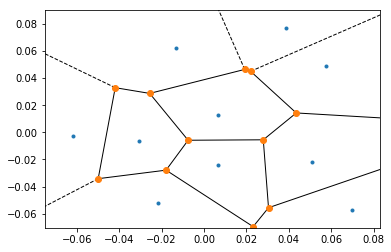

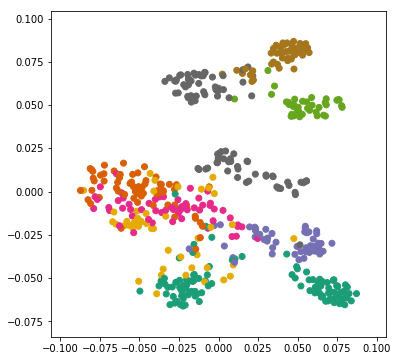

In [24]:
plot_vor_cluster(lowD_all_1[0], test_labels[:500])

In [25]:
plot_vor_cluster(lowD_all_1[1], test_labels[:500])

IndexError: list index out of range